In [51]:
#Importing libraries 
import torch
import torchvision
import torch.nn as nn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split
%matplotlib inline

#df.shape is the number of rows and columns of the DataFrame.

In [52]:
df = pd.read_csv("Fish.csv")
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print('Shape of dataset= ', df.shape)
df.head(5)

Shape of dataset=  (159, 7)


Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

#Exploratory Data Analysis is used to take insights from the data. Data Scientists and Analysts try to find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques.

In [53]:
#df. head() Returns the first 5 rows of the dataframe
df.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

In [54]:
df.describe()

Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000

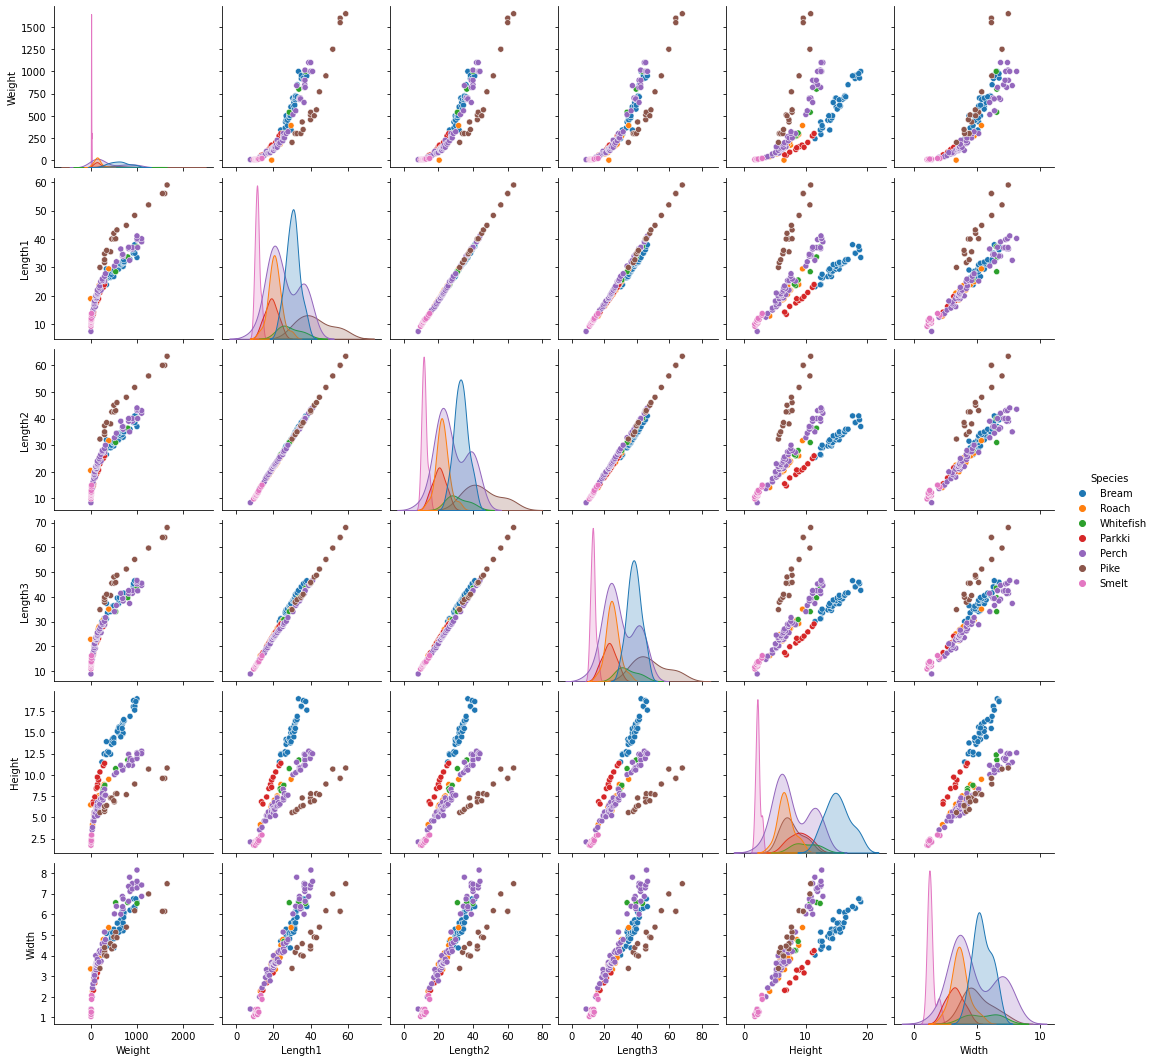

In [55]:
#A pairplot plots a pairwise relationships in a given dataset. 
sns.pairplot(df, kind = 'scatter', hue = 'Species')

In [56]:
#it Selects columns using column name
X = df[['Height','Width']] 
X.head()

Height   Width
0  11.5200  4.0200
1  12.4800  4.3056
2  12.3778  4.6961
3  12.7300  4.4555
4  12.4440  5.1340

#Correlation is a measure of the extent to which two variables are related.

In [57]:
# The method calculates the correlation coefficient between all the numerical columns
corr = df.corr(method='pearson')
corr

Weight   Length1   Length2   Length3    Height     Width
Weight   1.000000  0.915712  0.918618  0.923044  0.724345  0.886507
Length1  0.915712  1.000000  0.999517  0.992031  0.625378  0.867050
Length2  0.918618  0.999517  1.000000  0.994103  0.640441  0.873547
Length3  0.923044  0.992031  0.994103  1.000000  0.703409  0.878520
Height   0.724345  0.625378  0.640441  0.703409  1.000000  0.792881
Width    0.886507  0.867050  0.873547  0.878520  0.792881  1.000000

From above correlation coefficient values we can see that Correlation between **Legnth3** and **weight** is stronger as r value is **0.923044**.

<AxesSubplot:>

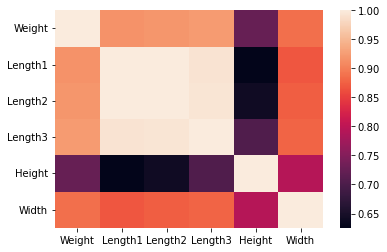

In [58]:
# Plotting the heat map for the correlation values

sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels=corr.columns.values)

#Splitting the data for training and testing 

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 0) 
inputs = df.drop(['Weight','Species'], axis=1).values
targets = df[['Weight']].values

In [60]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (127, 2)
X_test dimension=  (32, 2)
y_train dimension=  (127,)
y_train dimension=  (32,)


In [61]:
print(x)

[['Bream' 242.0 23.2 25.4 30.0 11.52]
 ['Bream' 290.0 24.0 26.3 31.2 12.48]
 ['Bream' 340.0 23.9 26.5 31.1 12.3778]
 ['Bream' 363.0 26.3 29.0 33.5 12.73]
 ['Bream' 430.0 26.5 29.0 34.0 12.444]
 ['Bream' 450.0 26.8 29.7 34.7 13.6024]
 ['Bream' 500.0 26.8 29.7 34.5 14.1795]
 ['Bream' 390.0 27.6 30.0 35.0 12.67]
 ['Bream' 450.0 27.6 30.0 35.1 14.0049]
 ['Bream' 500.0 28.5 30.7 36.2 14.2266]
 ['Bream' 475.0 28.4 31.0 36.2 14.2628]
 ['Bream' 500.0 28.7 31.0 36.2 14.3714]
 ['Bream' 500.0 29.1 31.5 36.4 13.7592]
 ['Bream' 340.0 29.5 32.0 37.3 13.9129]
 ['Bream' 600.0 29.4 32.0 37.2 14.9544]
 ['Bream' 600.0 29.4 32.0 37.2 15.438]
 ['Bream' 700.0 30.4 33.0 38.3 14.8604]
 ['Bream' 700.0 30.4 33.0 38.5 14.938]
 ['Bream' 610.0 30.9 33.5 38.6 15.633]
 ['Bream' 650.0 31.0 33.5 38.7 14.4738]
 ['Bream' 575.0 31.3 34.0 39.5 15.1285]
 ['Bream' 685.0 31.4 34.0 39.2 15.9936]
 ['Bream' 620.0 31.5 34.5 39.7 15.5227]
 ['Bream' 680.0 31.8 35.0 40.6 15.4686]
 ['Bream' 700.0 31.9 35.0 40.5 16.2405]
 ['Bream' 72

In [62]:
print(y)

[4.02   4.3056 4.6961 4.4555 5.134  4.9274 5.2785 4.69   4.8438 4.9594
 5.1042 4.8146 4.368  5.0728 5.1708 5.58   5.2854 5.1975 5.1338 5.7276
 5.5695 5.3704 5.2801 6.1306 5.589  6.0532 6.09   5.8515 6.1984 6.603
 6.3063 6.292  6.7497 6.7473 6.3705 2.268  2.8217 2.9044 3.1746 3.5742
 3.3516 3.3957 3.2943 3.7544 3.5478 3.8203 3.325  3.8    3.8352 3.6312
 4.1272 3.906  4.4968 4.7736 5.355  4.2476 4.2485 4.6816 6.562  6.5736
 6.525  2.3265 2.3142 2.673  2.9181 3.2928 3.2944 3.4104 3.1571 3.6636
 4.144  4.234  1.408  1.9992 2.432  2.6316 2.9415 3.3216 3.1234 3.0502
 3.0368 2.772  3.555  3.3075 3.6675 3.534  3.4075 3.525  3.525  3.525
 3.995  3.624  3.624  3.63   3.626  3.725  3.723  3.825  4.1658 3.6835
 4.239  4.144  5.1373 4.335  4.335  4.5662 4.2042 4.6354 4.7716 6.018
 6.3875 7.7957 6.864  6.7408 6.2646 6.3666 7.4934 6.003  7.3514 7.1064
 7.225  7.4624 6.63   6.8684 7.2772 7.4165 8.142  7.5958 3.3756 4.158
 4.3844 4.0198 4.5765 3.977  4.3225 4.459  5.1296 4.896  4.87   5.376
 6.1712 6.9

In [63]:
# Shapes of the training and testing data

print(f'Shape of inputs  = {inputs.shape}')
print(f'Shape of targets = {targets.shape}')

Shape of inputs  = (159, 5)
Shape of targets = (159, 1)


#Hyperparameters

In [64]:
batch_size=64
learning_rate=10e-7
input_size=5
output_size=1


#Converting to PyTorch dataset

In [65]:
dataset = TensorDataset(torch.tensor(inputs, dtype=torch.float32), torch.tensor(targets, dtype=torch.float32))
train_ds, val_ds = random_split(dataset, [100, 59])

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size*2)

#We will split the dataset, so that we can use one set of data for training the model and one set of data for testing the model
We will keep 20% of data for testing and 80% of data for training the model

In [66]:
class FishingModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, xb):
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch
        # it produce predictions
        out = self(inputs)                 
        #it calculates loss
        loss = F.mse_loss(out, targets)    
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        #it produce predictions
        out = self(inputs)
        #it Calculates loss
        loss = F.mse_loss(out, targets)    
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        #it combines losses
        epoch_loss = torch.stack(batch_losses).mean()   
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))
    
model = FishingModel()

#understanding training result

In [67]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [72]:
result = evaluate(model, val_loader)
result

{'val_loss': 40081.76953125}

### History

In [69]:
history = fit(100000, learning_rate, model, train_loader, val_loader)

Epoch [0], val_loss: 225379.7188
Epoch [1], val_loss: 220707.0312
Epoch [2], val_loss: 215841.3281
Epoch [3], val_loss: 211203.9531
Epoch [4], val_loss: 206586.0625
Epoch [5], val_loss: 202147.1562
Epoch [6], val_loss: 197805.9531
Epoch [7], val_loss: 193337.8906
Epoch [8], val_loss: 188807.3125
Epoch [9], val_loss: 184700.7344
Epoch [10], val_loss: 180641.4844
Epoch [11], val_loss: 177057.2344
Epoch [12], val_loss: 173368.6250
Epoch [13], val_loss: 169817.9375
Epoch [14], val_loss: 166112.8906
Epoch [15], val_loss: 162704.9219
Epoch [16], val_loss: 159160.0781
Epoch [17], val_loss: 155852.8594
Epoch [18], val_loss: 152723.9375
Epoch [19], val_loss: 149666.7656
Epoch [20], val_loss: 146594.8750
Epoch [21], val_loss: 143558.8594
Epoch [22], val_loss: 140746.3281
Epoch [23], val_loss: 137970.3594
Epoch [24], val_loss: 135327.2188
Epoch [25], val_loss: 132532.4062
Epoch [26], val_loss: 129905.6328
Epoch [27], val_loss: 127383.7109
Epoch [28], val_loss: 124981.7266
Epoch [29], val_loss: 12

Epoch [313], val_loss: 42278.5195
Epoch [314], val_loss: 42283.9453
Epoch [315], val_loss: 42297.0664
Epoch [316], val_loss: 42309.8086
Epoch [317], val_loss: 42317.7656
Epoch [318], val_loss: 42329.1172
Epoch [319], val_loss: 42347.5859
Epoch [320], val_loss: 42357.8789
Epoch [321], val_loss: 42370.2773
Epoch [322], val_loss: 42365.6172
Epoch [323], val_loss: 42386.9453
Epoch [324], val_loss: 42387.3984
Epoch [325], val_loss: 42402.9531
Epoch [326], val_loss: 42408.8672
Epoch [327], val_loss: 42410.5547
Epoch [328], val_loss: 42418.4570
Epoch [329], val_loss: 42428.7188
Epoch [330], val_loss: 42439.0156
Epoch [331], val_loss: 42447.3320
Epoch [332], val_loss: 42450.3477
Epoch [333], val_loss: 42449.0469
Epoch [334], val_loss: 42451.3086
Epoch [335], val_loss: 42478.4570
Epoch [336], val_loss: 42489.8438
Epoch [337], val_loss: 42487.2461
Epoch [338], val_loss: 42474.7344
Epoch [339], val_loss: 42492.1484
Epoch [340], val_loss: 42495.9727
Epoch [341], val_loss: 42507.6914
Epoch [342], v

Epoch [651], val_loss: 43043.5430
Epoch [652], val_loss: 43044.3320
Epoch [653], val_loss: 43039.7812
Epoch [654], val_loss: 43039.2461
Epoch [655], val_loss: 43048.7539
Epoch [656], val_loss: 43051.5977
Epoch [657], val_loss: 43034.3555
Epoch [658], val_loss: 43024.0781
Epoch [659], val_loss: 43019.1914
Epoch [660], val_loss: 43011.9570
Epoch [661], val_loss: 43019.4727
Epoch [662], val_loss: 43010.9023
Epoch [663], val_loss: 43009.0117
Epoch [664], val_loss: 43011.7812
Epoch [665], val_loss: 43013.2188
Epoch [666], val_loss: 43007.4375
Epoch [667], val_loss: 43013.3633
Epoch [668], val_loss: 43018.0156
Epoch [669], val_loss: 43012.5859
Epoch [670], val_loss: 43007.8008
Epoch [671], val_loss: 42997.9727
Epoch [672], val_loss: 43003.5000
Epoch [673], val_loss: 43001.3789
Epoch [674], val_loss: 43000.6719
Epoch [675], val_loss: 42990.3438
Epoch [676], val_loss: 42999.3203
Epoch [677], val_loss: 42989.3711
Epoch [678], val_loss: 42986.1172
Epoch [679], val_loss: 42990.4414
Epoch [680], v

Epoch [988], val_loss: 43074.4727
Epoch [989], val_loss: 43076.0000
Epoch [990], val_loss: 43084.0859
Epoch [991], val_loss: 43073.9961
Epoch [992], val_loss: 43062.6680
Epoch [993], val_loss: 43071.6367
Epoch [994], val_loss: 43073.2344
Epoch [995], val_loss: 43085.2148
Epoch [996], val_loss: 43082.2148
Epoch [997], val_loss: 43073.5586
Epoch [998], val_loss: 43081.5078
Epoch [999], val_loss: 43078.9180
Epoch [1000], val_loss: 43083.3594
Epoch [1001], val_loss: 43081.4414
Epoch [1002], val_loss: 43081.7891
Epoch [1003], val_loss: 43072.7188
Epoch [1004], val_loss: 43057.0156
Epoch [1005], val_loss: 43051.5508
Epoch [1006], val_loss: 43059.1445
Epoch [1007], val_loss: 43046.9531
Epoch [1008], val_loss: 43061.2852
Epoch [1009], val_loss: 43091.6367
Epoch [1010], val_loss: 43099.1484
Epoch [1011], val_loss: 43095.0039
Epoch [1012], val_loss: 43087.3828
Epoch [1013], val_loss: 43086.7109
Epoch [1014], val_loss: 43096.3906
Epoch [1015], val_loss: 43101.5977
Epoch [1016], val_loss: 43115.66

Epoch [1326], val_loss: 43061.6953
Epoch [1327], val_loss: 43055.8828
Epoch [1328], val_loss: 43054.2930
Epoch [1329], val_loss: 43049.8867
Epoch [1330], val_loss: 43042.7070
Epoch [1331], val_loss: 43045.8594
Epoch [1332], val_loss: 43047.5938
Epoch [1333], val_loss: 43040.3828
Epoch [1334], val_loss: 43049.8477
Epoch [1335], val_loss: 43044.7891
Epoch [1336], val_loss: 43061.5781
Epoch [1337], val_loss: 43052.2305
Epoch [1338], val_loss: 43064.6406
Epoch [1339], val_loss: 43068.3672
Epoch [1340], val_loss: 43079.5117
Epoch [1341], val_loss: 43088.4141
Epoch [1342], val_loss: 43074.6875
Epoch [1343], val_loss: 43069.3398
Epoch [1344], val_loss: 43084.1641
Epoch [1345], val_loss: 43078.9922
Epoch [1346], val_loss: 43067.8555
Epoch [1347], val_loss: 43058.2773
Epoch [1348], val_loss: 43065.8164
Epoch [1349], val_loss: 43057.9102
Epoch [1350], val_loss: 43051.0469
Epoch [1351], val_loss: 43037.7578
Epoch [1352], val_loss: 43026.2305
Epoch [1353], val_loss: 43039.7773
Epoch [1354], val_lo

Epoch [1665], val_loss: 43095.7461
Epoch [1666], val_loss: 43093.3672
Epoch [1667], val_loss: 43086.5859
Epoch [1668], val_loss: 43104.3047
Epoch [1669], val_loss: 43106.4727
Epoch [1670], val_loss: 43100.5625
Epoch [1671], val_loss: 43089.9180
Epoch [1672], val_loss: 43084.3398
Epoch [1673], val_loss: 43084.9961
Epoch [1674], val_loss: 43095.7500
Epoch [1675], val_loss: 43077.6367
Epoch [1676], val_loss: 43074.6602
Epoch [1677], val_loss: 43069.1641
Epoch [1678], val_loss: 43065.0938
Epoch [1679], val_loss: 43067.4570
Epoch [1680], val_loss: 43072.6641
Epoch [1681], val_loss: 43073.0898
Epoch [1682], val_loss: 43070.5781
Epoch [1683], val_loss: 43069.6367
Epoch [1684], val_loss: 43083.6836
Epoch [1685], val_loss: 43080.7695
Epoch [1686], val_loss: 43091.4219
Epoch [1687], val_loss: 43084.8945
Epoch [1688], val_loss: 43087.5195
Epoch [1689], val_loss: 43084.2344
Epoch [1690], val_loss: 43080.6445
Epoch [1691], val_loss: 43081.3047
Epoch [1692], val_loss: 43090.1914
Epoch [1693], val_lo

Epoch [2003], val_loss: 43023.6094
Epoch [2004], val_loss: 43014.1172
Epoch [2005], val_loss: 43011.6406
Epoch [2006], val_loss: 43012.4023
Epoch [2007], val_loss: 43002.5664
Epoch [2008], val_loss: 43011.7461
Epoch [2009], val_loss: 43015.8086
Epoch [2010], val_loss: 43033.3516
Epoch [2011], val_loss: 43042.9609
Epoch [2012], val_loss: 43041.2188
Epoch [2013], val_loss: 43044.5430
Epoch [2014], val_loss: 43044.7891
Epoch [2015], val_loss: 43041.7617
Epoch [2016], val_loss: 43026.7891
Epoch [2017], val_loss: 43024.5273
Epoch [2018], val_loss: 43016.7148
Epoch [2019], val_loss: 43021.1484
Epoch [2020], val_loss: 43023.0977
Epoch [2021], val_loss: 43012.5078
Epoch [2022], val_loss: 43021.4062
Epoch [2023], val_loss: 43016.2305
Epoch [2024], val_loss: 43004.0352
Epoch [2025], val_loss: 43009.0586
Epoch [2026], val_loss: 43015.1289
Epoch [2027], val_loss: 43010.2773
Epoch [2028], val_loss: 43006.3008
Epoch [2029], val_loss: 43020.9375
Epoch [2030], val_loss: 43020.6641
Epoch [2031], val_lo

Epoch [2342], val_loss: 43016.9102
Epoch [2343], val_loss: 43021.5156
Epoch [2344], val_loss: 43029.2070
Epoch [2345], val_loss: 43008.8906
Epoch [2346], val_loss: 43002.2148
Epoch [2347], val_loss: 43002.6602
Epoch [2348], val_loss: 43011.5117
Epoch [2349], val_loss: 43017.9102
Epoch [2350], val_loss: 43013.4414
Epoch [2351], val_loss: 42999.0547
Epoch [2352], val_loss: 42991.1328
Epoch [2353], val_loss: 42986.5039
Epoch [2354], val_loss: 42966.9141
Epoch [2355], val_loss: 42969.8516
Epoch [2356], val_loss: 42974.4844
Epoch [2357], val_loss: 42967.6406
Epoch [2358], val_loss: 42988.4023
Epoch [2359], val_loss: 42986.7031
Epoch [2360], val_loss: 42982.3633
Epoch [2361], val_loss: 42984.0547
Epoch [2362], val_loss: 42985.7656
Epoch [2363], val_loss: 42976.8711
Epoch [2364], val_loss: 42971.1719
Epoch [2365], val_loss: 42975.7773
Epoch [2366], val_loss: 42982.5352
Epoch [2367], val_loss: 42981.4141
Epoch [2368], val_loss: 42996.6289
Epoch [2369], val_loss: 42990.2305
Epoch [2370], val_lo

Epoch [2680], val_loss: 43112.1602
Epoch [2681], val_loss: 43104.1602
Epoch [2682], val_loss: 43096.4102
Epoch [2683], val_loss: 43096.8398
Epoch [2684], val_loss: 43098.9688
Epoch [2685], val_loss: 43101.5586
Epoch [2686], val_loss: 43107.7891
Epoch [2687], val_loss: 43110.3086
Epoch [2688], val_loss: 43113.8125
Epoch [2689], val_loss: 43102.8867
Epoch [2690], val_loss: 43100.0625
Epoch [2691], val_loss: 43088.9844
Epoch [2692], val_loss: 43105.3711
Epoch [2693], val_loss: 43114.5039
Epoch [2694], val_loss: 43112.7539
Epoch [2695], val_loss: 43107.1328
Epoch [2696], val_loss: 43099.9492
Epoch [2697], val_loss: 43095.3008
Epoch [2698], val_loss: 43085.0586
Epoch [2699], val_loss: 43076.6836
Epoch [2700], val_loss: 43079.9648
Epoch [2701], val_loss: 43076.1367
Epoch [2702], val_loss: 43067.4062
Epoch [2703], val_loss: 43055.7539
Epoch [2704], val_loss: 43049.7891
Epoch [2705], val_loss: 43071.7461
Epoch [2706], val_loss: 43072.2969
Epoch [2707], val_loss: 43085.8516
Epoch [2708], val_lo

Epoch [3018], val_loss: 43072.4062
Epoch [3019], val_loss: 43067.3672
Epoch [3020], val_loss: 43051.3477
Epoch [3021], val_loss: 43043.2031
Epoch [3022], val_loss: 43039.0547
Epoch [3023], val_loss: 43041.0469
Epoch [3024], val_loss: 43035.1953
Epoch [3025], val_loss: 43032.3047
Epoch [3026], val_loss: 43034.3906
Epoch [3027], val_loss: 43048.6602
Epoch [3028], val_loss: 43057.3828
Epoch [3029], val_loss: 43046.2891
Epoch [3030], val_loss: 43036.8906
Epoch [3031], val_loss: 43045.8789
Epoch [3032], val_loss: 43041.5820
Epoch [3033], val_loss: 43050.5703
Epoch [3034], val_loss: 43051.3086
Epoch [3035], val_loss: 43053.2188
Epoch [3036], val_loss: 43057.2344
Epoch [3037], val_loss: 43057.1953
Epoch [3038], val_loss: 43055.3789
Epoch [3039], val_loss: 43046.7227
Epoch [3040], val_loss: 43051.0977
Epoch [3041], val_loss: 43051.4609
Epoch [3042], val_loss: 43039.4375
Epoch [3043], val_loss: 43039.1680
Epoch [3044], val_loss: 43048.7695
Epoch [3045], val_loss: 43052.8555
Epoch [3046], val_lo

Epoch [3356], val_loss: 42975.7188
Epoch [3357], val_loss: 42985.2891
Epoch [3358], val_loss: 42980.4180
Epoch [3359], val_loss: 42967.6602
Epoch [3360], val_loss: 42966.8320
Epoch [3361], val_loss: 42949.4844
Epoch [3362], val_loss: 42961.8945
Epoch [3363], val_loss: 42948.7188
Epoch [3364], val_loss: 42939.0625
Epoch [3365], val_loss: 42926.7812
Epoch [3366], val_loss: 42930.7344
Epoch [3367], val_loss: 42924.4883
Epoch [3368], val_loss: 42923.5703
Epoch [3369], val_loss: 42923.0898
Epoch [3370], val_loss: 42911.2969
Epoch [3371], val_loss: 42894.4141
Epoch [3372], val_loss: 42883.0938
Epoch [3373], val_loss: 42914.2461
Epoch [3374], val_loss: 42907.5664
Epoch [3375], val_loss: 42910.8320
Epoch [3376], val_loss: 42912.4688
Epoch [3377], val_loss: 42907.6055
Epoch [3378], val_loss: 42903.6016
Epoch [3379], val_loss: 42901.4648
Epoch [3380], val_loss: 42887.1406
Epoch [3381], val_loss: 42893.5352
Epoch [3382], val_loss: 42880.0312
Epoch [3383], val_loss: 42874.5586
Epoch [3384], val_lo

Epoch [3696], val_loss: 42991.5117
Epoch [3697], val_loss: 42999.3594
Epoch [3698], val_loss: 43007.3828
Epoch [3699], val_loss: 43002.7617
Epoch [3700], val_loss: 42985.8555
Epoch [3701], val_loss: 42999.1953
Epoch [3702], val_loss: 42998.3711
Epoch [3703], val_loss: 42996.4961
Epoch [3704], val_loss: 42994.1445
Epoch [3705], val_loss: 43003.3398
Epoch [3706], val_loss: 43011.9648
Epoch [3707], val_loss: 43008.8438
Epoch [3708], val_loss: 43009.3594
Epoch [3709], val_loss: 43012.6523
Epoch [3710], val_loss: 43004.9414
Epoch [3711], val_loss: 42999.0312
Epoch [3712], val_loss: 43003.7812
Epoch [3713], val_loss: 42999.7383
Epoch [3714], val_loss: 42999.7617
Epoch [3715], val_loss: 42998.1367
Epoch [3716], val_loss: 43004.3047
Epoch [3717], val_loss: 42998.0703
Epoch [3718], val_loss: 42996.2344
Epoch [3719], val_loss: 42991.4805
Epoch [3720], val_loss: 42991.1289
Epoch [3721], val_loss: 42986.1875
Epoch [3722], val_loss: 42986.3398
Epoch [3723], val_loss: 42986.1172
Epoch [3724], val_lo

Epoch [4036], val_loss: 42948.5430
Epoch [4037], val_loss: 42937.1523
Epoch [4038], val_loss: 42930.1641
Epoch [4039], val_loss: 42927.9531
Epoch [4040], val_loss: 42932.8672
Epoch [4041], val_loss: 42930.6836
Epoch [4042], val_loss: 42918.6055
Epoch [4043], val_loss: 42933.3516
Epoch [4044], val_loss: 42923.9062
Epoch [4045], val_loss: 42922.3555
Epoch [4046], val_loss: 42941.0352
Epoch [4047], val_loss: 42940.3789
Epoch [4048], val_loss: 42930.9297
Epoch [4049], val_loss: 42944.3359
Epoch [4050], val_loss: 42946.2227
Epoch [4051], val_loss: 42952.4141
Epoch [4052], val_loss: 42972.0820
Epoch [4053], val_loss: 42977.8711
Epoch [4054], val_loss: 42992.6875
Epoch [4055], val_loss: 42982.1406
Epoch [4056], val_loss: 42977.1133
Epoch [4057], val_loss: 42983.1133
Epoch [4058], val_loss: 42975.8047
Epoch [4059], val_loss: 42961.7148
Epoch [4060], val_loss: 42983.6992
Epoch [4061], val_loss: 42982.4961
Epoch [4062], val_loss: 42984.5938
Epoch [4063], val_loss: 43001.5039
Epoch [4064], val_lo

Epoch [4376], val_loss: 42917.6211
Epoch [4377], val_loss: 42919.6289
Epoch [4378], val_loss: 42921.5938
Epoch [4379], val_loss: 42925.3789
Epoch [4380], val_loss: 42914.9062
Epoch [4381], val_loss: 42919.0469
Epoch [4382], val_loss: 42935.3438
Epoch [4383], val_loss: 42935.6445
Epoch [4384], val_loss: 42933.1797
Epoch [4385], val_loss: 42933.5781
Epoch [4386], val_loss: 42952.6523
Epoch [4387], val_loss: 42947.6914
Epoch [4388], val_loss: 42961.0469
Epoch [4389], val_loss: 42961.4492
Epoch [4390], val_loss: 42954.6211
Epoch [4391], val_loss: 42945.4844
Epoch [4392], val_loss: 42932.4336
Epoch [4393], val_loss: 42929.4141
Epoch [4394], val_loss: 42929.1367
Epoch [4395], val_loss: 42935.0195
Epoch [4396], val_loss: 42933.3945
Epoch [4397], val_loss: 42938.3828
Epoch [4398], val_loss: 42921.1914
Epoch [4399], val_loss: 42919.9844
Epoch [4400], val_loss: 42924.4570
Epoch [4401], val_loss: 42910.3359
Epoch [4402], val_loss: 42905.4492
Epoch [4403], val_loss: 42903.3516
Epoch [4404], val_lo

Epoch [4713], val_loss: 42900.9688
Epoch [4714], val_loss: 42901.0352
Epoch [4715], val_loss: 42893.2344
Epoch [4716], val_loss: 42920.4961
Epoch [4717], val_loss: 42926.6211
Epoch [4718], val_loss: 42922.3008
Epoch [4719], val_loss: 42927.5000
Epoch [4720], val_loss: 42929.9648
Epoch [4721], val_loss: 42948.8516
Epoch [4722], val_loss: 42956.9102
Epoch [4723], val_loss: 42946.7656
Epoch [4724], val_loss: 42942.3633
Epoch [4725], val_loss: 42941.0391
Epoch [4726], val_loss: 42934.5547
Epoch [4727], val_loss: 42947.5547
Epoch [4728], val_loss: 42937.8477
Epoch [4729], val_loss: 42941.2305
Epoch [4730], val_loss: 42932.0430
Epoch [4731], val_loss: 42951.8867
Epoch [4732], val_loss: 42953.5078
Epoch [4733], val_loss: 42946.5547
Epoch [4734], val_loss: 42946.0781
Epoch [4735], val_loss: 42945.1992
Epoch [4736], val_loss: 42951.9375
Epoch [4737], val_loss: 42944.2109
Epoch [4738], val_loss: 42953.4531
Epoch [4739], val_loss: 42945.0547
Epoch [4740], val_loss: 42930.9883
Epoch [4741], val_lo

Epoch [5051], val_loss: 42958.1094
Epoch [5052], val_loss: 42941.3320
Epoch [5053], val_loss: 42952.2695
Epoch [5054], val_loss: 42941.6055
Epoch [5055], val_loss: 42930.1016
Epoch [5056], val_loss: 42947.0508
Epoch [5057], val_loss: 42944.5469
Epoch [5058], val_loss: 42939.5273
Epoch [5059], val_loss: 42934.0781
Epoch [5060], val_loss: 42943.5078
Epoch [5061], val_loss: 42937.2070
Epoch [5062], val_loss: 42944.0430
Epoch [5063], val_loss: 42939.3633
Epoch [5064], val_loss: 42946.5703
Epoch [5065], val_loss: 42944.6523
Epoch [5066], val_loss: 42941.1562
Epoch [5067], val_loss: 42953.5273
Epoch [5068], val_loss: 42942.1562
Epoch [5069], val_loss: 42952.6055
Epoch [5070], val_loss: 42959.3203
Epoch [5071], val_loss: 42941.9141
Epoch [5072], val_loss: 42946.3359
Epoch [5073], val_loss: 42948.2500
Epoch [5074], val_loss: 42942.3398
Epoch [5075], val_loss: 42957.8164
Epoch [5076], val_loss: 42939.6992
Epoch [5077], val_loss: 42949.3945
Epoch [5078], val_loss: 42960.8906
Epoch [5079], val_lo

Epoch [5391], val_loss: 42833.5547
Epoch [5392], val_loss: 42838.7969
Epoch [5393], val_loss: 42842.6406
Epoch [5394], val_loss: 42822.4297
Epoch [5395], val_loss: 42811.9180
Epoch [5396], val_loss: 42827.2891
Epoch [5397], val_loss: 42831.2188
Epoch [5398], val_loss: 42825.1406
Epoch [5399], val_loss: 42816.0703
Epoch [5400], val_loss: 42821.2383
Epoch [5401], val_loss: 42824.5781
Epoch [5402], val_loss: 42813.6523
Epoch [5403], val_loss: 42796.3945
Epoch [5404], val_loss: 42818.4570
Epoch [5405], val_loss: 42812.2617
Epoch [5406], val_loss: 42832.2461
Epoch [5407], val_loss: 42834.6797
Epoch [5408], val_loss: 42830.1133
Epoch [5409], val_loss: 42826.6328
Epoch [5410], val_loss: 42829.4961
Epoch [5411], val_loss: 42830.4141
Epoch [5412], val_loss: 42834.2344
Epoch [5413], val_loss: 42816.9922
Epoch [5414], val_loss: 42824.9297
Epoch [5415], val_loss: 42825.5508
Epoch [5416], val_loss: 42814.7539
Epoch [5417], val_loss: 42830.8711
Epoch [5418], val_loss: 42835.0352
Epoch [5419], val_lo

Epoch [5730], val_loss: 42880.9727
Epoch [5731], val_loss: 42864.3047
Epoch [5732], val_loss: 42867.1523
Epoch [5733], val_loss: 42858.1016
Epoch [5734], val_loss: 42853.3125
Epoch [5735], val_loss: 42864.6289
Epoch [5736], val_loss: 42870.2773
Epoch [5737], val_loss: 42873.7383
Epoch [5738], val_loss: 42891.9141
Epoch [5739], val_loss: 42902.7227
Epoch [5740], val_loss: 42900.2852
Epoch [5741], val_loss: 42896.3320
Epoch [5742], val_loss: 42880.2227
Epoch [5743], val_loss: 42873.1602
Epoch [5744], val_loss: 42877.9570
Epoch [5745], val_loss: 42878.1445
Epoch [5746], val_loss: 42880.0898
Epoch [5747], val_loss: 42894.3789
Epoch [5748], val_loss: 42893.8320
Epoch [5749], val_loss: 42895.0625
Epoch [5750], val_loss: 42892.0195
Epoch [5751], val_loss: 42900.5312
Epoch [5752], val_loss: 42903.5000
Epoch [5753], val_loss: 42904.3008
Epoch [5754], val_loss: 42912.0469
Epoch [5755], val_loss: 42908.6094
Epoch [5756], val_loss: 42911.0664
Epoch [5757], val_loss: 42914.9062
Epoch [5758], val_lo

Epoch [6071], val_loss: 42787.2578
Epoch [6072], val_loss: 42783.9297
Epoch [6073], val_loss: 42768.7305
Epoch [6074], val_loss: 42784.0195
Epoch [6075], val_loss: 42780.3477
Epoch [6076], val_loss: 42788.9297
Epoch [6077], val_loss: 42782.2422
Epoch [6078], val_loss: 42781.7578
Epoch [6079], val_loss: 42781.0312
Epoch [6080], val_loss: 42777.2773
Epoch [6081], val_loss: 42768.5820
Epoch [6082], val_loss: 42782.8711
Epoch [6083], val_loss: 42788.8906
Epoch [6084], val_loss: 42797.2500
Epoch [6085], val_loss: 42791.0195
Epoch [6086], val_loss: 42807.4609
Epoch [6087], val_loss: 42798.5703
Epoch [6088], val_loss: 42791.3477
Epoch [6089], val_loss: 42779.3555
Epoch [6090], val_loss: 42772.7344
Epoch [6091], val_loss: 42770.0430
Epoch [6092], val_loss: 42774.6992
Epoch [6093], val_loss: 42777.9141
Epoch [6094], val_loss: 42782.7695
Epoch [6095], val_loss: 42782.0586
Epoch [6096], val_loss: 42794.5859
Epoch [6097], val_loss: 42801.3359
Epoch [6098], val_loss: 42802.0977
Epoch [6099], val_lo

Epoch [6411], val_loss: 42741.7578
Epoch [6412], val_loss: 42741.7148
Epoch [6413], val_loss: 42740.4570
Epoch [6414], val_loss: 42746.6875
Epoch [6415], val_loss: 42756.5898
Epoch [6416], val_loss: 42753.6797
Epoch [6417], val_loss: 42771.3516
Epoch [6418], val_loss: 42773.2109
Epoch [6419], val_loss: 42779.2148
Epoch [6420], val_loss: 42792.5430
Epoch [6421], val_loss: 42807.4727
Epoch [6422], val_loss: 42803.6719
Epoch [6423], val_loss: 42802.3398
Epoch [6424], val_loss: 42807.0352
Epoch [6425], val_loss: 42802.9609
Epoch [6426], val_loss: 42796.9531
Epoch [6427], val_loss: 42789.4375
Epoch [6428], val_loss: 42772.0977
Epoch [6429], val_loss: 42775.7422
Epoch [6430], val_loss: 42763.8672
Epoch [6431], val_loss: 42770.9922
Epoch [6432], val_loss: 42773.0312
Epoch [6433], val_loss: 42777.7148
Epoch [6434], val_loss: 42776.1953
Epoch [6435], val_loss: 42774.2031
Epoch [6436], val_loss: 42774.1211
Epoch [6437], val_loss: 42771.1406
Epoch [6438], val_loss: 42765.5391
Epoch [6439], val_lo

Epoch [6751], val_loss: 42877.6016
Epoch [6752], val_loss: 42879.2070
Epoch [6753], val_loss: 42876.5625
Epoch [6754], val_loss: 42863.5977
Epoch [6755], val_loss: 42855.7070
Epoch [6756], val_loss: 42851.8906
Epoch [6757], val_loss: 42848.5781
Epoch [6758], val_loss: 42851.1289
Epoch [6759], val_loss: 42846.0391
Epoch [6760], val_loss: 42855.7344
Epoch [6761], val_loss: 42857.4570
Epoch [6762], val_loss: 42851.6289
Epoch [6763], val_loss: 42849.2852
Epoch [6764], val_loss: 42845.9023
Epoch [6765], val_loss: 42845.6016
Epoch [6766], val_loss: 42829.3398
Epoch [6767], val_loss: 42836.8477
Epoch [6768], val_loss: 42841.3086
Epoch [6769], val_loss: 42834.8906
Epoch [6770], val_loss: 42840.4219
Epoch [6771], val_loss: 42832.8125
Epoch [6772], val_loss: 42822.6172
Epoch [6773], val_loss: 42818.9141
Epoch [6774], val_loss: 42813.0352
Epoch [6775], val_loss: 42817.9141
Epoch [6776], val_loss: 42820.4531
Epoch [6777], val_loss: 42810.0195
Epoch [6778], val_loss: 42821.5117
Epoch [6779], val_lo

Epoch [7091], val_loss: 42900.4805
Epoch [7092], val_loss: 42899.9023
Epoch [7093], val_loss: 42905.6602
Epoch [7094], val_loss: 42910.1523
Epoch [7095], val_loss: 42908.1602
Epoch [7096], val_loss: 42896.6797
Epoch [7097], val_loss: 42894.9805
Epoch [7098], val_loss: 42890.8477
Epoch [7099], val_loss: 42891.5039
Epoch [7100], val_loss: 42873.3281
Epoch [7101], val_loss: 42873.3125
Epoch [7102], val_loss: 42878.0938
Epoch [7103], val_loss: 42867.1953
Epoch [7104], val_loss: 42864.3281
Epoch [7105], val_loss: 42853.7930
Epoch [7106], val_loss: 42853.2969
Epoch [7107], val_loss: 42851.3203
Epoch [7108], val_loss: 42849.5156
Epoch [7109], val_loss: 42856.0664
Epoch [7110], val_loss: 42852.8633
Epoch [7111], val_loss: 42853.4297
Epoch [7112], val_loss: 42855.4375
Epoch [7113], val_loss: 42857.1523
Epoch [7114], val_loss: 42855.3047
Epoch [7115], val_loss: 42852.8320
Epoch [7116], val_loss: 42845.6016
Epoch [7117], val_loss: 42841.9961
Epoch [7118], val_loss: 42840.3125
Epoch [7119], val_lo

Epoch [7431], val_loss: 42747.7891
Epoch [7432], val_loss: 42737.1523
Epoch [7433], val_loss: 42739.6719
Epoch [7434], val_loss: 42764.9844
Epoch [7435], val_loss: 42776.5898
Epoch [7436], val_loss: 42785.3633
Epoch [7437], val_loss: 42791.1133
Epoch [7438], val_loss: 42781.5352
Epoch [7439], val_loss: 42763.1055
Epoch [7440], val_loss: 42767.4297
Epoch [7441], val_loss: 42775.5391
Epoch [7442], val_loss: 42779.6172
Epoch [7443], val_loss: 42788.9805
Epoch [7444], val_loss: 42778.8047
Epoch [7445], val_loss: 42769.2656
Epoch [7446], val_loss: 42772.9023
Epoch [7447], val_loss: 42776.3672
Epoch [7448], val_loss: 42777.2227
Epoch [7449], val_loss: 42791.0625
Epoch [7450], val_loss: 42803.9922
Epoch [7451], val_loss: 42790.4414
Epoch [7452], val_loss: 42804.2305
Epoch [7453], val_loss: 42808.4219
Epoch [7454], val_loss: 42800.7930
Epoch [7455], val_loss: 42790.9180
Epoch [7456], val_loss: 42786.5977
Epoch [7457], val_loss: 42788.7109
Epoch [7458], val_loss: 42787.8438
Epoch [7459], val_lo

Epoch [7771], val_loss: 42853.2695
Epoch [7772], val_loss: 42854.4883
Epoch [7773], val_loss: 42843.4102
Epoch [7774], val_loss: 42843.4492
Epoch [7775], val_loss: 42830.2539
Epoch [7776], val_loss: 42837.6914
Epoch [7777], val_loss: 42832.9570
Epoch [7778], val_loss: 42828.1484
Epoch [7779], val_loss: 42832.2539
Epoch [7780], val_loss: 42832.7188
Epoch [7781], val_loss: 42825.7148
Epoch [7782], val_loss: 42822.4922
Epoch [7783], val_loss: 42810.7188
Epoch [7784], val_loss: 42826.4727
Epoch [7785], val_loss: 42821.9531
Epoch [7786], val_loss: 42833.5039
Epoch [7787], val_loss: 42826.8203
Epoch [7788], val_loss: 42825.9570
Epoch [7789], val_loss: 42826.4922
Epoch [7790], val_loss: 42845.4102
Epoch [7791], val_loss: 42849.0781
Epoch [7792], val_loss: 42849.3281
Epoch [7793], val_loss: 42843.0000
Epoch [7794], val_loss: 42842.1289
Epoch [7795], val_loss: 42842.1328
Epoch [7796], val_loss: 42833.1562
Epoch [7797], val_loss: 42826.6016
Epoch [7798], val_loss: 42823.9648
Epoch [7799], val_lo

Epoch [8110], val_loss: 42796.3984
Epoch [8111], val_loss: 42786.0898
Epoch [8112], val_loss: 42776.7930
Epoch [8113], val_loss: 42782.4883
Epoch [8114], val_loss: 42793.6016
Epoch [8115], val_loss: 42792.8594
Epoch [8116], val_loss: 42783.2812
Epoch [8117], val_loss: 42778.8164
Epoch [8118], val_loss: 42790.1211
Epoch [8119], val_loss: 42772.6797
Epoch [8120], val_loss: 42769.2383
Epoch [8121], val_loss: 42763.9453
Epoch [8122], val_loss: 42762.3633
Epoch [8123], val_loss: 42751.8477
Epoch [8124], val_loss: 42747.6602
Epoch [8125], val_loss: 42744.2617
Epoch [8126], val_loss: 42742.5508
Epoch [8127], val_loss: 42751.8320
Epoch [8128], val_loss: 42745.7461
Epoch [8129], val_loss: 42739.3281
Epoch [8130], val_loss: 42740.7930
Epoch [8131], val_loss: 42749.7891
Epoch [8132], val_loss: 42758.5664
Epoch [8133], val_loss: 42746.2539
Epoch [8134], val_loss: 42754.8516
Epoch [8135], val_loss: 42751.7969
Epoch [8136], val_loss: 42763.8594
Epoch [8137], val_loss: 42760.7227
Epoch [8138], val_lo

Epoch [8451], val_loss: 42781.4102
Epoch [8452], val_loss: 42778.7305
Epoch [8453], val_loss: 42790.3945
Epoch [8454], val_loss: 42791.4453
Epoch [8455], val_loss: 42811.6953
Epoch [8456], val_loss: 42800.8945
Epoch [8457], val_loss: 42787.0938
Epoch [8458], val_loss: 42785.8516
Epoch [8459], val_loss: 42785.1172
Epoch [8460], val_loss: 42778.2812
Epoch [8461], val_loss: 42773.0625
Epoch [8462], val_loss: 42765.4727
Epoch [8463], val_loss: 42745.4727
Epoch [8464], val_loss: 42765.3828
Epoch [8465], val_loss: 42776.8594
Epoch [8466], val_loss: 42766.4453
Epoch [8467], val_loss: 42775.9375
Epoch [8468], val_loss: 42763.5156
Epoch [8469], val_loss: 42774.7500
Epoch [8470], val_loss: 42754.1875
Epoch [8471], val_loss: 42738.2461
Epoch [8472], val_loss: 42746.8711
Epoch [8473], val_loss: 42736.9023
Epoch [8474], val_loss: 42741.5859
Epoch [8475], val_loss: 42756.1016
Epoch [8476], val_loss: 42749.6562
Epoch [8477], val_loss: 42764.7500
Epoch [8478], val_loss: 42760.6445
Epoch [8479], val_lo

Epoch [8791], val_loss: 42845.1484
Epoch [8792], val_loss: 42843.1211
Epoch [8793], val_loss: 42846.1406
Epoch [8794], val_loss: 42843.5039
Epoch [8795], val_loss: 42832.5117
Epoch [8796], val_loss: 42824.3945
Epoch [8797], val_loss: 42843.9492
Epoch [8798], val_loss: 42846.1445
Epoch [8799], val_loss: 42862.5859
Epoch [8800], val_loss: 42855.0586
Epoch [8801], val_loss: 42844.9688
Epoch [8802], val_loss: 42838.4922
Epoch [8803], val_loss: 42838.3203
Epoch [8804], val_loss: 42821.8008
Epoch [8805], val_loss: 42810.2578
Epoch [8806], val_loss: 42816.4688
Epoch [8807], val_loss: 42810.4141
Epoch [8808], val_loss: 42808.4844
Epoch [8809], val_loss: 42807.1289
Epoch [8810], val_loss: 42810.3008
Epoch [8811], val_loss: 42807.0391
Epoch [8812], val_loss: 42806.0547
Epoch [8813], val_loss: 42804.9883
Epoch [8814], val_loss: 42818.2969
Epoch [8815], val_loss: 42813.8438
Epoch [8816], val_loss: 42821.2070
Epoch [8817], val_loss: 42829.6836
Epoch [8818], val_loss: 42835.9023
Epoch [8819], val_lo

Epoch [9132], val_loss: 42755.0547
Epoch [9133], val_loss: 42755.8398
Epoch [9134], val_loss: 42759.2109
Epoch [9135], val_loss: 42749.1523
Epoch [9136], val_loss: 42736.0938
Epoch [9137], val_loss: 42721.2500
Epoch [9138], val_loss: 42721.3555
Epoch [9139], val_loss: 42733.0977
Epoch [9140], val_loss: 42732.8008
Epoch [9141], val_loss: 42728.1875
Epoch [9142], val_loss: 42728.7070
Epoch [9143], val_loss: 42733.9453
Epoch [9144], val_loss: 42738.8633
Epoch [9145], val_loss: 42742.8008
Epoch [9146], val_loss: 42740.7891
Epoch [9147], val_loss: 42743.7891
Epoch [9148], val_loss: 42741.2773
Epoch [9149], val_loss: 42737.6523
Epoch [9150], val_loss: 42749.0195
Epoch [9151], val_loss: 42740.6797
Epoch [9152], val_loss: 42753.6523
Epoch [9153], val_loss: 42753.9336
Epoch [9154], val_loss: 42750.5312
Epoch [9155], val_loss: 42750.0898
Epoch [9156], val_loss: 42757.8164
Epoch [9157], val_loss: 42747.1289
Epoch [9158], val_loss: 42755.9336
Epoch [9159], val_loss: 42764.0273
Epoch [9160], val_lo

Epoch [9473], val_loss: 42821.3984
Epoch [9474], val_loss: 42814.5664
Epoch [9475], val_loss: 42797.3047
Epoch [9476], val_loss: 42793.6055
Epoch [9477], val_loss: 42790.7852
Epoch [9478], val_loss: 42783.7188
Epoch [9479], val_loss: 42791.4844
Epoch [9480], val_loss: 42784.3555
Epoch [9481], val_loss: 42782.3945
Epoch [9482], val_loss: 42789.9102
Epoch [9483], val_loss: 42796.9102
Epoch [9484], val_loss: 42794.2617
Epoch [9485], val_loss: 42804.8828
Epoch [9486], val_loss: 42829.8359
Epoch [9487], val_loss: 42833.8203
Epoch [9488], val_loss: 42823.2461
Epoch [9489], val_loss: 42826.5039
Epoch [9490], val_loss: 42833.8281
Epoch [9491], val_loss: 42829.2383
Epoch [9492], val_loss: 42834.9844
Epoch [9493], val_loss: 42836.1406
Epoch [9494], val_loss: 42839.5312
Epoch [9495], val_loss: 42855.7891
Epoch [9496], val_loss: 42854.5312
Epoch [9497], val_loss: 42859.1875
Epoch [9498], val_loss: 42864.1523
Epoch [9499], val_loss: 42866.2031
Epoch [9500], val_loss: 42859.0273
Epoch [9501], val_lo

Epoch [9813], val_loss: 42698.6445
Epoch [9814], val_loss: 42701.6641
Epoch [9815], val_loss: 42706.7539
Epoch [9816], val_loss: 42708.1133
Epoch [9817], val_loss: 42695.5859
Epoch [9818], val_loss: 42697.5430
Epoch [9819], val_loss: 42698.4844
Epoch [9820], val_loss: 42714.2031
Epoch [9821], val_loss: 42712.6016
Epoch [9822], val_loss: 42720.8633
Epoch [9823], val_loss: 42723.4219
Epoch [9824], val_loss: 42723.6797
Epoch [9825], val_loss: 42727.9219
Epoch [9826], val_loss: 42735.1875
Epoch [9827], val_loss: 42754.2539
Epoch [9828], val_loss: 42751.4141
Epoch [9829], val_loss: 42752.9570
Epoch [9830], val_loss: 42747.4375
Epoch [9831], val_loss: 42749.8789
Epoch [9832], val_loss: 42752.8906
Epoch [9833], val_loss: 42749.3555
Epoch [9834], val_loss: 42736.8672
Epoch [9835], val_loss: 42731.4727
Epoch [9836], val_loss: 42724.1953
Epoch [9837], val_loss: 42705.2930
Epoch [9838], val_loss: 42699.1992
Epoch [9839], val_loss: 42705.4375
Epoch [9840], val_loss: 42692.2969
Epoch [9841], val_lo

Epoch [10154], val_loss: 42711.5273
Epoch [10155], val_loss: 42706.6562
Epoch [10156], val_loss: 42706.6445
Epoch [10157], val_loss: 42722.4844
Epoch [10158], val_loss: 42720.0781
Epoch [10159], val_loss: 42703.9883
Epoch [10160], val_loss: 42697.4727
Epoch [10161], val_loss: 42700.2617
Epoch [10162], val_loss: 42708.9844
Epoch [10163], val_loss: 42707.4688
Epoch [10164], val_loss: 42707.4492
Epoch [10165], val_loss: 42711.8359
Epoch [10166], val_loss: 42728.9297
Epoch [10167], val_loss: 42735.6953
Epoch [10168], val_loss: 42735.0117
Epoch [10169], val_loss: 42746.6133
Epoch [10170], val_loss: 42750.0469
Epoch [10171], val_loss: 42741.8672
Epoch [10172], val_loss: 42727.2969
Epoch [10173], val_loss: 42721.3320
Epoch [10174], val_loss: 42724.8477
Epoch [10175], val_loss: 42726.2188
Epoch [10176], val_loss: 42731.9922
Epoch [10177], val_loss: 42720.7578
Epoch [10178], val_loss: 42713.3867
Epoch [10179], val_loss: 42728.1680
Epoch [10180], val_loss: 42724.3945
Epoch [10181], val_loss: 427

Epoch [10494], val_loss: 42714.5273
Epoch [10495], val_loss: 42719.2305
Epoch [10496], val_loss: 42706.0898
Epoch [10497], val_loss: 42708.0078
Epoch [10498], val_loss: 42688.0156
Epoch [10499], val_loss: 42694.3438
Epoch [10500], val_loss: 42681.9375
Epoch [10501], val_loss: 42679.3438
Epoch [10502], val_loss: 42669.6836
Epoch [10503], val_loss: 42667.9570
Epoch [10504], val_loss: 42681.9219
Epoch [10505], val_loss: 42674.9297
Epoch [10506], val_loss: 42669.1367
Epoch [10507], val_loss: 42658.7422
Epoch [10508], val_loss: 42652.0625
Epoch [10509], val_loss: 42636.8828
Epoch [10510], val_loss: 42636.0391
Epoch [10511], val_loss: 42637.1602
Epoch [10512], val_loss: 42628.2422
Epoch [10513], val_loss: 42623.9844
Epoch [10514], val_loss: 42628.7188
Epoch [10515], val_loss: 42617.3008
Epoch [10516], val_loss: 42613.7109
Epoch [10517], val_loss: 42621.3867
Epoch [10518], val_loss: 42624.3281
Epoch [10519], val_loss: 42632.8906
Epoch [10520], val_loss: 42635.9570
Epoch [10521], val_loss: 426

Epoch [10835], val_loss: 42781.5508
Epoch [10836], val_loss: 42776.0859
Epoch [10837], val_loss: 42784.3945
Epoch [10838], val_loss: 42778.2539
Epoch [10839], val_loss: 42778.9648
Epoch [10840], val_loss: 42786.3555
Epoch [10841], val_loss: 42794.0195
Epoch [10842], val_loss: 42783.4648
Epoch [10843], val_loss: 42772.3125
Epoch [10844], val_loss: 42766.2305
Epoch [10845], val_loss: 42754.9453
Epoch [10846], val_loss: 42761.1016
Epoch [10847], val_loss: 42755.7383
Epoch [10848], val_loss: 42746.0547
Epoch [10849], val_loss: 42750.7188
Epoch [10850], val_loss: 42750.7148
Epoch [10851], val_loss: 42755.3125
Epoch [10852], val_loss: 42758.2422
Epoch [10853], val_loss: 42757.0273
Epoch [10854], val_loss: 42754.9883
Epoch [10855], val_loss: 42768.4883
Epoch [10856], val_loss: 42768.1211
Epoch [10857], val_loss: 42764.3320
Epoch [10858], val_loss: 42760.7461
Epoch [10859], val_loss: 42753.4375
Epoch [10860], val_loss: 42765.5547
Epoch [10861], val_loss: 42772.6562
Epoch [10862], val_loss: 427

Epoch [11174], val_loss: 42651.7695
Epoch [11175], val_loss: 42651.2578
Epoch [11176], val_loss: 42654.7148
Epoch [11177], val_loss: 42660.6953
Epoch [11178], val_loss: 42672.5039
Epoch [11179], val_loss: 42665.2852
Epoch [11180], val_loss: 42672.0781
Epoch [11181], val_loss: 42681.5117
Epoch [11182], val_loss: 42687.0352
Epoch [11183], val_loss: 42679.8477
Epoch [11184], val_loss: 42686.2539
Epoch [11185], val_loss: 42683.0781
Epoch [11186], val_loss: 42682.5391
Epoch [11187], val_loss: 42684.6641
Epoch [11188], val_loss: 42676.5273
Epoch [11189], val_loss: 42681.6797
Epoch [11190], val_loss: 42684.5312
Epoch [11191], val_loss: 42686.3047
Epoch [11192], val_loss: 42687.9453
Epoch [11193], val_loss: 42697.0898
Epoch [11194], val_loss: 42703.7539
Epoch [11195], val_loss: 42703.2031
Epoch [11196], val_loss: 42708.2383
Epoch [11197], val_loss: 42702.1211
Epoch [11198], val_loss: 42706.9922
Epoch [11199], val_loss: 42706.2969
Epoch [11200], val_loss: 42701.7500
Epoch [11201], val_loss: 427

Epoch [11515], val_loss: 42757.8633
Epoch [11516], val_loss: 42752.7422
Epoch [11517], val_loss: 42752.9023
Epoch [11518], val_loss: 42774.0703
Epoch [11519], val_loss: 42765.4883
Epoch [11520], val_loss: 42776.9102
Epoch [11521], val_loss: 42781.1406
Epoch [11522], val_loss: 42791.7031
Epoch [11523], val_loss: 42803.3398
Epoch [11524], val_loss: 42809.8320
Epoch [11525], val_loss: 42806.3516
Epoch [11526], val_loss: 42806.3906
Epoch [11527], val_loss: 42807.4102
Epoch [11528], val_loss: 42800.0664
Epoch [11529], val_loss: 42805.7148
Epoch [11530], val_loss: 42805.6680
Epoch [11531], val_loss: 42804.1133
Epoch [11532], val_loss: 42802.7617
Epoch [11533], val_loss: 42804.3828
Epoch [11534], val_loss: 42815.8594
Epoch [11535], val_loss: 42811.0195
Epoch [11536], val_loss: 42810.9141
Epoch [11537], val_loss: 42811.7148
Epoch [11538], val_loss: 42808.0938
Epoch [11539], val_loss: 42807.2773
Epoch [11540], val_loss: 42806.0820
Epoch [11541], val_loss: 42801.9805
Epoch [11542], val_loss: 428

Epoch [11851], val_loss: 42602.1172
Epoch [11852], val_loss: 42591.5977
Epoch [11853], val_loss: 42587.5156
Epoch [11854], val_loss: 42594.0078
Epoch [11855], val_loss: 42595.3828
Epoch [11856], val_loss: 42594.2578
Epoch [11857], val_loss: 42600.1445
Epoch [11858], val_loss: 42598.1367
Epoch [11859], val_loss: 42590.0586
Epoch [11860], val_loss: 42602.0195
Epoch [11861], val_loss: 42613.3672
Epoch [11862], val_loss: 42607.8047
Epoch [11863], val_loss: 42617.9414
Epoch [11864], val_loss: 42620.6680
Epoch [11865], val_loss: 42610.3047
Epoch [11866], val_loss: 42619.8555
Epoch [11867], val_loss: 42613.4023
Epoch [11868], val_loss: 42626.7500
Epoch [11869], val_loss: 42622.9219
Epoch [11870], val_loss: 42631.7852
Epoch [11871], val_loss: 42652.0039
Epoch [11872], val_loss: 42641.6641
Epoch [11873], val_loss: 42632.3047
Epoch [11874], val_loss: 42622.5625
Epoch [11875], val_loss: 42636.3125
Epoch [11876], val_loss: 42631.2109
Epoch [11877], val_loss: 42646.0586
Epoch [11878], val_loss: 426

Epoch [12172], val_loss: 42709.2852
Epoch [12173], val_loss: 42717.6641
Epoch [12174], val_loss: 42721.2148
Epoch [12175], val_loss: 42720.7422
Epoch [12176], val_loss: 42707.2188
Epoch [12177], val_loss: 42696.9961
Epoch [12178], val_loss: 42707.8672
Epoch [12179], val_loss: 42721.2031
Epoch [12180], val_loss: 42715.8477
Epoch [12181], val_loss: 42709.4375
Epoch [12182], val_loss: 42702.3477
Epoch [12183], val_loss: 42690.5898
Epoch [12184], val_loss: 42677.3203
Epoch [12185], val_loss: 42667.5977
Epoch [12186], val_loss: 42678.2891
Epoch [12187], val_loss: 42687.1523
Epoch [12188], val_loss: 42702.6094
Epoch [12189], val_loss: 42715.5977
Epoch [12190], val_loss: 42728.7656
Epoch [12191], val_loss: 42738.2539
Epoch [12192], val_loss: 42732.0039
Epoch [12193], val_loss: 42743.1602
Epoch [12194], val_loss: 42754.1484
Epoch [12195], val_loss: 42759.7031
Epoch [12196], val_loss: 42757.4922
Epoch [12197], val_loss: 42740.0508
Epoch [12198], val_loss: 42747.9453
Epoch [12199], val_loss: 427

Epoch [12506], val_loss: 42620.6797
Epoch [12507], val_loss: 42621.3086
Epoch [12508], val_loss: 42622.8477
Epoch [12509], val_loss: 42623.1680
Epoch [12510], val_loss: 42627.7344
Epoch [12511], val_loss: 42619.1445
Epoch [12512], val_loss: 42621.4023
Epoch [12513], val_loss: 42628.7617
Epoch [12514], val_loss: 42632.5000
Epoch [12515], val_loss: 42631.7578
Epoch [12516], val_loss: 42616.3516
Epoch [12517], val_loss: 42609.9648
Epoch [12518], val_loss: 42623.1602
Epoch [12519], val_loss: 42636.9922
Epoch [12520], val_loss: 42640.3164
Epoch [12521], val_loss: 42634.8906
Epoch [12522], val_loss: 42629.3047
Epoch [12523], val_loss: 42644.3906
Epoch [12524], val_loss: 42652.0352
Epoch [12525], val_loss: 42650.5625
Epoch [12526], val_loss: 42637.8633
Epoch [12527], val_loss: 42638.2500
Epoch [12528], val_loss: 42641.7773
Epoch [12529], val_loss: 42647.7695
Epoch [12530], val_loss: 42643.3555
Epoch [12531], val_loss: 42638.5156
Epoch [12532], val_loss: 42635.3320
Epoch [12533], val_loss: 426

Epoch [12841], val_loss: 42714.4297
Epoch [12842], val_loss: 42718.1133
Epoch [12843], val_loss: 42711.3320
Epoch [12844], val_loss: 42723.1211
Epoch [12845], val_loss: 42726.8477
Epoch [12846], val_loss: 42722.3477
Epoch [12847], val_loss: 42723.3203
Epoch [12848], val_loss: 42723.2500
Epoch [12849], val_loss: 42723.2188
Epoch [12850], val_loss: 42717.4453
Epoch [12851], val_loss: 42719.0195
Epoch [12852], val_loss: 42705.1953
Epoch [12853], val_loss: 42700.8008
Epoch [12854], val_loss: 42701.1055
Epoch [12855], val_loss: 42694.1484
Epoch [12856], val_loss: 42691.3164
Epoch [12857], val_loss: 42704.3594
Epoch [12858], val_loss: 42708.1562
Epoch [12859], val_loss: 42699.9648
Epoch [12860], val_loss: 42706.9922
Epoch [12861], val_loss: 42721.4883
Epoch [12862], val_loss: 42715.4961
Epoch [12863], val_loss: 42725.3008
Epoch [12864], val_loss: 42737.0781
Epoch [12865], val_loss: 42732.2227
Epoch [12866], val_loss: 42728.2695
Epoch [12867], val_loss: 42719.1914
Epoch [12868], val_loss: 427

Epoch [13176], val_loss: 42637.5664
Epoch [13177], val_loss: 42636.3359
Epoch [13178], val_loss: 42641.1133
Epoch [13179], val_loss: 42648.2422
Epoch [13180], val_loss: 42650.9883
Epoch [13181], val_loss: 42647.8711
Epoch [13182], val_loss: 42655.9648
Epoch [13183], val_loss: 42648.8945
Epoch [13184], val_loss: 42641.9609
Epoch [13185], val_loss: 42634.2148
Epoch [13186], val_loss: 42653.7383
Epoch [13187], val_loss: 42656.7109
Epoch [13188], val_loss: 42660.0352
Epoch [13189], val_loss: 42656.1172
Epoch [13190], val_loss: 42647.7500
Epoch [13191], val_loss: 42652.5898
Epoch [13192], val_loss: 42655.8789
Epoch [13193], val_loss: 42660.0312
Epoch [13194], val_loss: 42659.4727
Epoch [13195], val_loss: 42662.3086
Epoch [13196], val_loss: 42666.1016
Epoch [13197], val_loss: 42664.1211
Epoch [13198], val_loss: 42662.9570
Epoch [13199], val_loss: 42675.9453
Epoch [13200], val_loss: 42666.0938
Epoch [13201], val_loss: 42666.6328
Epoch [13202], val_loss: 42653.1523
Epoch [13203], val_loss: 426

Epoch [13514], val_loss: 42651.7305
Epoch [13515], val_loss: 42646.7031
Epoch [13516], val_loss: 42642.8672
Epoch [13517], val_loss: 42638.8281
Epoch [13518], val_loss: 42643.1211
Epoch [13519], val_loss: 42646.3477
Epoch [13520], val_loss: 42639.9375
Epoch [13521], val_loss: 42650.2969
Epoch [13522], val_loss: 42648.6953
Epoch [13523], val_loss: 42655.1367
Epoch [13524], val_loss: 42640.6016
Epoch [13525], val_loss: 42640.1875
Epoch [13526], val_loss: 42640.8320
Epoch [13527], val_loss: 42647.7695
Epoch [13528], val_loss: 42648.0352
Epoch [13529], val_loss: 42631.7812
Epoch [13530], val_loss: 42638.2930
Epoch [13531], val_loss: 42638.5117
Epoch [13532], val_loss: 42624.2656
Epoch [13533], val_loss: 42619.1016
Epoch [13534], val_loss: 42618.8438
Epoch [13535], val_loss: 42605.4961
Epoch [13536], val_loss: 42612.9375
Epoch [13537], val_loss: 42610.5117
Epoch [13538], val_loss: 42609.8203
Epoch [13539], val_loss: 42608.3320
Epoch [13540], val_loss: 42608.4102
Epoch [13541], val_loss: 426

Epoch [13852], val_loss: 42602.1172
Epoch [13853], val_loss: 42596.1836
Epoch [13854], val_loss: 42594.6836
Epoch [13855], val_loss: 42602.5625
Epoch [13856], val_loss: 42614.8086
Epoch [13857], val_loss: 42617.5039
Epoch [13858], val_loss: 42607.2383
Epoch [13859], val_loss: 42601.1055
Epoch [13860], val_loss: 42608.3984
Epoch [13861], val_loss: 42619.8906
Epoch [13862], val_loss: 42635.8008
Epoch [13863], val_loss: 42622.2930
Epoch [13864], val_loss: 42621.9141
Epoch [13865], val_loss: 42611.8711
Epoch [13866], val_loss: 42615.3711
Epoch [13867], val_loss: 42606.4961
Epoch [13868], val_loss: 42599.9062
Epoch [13869], val_loss: 42591.5977
Epoch [13870], val_loss: 42568.4180
Epoch [13871], val_loss: 42564.4883
Epoch [13872], val_loss: 42572.4727
Epoch [13873], val_loss: 42576.4141
Epoch [13874], val_loss: 42577.1523
Epoch [13875], val_loss: 42575.7344
Epoch [13876], val_loss: 42577.2188
Epoch [13877], val_loss: 42582.6094
Epoch [13878], val_loss: 42588.0586
Epoch [13879], val_loss: 425

Epoch [14187], val_loss: 42676.6602
Epoch [14188], val_loss: 42664.7383
Epoch [14189], val_loss: 42666.7695
Epoch [14190], val_loss: 42665.4219
Epoch [14191], val_loss: 42676.5586
Epoch [14192], val_loss: 42662.1055
Epoch [14193], val_loss: 42667.1289
Epoch [14194], val_loss: 42663.7773
Epoch [14195], val_loss: 42656.2109
Epoch [14196], val_loss: 42658.2422
Epoch [14197], val_loss: 42645.6562
Epoch [14198], val_loss: 42636.4180
Epoch [14199], val_loss: 42623.2461
Epoch [14200], val_loss: 42647.9062
Epoch [14201], val_loss: 42652.2109
Epoch [14202], val_loss: 42669.6328
Epoch [14203], val_loss: 42663.6367
Epoch [14204], val_loss: 42660.6719
Epoch [14205], val_loss: 42672.3594
Epoch [14206], val_loss: 42666.0039
Epoch [14207], val_loss: 42678.8516
Epoch [14208], val_loss: 42667.9102
Epoch [14209], val_loss: 42677.5586
Epoch [14210], val_loss: 42666.5586
Epoch [14211], val_loss: 42658.9531
Epoch [14212], val_loss: 42650.3945
Epoch [14213], val_loss: 42654.4141
Epoch [14214], val_loss: 426

Epoch [14522], val_loss: 42637.0977
Epoch [14523], val_loss: 42634.3398
Epoch [14524], val_loss: 42625.4414
Epoch [14525], val_loss: 42627.0156
Epoch [14526], val_loss: 42643.4375
Epoch [14527], val_loss: 42630.6484
Epoch [14528], val_loss: 42624.0703
Epoch [14529], val_loss: 42615.0273
Epoch [14530], val_loss: 42618.5195
Epoch [14531], val_loss: 42599.3555
Epoch [14532], val_loss: 42608.1367
Epoch [14533], val_loss: 42611.0547
Epoch [14534], val_loss: 42611.0156
Epoch [14535], val_loss: 42625.7148
Epoch [14536], val_loss: 42622.4531
Epoch [14537], val_loss: 42616.4961
Epoch [14538], val_loss: 42610.8945
Epoch [14539], val_loss: 42605.1055
Epoch [14540], val_loss: 42602.0156
Epoch [14541], val_loss: 42598.7422
Epoch [14542], val_loss: 42595.6133
Epoch [14543], val_loss: 42603.7148
Epoch [14544], val_loss: 42618.2812
Epoch [14545], val_loss: 42617.3281
Epoch [14546], val_loss: 42618.2773
Epoch [14547], val_loss: 42616.2500
Epoch [14548], val_loss: 42617.4727
Epoch [14549], val_loss: 426

Epoch [14846], val_loss: 42622.0664
Epoch [14847], val_loss: 42613.0625
Epoch [14848], val_loss: 42625.5469
Epoch [14849], val_loss: 42633.8086
Epoch [14850], val_loss: 42640.8438
Epoch [14851], val_loss: 42627.0859
Epoch [14852], val_loss: 42627.9375
Epoch [14853], val_loss: 42617.6094
Epoch [14854], val_loss: 42604.7305
Epoch [14855], val_loss: 42593.2891
Epoch [14856], val_loss: 42591.6602
Epoch [14857], val_loss: 42592.3984
Epoch [14858], val_loss: 42594.0781
Epoch [14859], val_loss: 42614.5586
Epoch [14860], val_loss: 42592.9727
Epoch [14861], val_loss: 42602.8945
Epoch [14862], val_loss: 42592.0547
Epoch [14863], val_loss: 42591.2617
Epoch [14864], val_loss: 42577.8359
Epoch [14865], val_loss: 42570.9414
Epoch [14866], val_loss: 42561.5781
Epoch [14867], val_loss: 42564.6094
Epoch [14868], val_loss: 42560.8945
Epoch [14869], val_loss: 42556.4609
Epoch [14870], val_loss: 42555.9219
Epoch [14871], val_loss: 42555.1367
Epoch [14872], val_loss: 42557.5273
Epoch [14873], val_loss: 425

Epoch [15182], val_loss: 42638.9180
Epoch [15183], val_loss: 42637.3828
Epoch [15184], val_loss: 42631.8789
Epoch [15185], val_loss: 42636.4336
Epoch [15186], val_loss: 42639.3477
Epoch [15187], val_loss: 42634.8594
Epoch [15188], val_loss: 42622.8438
Epoch [15189], val_loss: 42617.3516
Epoch [15190], val_loss: 42611.6172
Epoch [15191], val_loss: 42612.0664
Epoch [15192], val_loss: 42596.2930
Epoch [15193], val_loss: 42594.5898
Epoch [15194], val_loss: 42599.6172
Epoch [15195], val_loss: 42600.4219
Epoch [15196], val_loss: 42586.7383
Epoch [15197], val_loss: 42589.2188
Epoch [15198], val_loss: 42573.3984
Epoch [15199], val_loss: 42571.7539
Epoch [15200], val_loss: 42562.7773
Epoch [15201], val_loss: 42571.8711
Epoch [15202], val_loss: 42563.9570
Epoch [15203], val_loss: 42567.8984
Epoch [15204], val_loss: 42556.6484
Epoch [15205], val_loss: 42573.5586
Epoch [15206], val_loss: 42588.2812
Epoch [15207], val_loss: 42577.9336
Epoch [15208], val_loss: 42584.5508
Epoch [15209], val_loss: 425

Epoch [15514], val_loss: 42550.7969
Epoch [15515], val_loss: 42551.2383
Epoch [15516], val_loss: 42554.9883
Epoch [15517], val_loss: 42549.1719
Epoch [15518], val_loss: 42539.8359
Epoch [15519], val_loss: 42554.0625
Epoch [15520], val_loss: 42548.0156
Epoch [15521], val_loss: 42545.0273
Epoch [15522], val_loss: 42550.6992
Epoch [15523], val_loss: 42549.4922
Epoch [15524], val_loss: 42528.3320
Epoch [15525], val_loss: 42531.1211
Epoch [15526], val_loss: 42534.3633
Epoch [15527], val_loss: 42538.3281
Epoch [15528], val_loss: 42551.8711
Epoch [15529], val_loss: 42549.2109
Epoch [15530], val_loss: 42549.4062
Epoch [15531], val_loss: 42554.4688
Epoch [15532], val_loss: 42553.9688
Epoch [15533], val_loss: 42554.9219
Epoch [15534], val_loss: 42567.2969
Epoch [15535], val_loss: 42574.3477
Epoch [15536], val_loss: 42576.7305
Epoch [15537], val_loss: 42585.5898
Epoch [15538], val_loss: 42589.0195
Epoch [15539], val_loss: 42585.1094
Epoch [15540], val_loss: 42579.1211
Epoch [15541], val_loss: 425

Epoch [15848], val_loss: 42531.2578
Epoch [15849], val_loss: 42521.4062
Epoch [15850], val_loss: 42512.7031
Epoch [15851], val_loss: 42511.5195
Epoch [15852], val_loss: 42513.3711
Epoch [15853], val_loss: 42530.6094
Epoch [15854], val_loss: 42522.6367
Epoch [15855], val_loss: 42523.4023
Epoch [15856], val_loss: 42532.4609
Epoch [15857], val_loss: 42529.2148
Epoch [15858], val_loss: 42526.8281
Epoch [15859], val_loss: 42522.8867
Epoch [15860], val_loss: 42515.5508
Epoch [15861], val_loss: 42518.6172
Epoch [15862], val_loss: 42529.9336
Epoch [15863], val_loss: 42530.2969
Epoch [15864], val_loss: 42540.5078
Epoch [15865], val_loss: 42525.8906
Epoch [15866], val_loss: 42530.1406
Epoch [15867], val_loss: 42547.3438
Epoch [15868], val_loss: 42536.4531
Epoch [15869], val_loss: 42524.8945
Epoch [15870], val_loss: 42517.6367
Epoch [15871], val_loss: 42510.4375
Epoch [15872], val_loss: 42523.8828
Epoch [15873], val_loss: 42511.6523
Epoch [15874], val_loss: 42512.9453
Epoch [15875], val_loss: 425

Epoch [16178], val_loss: 42605.3438
Epoch [16179], val_loss: 42608.1094
Epoch [16180], val_loss: 42607.1211
Epoch [16181], val_loss: 42608.7070
Epoch [16182], val_loss: 42609.3945
Epoch [16183], val_loss: 42597.6016
Epoch [16184], val_loss: 42611.0273
Epoch [16185], val_loss: 42624.1133
Epoch [16186], val_loss: 42624.8320
Epoch [16187], val_loss: 42628.9531
Epoch [16188], val_loss: 42624.8203
Epoch [16189], val_loss: 42621.3594
Epoch [16190], val_loss: 42631.5312
Epoch [16191], val_loss: 42639.6367
Epoch [16192], val_loss: 42638.3516
Epoch [16193], val_loss: 42640.3086
Epoch [16194], val_loss: 42640.8281
Epoch [16195], val_loss: 42624.6953
Epoch [16196], val_loss: 42617.4609
Epoch [16197], val_loss: 42602.4531
Epoch [16198], val_loss: 42595.7617
Epoch [16199], val_loss: 42595.7930
Epoch [16200], val_loss: 42610.1289
Epoch [16201], val_loss: 42628.4102
Epoch [16202], val_loss: 42621.6914
Epoch [16203], val_loss: 42625.9453
Epoch [16204], val_loss: 42645.0156
Epoch [16205], val_loss: 426

Epoch [16512], val_loss: 42612.0938
Epoch [16513], val_loss: 42623.9570
Epoch [16514], val_loss: 42638.0781
Epoch [16515], val_loss: 42654.3047
Epoch [16516], val_loss: 42680.8945
Epoch [16517], val_loss: 42691.2539
Epoch [16518], val_loss: 42704.4688
Epoch [16519], val_loss: 42699.8164
Epoch [16520], val_loss: 42713.2344
Epoch [16521], val_loss: 42692.9492
Epoch [16522], val_loss: 42688.0430
Epoch [16523], val_loss: 42676.8438
Epoch [16524], val_loss: 42677.5352
Epoch [16525], val_loss: 42665.8711
Epoch [16526], val_loss: 42685.4844
Epoch [16527], val_loss: 42681.1914
Epoch [16528], val_loss: 42678.7656
Epoch [16529], val_loss: 42666.4492
Epoch [16530], val_loss: 42681.5312
Epoch [16531], val_loss: 42679.3398
Epoch [16532], val_loss: 42664.9648
Epoch [16533], val_loss: 42680.1406
Epoch [16534], val_loss: 42689.1523
Epoch [16535], val_loss: 42698.0469
Epoch [16536], val_loss: 42687.1953
Epoch [16537], val_loss: 42693.9727
Epoch [16538], val_loss: 42702.2539
Epoch [16539], val_loss: 426

Epoch [16846], val_loss: 42563.3711
Epoch [16847], val_loss: 42565.6875
Epoch [16848], val_loss: 42558.0859
Epoch [16849], val_loss: 42564.5156
Epoch [16850], val_loss: 42562.9805
Epoch [16851], val_loss: 42554.6445
Epoch [16852], val_loss: 42550.8711
Epoch [16853], val_loss: 42545.5352
Epoch [16854], val_loss: 42542.1953
Epoch [16855], val_loss: 42544.6367
Epoch [16856], val_loss: 42540.2930
Epoch [16857], val_loss: 42547.1445
Epoch [16858], val_loss: 42536.3047
Epoch [16859], val_loss: 42549.1602
Epoch [16860], val_loss: 42546.8008
Epoch [16861], val_loss: 42554.1641
Epoch [16862], val_loss: 42557.3320
Epoch [16863], val_loss: 42558.9336
Epoch [16864], val_loss: 42563.1211
Epoch [16865], val_loss: 42570.6445
Epoch [16866], val_loss: 42566.2539
Epoch [16867], val_loss: 42570.2344
Epoch [16868], val_loss: 42567.5781
Epoch [16869], val_loss: 42580.5625
Epoch [16870], val_loss: 42578.4688
Epoch [16871], val_loss: 42588.5938
Epoch [16872], val_loss: 42575.0781
Epoch [16873], val_loss: 425

Epoch [17182], val_loss: 42403.6875
Epoch [17183], val_loss: 42423.0938
Epoch [17184], val_loss: 42426.3281
Epoch [17185], val_loss: 42439.4336
Epoch [17186], val_loss: 42451.4492
Epoch [17187], val_loss: 42444.8125
Epoch [17188], val_loss: 42442.6680
Epoch [17189], val_loss: 42423.6875
Epoch [17190], val_loss: 42415.0156
Epoch [17191], val_loss: 42413.6641
Epoch [17192], val_loss: 42421.4453
Epoch [17193], val_loss: 42420.0156
Epoch [17194], val_loss: 42421.9883
Epoch [17195], val_loss: 42418.2969
Epoch [17196], val_loss: 42414.3281
Epoch [17197], val_loss: 42414.4883
Epoch [17198], val_loss: 42404.2891
Epoch [17199], val_loss: 42400.9141
Epoch [17200], val_loss: 42402.0898
Epoch [17201], val_loss: 42402.2539
Epoch [17202], val_loss: 42397.9023
Epoch [17203], val_loss: 42384.0664
Epoch [17204], val_loss: 42384.7344
Epoch [17205], val_loss: 42390.8711
Epoch [17206], val_loss: 42394.4492
Epoch [17207], val_loss: 42397.9023
Epoch [17208], val_loss: 42407.7578
Epoch [17209], val_loss: 424

Epoch [17518], val_loss: 42490.3789
Epoch [17519], val_loss: 42493.1484
Epoch [17520], val_loss: 42491.5156
Epoch [17521], val_loss: 42487.0430
Epoch [17522], val_loss: 42496.6641
Epoch [17523], val_loss: 42504.5469
Epoch [17524], val_loss: 42509.7188
Epoch [17525], val_loss: 42503.1992
Epoch [17526], val_loss: 42498.0625
Epoch [17527], val_loss: 42487.0820
Epoch [17528], val_loss: 42494.8789
Epoch [17529], val_loss: 42493.0977
Epoch [17530], val_loss: 42497.5859
Epoch [17531], val_loss: 42508.1797
Epoch [17532], val_loss: 42503.7539
Epoch [17533], val_loss: 42503.3867
Epoch [17534], val_loss: 42496.0352
Epoch [17535], val_loss: 42479.9609
Epoch [17536], val_loss: 42493.9062
Epoch [17537], val_loss: 42502.1055
Epoch [17538], val_loss: 42501.2773
Epoch [17539], val_loss: 42509.1953
Epoch [17540], val_loss: 42516.4062
Epoch [17541], val_loss: 42517.5273
Epoch [17542], val_loss: 42517.4570
Epoch [17543], val_loss: 42534.6094
Epoch [17544], val_loss: 42536.9688
Epoch [17545], val_loss: 425

Epoch [17854], val_loss: 42543.5078
Epoch [17855], val_loss: 42545.8164
Epoch [17856], val_loss: 42551.9023
Epoch [17857], val_loss: 42559.8477
Epoch [17858], val_loss: 42580.1289
Epoch [17859], val_loss: 42581.4844
Epoch [17860], val_loss: 42594.9297
Epoch [17861], val_loss: 42597.3945
Epoch [17862], val_loss: 42608.4062
Epoch [17863], val_loss: 42613.8789
Epoch [17864], val_loss: 42631.3281
Epoch [17865], val_loss: 42626.8711
Epoch [17866], val_loss: 42633.2773
Epoch [17867], val_loss: 42645.0664
Epoch [17868], val_loss: 42642.4688
Epoch [17869], val_loss: 42634.4531
Epoch [17870], val_loss: 42616.6562
Epoch [17871], val_loss: 42636.1523
Epoch [17872], val_loss: 42629.0859
Epoch [17873], val_loss: 42645.6445
Epoch [17874], val_loss: 42632.9570
Epoch [17875], val_loss: 42620.4023
Epoch [17876], val_loss: 42617.4180
Epoch [17877], val_loss: 42609.8320
Epoch [17878], val_loss: 42610.2656
Epoch [17879], val_loss: 42609.5312
Epoch [17880], val_loss: 42623.7344
Epoch [17881], val_loss: 426

Epoch [18193], val_loss: 42530.3906
Epoch [18194], val_loss: 42511.8320
Epoch [18195], val_loss: 42505.4180
Epoch [18196], val_loss: 42514.7422
Epoch [18197], val_loss: 42507.6055
Epoch [18198], val_loss: 42514.9023
Epoch [18199], val_loss: 42517.2305
Epoch [18200], val_loss: 42508.0078
Epoch [18201], val_loss: 42507.7070
Epoch [18202], val_loss: 42517.3281
Epoch [18203], val_loss: 42507.2930
Epoch [18204], val_loss: 42496.4688
Epoch [18205], val_loss: 42501.5469
Epoch [18206], val_loss: 42504.0586
Epoch [18207], val_loss: 42508.6094
Epoch [18208], val_loss: 42514.8867
Epoch [18209], val_loss: 42527.4922
Epoch [18210], val_loss: 42520.2070
Epoch [18211], val_loss: 42519.0547
Epoch [18212], val_loss: 42524.6211
Epoch [18213], val_loss: 42528.5469
Epoch [18214], val_loss: 42521.0938
Epoch [18215], val_loss: 42510.7930
Epoch [18216], val_loss: 42519.4414
Epoch [18217], val_loss: 42528.0352
Epoch [18218], val_loss: 42540.1523
Epoch [18219], val_loss: 42534.8320
Epoch [18220], val_loss: 425

Epoch [18532], val_loss: 42516.9219
Epoch [18533], val_loss: 42520.2852
Epoch [18534], val_loss: 42505.0195
Epoch [18535], val_loss: 42484.0977
Epoch [18536], val_loss: 42471.5391
Epoch [18537], val_loss: 42478.4531
Epoch [18538], val_loss: 42467.1016
Epoch [18539], val_loss: 42457.5664
Epoch [18540], val_loss: 42468.2578
Epoch [18541], val_loss: 42472.5898
Epoch [18542], val_loss: 42482.0039
Epoch [18543], val_loss: 42486.0469
Epoch [18544], val_loss: 42470.7539
Epoch [18545], val_loss: 42459.0898
Epoch [18546], val_loss: 42448.5586
Epoch [18547], val_loss: 42437.5820
Epoch [18548], val_loss: 42440.7148
Epoch [18549], val_loss: 42427.5547
Epoch [18550], val_loss: 42424.4648
Epoch [18551], val_loss: 42423.0312
Epoch [18552], val_loss: 42404.9336
Epoch [18553], val_loss: 42402.7422
Epoch [18554], val_loss: 42388.2109
Epoch [18555], val_loss: 42386.1836
Epoch [18556], val_loss: 42383.3594
Epoch [18557], val_loss: 42369.5039
Epoch [18558], val_loss: 42362.6797
Epoch [18559], val_loss: 423

Epoch [18871], val_loss: 42472.2109
Epoch [18872], val_loss: 42474.9648
Epoch [18873], val_loss: 42473.0430
Epoch [18874], val_loss: 42485.2539
Epoch [18875], val_loss: 42474.3164
Epoch [18876], val_loss: 42479.8711
Epoch [18877], val_loss: 42470.5820
Epoch [18878], val_loss: 42462.9727
Epoch [18879], val_loss: 42461.8633
Epoch [18880], val_loss: 42472.7617
Epoch [18881], val_loss: 42461.2969
Epoch [18882], val_loss: 42456.3516
Epoch [18883], val_loss: 42462.1875
Epoch [18884], val_loss: 42457.5195
Epoch [18885], val_loss: 42456.4688
Epoch [18886], val_loss: 42461.1406
Epoch [18887], val_loss: 42463.9453
Epoch [18888], val_loss: 42468.6523
Epoch [18889], val_loss: 42476.4922
Epoch [18890], val_loss: 42475.9023
Epoch [18891], val_loss: 42478.0352
Epoch [18892], val_loss: 42478.5469
Epoch [18893], val_loss: 42477.8086
Epoch [18894], val_loss: 42484.4922
Epoch [18895], val_loss: 42499.3203
Epoch [18896], val_loss: 42510.2500
Epoch [18897], val_loss: 42510.9961
Epoch [18898], val_loss: 425

Epoch [19210], val_loss: 42478.9961
Epoch [19211], val_loss: 42477.1211
Epoch [19212], val_loss: 42471.1953
Epoch [19213], val_loss: 42480.5898
Epoch [19214], val_loss: 42470.3828
Epoch [19215], val_loss: 42474.7695
Epoch [19216], val_loss: 42471.5859
Epoch [19217], val_loss: 42464.2852
Epoch [19218], val_loss: 42457.0859
Epoch [19219], val_loss: 42453.0898
Epoch [19220], val_loss: 42441.6992
Epoch [19221], val_loss: 42447.3438
Epoch [19222], val_loss: 42460.1172
Epoch [19223], val_loss: 42466.9883
Epoch [19224], val_loss: 42466.5391
Epoch [19225], val_loss: 42475.5781
Epoch [19226], val_loss: 42487.2031
Epoch [19227], val_loss: 42474.5586
Epoch [19228], val_loss: 42466.6055
Epoch [19229], val_loss: 42464.3672
Epoch [19230], val_loss: 42471.9414
Epoch [19231], val_loss: 42459.4062
Epoch [19232], val_loss: 42451.8945
Epoch [19233], val_loss: 42460.7383
Epoch [19234], val_loss: 42465.2383
Epoch [19235], val_loss: 42443.7852
Epoch [19236], val_loss: 42450.9531
Epoch [19237], val_loss: 424

Epoch [19547], val_loss: 42493.6914
Epoch [19548], val_loss: 42500.6680
Epoch [19549], val_loss: 42515.1016
Epoch [19550], val_loss: 42517.3477
Epoch [19551], val_loss: 42516.0195
Epoch [19552], val_loss: 42506.7852
Epoch [19553], val_loss: 42496.6367
Epoch [19554], val_loss: 42495.2539
Epoch [19555], val_loss: 42497.2539
Epoch [19556], val_loss: 42491.0273
Epoch [19557], val_loss: 42491.4570
Epoch [19558], val_loss: 42501.0273
Epoch [19559], val_loss: 42490.7188
Epoch [19560], val_loss: 42483.7578
Epoch [19561], val_loss: 42479.8711
Epoch [19562], val_loss: 42477.2148
Epoch [19563], val_loss: 42483.1211
Epoch [19564], val_loss: 42475.2812
Epoch [19565], val_loss: 42472.2070
Epoch [19566], val_loss: 42488.9648
Epoch [19567], val_loss: 42484.1328
Epoch [19568], val_loss: 42475.7695
Epoch [19569], val_loss: 42472.8125
Epoch [19570], val_loss: 42487.9141
Epoch [19571], val_loss: 42492.2109
Epoch [19572], val_loss: 42489.8125
Epoch [19573], val_loss: 42488.5156
Epoch [19574], val_loss: 424

Epoch [19887], val_loss: 42462.4805
Epoch [19888], val_loss: 42472.5664
Epoch [19889], val_loss: 42487.1641
Epoch [19890], val_loss: 42474.3711
Epoch [19891], val_loss: 42469.5156
Epoch [19892], val_loss: 42466.1133
Epoch [19893], val_loss: 42472.2070
Epoch [19894], val_loss: 42471.3594
Epoch [19895], val_loss: 42476.4648
Epoch [19896], val_loss: 42480.8438
Epoch [19897], val_loss: 42488.0977
Epoch [19898], val_loss: 42476.1602
Epoch [19899], val_loss: 42483.1562
Epoch [19900], val_loss: 42469.2188
Epoch [19901], val_loss: 42454.8867
Epoch [19902], val_loss: 42452.3789
Epoch [19903], val_loss: 42449.6016
Epoch [19904], val_loss: 42450.1992
Epoch [19905], val_loss: 42461.3867
Epoch [19906], val_loss: 42472.2344
Epoch [19907], val_loss: 42479.9219
Epoch [19908], val_loss: 42471.8594
Epoch [19909], val_loss: 42486.5000
Epoch [19910], val_loss: 42482.9062
Epoch [19911], val_loss: 42468.0156
Epoch [19912], val_loss: 42484.5352
Epoch [19913], val_loss: 42502.6875
Epoch [19914], val_loss: 424

Epoch [20227], val_loss: 42517.6797
Epoch [20228], val_loss: 42513.0547
Epoch [20229], val_loss: 42513.4727
Epoch [20230], val_loss: 42516.1719
Epoch [20231], val_loss: 42504.8047
Epoch [20232], val_loss: 42522.2383
Epoch [20233], val_loss: 42511.1914
Epoch [20234], val_loss: 42516.6328
Epoch [20235], val_loss: 42506.7500
Epoch [20236], val_loss: 42500.4727
Epoch [20237], val_loss: 42513.3047
Epoch [20238], val_loss: 42505.8164
Epoch [20239], val_loss: 42522.4844
Epoch [20240], val_loss: 42505.7930
Epoch [20241], val_loss: 42506.4727
Epoch [20242], val_loss: 42491.5820
Epoch [20243], val_loss: 42479.2852
Epoch [20244], val_loss: 42477.6836
Epoch [20245], val_loss: 42463.9844
Epoch [20246], val_loss: 42462.7383
Epoch [20247], val_loss: 42450.0391
Epoch [20248], val_loss: 42452.1289
Epoch [20249], val_loss: 42446.3594
Epoch [20250], val_loss: 42458.3945
Epoch [20251], val_loss: 42444.3398
Epoch [20252], val_loss: 42448.6016
Epoch [20253], val_loss: 42447.4375
Epoch [20254], val_loss: 424

Epoch [20565], val_loss: 42526.0430
Epoch [20566], val_loss: 42525.5625
Epoch [20567], val_loss: 42518.1719
Epoch [20568], val_loss: 42506.8828
Epoch [20569], val_loss: 42516.9648
Epoch [20570], val_loss: 42496.7031
Epoch [20571], val_loss: 42501.3477
Epoch [20572], val_loss: 42479.9102
Epoch [20573], val_loss: 42494.1562
Epoch [20574], val_loss: 42494.0820
Epoch [20575], val_loss: 42503.2930
Epoch [20576], val_loss: 42500.6953
Epoch [20577], val_loss: 42476.6719
Epoch [20578], val_loss: 42468.5391
Epoch [20579], val_loss: 42469.5859
Epoch [20580], val_loss: 42461.2109
Epoch [20581], val_loss: 42458.0078
Epoch [20582], val_loss: 42459.1445
Epoch [20583], val_loss: 42462.3516
Epoch [20584], val_loss: 42470.7539
Epoch [20585], val_loss: 42468.1797
Epoch [20586], val_loss: 42469.6875
Epoch [20587], val_loss: 42472.6016
Epoch [20588], val_loss: 42460.2578
Epoch [20589], val_loss: 42463.8164
Epoch [20590], val_loss: 42445.1914
Epoch [20591], val_loss: 42437.4727
Epoch [20592], val_loss: 424

Epoch [20904], val_loss: 42418.3320
Epoch [20905], val_loss: 42407.3828
Epoch [20906], val_loss: 42406.6172
Epoch [20907], val_loss: 42391.2578
Epoch [20908], val_loss: 42380.3477
Epoch [20909], val_loss: 42375.7812
Epoch [20910], val_loss: 42386.0859
Epoch [20911], val_loss: 42383.4805
Epoch [20912], val_loss: 42395.7227
Epoch [20913], val_loss: 42398.4297
Epoch [20914], val_loss: 42400.0117
Epoch [20915], val_loss: 42393.8086
Epoch [20916], val_loss: 42387.0781
Epoch [20917], val_loss: 42393.7812
Epoch [20918], val_loss: 42391.4961
Epoch [20919], val_loss: 42386.6992
Epoch [20920], val_loss: 42391.7812
Epoch [20921], val_loss: 42379.3164
Epoch [20922], val_loss: 42377.7070
Epoch [20923], val_loss: 42379.0391
Epoch [20924], val_loss: 42371.5820
Epoch [20925], val_loss: 42366.7188
Epoch [20926], val_loss: 42379.4141
Epoch [20927], val_loss: 42379.1055
Epoch [20928], val_loss: 42371.0938
Epoch [20929], val_loss: 42383.0039
Epoch [20930], val_loss: 42382.9570
Epoch [20931], val_loss: 423

Epoch [21244], val_loss: 42431.4141
Epoch [21245], val_loss: 42429.4492
Epoch [21246], val_loss: 42438.4453
Epoch [21247], val_loss: 42435.5000
Epoch [21248], val_loss: 42435.2031
Epoch [21249], val_loss: 42441.2695
Epoch [21250], val_loss: 42426.0586
Epoch [21251], val_loss: 42422.8906
Epoch [21252], val_loss: 42418.1523
Epoch [21253], val_loss: 42413.1875
Epoch [21254], val_loss: 42422.6172
Epoch [21255], val_loss: 42418.7930
Epoch [21256], val_loss: 42433.0859
Epoch [21257], val_loss: 42421.5820
Epoch [21258], val_loss: 42433.5508
Epoch [21259], val_loss: 42438.9688
Epoch [21260], val_loss: 42431.7812
Epoch [21261], val_loss: 42442.3438
Epoch [21262], val_loss: 42442.2383
Epoch [21263], val_loss: 42456.1953
Epoch [21264], val_loss: 42446.0820
Epoch [21265], val_loss: 42451.4336
Epoch [21266], val_loss: 42462.5156
Epoch [21267], val_loss: 42459.6953
Epoch [21268], val_loss: 42441.7891
Epoch [21269], val_loss: 42440.0820
Epoch [21270], val_loss: 42457.3672
Epoch [21271], val_loss: 424

Epoch [21586], val_loss: 42413.2344
Epoch [21587], val_loss: 42416.8398
Epoch [21588], val_loss: 42425.1133
Epoch [21589], val_loss: 42411.9648
Epoch [21590], val_loss: 42423.9375
Epoch [21591], val_loss: 42430.1992
Epoch [21592], val_loss: 42430.7383
Epoch [21593], val_loss: 42429.1680
Epoch [21594], val_loss: 42436.5391
Epoch [21595], val_loss: 42440.1055
Epoch [21596], val_loss: 42418.7852
Epoch [21597], val_loss: 42418.9102
Epoch [21598], val_loss: 42426.2422
Epoch [21599], val_loss: 42422.3828
Epoch [21600], val_loss: 42410.5977
Epoch [21601], val_loss: 42411.2305
Epoch [21602], val_loss: 42410.5664
Epoch [21603], val_loss: 42415.4492
Epoch [21604], val_loss: 42416.8008
Epoch [21605], val_loss: 42425.3828
Epoch [21606], val_loss: 42435.3008
Epoch [21607], val_loss: 42447.7461
Epoch [21608], val_loss: 42440.9297
Epoch [21609], val_loss: 42450.8516
Epoch [21610], val_loss: 42443.3320
Epoch [21611], val_loss: 42439.0469
Epoch [21612], val_loss: 42438.0859
Epoch [21613], val_loss: 424

Epoch [21926], val_loss: 42415.3594
Epoch [21927], val_loss: 42410.7852
Epoch [21928], val_loss: 42395.6523
Epoch [21929], val_loss: 42377.3867
Epoch [21930], val_loss: 42364.5391
Epoch [21931], val_loss: 42368.6289
Epoch [21932], val_loss: 42383.3711
Epoch [21933], val_loss: 42380.2344
Epoch [21934], val_loss: 42368.0977
Epoch [21935], val_loss: 42354.1797
Epoch [21936], val_loss: 42348.2070
Epoch [21937], val_loss: 42351.6680
Epoch [21938], val_loss: 42338.5703
Epoch [21939], val_loss: 42335.1016
Epoch [21940], val_loss: 42323.3945
Epoch [21941], val_loss: 42339.6992
Epoch [21942], val_loss: 42349.4336
Epoch [21943], val_loss: 42349.7578
Epoch [21944], val_loss: 42351.7539
Epoch [21945], val_loss: 42366.4453
Epoch [21946], val_loss: 42380.0820
Epoch [21947], val_loss: 42379.8438
Epoch [21948], val_loss: 42368.2383
Epoch [21949], val_loss: 42371.1836
Epoch [21950], val_loss: 42401.0703
Epoch [21951], val_loss: 42394.3281
Epoch [21952], val_loss: 42395.1328
Epoch [21953], val_loss: 424

Epoch [22267], val_loss: 42308.7031
Epoch [22268], val_loss: 42299.7930
Epoch [22269], val_loss: 42304.6797
Epoch [22270], val_loss: 42304.6172
Epoch [22271], val_loss: 42293.6172
Epoch [22272], val_loss: 42280.1914
Epoch [22273], val_loss: 42278.7539
Epoch [22274], val_loss: 42275.0938
Epoch [22275], val_loss: 42278.4688
Epoch [22276], val_loss: 42280.0977
Epoch [22277], val_loss: 42283.8320
Epoch [22278], val_loss: 42277.9570
Epoch [22279], val_loss: 42276.3945
Epoch [22280], val_loss: 42278.1406
Epoch [22281], val_loss: 42294.3633
Epoch [22282], val_loss: 42294.5938
Epoch [22283], val_loss: 42297.9219
Epoch [22284], val_loss: 42290.0000
Epoch [22285], val_loss: 42273.9688
Epoch [22286], val_loss: 42278.8281
Epoch [22287], val_loss: 42291.4297
Epoch [22288], val_loss: 42312.9492
Epoch [22289], val_loss: 42312.6836
Epoch [22290], val_loss: 42327.6641
Epoch [22291], val_loss: 42321.4688
Epoch [22292], val_loss: 42343.1211
Epoch [22293], val_loss: 42352.0352
Epoch [22294], val_loss: 423

Epoch [22607], val_loss: 42321.1641
Epoch [22608], val_loss: 42310.6289
Epoch [22609], val_loss: 42326.9648
Epoch [22610], val_loss: 42337.9609
Epoch [22611], val_loss: 42347.4297
Epoch [22612], val_loss: 42351.6641
Epoch [22613], val_loss: 42355.2969
Epoch [22614], val_loss: 42360.6133
Epoch [22615], val_loss: 42344.1680
Epoch [22616], val_loss: 42357.7344
Epoch [22617], val_loss: 42344.7383
Epoch [22618], val_loss: 42346.7695
Epoch [22619], val_loss: 42337.4023
Epoch [22620], val_loss: 42321.1016
Epoch [22621], val_loss: 42320.3008
Epoch [22622], val_loss: 42311.9180
Epoch [22623], val_loss: 42302.5430
Epoch [22624], val_loss: 42300.5820
Epoch [22625], val_loss: 42291.1289
Epoch [22626], val_loss: 42293.3711
Epoch [22627], val_loss: 42292.9727
Epoch [22628], val_loss: 42282.4922
Epoch [22629], val_loss: 42287.2539
Epoch [22630], val_loss: 42288.0508
Epoch [22631], val_loss: 42297.9688
Epoch [22632], val_loss: 42294.1484
Epoch [22633], val_loss: 42299.8945
Epoch [22634], val_loss: 423

Epoch [22947], val_loss: 42402.9141
Epoch [22948], val_loss: 42395.0586
Epoch [22949], val_loss: 42395.7383
Epoch [22950], val_loss: 42403.8125
Epoch [22951], val_loss: 42393.5625
Epoch [22952], val_loss: 42390.5273
Epoch [22953], val_loss: 42377.4805
Epoch [22954], val_loss: 42373.0898
Epoch [22955], val_loss: 42385.4023
Epoch [22956], val_loss: 42373.2812
Epoch [22957], val_loss: 42381.5430
Epoch [22958], val_loss: 42366.0391
Epoch [22959], val_loss: 42370.7969
Epoch [22960], val_loss: 42357.2539
Epoch [22961], val_loss: 42346.3125
Epoch [22962], val_loss: 42364.4844
Epoch [22963], val_loss: 42377.4414
Epoch [22964], val_loss: 42384.3320
Epoch [22965], val_loss: 42364.7617
Epoch [22966], val_loss: 42358.1914
Epoch [22967], val_loss: 42342.2930
Epoch [22968], val_loss: 42338.8594
Epoch [22969], val_loss: 42315.1719
Epoch [22970], val_loss: 42311.0664
Epoch [22971], val_loss: 42308.4531
Epoch [22972], val_loss: 42316.6914
Epoch [22973], val_loss: 42306.6367
Epoch [22974], val_loss: 423

Epoch [23288], val_loss: 42353.7969
Epoch [23289], val_loss: 42343.7656
Epoch [23290], val_loss: 42342.7578
Epoch [23291], val_loss: 42333.9023
Epoch [23292], val_loss: 42319.3594
Epoch [23293], val_loss: 42308.5547
Epoch [23294], val_loss: 42295.0352
Epoch [23295], val_loss: 42290.3555
Epoch [23296], val_loss: 42303.9180
Epoch [23297], val_loss: 42308.4961
Epoch [23298], val_loss: 42296.3945
Epoch [23299], val_loss: 42298.3203
Epoch [23300], val_loss: 42299.9844
Epoch [23301], val_loss: 42290.2188
Epoch [23302], val_loss: 42286.7852
Epoch [23303], val_loss: 42294.4688
Epoch [23304], val_loss: 42281.6641
Epoch [23305], val_loss: 42280.7695
Epoch [23306], val_loss: 42281.8594
Epoch [23307], val_loss: 42265.3398
Epoch [23308], val_loss: 42263.5625
Epoch [23309], val_loss: 42271.6641
Epoch [23310], val_loss: 42260.6016
Epoch [23311], val_loss: 42248.7891
Epoch [23312], val_loss: 42260.6094
Epoch [23313], val_loss: 42260.4453
Epoch [23314], val_loss: 42268.3438
Epoch [23315], val_loss: 422

Epoch [23628], val_loss: 42407.5195
Epoch [23629], val_loss: 42401.7344
Epoch [23630], val_loss: 42402.8086
Epoch [23631], val_loss: 42392.5391
Epoch [23632], val_loss: 42389.9727
Epoch [23633], val_loss: 42376.2305
Epoch [23634], val_loss: 42371.6445
Epoch [23635], val_loss: 42373.2500
Epoch [23636], val_loss: 42365.1367
Epoch [23637], val_loss: 42366.5508
Epoch [23638], val_loss: 42375.2500
Epoch [23639], val_loss: 42378.4336
Epoch [23640], val_loss: 42377.9336
Epoch [23641], val_loss: 42389.1523
Epoch [23642], val_loss: 42375.0781
Epoch [23643], val_loss: 42370.9922
Epoch [23644], val_loss: 42370.8594
Epoch [23645], val_loss: 42375.9844
Epoch [23646], val_loss: 42378.2344
Epoch [23647], val_loss: 42374.0195
Epoch [23648], val_loss: 42374.5977
Epoch [23649], val_loss: 42375.7812
Epoch [23650], val_loss: 42372.0938
Epoch [23651], val_loss: 42358.8359
Epoch [23652], val_loss: 42361.4961
Epoch [23653], val_loss: 42373.8047
Epoch [23654], val_loss: 42370.2695
Epoch [23655], val_loss: 423

Epoch [23968], val_loss: 42283.1172
Epoch [23969], val_loss: 42300.8398
Epoch [23970], val_loss: 42300.1094
Epoch [23971], val_loss: 42317.1367
Epoch [23972], val_loss: 42312.7578
Epoch [23973], val_loss: 42320.2695
Epoch [23974], val_loss: 42323.1484
Epoch [23975], val_loss: 42323.9883
Epoch [23976], val_loss: 42323.1602
Epoch [23977], val_loss: 42316.6172
Epoch [23978], val_loss: 42319.3398
Epoch [23979], val_loss: 42311.5000
Epoch [23980], val_loss: 42314.1211
Epoch [23981], val_loss: 42311.3516
Epoch [23982], val_loss: 42322.6797
Epoch [23983], val_loss: 42322.7773
Epoch [23984], val_loss: 42322.3594
Epoch [23985], val_loss: 42310.8438
Epoch [23986], val_loss: 42320.6875
Epoch [23987], val_loss: 42340.7891
Epoch [23988], val_loss: 42346.1562
Epoch [23989], val_loss: 42348.4062
Epoch [23990], val_loss: 42349.6562
Epoch [23991], val_loss: 42339.8828
Epoch [23992], val_loss: 42332.4141
Epoch [23993], val_loss: 42314.8203
Epoch [23994], val_loss: 42328.7422
Epoch [23995], val_loss: 423

Epoch [24308], val_loss: 42305.7383
Epoch [24309], val_loss: 42303.2500
Epoch [24310], val_loss: 42307.4844
Epoch [24311], val_loss: 42305.7305
Epoch [24312], val_loss: 42305.5625
Epoch [24313], val_loss: 42319.6641
Epoch [24314], val_loss: 42313.8633
Epoch [24315], val_loss: 42303.5078
Epoch [24316], val_loss: 42305.8555
Epoch [24317], val_loss: 42317.7188
Epoch [24318], val_loss: 42321.4453
Epoch [24319], val_loss: 42325.4062
Epoch [24320], val_loss: 42328.6523
Epoch [24321], val_loss: 42333.8594
Epoch [24322], val_loss: 42338.7070
Epoch [24323], val_loss: 42333.4062
Epoch [24324], val_loss: 42328.5898
Epoch [24325], val_loss: 42339.2422
Epoch [24326], val_loss: 42333.5430
Epoch [24327], val_loss: 42336.1211
Epoch [24328], val_loss: 42335.0586
Epoch [24329], val_loss: 42323.9062
Epoch [24330], val_loss: 42317.0898
Epoch [24331], val_loss: 42314.2031
Epoch [24332], val_loss: 42301.4023
Epoch [24333], val_loss: 42311.8086
Epoch [24334], val_loss: 42320.5820
Epoch [24335], val_loss: 423

Epoch [24649], val_loss: 42372.2500
Epoch [24650], val_loss: 42375.4961
Epoch [24651], val_loss: 42383.1719
Epoch [24652], val_loss: 42393.6641
Epoch [24653], val_loss: 42408.3398
Epoch [24654], val_loss: 42391.9844
Epoch [24655], val_loss: 42394.8516
Epoch [24656], val_loss: 42390.9531
Epoch [24657], val_loss: 42383.0703
Epoch [24658], val_loss: 42405.2539
Epoch [24659], val_loss: 42394.4023
Epoch [24660], val_loss: 42388.1445
Epoch [24661], val_loss: 42396.3594
Epoch [24662], val_loss: 42406.9414
Epoch [24663], val_loss: 42402.6133
Epoch [24664], val_loss: 42404.8672
Epoch [24665], val_loss: 42400.8047
Epoch [24666], val_loss: 42387.4023
Epoch [24667], val_loss: 42392.5625
Epoch [24668], val_loss: 42399.0312
Epoch [24669], val_loss: 42391.6172
Epoch [24670], val_loss: 42385.7109
Epoch [24671], val_loss: 42381.7891
Epoch [24672], val_loss: 42386.4844
Epoch [24673], val_loss: 42374.3438
Epoch [24674], val_loss: 42374.6445
Epoch [24675], val_loss: 42379.1680
Epoch [24676], val_loss: 423

Epoch [24990], val_loss: 42334.1602
Epoch [24991], val_loss: 42345.6211
Epoch [24992], val_loss: 42350.3945
Epoch [24993], val_loss: 42352.2969
Epoch [24994], val_loss: 42361.5508
Epoch [24995], val_loss: 42363.9688
Epoch [24996], val_loss: 42381.0938
Epoch [24997], val_loss: 42395.4336
Epoch [24998], val_loss: 42397.7461
Epoch [24999], val_loss: 42402.4727
Epoch [25000], val_loss: 42403.5117
Epoch [25001], val_loss: 42382.5938
Epoch [25002], val_loss: 42382.8672
Epoch [25003], val_loss: 42381.7461
Epoch [25004], val_loss: 42390.4453
Epoch [25005], val_loss: 42390.5664
Epoch [25006], val_loss: 42415.0547
Epoch [25007], val_loss: 42407.3711
Epoch [25008], val_loss: 42410.2812
Epoch [25009], val_loss: 42393.0586
Epoch [25010], val_loss: 42386.9414
Epoch [25011], val_loss: 42409.4297
Epoch [25012], val_loss: 42402.9727
Epoch [25013], val_loss: 42418.1367
Epoch [25014], val_loss: 42413.3555
Epoch [25015], val_loss: 42418.7148
Epoch [25016], val_loss: 42416.6172
Epoch [25017], val_loss: 424

Epoch [25330], val_loss: 42439.1875
Epoch [25331], val_loss: 42453.7227
Epoch [25332], val_loss: 42449.2500
Epoch [25333], val_loss: 42454.1484
Epoch [25334], val_loss: 42445.3164
Epoch [25335], val_loss: 42442.5352
Epoch [25336], val_loss: 42426.0312
Epoch [25337], val_loss: 42433.0859
Epoch [25338], val_loss: 42443.5391
Epoch [25339], val_loss: 42459.1836
Epoch [25340], val_loss: 42450.3711
Epoch [25341], val_loss: 42443.5781
Epoch [25342], val_loss: 42453.1133
Epoch [25343], val_loss: 42445.9570
Epoch [25344], val_loss: 42437.5859
Epoch [25345], val_loss: 42439.0703
Epoch [25346], val_loss: 42439.9844
Epoch [25347], val_loss: 42425.2031
Epoch [25348], val_loss: 42429.3789
Epoch [25349], val_loss: 42419.7305
Epoch [25350], val_loss: 42423.3320
Epoch [25351], val_loss: 42417.3320
Epoch [25352], val_loss: 42396.1016
Epoch [25353], val_loss: 42394.9102
Epoch [25354], val_loss: 42394.6094
Epoch [25355], val_loss: 42393.3086
Epoch [25356], val_loss: 42395.9062
Epoch [25357], val_loss: 424

Epoch [25646], val_loss: 42455.0820
Epoch [25647], val_loss: 42445.8984
Epoch [25648], val_loss: 42429.6094
Epoch [25649], val_loss: 42435.1289
Epoch [25650], val_loss: 42429.0156
Epoch [25651], val_loss: 42436.7891
Epoch [25652], val_loss: 42450.0703
Epoch [25653], val_loss: 42447.1172
Epoch [25654], val_loss: 42435.7969
Epoch [25655], val_loss: 42431.0586
Epoch [25656], val_loss: 42436.0039
Epoch [25657], val_loss: 42421.3359
Epoch [25658], val_loss: 42420.1953
Epoch [25659], val_loss: 42396.2773
Epoch [25660], val_loss: 42395.8828
Epoch [25661], val_loss: 42397.3555
Epoch [25662], val_loss: 42391.7500
Epoch [25663], val_loss: 42395.3633
Epoch [25664], val_loss: 42392.5352
Epoch [25665], val_loss: 42395.7109
Epoch [25666], val_loss: 42400.5508
Epoch [25667], val_loss: 42382.4375
Epoch [25668], val_loss: 42382.2031
Epoch [25669], val_loss: 42387.0586
Epoch [25670], val_loss: 42401.5977
Epoch [25671], val_loss: 42417.3789
Epoch [25672], val_loss: 42408.8945
Epoch [25673], val_loss: 424

Epoch [25985], val_loss: 42308.7539
Epoch [25986], val_loss: 42325.7773
Epoch [25987], val_loss: 42305.6914
Epoch [25988], val_loss: 42308.0508
Epoch [25989], val_loss: 42294.4648
Epoch [25990], val_loss: 42282.7500
Epoch [25991], val_loss: 42287.3359
Epoch [25992], val_loss: 42301.6016
Epoch [25993], val_loss: 42293.1211
Epoch [25994], val_loss: 42286.1367
Epoch [25995], val_loss: 42297.7617
Epoch [25996], val_loss: 42298.0820
Epoch [25997], val_loss: 42294.4492
Epoch [25998], val_loss: 42299.5352
Epoch [25999], val_loss: 42288.9141
Epoch [26000], val_loss: 42291.4023
Epoch [26001], val_loss: 42284.3633
Epoch [26002], val_loss: 42279.2188
Epoch [26003], val_loss: 42277.6055
Epoch [26004], val_loss: 42263.6172
Epoch [26005], val_loss: 42265.2500
Epoch [26006], val_loss: 42269.0078
Epoch [26007], val_loss: 42278.8125
Epoch [26008], val_loss: 42277.8359
Epoch [26009], val_loss: 42284.8047
Epoch [26010], val_loss: 42289.9727
Epoch [26011], val_loss: 42296.4180
Epoch [26012], val_loss: 423

Epoch [26313], val_loss: 42359.2500
Epoch [26314], val_loss: 42354.6133
Epoch [26315], val_loss: 42364.9570
Epoch [26316], val_loss: 42352.3906
Epoch [26317], val_loss: 42339.6836
Epoch [26318], val_loss: 42358.4297
Epoch [26319], val_loss: 42354.8438
Epoch [26320], val_loss: 42349.5547
Epoch [26321], val_loss: 42356.1875
Epoch [26322], val_loss: 42355.7969
Epoch [26323], val_loss: 42351.2812
Epoch [26324], val_loss: 42349.0469
Epoch [26325], val_loss: 42335.1562
Epoch [26326], val_loss: 42341.1484
Epoch [26327], val_loss: 42336.3906
Epoch [26328], val_loss: 42359.3828
Epoch [26329], val_loss: 42368.0430
Epoch [26330], val_loss: 42368.0352
Epoch [26331], val_loss: 42392.9375
Epoch [26332], val_loss: 42389.1641
Epoch [26333], val_loss: 42415.9648
Epoch [26334], val_loss: 42428.3203
Epoch [26335], val_loss: 42423.7812
Epoch [26336], val_loss: 42403.2109
Epoch [26337], val_loss: 42412.4102
Epoch [26338], val_loss: 42403.1836
Epoch [26339], val_loss: 42395.5859
Epoch [26340], val_loss: 423

Epoch [26636], val_loss: 42270.2812
Epoch [26637], val_loss: 42272.8867
Epoch [26638], val_loss: 42269.1445
Epoch [26639], val_loss: 42270.7031
Epoch [26640], val_loss: 42279.2969
Epoch [26641], val_loss: 42274.8438
Epoch [26642], val_loss: 42259.1953
Epoch [26643], val_loss: 42255.8516
Epoch [26644], val_loss: 42259.3125
Epoch [26645], val_loss: 42255.1055
Epoch [26646], val_loss: 42269.1328
Epoch [26647], val_loss: 42275.3984
Epoch [26648], val_loss: 42275.4023
Epoch [26649], val_loss: 42275.2344
Epoch [26650], val_loss: 42272.7852
Epoch [26651], val_loss: 42261.4883
Epoch [26652], val_loss: 42267.6680
Epoch [26653], val_loss: 42272.6211
Epoch [26654], val_loss: 42283.6172
Epoch [26655], val_loss: 42290.7461
Epoch [26656], val_loss: 42286.5312
Epoch [26657], val_loss: 42283.2461
Epoch [26658], val_loss: 42260.4102
Epoch [26659], val_loss: 42266.6406
Epoch [26660], val_loss: 42266.4492
Epoch [26661], val_loss: 42264.4727
Epoch [26662], val_loss: 42266.0586
Epoch [26663], val_loss: 422

Epoch [26959], val_loss: 42299.1445
Epoch [26960], val_loss: 42298.4648
Epoch [26961], val_loss: 42303.3516
Epoch [26962], val_loss: 42314.4727
Epoch [26963], val_loss: 42320.1914
Epoch [26964], val_loss: 42296.3438
Epoch [26965], val_loss: 42279.1914
Epoch [26966], val_loss: 42273.5508
Epoch [26967], val_loss: 42272.8516
Epoch [26968], val_loss: 42272.4609
Epoch [26969], val_loss: 42261.5703
Epoch [26970], val_loss: 42250.7383
Epoch [26971], val_loss: 42257.2422
Epoch [26972], val_loss: 42250.0430
Epoch [26973], val_loss: 42255.9883
Epoch [26974], val_loss: 42238.1836
Epoch [26975], val_loss: 42244.2188
Epoch [26976], val_loss: 42247.7891
Epoch [26977], val_loss: 42237.3164
Epoch [26978], val_loss: 42229.1914
Epoch [26979], val_loss: 42234.6719
Epoch [26980], val_loss: 42231.6719
Epoch [26981], val_loss: 42233.3672
Epoch [26982], val_loss: 42230.6172
Epoch [26983], val_loss: 42229.9297
Epoch [26984], val_loss: 42227.3438
Epoch [26985], val_loss: 42230.8594
Epoch [26986], val_loss: 422

Epoch [27286], val_loss: 42255.8672
Epoch [27287], val_loss: 42261.2617
Epoch [27288], val_loss: 42270.6172
Epoch [27289], val_loss: 42253.0977
Epoch [27290], val_loss: 42246.7383
Epoch [27291], val_loss: 42237.3828
Epoch [27292], val_loss: 42255.9414
Epoch [27293], val_loss: 42263.2773
Epoch [27294], val_loss: 42253.7578
Epoch [27295], val_loss: 42247.8906
Epoch [27296], val_loss: 42266.2812
Epoch [27297], val_loss: 42259.3203
Epoch [27298], val_loss: 42271.5625
Epoch [27299], val_loss: 42262.0586
Epoch [27300], val_loss: 42268.4062
Epoch [27301], val_loss: 42259.6836
Epoch [27302], val_loss: 42243.8711
Epoch [27303], val_loss: 42241.8555
Epoch [27304], val_loss: 42234.4102
Epoch [27305], val_loss: 42241.5781
Epoch [27306], val_loss: 42250.3438
Epoch [27307], val_loss: 42242.8164
Epoch [27308], val_loss: 42239.3594
Epoch [27309], val_loss: 42241.1992
Epoch [27310], val_loss: 42255.6289
Epoch [27311], val_loss: 42261.7539
Epoch [27312], val_loss: 42264.3438
Epoch [27313], val_loss: 422

Epoch [27612], val_loss: 42332.3828
Epoch [27613], val_loss: 42331.6719
Epoch [27614], val_loss: 42314.5000
Epoch [27615], val_loss: 42303.1914
Epoch [27616], val_loss: 42299.4570
Epoch [27617], val_loss: 42296.7188
Epoch [27618], val_loss: 42301.6680
Epoch [27619], val_loss: 42297.8945
Epoch [27620], val_loss: 42293.9414
Epoch [27621], val_loss: 42288.6289
Epoch [27622], val_loss: 42279.2188
Epoch [27623], val_loss: 42287.0938
Epoch [27624], val_loss: 42275.6367
Epoch [27625], val_loss: 42273.9688
Epoch [27626], val_loss: 42287.9609
Epoch [27627], val_loss: 42309.1641
Epoch [27628], val_loss: 42314.6680
Epoch [27629], val_loss: 42319.9922
Epoch [27630], val_loss: 42315.5703
Epoch [27631], val_loss: 42310.4531
Epoch [27632], val_loss: 42304.4414
Epoch [27633], val_loss: 42293.5586
Epoch [27634], val_loss: 42302.5625
Epoch [27635], val_loss: 42286.1523
Epoch [27636], val_loss: 42282.8555
Epoch [27637], val_loss: 42310.4102
Epoch [27638], val_loss: 42320.1602
Epoch [27639], val_loss: 423

Epoch [27941], val_loss: 42211.5508
Epoch [27942], val_loss: 42214.3555
Epoch [27943], val_loss: 42221.7148
Epoch [27944], val_loss: 42226.6211
Epoch [27945], val_loss: 42216.3711
Epoch [27946], val_loss: 42221.4336
Epoch [27947], val_loss: 42216.4180
Epoch [27948], val_loss: 42217.1953
Epoch [27949], val_loss: 42218.7812
Epoch [27950], val_loss: 42208.3320
Epoch [27951], val_loss: 42218.3281
Epoch [27952], val_loss: 42224.6289
Epoch [27953], val_loss: 42223.6992
Epoch [27954], val_loss: 42219.9219
Epoch [27955], val_loss: 42219.1680
Epoch [27956], val_loss: 42212.3516
Epoch [27957], val_loss: 42217.1836
Epoch [27958], val_loss: 42219.8047
Epoch [27959], val_loss: 42221.9219
Epoch [27960], val_loss: 42212.9727
Epoch [27961], val_loss: 42218.4727
Epoch [27962], val_loss: 42215.2227
Epoch [27963], val_loss: 42210.5000
Epoch [27964], val_loss: 42207.4922
Epoch [27965], val_loss: 42215.0195
Epoch [27966], val_loss: 42232.0391
Epoch [27967], val_loss: 42224.6094
Epoch [27968], val_loss: 422

Epoch [28269], val_loss: 42220.1719
Epoch [28270], val_loss: 42232.6094
Epoch [28271], val_loss: 42225.0703
Epoch [28272], val_loss: 42227.3281
Epoch [28273], val_loss: 42227.6992
Epoch [28274], val_loss: 42237.9297
Epoch [28275], val_loss: 42243.5000
Epoch [28276], val_loss: 42252.3438
Epoch [28277], val_loss: 42248.0078
Epoch [28278], val_loss: 42246.4648
Epoch [28279], val_loss: 42240.3789
Epoch [28280], val_loss: 42251.6680
Epoch [28281], val_loss: 42253.6172
Epoch [28282], val_loss: 42251.3906
Epoch [28283], val_loss: 42242.7109
Epoch [28284], val_loss: 42229.4805
Epoch [28285], val_loss: 42215.8164
Epoch [28286], val_loss: 42212.7109
Epoch [28287], val_loss: 42219.2539
Epoch [28288], val_loss: 42223.6133
Epoch [28289], val_loss: 42210.3516
Epoch [28290], val_loss: 42212.9102
Epoch [28291], val_loss: 42216.9844
Epoch [28292], val_loss: 42212.3906
Epoch [28293], val_loss: 42201.3672
Epoch [28294], val_loss: 42192.6523
Epoch [28295], val_loss: 42198.1445
Epoch [28296], val_loss: 421

Epoch [28606], val_loss: 42248.6914
Epoch [28607], val_loss: 42244.2930
Epoch [28608], val_loss: 42225.2695
Epoch [28609], val_loss: 42226.2070
Epoch [28610], val_loss: 42217.9922
Epoch [28611], val_loss: 42209.3047
Epoch [28612], val_loss: 42220.1406
Epoch [28613], val_loss: 42225.8438
Epoch [28614], val_loss: 42232.9648
Epoch [28615], val_loss: 42245.3438
Epoch [28616], val_loss: 42250.7812
Epoch [28617], val_loss: 42248.3789
Epoch [28618], val_loss: 42253.0586
Epoch [28619], val_loss: 42255.4375
Epoch [28620], val_loss: 42266.0547
Epoch [28621], val_loss: 42263.3125
Epoch [28622], val_loss: 42283.4453
Epoch [28623], val_loss: 42280.2188
Epoch [28624], val_loss: 42299.5938
Epoch [28625], val_loss: 42289.1367
Epoch [28626], val_loss: 42273.1133
Epoch [28627], val_loss: 42266.4922
Epoch [28628], val_loss: 42277.3984
Epoch [28629], val_loss: 42276.1484
Epoch [28630], val_loss: 42282.5625
Epoch [28631], val_loss: 42285.4648
Epoch [28632], val_loss: 42276.2578
Epoch [28633], val_loss: 422

Epoch [28942], val_loss: 42254.1797
Epoch [28943], val_loss: 42249.7969
Epoch [28944], val_loss: 42237.6797
Epoch [28945], val_loss: 42228.1562
Epoch [28946], val_loss: 42224.7227
Epoch [28947], val_loss: 42222.8398
Epoch [28948], val_loss: 42214.3984
Epoch [28949], val_loss: 42217.9844
Epoch [28950], val_loss: 42207.5859
Epoch [28951], val_loss: 42204.1602
Epoch [28952], val_loss: 42208.7617
Epoch [28953], val_loss: 42215.2773
Epoch [28954], val_loss: 42217.7969
Epoch [28955], val_loss: 42199.7500
Epoch [28956], val_loss: 42203.2812
Epoch [28957], val_loss: 42207.7070
Epoch [28958], val_loss: 42209.2227
Epoch [28959], val_loss: 42212.7305
Epoch [28960], val_loss: 42211.3594
Epoch [28961], val_loss: 42204.1602
Epoch [28962], val_loss: 42197.7188
Epoch [28963], val_loss: 42208.5039
Epoch [28964], val_loss: 42216.7070
Epoch [28965], val_loss: 42218.5195
Epoch [28966], val_loss: 42226.8516
Epoch [28967], val_loss: 42234.9375
Epoch [28968], val_loss: 42234.2031
Epoch [28969], val_loss: 422

Epoch [29275], val_loss: 42247.3672
Epoch [29276], val_loss: 42256.5430
Epoch [29277], val_loss: 42238.7031
Epoch [29278], val_loss: 42237.2031
Epoch [29279], val_loss: 42241.7188
Epoch [29280], val_loss: 42242.2148
Epoch [29281], val_loss: 42237.8125
Epoch [29282], val_loss: 42233.0352
Epoch [29283], val_loss: 42228.0547
Epoch [29284], val_loss: 42235.7812
Epoch [29285], val_loss: 42247.6406
Epoch [29286], val_loss: 42253.8359
Epoch [29287], val_loss: 42256.9883
Epoch [29288], val_loss: 42251.0547
Epoch [29289], val_loss: 42252.1367
Epoch [29290], val_loss: 42255.7578
Epoch [29291], val_loss: 42252.8633
Epoch [29292], val_loss: 42253.6133
Epoch [29293], val_loss: 42258.3398
Epoch [29294], val_loss: 42269.5430
Epoch [29295], val_loss: 42273.6523
Epoch [29296], val_loss: 42285.2578
Epoch [29297], val_loss: 42278.3594
Epoch [29298], val_loss: 42254.9570
Epoch [29299], val_loss: 42271.0703
Epoch [29300], val_loss: 42253.4531
Epoch [29301], val_loss: 42232.9844
Epoch [29302], val_loss: 422

Epoch [29612], val_loss: 42158.4922
Epoch [29613], val_loss: 42161.5625
Epoch [29614], val_loss: 42136.5117
Epoch [29615], val_loss: 42143.8711
Epoch [29616], val_loss: 42135.1055
Epoch [29617], val_loss: 42120.7344
Epoch [29618], val_loss: 42106.1367
Epoch [29619], val_loss: 42103.7109
Epoch [29620], val_loss: 42095.1211
Epoch [29621], val_loss: 42085.0664
Epoch [29622], val_loss: 42072.6133
Epoch [29623], val_loss: 42073.4023
Epoch [29624], val_loss: 42059.3867
Epoch [29625], val_loss: 42053.7422
Epoch [29626], val_loss: 42050.5938
Epoch [29627], val_loss: 42062.5195
Epoch [29628], val_loss: 42071.3633
Epoch [29629], val_loss: 42076.3906
Epoch [29630], val_loss: 42093.4531
Epoch [29631], val_loss: 42090.2539
Epoch [29632], val_loss: 42078.6328
Epoch [29633], val_loss: 42078.5703
Epoch [29634], val_loss: 42071.5547
Epoch [29635], val_loss: 42084.7383
Epoch [29636], val_loss: 42079.3633
Epoch [29637], val_loss: 42057.9492
Epoch [29638], val_loss: 42062.0156
Epoch [29639], val_loss: 420

Epoch [29950], val_loss: 42144.5820
Epoch [29951], val_loss: 42141.7500
Epoch [29952], val_loss: 42146.5977
Epoch [29953], val_loss: 42144.9375
Epoch [29954], val_loss: 42136.5469
Epoch [29955], val_loss: 42132.5273
Epoch [29956], val_loss: 42124.9727
Epoch [29957], val_loss: 42131.8398
Epoch [29958], val_loss: 42119.5312
Epoch [29959], val_loss: 42116.8828
Epoch [29960], val_loss: 42122.0117
Epoch [29961], val_loss: 42118.6953
Epoch [29962], val_loss: 42117.1289
Epoch [29963], val_loss: 42117.0195
Epoch [29964], val_loss: 42127.3398
Epoch [29965], val_loss: 42132.7852
Epoch [29966], val_loss: 42147.2383
Epoch [29967], val_loss: 42142.1211
Epoch [29968], val_loss: 42148.8086
Epoch [29969], val_loss: 42166.2617
Epoch [29970], val_loss: 42172.8945
Epoch [29971], val_loss: 42166.8672
Epoch [29972], val_loss: 42176.7383
Epoch [29973], val_loss: 42187.4180
Epoch [29974], val_loss: 42198.0703
Epoch [29975], val_loss: 42193.5977
Epoch [29976], val_loss: 42196.7617
Epoch [29977], val_loss: 421

Epoch [30272], val_loss: 42148.0977
Epoch [30273], val_loss: 42151.0352
Epoch [30274], val_loss: 42145.5078
Epoch [30275], val_loss: 42137.6445
Epoch [30276], val_loss: 42122.9336
Epoch [30277], val_loss: 42139.2305
Epoch [30278], val_loss: 42143.5195
Epoch [30279], val_loss: 42136.7188
Epoch [30280], val_loss: 42127.8047
Epoch [30281], val_loss: 42135.9062
Epoch [30282], val_loss: 42150.0195
Epoch [30283], val_loss: 42163.1445
Epoch [30284], val_loss: 42172.5938
Epoch [30285], val_loss: 42178.6289
Epoch [30286], val_loss: 42176.7188
Epoch [30287], val_loss: 42184.2344
Epoch [30288], val_loss: 42182.1523
Epoch [30289], val_loss: 42166.3867
Epoch [30290], val_loss: 42189.8711
Epoch [30291], val_loss: 42184.9219
Epoch [30292], val_loss: 42186.5781
Epoch [30293], val_loss: 42179.2969
Epoch [30294], val_loss: 42167.5859
Epoch [30295], val_loss: 42168.1562
Epoch [30296], val_loss: 42174.1133
Epoch [30297], val_loss: 42177.1797
Epoch [30298], val_loss: 42187.5430
Epoch [30299], val_loss: 421

Epoch [30598], val_loss: 42160.9727
Epoch [30599], val_loss: 42148.1680
Epoch [30600], val_loss: 42145.3359
Epoch [30601], val_loss: 42155.3711
Epoch [30602], val_loss: 42160.9062
Epoch [30603], val_loss: 42156.4727
Epoch [30604], val_loss: 42151.7109
Epoch [30605], val_loss: 42146.0703
Epoch [30606], val_loss: 42156.8672
Epoch [30607], val_loss: 42158.2070
Epoch [30608], val_loss: 42176.4062
Epoch [30609], val_loss: 42186.6445
Epoch [30610], val_loss: 42186.4727
Epoch [30611], val_loss: 42169.1328
Epoch [30612], val_loss: 42163.0469
Epoch [30613], val_loss: 42183.5352
Epoch [30614], val_loss: 42176.8203
Epoch [30615], val_loss: 42190.4609
Epoch [30616], val_loss: 42184.3203
Epoch [30617], val_loss: 42197.8594
Epoch [30618], val_loss: 42207.6133
Epoch [30619], val_loss: 42199.0625
Epoch [30620], val_loss: 42194.7305
Epoch [30621], val_loss: 42204.2812
Epoch [30622], val_loss: 42188.5781
Epoch [30623], val_loss: 42169.6914
Epoch [30624], val_loss: 42162.7188
Epoch [30625], val_loss: 421

Epoch [30935], val_loss: 42172.2617
Epoch [30936], val_loss: 42191.4219
Epoch [30937], val_loss: 42196.3164
Epoch [30938], val_loss: 42191.6172
Epoch [30939], val_loss: 42176.2617
Epoch [30940], val_loss: 42183.2812
Epoch [30941], val_loss: 42175.6328
Epoch [30942], val_loss: 42179.1992
Epoch [30943], val_loss: 42201.3125
Epoch [30944], val_loss: 42201.8672
Epoch [30945], val_loss: 42208.8164
Epoch [30946], val_loss: 42211.9609
Epoch [30947], val_loss: 42206.8086
Epoch [30948], val_loss: 42221.7031
Epoch [30949], val_loss: 42219.6289
Epoch [30950], val_loss: 42221.6016
Epoch [30951], val_loss: 42228.0156
Epoch [30952], val_loss: 42231.3203
Epoch [30953], val_loss: 42222.6094
Epoch [30954], val_loss: 42223.6367
Epoch [30955], val_loss: 42226.8945
Epoch [30956], val_loss: 42233.5352
Epoch [30957], val_loss: 42217.0000
Epoch [30958], val_loss: 42226.3125
Epoch [30959], val_loss: 42216.2656
Epoch [30960], val_loss: 42216.9414
Epoch [30961], val_loss: 42226.7422
Epoch [30962], val_loss: 422

Epoch [31273], val_loss: 42069.6719
Epoch [31274], val_loss: 42091.2070
Epoch [31275], val_loss: 42081.1719
Epoch [31276], val_loss: 42077.8984
Epoch [31277], val_loss: 42097.9922
Epoch [31278], val_loss: 42103.1836
Epoch [31279], val_loss: 42104.0273
Epoch [31280], val_loss: 42096.9648
Epoch [31281], val_loss: 42114.3906
Epoch [31282], val_loss: 42120.6406
Epoch [31283], val_loss: 42131.4609
Epoch [31284], val_loss: 42125.5898
Epoch [31285], val_loss: 42134.6953
Epoch [31286], val_loss: 42122.5273
Epoch [31287], val_loss: 42126.2109
Epoch [31288], val_loss: 42114.4180
Epoch [31289], val_loss: 42120.6172
Epoch [31290], val_loss: 42116.1211
Epoch [31291], val_loss: 42106.0859
Epoch [31292], val_loss: 42103.0547
Epoch [31293], val_loss: 42110.7188
Epoch [31294], val_loss: 42116.2031
Epoch [31295], val_loss: 42109.5938
Epoch [31296], val_loss: 42117.4023
Epoch [31297], val_loss: 42114.5039
Epoch [31298], val_loss: 42121.3398
Epoch [31299], val_loss: 42134.8477
Epoch [31300], val_loss: 421

Epoch [31600], val_loss: 42124.2617
Epoch [31601], val_loss: 42142.4609
Epoch [31602], val_loss: 42153.9492
Epoch [31603], val_loss: 42138.7461
Epoch [31604], val_loss: 42133.5273
Epoch [31605], val_loss: 42111.1016
Epoch [31606], val_loss: 42117.9336
Epoch [31607], val_loss: 42126.7031
Epoch [31608], val_loss: 42136.6133
Epoch [31609], val_loss: 42133.2539
Epoch [31610], val_loss: 42117.5586
Epoch [31611], val_loss: 42099.9062
Epoch [31612], val_loss: 42102.3789
Epoch [31613], val_loss: 42109.1641
Epoch [31614], val_loss: 42102.5586
Epoch [31615], val_loss: 42109.7422
Epoch [31616], val_loss: 42099.8555
Epoch [31617], val_loss: 42087.4922
Epoch [31618], val_loss: 42089.6602
Epoch [31619], val_loss: 42087.8594
Epoch [31620], val_loss: 42080.8594
Epoch [31621], val_loss: 42087.4414
Epoch [31622], val_loss: 42092.6055
Epoch [31623], val_loss: 42078.1992
Epoch [31624], val_loss: 42080.5352
Epoch [31625], val_loss: 42078.4180
Epoch [31626], val_loss: 42073.4453
Epoch [31627], val_loss: 420

Epoch [31926], val_loss: 42046.7383
Epoch [31927], val_loss: 42053.7461
Epoch [31928], val_loss: 42046.9492
Epoch [31929], val_loss: 42037.3633
Epoch [31930], val_loss: 42044.3281
Epoch [31931], val_loss: 42040.0352
Epoch [31932], val_loss: 42022.7695
Epoch [31933], val_loss: 42030.5117
Epoch [31934], val_loss: 42052.0117
Epoch [31935], val_loss: 42054.7383
Epoch [31936], val_loss: 42071.2969
Epoch [31937], val_loss: 42068.6133
Epoch [31938], val_loss: 42061.6445
Epoch [31939], val_loss: 42066.0781
Epoch [31940], val_loss: 42066.3398
Epoch [31941], val_loss: 42045.0586
Epoch [31942], val_loss: 42035.0469
Epoch [31943], val_loss: 42041.9531
Epoch [31944], val_loss: 42041.6641
Epoch [31945], val_loss: 42046.4414
Epoch [31946], val_loss: 42037.9805
Epoch [31947], val_loss: 42041.9648
Epoch [31948], val_loss: 42028.2695
Epoch [31949], val_loss: 42032.6406
Epoch [31950], val_loss: 42025.9219
Epoch [31951], val_loss: 42036.2812
Epoch [31952], val_loss: 42035.1484
Epoch [31953], val_loss: 420

Epoch [32263], val_loss: 42105.4961
Epoch [32264], val_loss: 42102.0820
Epoch [32265], val_loss: 42080.3438
Epoch [32266], val_loss: 42072.0000
Epoch [32267], val_loss: 42068.3555
Epoch [32268], val_loss: 42067.2969
Epoch [32269], val_loss: 42067.5352
Epoch [32270], val_loss: 42072.8359
Epoch [32271], val_loss: 42057.4805
Epoch [32272], val_loss: 42063.4062
Epoch [32273], val_loss: 42043.7070
Epoch [32274], val_loss: 42045.3477
Epoch [32275], val_loss: 42050.7148
Epoch [32276], val_loss: 42063.8281
Epoch [32277], val_loss: 42056.5195
Epoch [32278], val_loss: 42071.5469
Epoch [32279], val_loss: 42068.3711
Epoch [32280], val_loss: 42090.5781
Epoch [32281], val_loss: 42085.5352
Epoch [32282], val_loss: 42087.2500
Epoch [32283], val_loss: 42087.1016
Epoch [32284], val_loss: 42084.8398
Epoch [32285], val_loss: 42091.3086
Epoch [32286], val_loss: 42093.2148
Epoch [32287], val_loss: 42097.0977
Epoch [32288], val_loss: 42094.0391
Epoch [32289], val_loss: 42078.2773
Epoch [32290], val_loss: 420

Epoch [32602], val_loss: 42070.6641
Epoch [32603], val_loss: 42062.7109
Epoch [32604], val_loss: 42051.3477
Epoch [32605], val_loss: 42045.1953
Epoch [32606], val_loss: 42046.6719
Epoch [32607], val_loss: 42051.8047
Epoch [32608], val_loss: 42062.7461
Epoch [32609], val_loss: 42059.3398
Epoch [32610], val_loss: 42051.6328
Epoch [32611], val_loss: 42058.5156
Epoch [32612], val_loss: 42073.1289
Epoch [32613], val_loss: 42077.7422
Epoch [32614], val_loss: 42099.6719
Epoch [32615], val_loss: 42094.9180
Epoch [32616], val_loss: 42085.5039
Epoch [32617], val_loss: 42099.5391
Epoch [32618], val_loss: 42098.6445
Epoch [32619], val_loss: 42105.8477
Epoch [32620], val_loss: 42113.4570
Epoch [32621], val_loss: 42117.8984
Epoch [32622], val_loss: 42130.4688
Epoch [32623], val_loss: 42135.7344
Epoch [32624], val_loss: 42139.8828
Epoch [32625], val_loss: 42141.1875
Epoch [32626], val_loss: 42137.5547
Epoch [32627], val_loss: 42140.9922
Epoch [32628], val_loss: 42150.9570
Epoch [32629], val_loss: 421

Epoch [32928], val_loss: 42123.7539
Epoch [32929], val_loss: 42136.8594
Epoch [32930], val_loss: 42133.6445
Epoch [32931], val_loss: 42135.7539
Epoch [32932], val_loss: 42144.2969
Epoch [32933], val_loss: 42154.4961
Epoch [32934], val_loss: 42164.0352
Epoch [32935], val_loss: 42154.4023
Epoch [32936], val_loss: 42159.4961
Epoch [32937], val_loss: 42165.4414
Epoch [32938], val_loss: 42164.8594
Epoch [32939], val_loss: 42149.4805
Epoch [32940], val_loss: 42149.7383
Epoch [32941], val_loss: 42144.4141
Epoch [32942], val_loss: 42127.4883
Epoch [32943], val_loss: 42143.0547
Epoch [32944], val_loss: 42145.3125
Epoch [32945], val_loss: 42162.9570
Epoch [32946], val_loss: 42169.1719
Epoch [32947], val_loss: 42178.1289
Epoch [32948], val_loss: 42176.3125
Epoch [32949], val_loss: 42202.6055
Epoch [32950], val_loss: 42202.8711
Epoch [32951], val_loss: 42203.2539
Epoch [32952], val_loss: 42204.9102
Epoch [32953], val_loss: 42196.7969
Epoch [32954], val_loss: 42189.9492
Epoch [32955], val_loss: 421

Epoch [33255], val_loss: 42045.3828
Epoch [33256], val_loss: 42062.7031
Epoch [33257], val_loss: 42055.1172
Epoch [33258], val_loss: 42047.3320
Epoch [33259], val_loss: 42048.0625
Epoch [33260], val_loss: 42054.5312
Epoch [33261], val_loss: 42051.5312
Epoch [33262], val_loss: 42056.7969
Epoch [33263], val_loss: 42067.9922
Epoch [33264], val_loss: 42069.8711
Epoch [33265], val_loss: 42074.0781
Epoch [33266], val_loss: 42074.6523
Epoch [33267], val_loss: 42080.9297
Epoch [33268], val_loss: 42073.2383
Epoch [33269], val_loss: 42077.7656
Epoch [33270], val_loss: 42073.7422
Epoch [33271], val_loss: 42070.3633
Epoch [33272], val_loss: 42061.7891
Epoch [33273], val_loss: 42040.1953
Epoch [33274], val_loss: 42052.8477
Epoch [33275], val_loss: 42050.7695
Epoch [33276], val_loss: 42043.0000
Epoch [33277], val_loss: 42032.7383
Epoch [33278], val_loss: 42041.1055
Epoch [33279], val_loss: 42046.1641
Epoch [33280], val_loss: 42056.3906
Epoch [33281], val_loss: 42050.6602
Epoch [33282], val_loss: 420

Epoch [33582], val_loss: 42191.2383
Epoch [33583], val_loss: 42176.9805
Epoch [33584], val_loss: 42171.6641
Epoch [33585], val_loss: 42153.9492
Epoch [33586], val_loss: 42143.0156
Epoch [33587], val_loss: 42136.1719
Epoch [33588], val_loss: 42136.8711
Epoch [33589], val_loss: 42134.4570
Epoch [33590], val_loss: 42126.4805
Epoch [33591], val_loss: 42128.7461
Epoch [33592], val_loss: 42142.1484
Epoch [33593], val_loss: 42154.9102
Epoch [33594], val_loss: 42149.1992
Epoch [33595], val_loss: 42135.5625
Epoch [33596], val_loss: 42131.5078
Epoch [33597], val_loss: 42143.7578
Epoch [33598], val_loss: 42128.7188
Epoch [33599], val_loss: 42109.9844
Epoch [33600], val_loss: 42115.4297
Epoch [33601], val_loss: 42118.8359
Epoch [33602], val_loss: 42120.8516
Epoch [33603], val_loss: 42116.2578
Epoch [33604], val_loss: 42132.1211
Epoch [33605], val_loss: 42117.8477
Epoch [33606], val_loss: 42119.9180
Epoch [33607], val_loss: 42113.5273
Epoch [33608], val_loss: 42106.2773
Epoch [33609], val_loss: 420

Epoch [33909], val_loss: 42055.4453
Epoch [33910], val_loss: 42050.4805
Epoch [33911], val_loss: 42042.0000
Epoch [33912], val_loss: 42041.4062
Epoch [33913], val_loss: 42034.7656
Epoch [33914], val_loss: 42036.5977
Epoch [33915], val_loss: 42030.7305
Epoch [33916], val_loss: 42032.1562
Epoch [33917], val_loss: 42024.2500
Epoch [33918], val_loss: 42017.5547
Epoch [33919], val_loss: 42008.3281
Epoch [33920], val_loss: 42004.6680
Epoch [33921], val_loss: 42013.3086
Epoch [33922], val_loss: 42006.5430
Epoch [33923], val_loss: 42011.6289
Epoch [33924], val_loss: 42023.9805
Epoch [33925], val_loss: 42029.9922
Epoch [33926], val_loss: 42022.4375
Epoch [33927], val_loss: 42013.3945
Epoch [33928], val_loss: 42026.3555
Epoch [33929], val_loss: 42044.6797
Epoch [33930], val_loss: 42051.2383
Epoch [33931], val_loss: 42064.1211
Epoch [33932], val_loss: 42062.1641
Epoch [33933], val_loss: 42057.5312
Epoch [33934], val_loss: 42055.0469
Epoch [33935], val_loss: 42057.7422
Epoch [33936], val_loss: 420

Epoch [34235], val_loss: 41938.1016
Epoch [34236], val_loss: 41948.4453
Epoch [34237], val_loss: 41940.6445
Epoch [34238], val_loss: 41935.4805
Epoch [34239], val_loss: 41933.9375
Epoch [34240], val_loss: 41918.3125
Epoch [34241], val_loss: 41943.7031
Epoch [34242], val_loss: 41963.5195
Epoch [34243], val_loss: 41986.0664
Epoch [34244], val_loss: 41983.7656
Epoch [34245], val_loss: 41978.6289
Epoch [34246], val_loss: 41975.5352
Epoch [34247], val_loss: 41995.6055
Epoch [34248], val_loss: 41994.6289
Epoch [34249], val_loss: 41982.6680
Epoch [34250], val_loss: 42002.3516
Epoch [34251], val_loss: 42002.5156
Epoch [34252], val_loss: 41987.7617
Epoch [34253], val_loss: 41995.1875
Epoch [34254], val_loss: 41999.9141
Epoch [34255], val_loss: 41994.0430
Epoch [34256], val_loss: 41985.2656
Epoch [34257], val_loss: 41982.2891
Epoch [34258], val_loss: 41984.5547
Epoch [34259], val_loss: 42003.3633
Epoch [34260], val_loss: 42008.6680
Epoch [34261], val_loss: 42021.5391
Epoch [34262], val_loss: 420

Epoch [34561], val_loss: 41992.5664
Epoch [34562], val_loss: 42002.3164
Epoch [34563], val_loss: 41987.1133
Epoch [34564], val_loss: 41983.0078
Epoch [34565], val_loss: 41977.1484
Epoch [34566], val_loss: 41978.7227
Epoch [34567], val_loss: 41969.6289
Epoch [34568], val_loss: 41975.8711
Epoch [34569], val_loss: 41977.4492
Epoch [34570], val_loss: 41966.5938
Epoch [34571], val_loss: 41972.9883
Epoch [34572], val_loss: 42002.0078
Epoch [34573], val_loss: 42004.6562
Epoch [34574], val_loss: 42027.4844
Epoch [34575], val_loss: 42017.9062
Epoch [34576], val_loss: 42002.4961
Epoch [34577], val_loss: 42008.8555
Epoch [34578], val_loss: 42011.0781
Epoch [34579], val_loss: 42004.7773
Epoch [34580], val_loss: 41999.4922
Epoch [34581], val_loss: 42006.8555
Epoch [34582], val_loss: 42002.6289
Epoch [34583], val_loss: 42009.4492
Epoch [34584], val_loss: 42008.9648
Epoch [34585], val_loss: 42024.2500
Epoch [34586], val_loss: 42020.8203
Epoch [34587], val_loss: 42014.3711
Epoch [34588], val_loss: 420

Epoch [34898], val_loss: 42029.1094
Epoch [34899], val_loss: 42007.1797
Epoch [34900], val_loss: 42012.0781
Epoch [34901], val_loss: 42011.3086
Epoch [34902], val_loss: 42006.4805
Epoch [34903], val_loss: 42019.0703
Epoch [34904], val_loss: 42020.2070
Epoch [34905], val_loss: 42004.9727
Epoch [34906], val_loss: 42005.3125
Epoch [34907], val_loss: 42000.3984
Epoch [34908], val_loss: 42012.7656
Epoch [34909], val_loss: 42018.3789
Epoch [34910], val_loss: 42034.7344
Epoch [34911], val_loss: 42036.0859
Epoch [34912], val_loss: 42027.0625
Epoch [34913], val_loss: 42017.1992
Epoch [34914], val_loss: 42017.0391
Epoch [34915], val_loss: 42006.0820
Epoch [34916], val_loss: 42000.2617
Epoch [34917], val_loss: 41993.1172
Epoch [34918], val_loss: 41987.2500
Epoch [34919], val_loss: 41981.0156
Epoch [34920], val_loss: 41971.4375
Epoch [34921], val_loss: 41981.8203
Epoch [34922], val_loss: 41985.9414
Epoch [34923], val_loss: 41992.7070
Epoch [34924], val_loss: 41985.1602
Epoch [34925], val_loss: 419

Epoch [35238], val_loss: 42033.8594
Epoch [35239], val_loss: 42042.2148
Epoch [35240], val_loss: 42050.8398
Epoch [35241], val_loss: 42058.2188
Epoch [35242], val_loss: 42067.0703
Epoch [35243], val_loss: 42080.2305
Epoch [35244], val_loss: 42079.2461
Epoch [35245], val_loss: 42087.2539
Epoch [35246], val_loss: 42084.8867
Epoch [35247], val_loss: 42106.2070
Epoch [35248], val_loss: 42105.1055
Epoch [35249], val_loss: 42098.7148
Epoch [35250], val_loss: 42083.5078
Epoch [35251], val_loss: 42087.3984
Epoch [35252], val_loss: 42072.3398
Epoch [35253], val_loss: 42064.3477
Epoch [35254], val_loss: 42070.0820
Epoch [35255], val_loss: 42063.6680
Epoch [35256], val_loss: 42069.1641
Epoch [35257], val_loss: 42079.6016
Epoch [35258], val_loss: 42081.9023
Epoch [35259], val_loss: 42068.9141
Epoch [35260], val_loss: 42076.1133
Epoch [35261], val_loss: 42072.5820
Epoch [35262], val_loss: 42079.5312
Epoch [35263], val_loss: 42097.6367
Epoch [35264], val_loss: 42103.8945
Epoch [35265], val_loss: 421

Epoch [35575], val_loss: 42079.4102
Epoch [35576], val_loss: 42086.6914
Epoch [35577], val_loss: 42086.1367
Epoch [35578], val_loss: 42073.6914
Epoch [35579], val_loss: 42064.0898
Epoch [35580], val_loss: 42057.1211
Epoch [35581], val_loss: 42058.0469
Epoch [35582], val_loss: 42060.3828
Epoch [35583], val_loss: 42070.0781
Epoch [35584], val_loss: 42067.0195
Epoch [35585], val_loss: 42057.4648
Epoch [35586], val_loss: 42057.6172
Epoch [35587], val_loss: 42055.8008
Epoch [35588], val_loss: 42047.1328
Epoch [35589], val_loss: 42040.2695
Epoch [35590], val_loss: 42025.5781
Epoch [35591], val_loss: 42033.8203
Epoch [35592], val_loss: 42035.0586
Epoch [35593], val_loss: 42021.4805
Epoch [35594], val_loss: 42011.9805
Epoch [35595], val_loss: 42014.2930
Epoch [35596], val_loss: 42017.4531
Epoch [35597], val_loss: 42024.9062
Epoch [35598], val_loss: 42006.6562
Epoch [35599], val_loss: 42019.4727
Epoch [35600], val_loss: 42021.1641
Epoch [35601], val_loss: 42018.9805
Epoch [35602], val_loss: 420

Epoch [35913], val_loss: 41924.4023
Epoch [35914], val_loss: 41942.0156
Epoch [35915], val_loss: 41944.6094
Epoch [35916], val_loss: 41944.9492
Epoch [35917], val_loss: 41932.4727
Epoch [35918], val_loss: 41933.3438
Epoch [35919], val_loss: 41954.8477
Epoch [35920], val_loss: 41953.4688
Epoch [35921], val_loss: 41953.4844
Epoch [35922], val_loss: 41943.3477
Epoch [35923], val_loss: 41945.6836
Epoch [35924], val_loss: 41934.3711
Epoch [35925], val_loss: 41937.3516
Epoch [35926], val_loss: 41940.7539
Epoch [35927], val_loss: 41937.4570
Epoch [35928], val_loss: 41918.1641
Epoch [35929], val_loss: 41933.4062
Epoch [35930], val_loss: 41950.1523
Epoch [35931], val_loss: 41941.1367
Epoch [35932], val_loss: 41965.8477
Epoch [35933], val_loss: 41983.7188
Epoch [35934], val_loss: 41993.7773
Epoch [35935], val_loss: 42003.5352
Epoch [35936], val_loss: 41995.4375
Epoch [35937], val_loss: 42000.9844
Epoch [35938], val_loss: 41992.6055
Epoch [35939], val_loss: 41996.4414
Epoch [35940], val_loss: 419

Epoch [36252], val_loss: 42044.4453
Epoch [36253], val_loss: 42047.2148
Epoch [36254], val_loss: 42035.0352
Epoch [36255], val_loss: 42022.4727
Epoch [36256], val_loss: 42036.8594
Epoch [36257], val_loss: 42035.6133
Epoch [36258], val_loss: 42039.0273
Epoch [36259], val_loss: 42038.9141
Epoch [36260], val_loss: 42028.7656
Epoch [36261], val_loss: 42026.4492
Epoch [36262], val_loss: 42025.4453
Epoch [36263], val_loss: 42011.0352
Epoch [36264], val_loss: 41995.3398
Epoch [36265], val_loss: 42007.3633
Epoch [36266], val_loss: 42005.7031
Epoch [36267], val_loss: 42009.7969
Epoch [36268], val_loss: 42007.0117
Epoch [36269], val_loss: 42034.8711
Epoch [36270], val_loss: 42040.5352
Epoch [36271], val_loss: 42039.5898
Epoch [36272], val_loss: 42036.5430
Epoch [36273], val_loss: 42033.8828
Epoch [36274], val_loss: 42025.0664
Epoch [36275], val_loss: 42026.3398
Epoch [36276], val_loss: 42054.0977
Epoch [36277], val_loss: 42049.2070
Epoch [36278], val_loss: 42048.3008
Epoch [36279], val_loss: 420

Epoch [36591], val_loss: 42044.9492
Epoch [36592], val_loss: 42043.5312
Epoch [36593], val_loss: 42048.6211
Epoch [36594], val_loss: 42053.9297
Epoch [36595], val_loss: 42061.0977
Epoch [36596], val_loss: 42054.9648
Epoch [36597], val_loss: 42052.3398
Epoch [36598], val_loss: 42043.5586
Epoch [36599], val_loss: 42027.5391
Epoch [36600], val_loss: 42024.1875
Epoch [36601], val_loss: 42037.2930
Epoch [36602], val_loss: 42028.8789
Epoch [36603], val_loss: 42026.1445
Epoch [36604], val_loss: 42023.0664
Epoch [36605], val_loss: 42025.8203
Epoch [36606], val_loss: 42030.8984
Epoch [36607], val_loss: 42018.9297
Epoch [36608], val_loss: 42020.4648
Epoch [36609], val_loss: 42028.9414
Epoch [36610], val_loss: 42018.0352
Epoch [36611], val_loss: 42024.0039
Epoch [36612], val_loss: 42036.9570
Epoch [36613], val_loss: 42028.5117
Epoch [36614], val_loss: 42030.1328
Epoch [36615], val_loss: 42037.2930
Epoch [36616], val_loss: 42034.6602
Epoch [36617], val_loss: 42032.9883
Epoch [36618], val_loss: 420

Epoch [36930], val_loss: 41987.4297
Epoch [36931], val_loss: 41993.5703
Epoch [36932], val_loss: 41998.7148
Epoch [36933], val_loss: 41985.8164
Epoch [36934], val_loss: 41988.4648
Epoch [36935], val_loss: 41998.2930
Epoch [36936], val_loss: 41994.5781
Epoch [36937], val_loss: 42010.4648
Epoch [36938], val_loss: 42023.4336
Epoch [36939], val_loss: 42017.9570
Epoch [36940], val_loss: 42021.1328
Epoch [36941], val_loss: 42030.5469
Epoch [36942], val_loss: 42023.8672
Epoch [36943], val_loss: 42018.1992
Epoch [36944], val_loss: 42011.2461
Epoch [36945], val_loss: 42015.8203
Epoch [36946], val_loss: 42014.9961
Epoch [36947], val_loss: 42001.3164
Epoch [36948], val_loss: 41995.9336
Epoch [36949], val_loss: 42008.7031
Epoch [36950], val_loss: 41995.5117
Epoch [36951], val_loss: 41994.0898
Epoch [36952], val_loss: 41989.8477
Epoch [36953], val_loss: 42004.1719
Epoch [36954], val_loss: 42016.9531
Epoch [36955], val_loss: 42014.1523
Epoch [36956], val_loss: 42026.6445
Epoch [36957], val_loss: 420

Epoch [37271], val_loss: 41926.0508
Epoch [37272], val_loss: 41920.0430
Epoch [37273], val_loss: 41912.7695
Epoch [37274], val_loss: 41942.9453
Epoch [37275], val_loss: 41938.7891
Epoch [37276], val_loss: 41952.7617
Epoch [37277], val_loss: 41949.6875
Epoch [37278], val_loss: 41936.9180
Epoch [37279], val_loss: 41934.2656
Epoch [37280], val_loss: 41926.9102
Epoch [37281], val_loss: 41919.2969
Epoch [37282], val_loss: 41922.0820
Epoch [37283], val_loss: 41928.7148
Epoch [37284], val_loss: 41930.1641
Epoch [37285], val_loss: 41947.5352
Epoch [37286], val_loss: 41947.3008
Epoch [37287], val_loss: 41958.3594
Epoch [37288], val_loss: 41952.3867
Epoch [37289], val_loss: 41943.6094
Epoch [37290], val_loss: 41949.6836
Epoch [37291], val_loss: 41959.4570
Epoch [37292], val_loss: 41969.6367
Epoch [37293], val_loss: 41956.8516
Epoch [37294], val_loss: 41958.3438
Epoch [37295], val_loss: 41960.7305
Epoch [37296], val_loss: 41962.5859
Epoch [37297], val_loss: 41963.8555
Epoch [37298], val_loss: 419

Epoch [37611], val_loss: 42077.7305
Epoch [37612], val_loss: 42060.3125
Epoch [37613], val_loss: 42066.8320
Epoch [37614], val_loss: 42065.7969
Epoch [37615], val_loss: 42087.6992
Epoch [37616], val_loss: 42085.8711
Epoch [37617], val_loss: 42088.7930
Epoch [37618], val_loss: 42082.1523
Epoch [37619], val_loss: 42083.8516
Epoch [37620], val_loss: 42094.6016
Epoch [37621], val_loss: 42088.9727
Epoch [37622], val_loss: 42099.9375
Epoch [37623], val_loss: 42111.9141
Epoch [37624], val_loss: 42108.0547
Epoch [37625], val_loss: 42092.7422
Epoch [37626], val_loss: 42099.1602
Epoch [37627], val_loss: 42099.4297
Epoch [37628], val_loss: 42094.4609
Epoch [37629], val_loss: 42093.2695
Epoch [37630], val_loss: 42107.8047
Epoch [37631], val_loss: 42111.4414
Epoch [37632], val_loss: 42103.5312
Epoch [37633], val_loss: 42100.0000
Epoch [37634], val_loss: 42098.7031
Epoch [37635], val_loss: 42097.2383
Epoch [37636], val_loss: 42086.6953
Epoch [37637], val_loss: 42074.7812
Epoch [37638], val_loss: 420

Epoch [37952], val_loss: 41956.9102
Epoch [37953], val_loss: 41971.8008
Epoch [37954], val_loss: 41969.8438
Epoch [37955], val_loss: 41986.1836
Epoch [37956], val_loss: 41978.1406
Epoch [37957], val_loss: 41977.1367
Epoch [37958], val_loss: 41992.4219
Epoch [37959], val_loss: 41980.8320
Epoch [37960], val_loss: 41971.7539
Epoch [37961], val_loss: 41984.0391
Epoch [37962], val_loss: 41978.6836
Epoch [37963], val_loss: 41974.6016
Epoch [37964], val_loss: 41971.3984
Epoch [37965], val_loss: 41962.9180
Epoch [37966], val_loss: 41971.5859
Epoch [37967], val_loss: 41979.9141
Epoch [37968], val_loss: 41988.9180
Epoch [37969], val_loss: 41988.1484
Epoch [37970], val_loss: 41992.7148
Epoch [37971], val_loss: 42004.7695
Epoch [37972], val_loss: 42017.7148
Epoch [37973], val_loss: 42013.9102
Epoch [37974], val_loss: 42013.2695
Epoch [37975], val_loss: 42013.6523
Epoch [37976], val_loss: 42001.2148
Epoch [37977], val_loss: 42009.7500
Epoch [37978], val_loss: 42009.7891
Epoch [37979], val_loss: 420

Epoch [38292], val_loss: 41989.3789
Epoch [38293], val_loss: 42005.0898
Epoch [38294], val_loss: 42019.4414
Epoch [38295], val_loss: 42031.8164
Epoch [38296], val_loss: 42020.1562
Epoch [38297], val_loss: 42006.8711
Epoch [38298], val_loss: 42014.3789
Epoch [38299], val_loss: 42030.7969
Epoch [38300], val_loss: 42020.8008
Epoch [38301], val_loss: 42013.1680
Epoch [38302], val_loss: 42006.0156
Epoch [38303], val_loss: 42006.2070
Epoch [38304], val_loss: 41996.1055
Epoch [38305], val_loss: 42012.1406
Epoch [38306], val_loss: 42010.2969
Epoch [38307], val_loss: 42017.0000
Epoch [38308], val_loss: 42022.1016
Epoch [38309], val_loss: 42012.3477
Epoch [38310], val_loss: 42008.1172
Epoch [38311], val_loss: 42009.6875
Epoch [38312], val_loss: 42001.7695
Epoch [38313], val_loss: 42000.7383
Epoch [38314], val_loss: 42006.8320
Epoch [38315], val_loss: 42005.0898
Epoch [38316], val_loss: 41998.9023
Epoch [38317], val_loss: 42002.3203
Epoch [38318], val_loss: 42002.6016
Epoch [38319], val_loss: 419

Epoch [38630], val_loss: 41944.5586
Epoch [38631], val_loss: 41934.4609
Epoch [38632], val_loss: 41939.7812
Epoch [38633], val_loss: 41939.7344
Epoch [38634], val_loss: 41934.0039
Epoch [38635], val_loss: 41943.7188
Epoch [38636], val_loss: 41934.6133
Epoch [38637], val_loss: 41940.5547
Epoch [38638], val_loss: 41936.0391
Epoch [38639], val_loss: 41937.4023
Epoch [38640], val_loss: 41934.9727
Epoch [38641], val_loss: 41919.6484
Epoch [38642], val_loss: 41921.2461
Epoch [38643], val_loss: 41914.0781
Epoch [38644], val_loss: 41899.3945
Epoch [38645], val_loss: 41885.0625
Epoch [38646], val_loss: 41896.7969
Epoch [38647], val_loss: 41912.8789
Epoch [38648], val_loss: 41916.8906
Epoch [38649], val_loss: 41913.2500
Epoch [38650], val_loss: 41931.7656
Epoch [38651], val_loss: 41944.8164
Epoch [38652], val_loss: 41951.9023
Epoch [38653], val_loss: 41934.5195
Epoch [38654], val_loss: 41952.0547
Epoch [38655], val_loss: 41963.1211
Epoch [38656], val_loss: 41961.3281
Epoch [38657], val_loss: 419

Epoch [38955], val_loss: 41880.5547
Epoch [38956], val_loss: 41879.4414
Epoch [38957], val_loss: 41882.5820
Epoch [38958], val_loss: 41871.7578
Epoch [38959], val_loss: 41877.6836
Epoch [38960], val_loss: 41880.8203
Epoch [38961], val_loss: 41876.1562
Epoch [38962], val_loss: 41892.7773
Epoch [38963], val_loss: 41912.7344
Epoch [38964], val_loss: 41914.4219
Epoch [38965], val_loss: 41908.9922
Epoch [38966], val_loss: 41901.8945
Epoch [38967], val_loss: 41905.4453
Epoch [38968], val_loss: 41912.5000
Epoch [38969], val_loss: 41911.7578
Epoch [38970], val_loss: 41923.4336
Epoch [38971], val_loss: 41926.2773
Epoch [38972], val_loss: 41929.6406
Epoch [38973], val_loss: 41924.0430
Epoch [38974], val_loss: 41935.5078
Epoch [38975], val_loss: 41947.3828
Epoch [38976], val_loss: 41947.7109
Epoch [38977], val_loss: 41949.4297
Epoch [38978], val_loss: 41948.7188
Epoch [38979], val_loss: 41951.8320
Epoch [38980], val_loss: 41950.3633
Epoch [38981], val_loss: 41971.1797
Epoch [38982], val_loss: 419

Epoch [39294], val_loss: 41972.5898
Epoch [39295], val_loss: 41967.3203
Epoch [39296], val_loss: 41967.1367
Epoch [39297], val_loss: 41965.3438
Epoch [39298], val_loss: 41964.1094
Epoch [39299], val_loss: 41956.4648
Epoch [39300], val_loss: 41939.5039
Epoch [39301], val_loss: 41930.0938
Epoch [39302], val_loss: 41927.1719
Epoch [39303], val_loss: 41933.1172
Epoch [39304], val_loss: 41930.3711
Epoch [39305], val_loss: 41941.1953
Epoch [39306], val_loss: 41944.8086
Epoch [39307], val_loss: 41948.5859
Epoch [39308], val_loss: 41956.7773
Epoch [39309], val_loss: 41967.0625
Epoch [39310], val_loss: 41957.7695
Epoch [39311], val_loss: 41939.1562
Epoch [39312], val_loss: 41938.1523
Epoch [39313], val_loss: 41934.7539
Epoch [39314], val_loss: 41927.8438
Epoch [39315], val_loss: 41937.8789
Epoch [39316], val_loss: 41922.0039
Epoch [39317], val_loss: 41939.7148
Epoch [39318], val_loss: 41939.8477
Epoch [39319], val_loss: 41956.8711
Epoch [39320], val_loss: 41961.9141
Epoch [39321], val_loss: 419

Epoch [39631], val_loss: 41874.0352
Epoch [39632], val_loss: 41879.1172
Epoch [39633], val_loss: 41864.4102
Epoch [39634], val_loss: 41859.4023
Epoch [39635], val_loss: 41862.9961
Epoch [39636], val_loss: 41869.1094
Epoch [39637], val_loss: 41879.0703
Epoch [39638], val_loss: 41871.9180
Epoch [39639], val_loss: 41870.5391
Epoch [39640], val_loss: 41881.9023
Epoch [39641], val_loss: 41878.8672
Epoch [39642], val_loss: 41890.7148
Epoch [39643], val_loss: 41884.5977
Epoch [39644], val_loss: 41884.2891
Epoch [39645], val_loss: 41887.8945
Epoch [39646], val_loss: 41898.0938
Epoch [39647], val_loss: 41891.6523
Epoch [39648], val_loss: 41895.8047
Epoch [39649], val_loss: 41908.8086
Epoch [39650], val_loss: 41899.8711
Epoch [39651], val_loss: 41910.0117
Epoch [39652], val_loss: 41913.1953
Epoch [39653], val_loss: 41905.0859
Epoch [39654], val_loss: 41902.7695
Epoch [39655], val_loss: 41923.4492
Epoch [39656], val_loss: 41922.1445
Epoch [39657], val_loss: 41906.4922
Epoch [39658], val_loss: 419

Epoch [39967], val_loss: 41893.5938
Epoch [39968], val_loss: 41894.1992
Epoch [39969], val_loss: 41900.4844
Epoch [39970], val_loss: 41891.2383
Epoch [39971], val_loss: 41891.3867
Epoch [39972], val_loss: 41893.4531
Epoch [39973], val_loss: 41879.1641
Epoch [39974], val_loss: 41876.2656
Epoch [39975], val_loss: 41870.7695
Epoch [39976], val_loss: 41878.1328
Epoch [39977], val_loss: 41874.4102
Epoch [39978], val_loss: 41879.7578
Epoch [39979], val_loss: 41861.1797
Epoch [39980], val_loss: 41866.8359
Epoch [39981], val_loss: 41855.7422
Epoch [39982], val_loss: 41850.2812
Epoch [39983], val_loss: 41843.1094
Epoch [39984], val_loss: 41835.0352
Epoch [39985], val_loss: 41827.1172
Epoch [39986], val_loss: 41831.1367
Epoch [39987], val_loss: 41835.9219
Epoch [39988], val_loss: 41847.5703
Epoch [39989], val_loss: 41843.9102
Epoch [39990], val_loss: 41859.4180
Epoch [39991], val_loss: 41868.7852
Epoch [39992], val_loss: 41852.2930
Epoch [39993], val_loss: 41862.4180
Epoch [39994], val_loss: 418

Epoch [40305], val_loss: 41972.7148
Epoch [40306], val_loss: 41958.7617
Epoch [40307], val_loss: 41942.4531
Epoch [40308], val_loss: 41964.2422
Epoch [40309], val_loss: 41965.5859
Epoch [40310], val_loss: 41964.2969
Epoch [40311], val_loss: 41964.3086
Epoch [40312], val_loss: 41950.6172
Epoch [40313], val_loss: 41954.2930
Epoch [40314], val_loss: 41956.0469
Epoch [40315], val_loss: 41948.4609
Epoch [40316], val_loss: 41969.7852
Epoch [40317], val_loss: 41951.3359
Epoch [40318], val_loss: 41950.0977
Epoch [40319], val_loss: 41952.6055
Epoch [40320], val_loss: 41938.5039
Epoch [40321], val_loss: 41929.9609
Epoch [40322], val_loss: 41928.4414
Epoch [40323], val_loss: 41940.5352
Epoch [40324], val_loss: 41950.1914
Epoch [40325], val_loss: 41931.3945
Epoch [40326], val_loss: 41931.3984
Epoch [40327], val_loss: 41929.7109
Epoch [40328], val_loss: 41938.5430
Epoch [40329], val_loss: 41927.8711
Epoch [40330], val_loss: 41936.5312
Epoch [40331], val_loss: 41930.0469
Epoch [40332], val_loss: 419

Epoch [40645], val_loss: 41865.1289
Epoch [40646], val_loss: 41862.5781
Epoch [40647], val_loss: 41858.2031
Epoch [40648], val_loss: 41860.6055
Epoch [40649], val_loss: 41856.5977
Epoch [40650], val_loss: 41851.4180
Epoch [40651], val_loss: 41856.7461
Epoch [40652], val_loss: 41849.4180
Epoch [40653], val_loss: 41846.0469
Epoch [40654], val_loss: 41854.2031
Epoch [40655], val_loss: 41859.4883
Epoch [40656], val_loss: 41868.0000
Epoch [40657], val_loss: 41871.8164
Epoch [40658], val_loss: 41863.3359
Epoch [40659], val_loss: 41854.0703
Epoch [40660], val_loss: 41847.1445
Epoch [40661], val_loss: 41834.3398
Epoch [40662], val_loss: 41834.1055
Epoch [40663], val_loss: 41832.9492
Epoch [40664], val_loss: 41829.8789
Epoch [40665], val_loss: 41817.7109
Epoch [40666], val_loss: 41819.5508
Epoch [40667], val_loss: 41819.1211
Epoch [40668], val_loss: 41818.5195
Epoch [40669], val_loss: 41822.8906
Epoch [40670], val_loss: 41821.5195
Epoch [40671], val_loss: 41822.8672
Epoch [40672], val_loss: 418

Epoch [40983], val_loss: 41883.1484
Epoch [40984], val_loss: 41883.9023
Epoch [40985], val_loss: 41888.9883
Epoch [40986], val_loss: 41891.5547
Epoch [40987], val_loss: 41894.9492
Epoch [40988], val_loss: 41881.6836
Epoch [40989], val_loss: 41889.5547
Epoch [40990], val_loss: 41892.9375
Epoch [40991], val_loss: 41874.4570
Epoch [40992], val_loss: 41862.6992
Epoch [40993], val_loss: 41863.5859
Epoch [40994], val_loss: 41864.1914
Epoch [40995], val_loss: 41862.3398
Epoch [40996], val_loss: 41862.8945
Epoch [40997], val_loss: 41862.3789
Epoch [40998], val_loss: 41856.1641
Epoch [40999], val_loss: 41863.4531
Epoch [41000], val_loss: 41857.7305
Epoch [41001], val_loss: 41851.4844
Epoch [41002], val_loss: 41850.5820
Epoch [41003], val_loss: 41846.5156
Epoch [41004], val_loss: 41842.4492
Epoch [41005], val_loss: 41831.2539
Epoch [41006], val_loss: 41825.8555
Epoch [41007], val_loss: 41827.9180
Epoch [41008], val_loss: 41823.9375
Epoch [41009], val_loss: 41824.5859
Epoch [41010], val_loss: 418

Epoch [41320], val_loss: 41738.3594
Epoch [41321], val_loss: 41732.8672
Epoch [41322], val_loss: 41742.3711
Epoch [41323], val_loss: 41750.2148
Epoch [41324], val_loss: 41741.1055
Epoch [41325], val_loss: 41740.4805
Epoch [41326], val_loss: 41740.8203
Epoch [41327], val_loss: 41741.5898
Epoch [41328], val_loss: 41763.8086
Epoch [41329], val_loss: 41763.3555
Epoch [41330], val_loss: 41761.5508
Epoch [41331], val_loss: 41774.5508
Epoch [41332], val_loss: 41785.5664
Epoch [41333], val_loss: 41779.4805
Epoch [41334], val_loss: 41784.6328
Epoch [41335], val_loss: 41794.3047
Epoch [41336], val_loss: 41785.8633
Epoch [41337], val_loss: 41788.1875
Epoch [41338], val_loss: 41780.9844
Epoch [41339], val_loss: 41778.5000
Epoch [41340], val_loss: 41778.7695
Epoch [41341], val_loss: 41770.8711
Epoch [41342], val_loss: 41768.7617
Epoch [41343], val_loss: 41766.0625
Epoch [41344], val_loss: 41768.2930
Epoch [41345], val_loss: 41755.3711
Epoch [41346], val_loss: 41757.7695
Epoch [41347], val_loss: 417

Epoch [41660], val_loss: 41851.8594
Epoch [41661], val_loss: 41843.6523
Epoch [41662], val_loss: 41835.8164
Epoch [41663], val_loss: 41831.2695
Epoch [41664], val_loss: 41836.4336
Epoch [41665], val_loss: 41840.2617
Epoch [41666], val_loss: 41821.0703
Epoch [41667], val_loss: 41817.6445
Epoch [41668], val_loss: 41834.6016
Epoch [41669], val_loss: 41835.9141
Epoch [41670], val_loss: 41844.7891
Epoch [41671], val_loss: 41842.0703
Epoch [41672], val_loss: 41837.5898
Epoch [41673], val_loss: 41853.1523
Epoch [41674], val_loss: 41844.0859
Epoch [41675], val_loss: 41857.5469
Epoch [41676], val_loss: 41859.6602
Epoch [41677], val_loss: 41860.8984
Epoch [41678], val_loss: 41860.1289
Epoch [41679], val_loss: 41864.5156
Epoch [41680], val_loss: 41852.8477
Epoch [41681], val_loss: 41843.2227
Epoch [41682], val_loss: 41839.5898
Epoch [41683], val_loss: 41846.9414
Epoch [41684], val_loss: 41839.5273
Epoch [41685], val_loss: 41843.8555
Epoch [41686], val_loss: 41833.6562
Epoch [41687], val_loss: 418

Epoch [41998], val_loss: 41903.1016
Epoch [41999], val_loss: 41907.0977
Epoch [42000], val_loss: 41907.5547
Epoch [42001], val_loss: 41911.0000
Epoch [42002], val_loss: 41917.3398
Epoch [42003], val_loss: 41906.6445
Epoch [42004], val_loss: 41894.4180
Epoch [42005], val_loss: 41908.9688
Epoch [42006], val_loss: 41910.8438
Epoch [42007], val_loss: 41909.2188
Epoch [42008], val_loss: 41910.4727
Epoch [42009], val_loss: 41907.3203
Epoch [42010], val_loss: 41904.2773
Epoch [42011], val_loss: 41894.0586
Epoch [42012], val_loss: 41882.6523
Epoch [42013], val_loss: 41878.2695
Epoch [42014], val_loss: 41893.2461
Epoch [42015], val_loss: 41911.3633
Epoch [42016], val_loss: 41916.9844
Epoch [42017], val_loss: 41919.8984
Epoch [42018], val_loss: 41919.4375
Epoch [42019], val_loss: 41923.0000
Epoch [42020], val_loss: 41920.3828
Epoch [42021], val_loss: 41907.7500
Epoch [42022], val_loss: 41894.6680
Epoch [42023], val_loss: 41899.9883
Epoch [42024], val_loss: 41908.7500
Epoch [42025], val_loss: 418

Epoch [42335], val_loss: 41770.1914
Epoch [42336], val_loss: 41770.3477
Epoch [42337], val_loss: 41764.8828
Epoch [42338], val_loss: 41781.1328
Epoch [42339], val_loss: 41774.1523
Epoch [42340], val_loss: 41773.3633
Epoch [42341], val_loss: 41769.1836
Epoch [42342], val_loss: 41786.0430
Epoch [42343], val_loss: 41768.7227
Epoch [42344], val_loss: 41784.8867
Epoch [42345], val_loss: 41786.7617
Epoch [42346], val_loss: 41791.9531
Epoch [42347], val_loss: 41795.6602
Epoch [42348], val_loss: 41810.6914
Epoch [42349], val_loss: 41804.2969
Epoch [42350], val_loss: 41804.0586
Epoch [42351], val_loss: 41815.5273
Epoch [42352], val_loss: 41814.8398
Epoch [42353], val_loss: 41793.9414
Epoch [42354], val_loss: 41789.2617
Epoch [42355], val_loss: 41795.5547
Epoch [42356], val_loss: 41793.7969
Epoch [42357], val_loss: 41808.3125
Epoch [42358], val_loss: 41820.3281
Epoch [42359], val_loss: 41808.5508
Epoch [42360], val_loss: 41791.5195
Epoch [42361], val_loss: 41792.5859
Epoch [42362], val_loss: 417

Epoch [42676], val_loss: 41842.8438
Epoch [42677], val_loss: 41851.8438
Epoch [42678], val_loss: 41845.7461
Epoch [42679], val_loss: 41834.3828
Epoch [42680], val_loss: 41824.3984
Epoch [42681], val_loss: 41833.4180
Epoch [42682], val_loss: 41823.1992
Epoch [42683], val_loss: 41846.3867
Epoch [42684], val_loss: 41838.3008
Epoch [42685], val_loss: 41841.6602
Epoch [42686], val_loss: 41853.4531
Epoch [42687], val_loss: 41848.9531
Epoch [42688], val_loss: 41861.9688
Epoch [42689], val_loss: 41850.6133
Epoch [42690], val_loss: 41854.0430
Epoch [42691], val_loss: 41857.4102
Epoch [42692], val_loss: 41846.8438
Epoch [42693], val_loss: 41858.7422
Epoch [42694], val_loss: 41859.5195
Epoch [42695], val_loss: 41863.6523
Epoch [42696], val_loss: 41855.0156
Epoch [42697], val_loss: 41838.3555
Epoch [42698], val_loss: 41838.5547
Epoch [42699], val_loss: 41829.2070
Epoch [42700], val_loss: 41832.7773
Epoch [42701], val_loss: 41841.4961
Epoch [42702], val_loss: 41829.7539
Epoch [42703], val_loss: 418

Epoch [43015], val_loss: 41812.9414
Epoch [43016], val_loss: 41817.6211
Epoch [43017], val_loss: 41808.3438
Epoch [43018], val_loss: 41822.7422
Epoch [43019], val_loss: 41810.6484
Epoch [43020], val_loss: 41809.2773
Epoch [43021], val_loss: 41799.2148
Epoch [43022], val_loss: 41796.8008
Epoch [43023], val_loss: 41806.5625
Epoch [43024], val_loss: 41807.1602
Epoch [43025], val_loss: 41824.2031
Epoch [43026], val_loss: 41827.3398
Epoch [43027], val_loss: 41828.8320
Epoch [43028], val_loss: 41827.0898
Epoch [43029], val_loss: 41820.4141
Epoch [43030], val_loss: 41828.7461
Epoch [43031], val_loss: 41822.6445
Epoch [43032], val_loss: 41815.1445
Epoch [43033], val_loss: 41824.6641
Epoch [43034], val_loss: 41835.5273
Epoch [43035], val_loss: 41828.1523
Epoch [43036], val_loss: 41832.7812
Epoch [43037], val_loss: 41837.8633
Epoch [43038], val_loss: 41834.9023
Epoch [43039], val_loss: 41822.8008
Epoch [43040], val_loss: 41826.3711
Epoch [43041], val_loss: 41834.3711
Epoch [43042], val_loss: 418

Epoch [43355], val_loss: 41816.1953
Epoch [43356], val_loss: 41806.9805
Epoch [43357], val_loss: 41807.2891
Epoch [43358], val_loss: 41805.2852
Epoch [43359], val_loss: 41799.1406
Epoch [43360], val_loss: 41804.7500
Epoch [43361], val_loss: 41806.2656
Epoch [43362], val_loss: 41809.9570
Epoch [43363], val_loss: 41807.8008
Epoch [43364], val_loss: 41823.5547
Epoch [43365], val_loss: 41824.6914
Epoch [43366], val_loss: 41833.6836
Epoch [43367], val_loss: 41835.4414
Epoch [43368], val_loss: 41837.9414
Epoch [43369], val_loss: 41829.6406
Epoch [43370], val_loss: 41828.1953
Epoch [43371], val_loss: 41816.7773
Epoch [43372], val_loss: 41806.3828
Epoch [43373], val_loss: 41805.1875
Epoch [43374], val_loss: 41814.6836
Epoch [43375], val_loss: 41818.9570
Epoch [43376], val_loss: 41812.8320
Epoch [43377], val_loss: 41831.0664
Epoch [43378], val_loss: 41830.1406
Epoch [43379], val_loss: 41832.6172
Epoch [43380], val_loss: 41826.4219
Epoch [43381], val_loss: 41810.2305
Epoch [43382], val_loss: 418

Epoch [43695], val_loss: 41868.6094
Epoch [43696], val_loss: 41857.2969
Epoch [43697], val_loss: 41868.6562
Epoch [43698], val_loss: 41869.8555
Epoch [43699], val_loss: 41878.9922
Epoch [43700], val_loss: 41869.7188
Epoch [43701], val_loss: 41866.6836
Epoch [43702], val_loss: 41863.4219
Epoch [43703], val_loss: 41866.7422
Epoch [43704], val_loss: 41864.3359
Epoch [43705], val_loss: 41868.9375
Epoch [43706], val_loss: 41889.7617
Epoch [43707], val_loss: 41891.7461
Epoch [43708], val_loss: 41877.1602
Epoch [43709], val_loss: 41873.4180
Epoch [43710], val_loss: 41878.8555
Epoch [43711], val_loss: 41884.9023
Epoch [43712], val_loss: 41890.4609
Epoch [43713], val_loss: 41884.6055
Epoch [43714], val_loss: 41878.4141
Epoch [43715], val_loss: 41884.2070
Epoch [43716], val_loss: 41892.0938
Epoch [43717], val_loss: 41873.0859
Epoch [43718], val_loss: 41885.1914
Epoch [43719], val_loss: 41863.7578
Epoch [43720], val_loss: 41857.1445
Epoch [43721], val_loss: 41855.9922
Epoch [43722], val_loss: 418

Epoch [44035], val_loss: 41821.7188
Epoch [44036], val_loss: 41818.9922
Epoch [44037], val_loss: 41824.8008
Epoch [44038], val_loss: 41833.2031
Epoch [44039], val_loss: 41848.2422
Epoch [44040], val_loss: 41862.6016
Epoch [44041], val_loss: 41860.4727
Epoch [44042], val_loss: 41852.9453
Epoch [44043], val_loss: 41859.3633
Epoch [44044], val_loss: 41867.1562
Epoch [44045], val_loss: 41852.2305
Epoch [44046], val_loss: 41832.5664
Epoch [44047], val_loss: 41840.5508
Epoch [44048], val_loss: 41835.0898
Epoch [44049], val_loss: 41825.8047
Epoch [44050], val_loss: 41828.4727
Epoch [44051], val_loss: 41835.8555
Epoch [44052], val_loss: 41842.7812
Epoch [44053], val_loss: 41827.2422
Epoch [44054], val_loss: 41817.1211
Epoch [44055], val_loss: 41806.3516
Epoch [44056], val_loss: 41803.2031
Epoch [44057], val_loss: 41803.7344
Epoch [44058], val_loss: 41802.8672
Epoch [44059], val_loss: 41810.0820
Epoch [44060], val_loss: 41797.0977
Epoch [44061], val_loss: 41791.0898
Epoch [44062], val_loss: 417

Epoch [44375], val_loss: 41832.1484
Epoch [44376], val_loss: 41828.6719
Epoch [44377], val_loss: 41821.5781
Epoch [44378], val_loss: 41808.6602
Epoch [44379], val_loss: 41803.0117
Epoch [44380], val_loss: 41811.4141
Epoch [44381], val_loss: 41811.5430
Epoch [44382], val_loss: 41816.0156
Epoch [44383], val_loss: 41834.9062
Epoch [44384], val_loss: 41842.8711
Epoch [44385], val_loss: 41825.0664
Epoch [44386], val_loss: 41831.9219
Epoch [44387], val_loss: 41827.3086
Epoch [44388], val_loss: 41824.5977
Epoch [44389], val_loss: 41833.2031
Epoch [44390], val_loss: 41841.8086
Epoch [44391], val_loss: 41835.5156
Epoch [44392], val_loss: 41851.5156
Epoch [44393], val_loss: 41845.9531
Epoch [44394], val_loss: 41846.1523
Epoch [44395], val_loss: 41841.3008
Epoch [44396], val_loss: 41842.0312
Epoch [44397], val_loss: 41842.0039
Epoch [44398], val_loss: 41856.5586
Epoch [44399], val_loss: 41852.1016
Epoch [44400], val_loss: 41864.4414
Epoch [44401], val_loss: 41871.6094
Epoch [44402], val_loss: 418

Epoch [44713], val_loss: 41743.7930
Epoch [44714], val_loss: 41752.5039
Epoch [44715], val_loss: 41746.8008
Epoch [44716], val_loss: 41750.2773
Epoch [44717], val_loss: 41741.0625
Epoch [44718], val_loss: 41754.4336
Epoch [44719], val_loss: 41746.0547
Epoch [44720], val_loss: 41743.2500
Epoch [44721], val_loss: 41748.0547
Epoch [44722], val_loss: 41734.3984
Epoch [44723], val_loss: 41728.1016
Epoch [44724], val_loss: 41734.0430
Epoch [44725], val_loss: 41744.5352
Epoch [44726], val_loss: 41753.8008
Epoch [44727], val_loss: 41754.9961
Epoch [44728], val_loss: 41752.7031
Epoch [44729], val_loss: 41742.3633
Epoch [44730], val_loss: 41748.8008
Epoch [44731], val_loss: 41755.9727
Epoch [44732], val_loss: 41740.4492
Epoch [44733], val_loss: 41742.5508
Epoch [44734], val_loss: 41739.7891
Epoch [44735], val_loss: 41747.4453
Epoch [44736], val_loss: 41731.6016
Epoch [44737], val_loss: 41734.9609
Epoch [44738], val_loss: 41720.1133
Epoch [44739], val_loss: 41714.7578
Epoch [44740], val_loss: 417

Epoch [45052], val_loss: 41675.3594
Epoch [45053], val_loss: 41676.3828
Epoch [45054], val_loss: 41684.8828
Epoch [45055], val_loss: 41679.4922
Epoch [45056], val_loss: 41690.3711
Epoch [45057], val_loss: 41691.9844
Epoch [45058], val_loss: 41690.6406
Epoch [45059], val_loss: 41688.0039
Epoch [45060], val_loss: 41676.7969
Epoch [45061], val_loss: 41679.3320
Epoch [45062], val_loss: 41675.9844
Epoch [45063], val_loss: 41684.9727
Epoch [45064], val_loss: 41684.5703
Epoch [45065], val_loss: 41688.3945
Epoch [45066], val_loss: 41696.5000
Epoch [45067], val_loss: 41712.8867
Epoch [45068], val_loss: 41708.7227
Epoch [45069], val_loss: 41725.9531
Epoch [45070], val_loss: 41725.9961
Epoch [45071], val_loss: 41721.2930
Epoch [45072], val_loss: 41724.4805
Epoch [45073], val_loss: 41722.8867
Epoch [45074], val_loss: 41725.2969
Epoch [45075], val_loss: 41718.8125
Epoch [45076], val_loss: 41726.3008
Epoch [45077], val_loss: 41728.6914
Epoch [45078], val_loss: 41721.2188
Epoch [45079], val_loss: 417

Epoch [45390], val_loss: 41774.1016
Epoch [45391], val_loss: 41787.7148
Epoch [45392], val_loss: 41799.0977
Epoch [45393], val_loss: 41797.0977
Epoch [45394], val_loss: 41789.8477
Epoch [45395], val_loss: 41781.7773
Epoch [45396], val_loss: 41781.5781
Epoch [45397], val_loss: 41776.6406
Epoch [45398], val_loss: 41770.1953
Epoch [45399], val_loss: 41759.1680
Epoch [45400], val_loss: 41752.4648
Epoch [45401], val_loss: 41746.3906
Epoch [45402], val_loss: 41755.9688
Epoch [45403], val_loss: 41757.6055
Epoch [45404], val_loss: 41780.3672
Epoch [45405], val_loss: 41796.7852
Epoch [45406], val_loss: 41815.5625
Epoch [45407], val_loss: 41819.4453
Epoch [45408], val_loss: 41819.7812
Epoch [45409], val_loss: 41842.2461
Epoch [45410], val_loss: 41825.9180
Epoch [45411], val_loss: 41809.9062
Epoch [45412], val_loss: 41802.2500
Epoch [45413], val_loss: 41806.0391
Epoch [45414], val_loss: 41797.7344
Epoch [45415], val_loss: 41796.2383
Epoch [45416], val_loss: 41784.1602
Epoch [45417], val_loss: 417

Epoch [45723], val_loss: 41761.4727
Epoch [45724], val_loss: 41757.8711
Epoch [45725], val_loss: 41769.5898
Epoch [45726], val_loss: 41768.4648
Epoch [45727], val_loss: 41785.4453
Epoch [45728], val_loss: 41776.6523
Epoch [45729], val_loss: 41766.2695
Epoch [45730], val_loss: 41751.5195
Epoch [45731], val_loss: 41754.0625
Epoch [45732], val_loss: 41755.6875
Epoch [45733], val_loss: 41757.2188
Epoch [45734], val_loss: 41758.5469
Epoch [45735], val_loss: 41753.4375
Epoch [45736], val_loss: 41760.8555
Epoch [45737], val_loss: 41751.1094
Epoch [45738], val_loss: 41762.0508
Epoch [45739], val_loss: 41767.8086
Epoch [45740], val_loss: 41763.3594
Epoch [45741], val_loss: 41748.4570
Epoch [45742], val_loss: 41766.6133
Epoch [45743], val_loss: 41760.0977
Epoch [45744], val_loss: 41748.0898
Epoch [45745], val_loss: 41754.1953
Epoch [45746], val_loss: 41749.7344
Epoch [45747], val_loss: 41757.6602
Epoch [45748], val_loss: 41760.5039
Epoch [45749], val_loss: 41765.2656
Epoch [45750], val_loss: 417

Epoch [46060], val_loss: 41762.8125
Epoch [46061], val_loss: 41765.8945
Epoch [46062], val_loss: 41765.7070
Epoch [46063], val_loss: 41773.2227
Epoch [46064], val_loss: 41761.0586
Epoch [46065], val_loss: 41768.2227
Epoch [46066], val_loss: 41771.6797
Epoch [46067], val_loss: 41778.3516
Epoch [46068], val_loss: 41775.1172
Epoch [46069], val_loss: 41789.4961
Epoch [46070], val_loss: 41781.8867
Epoch [46071], val_loss: 41772.8047
Epoch [46072], val_loss: 41759.5820
Epoch [46073], val_loss: 41763.8125
Epoch [46074], val_loss: 41772.9531
Epoch [46075], val_loss: 41760.6719
Epoch [46076], val_loss: 41763.9648
Epoch [46077], val_loss: 41768.6016
Epoch [46078], val_loss: 41775.5938
Epoch [46079], val_loss: 41778.7891
Epoch [46080], val_loss: 41790.3555
Epoch [46081], val_loss: 41777.0195
Epoch [46082], val_loss: 41767.3672
Epoch [46083], val_loss: 41780.3359
Epoch [46084], val_loss: 41785.1211
Epoch [46085], val_loss: 41771.9297
Epoch [46086], val_loss: 41768.7344
Epoch [46087], val_loss: 417

Epoch [46392], val_loss: 41600.7344
Epoch [46393], val_loss: 41607.7695
Epoch [46394], val_loss: 41606.0508
Epoch [46395], val_loss: 41609.9062
Epoch [46396], val_loss: 41630.6133
Epoch [46397], val_loss: 41635.0469
Epoch [46398], val_loss: 41621.3594
Epoch [46399], val_loss: 41625.3359
Epoch [46400], val_loss: 41623.9570
Epoch [46401], val_loss: 41639.1602
Epoch [46402], val_loss: 41625.5156
Epoch [46403], val_loss: 41621.7656
Epoch [46404], val_loss: 41624.7383
Epoch [46405], val_loss: 41636.2344
Epoch [46406], val_loss: 41650.2305
Epoch [46407], val_loss: 41654.9844
Epoch [46408], val_loss: 41647.7500
Epoch [46409], val_loss: 41650.2930
Epoch [46410], val_loss: 41652.5938
Epoch [46411], val_loss: 41649.3789
Epoch [46412], val_loss: 41667.4648
Epoch [46413], val_loss: 41658.8594
Epoch [46414], val_loss: 41651.8906
Epoch [46415], val_loss: 41646.9336
Epoch [46416], val_loss: 41656.5664
Epoch [46417], val_loss: 41667.3281
Epoch [46418], val_loss: 41667.6602
Epoch [46419], val_loss: 416

Epoch [46732], val_loss: 41637.8047
Epoch [46733], val_loss: 41627.5078
Epoch [46734], val_loss: 41646.2031
Epoch [46735], val_loss: 41629.6211
Epoch [46736], val_loss: 41618.6602
Epoch [46737], val_loss: 41613.1289
Epoch [46738], val_loss: 41628.9961
Epoch [46739], val_loss: 41628.3516
Epoch [46740], val_loss: 41624.0820
Epoch [46741], val_loss: 41612.8359
Epoch [46742], val_loss: 41624.5156
Epoch [46743], val_loss: 41622.3906
Epoch [46744], val_loss: 41618.3125
Epoch [46745], val_loss: 41617.4180
Epoch [46746], val_loss: 41609.7383
Epoch [46747], val_loss: 41618.8086
Epoch [46748], val_loss: 41616.1289
Epoch [46749], val_loss: 41614.8008
Epoch [46750], val_loss: 41604.1992
Epoch [46751], val_loss: 41609.5859
Epoch [46752], val_loss: 41608.1992
Epoch [46753], val_loss: 41608.7969
Epoch [46754], val_loss: 41622.3398
Epoch [46755], val_loss: 41628.1367
Epoch [46756], val_loss: 41638.9336
Epoch [46757], val_loss: 41635.6602
Epoch [46758], val_loss: 41635.7930
Epoch [46759], val_loss: 416

Epoch [47073], val_loss: 41768.5117
Epoch [47074], val_loss: 41753.6523
Epoch [47075], val_loss: 41744.8867
Epoch [47076], val_loss: 41733.8516
Epoch [47077], val_loss: 41731.2031
Epoch [47078], val_loss: 41735.1719
Epoch [47079], val_loss: 41728.3867
Epoch [47080], val_loss: 41728.0039
Epoch [47081], val_loss: 41737.5195
Epoch [47082], val_loss: 41731.3789
Epoch [47083], val_loss: 41723.5078
Epoch [47084], val_loss: 41719.5820
Epoch [47085], val_loss: 41713.4922
Epoch [47086], val_loss: 41731.8438
Epoch [47087], val_loss: 41722.8438
Epoch [47088], val_loss: 41726.5586
Epoch [47089], val_loss: 41724.5586
Epoch [47090], val_loss: 41720.5938
Epoch [47091], val_loss: 41716.0039
Epoch [47092], val_loss: 41700.8633
Epoch [47093], val_loss: 41701.1094
Epoch [47094], val_loss: 41701.5977
Epoch [47095], val_loss: 41711.4023
Epoch [47096], val_loss: 41711.2344
Epoch [47097], val_loss: 41732.1680
Epoch [47098], val_loss: 41734.5000
Epoch [47099], val_loss: 41727.4570
Epoch [47100], val_loss: 417

Epoch [47413], val_loss: 41723.1875
Epoch [47414], val_loss: 41732.3398
Epoch [47415], val_loss: 41735.2461
Epoch [47416], val_loss: 41736.2695
Epoch [47417], val_loss: 41727.9961
Epoch [47418], val_loss: 41734.4023
Epoch [47419], val_loss: 41725.0859
Epoch [47420], val_loss: 41711.3672
Epoch [47421], val_loss: 41688.5352
Epoch [47422], val_loss: 41684.6289
Epoch [47423], val_loss: 41677.0117
Epoch [47424], val_loss: 41682.1289
Epoch [47425], val_loss: 41687.1562
Epoch [47426], val_loss: 41694.1836
Epoch [47427], val_loss: 41706.3281
Epoch [47428], val_loss: 41705.9336
Epoch [47429], val_loss: 41719.4062
Epoch [47430], val_loss: 41707.5938
Epoch [47431], val_loss: 41712.1094
Epoch [47432], val_loss: 41704.4336
Epoch [47433], val_loss: 41692.2344
Epoch [47434], val_loss: 41692.1914
Epoch [47435], val_loss: 41687.5703
Epoch [47436], val_loss: 41698.4297
Epoch [47437], val_loss: 41699.3555
Epoch [47438], val_loss: 41706.2812
Epoch [47439], val_loss: 41733.5352
Epoch [47440], val_loss: 417

Epoch [47755], val_loss: 41705.9648
Epoch [47756], val_loss: 41691.3008
Epoch [47757], val_loss: 41672.9727
Epoch [47758], val_loss: 41671.6875
Epoch [47759], val_loss: 41671.2852
Epoch [47760], val_loss: 41658.1953
Epoch [47761], val_loss: 41670.5117
Epoch [47762], val_loss: 41676.7422
Epoch [47763], val_loss: 41677.2852
Epoch [47764], val_loss: 41675.0352
Epoch [47765], val_loss: 41675.1992
Epoch [47766], val_loss: 41690.3203
Epoch [47767], val_loss: 41678.0391
Epoch [47768], val_loss: 41668.3594
Epoch [47769], val_loss: 41660.2188
Epoch [47770], val_loss: 41659.4102
Epoch [47771], val_loss: 41649.8945
Epoch [47772], val_loss: 41649.1289
Epoch [47773], val_loss: 41637.8047
Epoch [47774], val_loss: 41618.8398
Epoch [47775], val_loss: 41603.3828
Epoch [47776], val_loss: 41604.3438
Epoch [47777], val_loss: 41609.1602
Epoch [47778], val_loss: 41617.2617
Epoch [47779], val_loss: 41623.7305
Epoch [47780], val_loss: 41617.4453
Epoch [47781], val_loss: 41611.5000
Epoch [47782], val_loss: 416

Epoch [48094], val_loss: 41614.6602
Epoch [48095], val_loss: 41605.6328
Epoch [48096], val_loss: 41628.2383
Epoch [48097], val_loss: 41628.4688
Epoch [48098], val_loss: 41638.7930
Epoch [48099], val_loss: 41627.5273
Epoch [48100], val_loss: 41613.7227
Epoch [48101], val_loss: 41622.4023
Epoch [48102], val_loss: 41626.3359
Epoch [48103], val_loss: 41623.9414
Epoch [48104], val_loss: 41612.5859
Epoch [48105], val_loss: 41610.5312
Epoch [48106], val_loss: 41597.2852
Epoch [48107], val_loss: 41606.1172
Epoch [48108], val_loss: 41618.0820
Epoch [48109], val_loss: 41634.6680
Epoch [48110], val_loss: 41646.6016
Epoch [48111], val_loss: 41639.1953
Epoch [48112], val_loss: 41638.6641
Epoch [48113], val_loss: 41642.0312
Epoch [48114], val_loss: 41625.5547
Epoch [48115], val_loss: 41626.1641
Epoch [48116], val_loss: 41615.6328
Epoch [48117], val_loss: 41611.1562
Epoch [48118], val_loss: 41613.3203
Epoch [48119], val_loss: 41609.1992
Epoch [48120], val_loss: 41628.2031
Epoch [48121], val_loss: 416

Epoch [48436], val_loss: 41722.7148
Epoch [48437], val_loss: 41731.2344
Epoch [48438], val_loss: 41717.5469
Epoch [48439], val_loss: 41713.0547
Epoch [48440], val_loss: 41709.3086
Epoch [48441], val_loss: 41719.7344
Epoch [48442], val_loss: 41707.1445
Epoch [48443], val_loss: 41717.9219
Epoch [48444], val_loss: 41716.2383
Epoch [48445], val_loss: 41717.4648
Epoch [48446], val_loss: 41706.6133
Epoch [48447], val_loss: 41692.5586
Epoch [48448], val_loss: 41691.1953
Epoch [48449], val_loss: 41683.9648
Epoch [48450], val_loss: 41672.8906
Epoch [48451], val_loss: 41666.5117
Epoch [48452], val_loss: 41666.9570
Epoch [48453], val_loss: 41689.3320
Epoch [48454], val_loss: 41696.4844
Epoch [48455], val_loss: 41708.3555
Epoch [48456], val_loss: 41714.4609
Epoch [48457], val_loss: 41703.9922
Epoch [48458], val_loss: 41678.5000
Epoch [48459], val_loss: 41677.3633
Epoch [48460], val_loss: 41685.9453
Epoch [48461], val_loss: 41689.9102
Epoch [48462], val_loss: 41683.0664
Epoch [48463], val_loss: 416

Epoch [48778], val_loss: 41645.1875
Epoch [48779], val_loss: 41640.9961
Epoch [48780], val_loss: 41642.3164
Epoch [48781], val_loss: 41640.7812
Epoch [48782], val_loss: 41649.7070
Epoch [48783], val_loss: 41641.1094
Epoch [48784], val_loss: 41657.5625
Epoch [48785], val_loss: 41655.6875
Epoch [48786], val_loss: 41638.9453
Epoch [48787], val_loss: 41646.0820
Epoch [48788], val_loss: 41641.5664
Epoch [48789], val_loss: 41650.4141
Epoch [48790], val_loss: 41654.6953
Epoch [48791], val_loss: 41654.1172
Epoch [48792], val_loss: 41650.9961
Epoch [48793], val_loss: 41648.9375
Epoch [48794], val_loss: 41653.9531
Epoch [48795], val_loss: 41650.8203
Epoch [48796], val_loss: 41651.1094
Epoch [48797], val_loss: 41660.1484
Epoch [48798], val_loss: 41650.5664
Epoch [48799], val_loss: 41648.5352
Epoch [48800], val_loss: 41648.5977
Epoch [48801], val_loss: 41638.3047
Epoch [48802], val_loss: 41630.6211
Epoch [48803], val_loss: 41631.3555
Epoch [48804], val_loss: 41649.1797
Epoch [48805], val_loss: 416

Epoch [49115], val_loss: 41555.3516
Epoch [49116], val_loss: 41551.0195
Epoch [49117], val_loss: 41540.0547
Epoch [49118], val_loss: 41540.0352
Epoch [49119], val_loss: 41547.9805
Epoch [49120], val_loss: 41568.5039
Epoch [49121], val_loss: 41562.1289
Epoch [49122], val_loss: 41551.6094
Epoch [49123], val_loss: 41547.4219
Epoch [49124], val_loss: 41542.7344
Epoch [49125], val_loss: 41546.4453
Epoch [49126], val_loss: 41549.6172
Epoch [49127], val_loss: 41552.3945
Epoch [49128], val_loss: 41542.2812
Epoch [49129], val_loss: 41542.8438
Epoch [49130], val_loss: 41546.3047
Epoch [49131], val_loss: 41533.3359
Epoch [49132], val_loss: 41539.8398
Epoch [49133], val_loss: 41552.4453
Epoch [49134], val_loss: 41548.2891
Epoch [49135], val_loss: 41546.6836
Epoch [49136], val_loss: 41528.3320
Epoch [49137], val_loss: 41531.9453
Epoch [49138], val_loss: 41516.1992
Epoch [49139], val_loss: 41535.5664
Epoch [49140], val_loss: 41529.6641
Epoch [49141], val_loss: 41531.2891
Epoch [49142], val_loss: 415

Epoch [49452], val_loss: 41730.4180
Epoch [49453], val_loss: 41728.0352
Epoch [49454], val_loss: 41752.4023
Epoch [49455], val_loss: 41742.6367
Epoch [49456], val_loss: 41733.3555
Epoch [49457], val_loss: 41724.6641
Epoch [49458], val_loss: 41726.0547
Epoch [49459], val_loss: 41707.7227
Epoch [49460], val_loss: 41698.6953
Epoch [49461], val_loss: 41706.0000
Epoch [49462], val_loss: 41688.8672
Epoch [49463], val_loss: 41683.0391
Epoch [49464], val_loss: 41667.6602
Epoch [49465], val_loss: 41670.4609
Epoch [49466], val_loss: 41679.7812
Epoch [49467], val_loss: 41677.6055
Epoch [49468], val_loss: 41672.9648
Epoch [49469], val_loss: 41679.0469
Epoch [49470], val_loss: 41666.4219
Epoch [49471], val_loss: 41663.4336
Epoch [49472], val_loss: 41638.8047
Epoch [49473], val_loss: 41651.6094
Epoch [49474], val_loss: 41660.1797
Epoch [49475], val_loss: 41659.0312
Epoch [49476], val_loss: 41653.0508
Epoch [49477], val_loss: 41642.6289
Epoch [49478], val_loss: 41647.4531
Epoch [49479], val_loss: 416

Epoch [49793], val_loss: 41612.8047
Epoch [49794], val_loss: 41620.6484
Epoch [49795], val_loss: 41611.6914
Epoch [49796], val_loss: 41595.2500
Epoch [49797], val_loss: 41597.7695
Epoch [49798], val_loss: 41598.4688
Epoch [49799], val_loss: 41592.0469
Epoch [49800], val_loss: 41592.2383
Epoch [49801], val_loss: 41576.6172
Epoch [49802], val_loss: 41574.8047
Epoch [49803], val_loss: 41582.9844
Epoch [49804], val_loss: 41588.0977
Epoch [49805], val_loss: 41585.1055
Epoch [49806], val_loss: 41587.2031
Epoch [49807], val_loss: 41610.3672
Epoch [49808], val_loss: 41600.7148
Epoch [49809], val_loss: 41597.8203
Epoch [49810], val_loss: 41594.5664
Epoch [49811], val_loss: 41598.3633
Epoch [49812], val_loss: 41583.4531
Epoch [49813], val_loss: 41584.1680
Epoch [49814], val_loss: 41598.0430
Epoch [49815], val_loss: 41599.6992
Epoch [49816], val_loss: 41605.5586
Epoch [49817], val_loss: 41607.1562
Epoch [49818], val_loss: 41600.2109
Epoch [49819], val_loss: 41597.0117
Epoch [49820], val_loss: 415

Epoch [50131], val_loss: 41692.6953
Epoch [50132], val_loss: 41695.5977
Epoch [50133], val_loss: 41673.3320
Epoch [50134], val_loss: 41660.1172
Epoch [50135], val_loss: 41659.2891
Epoch [50136], val_loss: 41654.2891
Epoch [50137], val_loss: 41647.8867
Epoch [50138], val_loss: 41645.6641
Epoch [50139], val_loss: 41648.3047
Epoch [50140], val_loss: 41655.9023
Epoch [50141], val_loss: 41654.8984
Epoch [50142], val_loss: 41651.3594
Epoch [50143], val_loss: 41663.2461
Epoch [50144], val_loss: 41663.2930
Epoch [50145], val_loss: 41651.3164
Epoch [50146], val_loss: 41644.4023
Epoch [50147], val_loss: 41657.9922
Epoch [50148], val_loss: 41672.1836
Epoch [50149], val_loss: 41661.6953
Epoch [50150], val_loss: 41656.1836
Epoch [50151], val_loss: 41647.9141
Epoch [50152], val_loss: 41650.6680
Epoch [50153], val_loss: 41656.6875
Epoch [50154], val_loss: 41665.4609
Epoch [50155], val_loss: 41664.7344
Epoch [50156], val_loss: 41662.6484
Epoch [50157], val_loss: 41652.7891
Epoch [50158], val_loss: 416

Epoch [50468], val_loss: 41638.2812
Epoch [50469], val_loss: 41631.3203
Epoch [50470], val_loss: 41621.9180
Epoch [50471], val_loss: 41614.5156
Epoch [50472], val_loss: 41609.7891
Epoch [50473], val_loss: 41597.3906
Epoch [50474], val_loss: 41602.8320
Epoch [50475], val_loss: 41600.2148
Epoch [50476], val_loss: 41609.8281
Epoch [50477], val_loss: 41611.3516
Epoch [50478], val_loss: 41618.1797
Epoch [50479], val_loss: 41619.5625
Epoch [50480], val_loss: 41627.7031
Epoch [50481], val_loss: 41627.9805
Epoch [50482], val_loss: 41633.3633
Epoch [50483], val_loss: 41632.6719
Epoch [50484], val_loss: 41634.5938
Epoch [50485], val_loss: 41632.9297
Epoch [50486], val_loss: 41640.5664
Epoch [50487], val_loss: 41646.7539
Epoch [50488], val_loss: 41657.5938
Epoch [50489], val_loss: 41649.4375
Epoch [50490], val_loss: 41662.3398
Epoch [50491], val_loss: 41661.9531
Epoch [50492], val_loss: 41652.5469
Epoch [50493], val_loss: 41654.2305
Epoch [50494], val_loss: 41652.4141
Epoch [50495], val_loss: 416

Epoch [50807], val_loss: 41614.7383
Epoch [50808], val_loss: 41615.7109
Epoch [50809], val_loss: 41633.4141
Epoch [50810], val_loss: 41621.3555
Epoch [50811], val_loss: 41630.4570
Epoch [50812], val_loss: 41621.5859
Epoch [50813], val_loss: 41603.6523
Epoch [50814], val_loss: 41611.0664
Epoch [50815], val_loss: 41616.6523
Epoch [50816], val_loss: 41620.4219
Epoch [50817], val_loss: 41621.2930
Epoch [50818], val_loss: 41632.5586
Epoch [50819], val_loss: 41607.1211
Epoch [50820], val_loss: 41608.5195
Epoch [50821], val_loss: 41599.7617
Epoch [50822], val_loss: 41601.5430
Epoch [50823], val_loss: 41594.3477
Epoch [50824], val_loss: 41592.2852
Epoch [50825], val_loss: 41612.2227
Epoch [50826], val_loss: 41604.2969
Epoch [50827], val_loss: 41605.7227
Epoch [50828], val_loss: 41605.2617
Epoch [50829], val_loss: 41605.8398
Epoch [50830], val_loss: 41609.8828
Epoch [50831], val_loss: 41614.0625
Epoch [50832], val_loss: 41623.8281
Epoch [50833], val_loss: 41618.5117
Epoch [50834], val_loss: 416

Epoch [51145], val_loss: 41703.8789
Epoch [51146], val_loss: 41703.1211
Epoch [51147], val_loss: 41704.1406
Epoch [51148], val_loss: 41694.8711
Epoch [51149], val_loss: 41696.5938
Epoch [51150], val_loss: 41693.0859
Epoch [51151], val_loss: 41682.4570
Epoch [51152], val_loss: 41680.4102
Epoch [51153], val_loss: 41671.6406
Epoch [51154], val_loss: 41688.5586
Epoch [51155], val_loss: 41685.1562
Epoch [51156], val_loss: 41674.6094
Epoch [51157], val_loss: 41673.7305
Epoch [51158], val_loss: 41682.4492
Epoch [51159], val_loss: 41679.6836
Epoch [51160], val_loss: 41687.4141
Epoch [51161], val_loss: 41700.5430
Epoch [51162], val_loss: 41693.8438
Epoch [51163], val_loss: 41682.6094
Epoch [51164], val_loss: 41675.8516
Epoch [51165], val_loss: 41682.5898
Epoch [51166], val_loss: 41681.4727
Epoch [51167], val_loss: 41672.4844
Epoch [51168], val_loss: 41678.5312
Epoch [51169], val_loss: 41682.5781
Epoch [51170], val_loss: 41677.1289
Epoch [51171], val_loss: 41694.5078
Epoch [51172], val_loss: 416

Epoch [51482], val_loss: 41515.6211
Epoch [51483], val_loss: 41508.8320
Epoch [51484], val_loss: 41500.0938
Epoch [51485], val_loss: 41514.7031
Epoch [51486], val_loss: 41510.1133
Epoch [51487], val_loss: 41514.0078
Epoch [51488], val_loss: 41521.6328
Epoch [51489], val_loss: 41513.1094
Epoch [51490], val_loss: 41509.4844
Epoch [51491], val_loss: 41517.9062
Epoch [51492], val_loss: 41536.2031
Epoch [51493], val_loss: 41538.0430
Epoch [51494], val_loss: 41517.6133
Epoch [51495], val_loss: 41528.0977
Epoch [51496], val_loss: 41529.0938
Epoch [51497], val_loss: 41536.8867
Epoch [51498], val_loss: 41543.6484
Epoch [51499], val_loss: 41553.3125
Epoch [51500], val_loss: 41545.5898
Epoch [51501], val_loss: 41545.0781
Epoch [51502], val_loss: 41547.1797
Epoch [51503], val_loss: 41550.9219
Epoch [51504], val_loss: 41535.0625
Epoch [51505], val_loss: 41543.6055
Epoch [51506], val_loss: 41528.6484
Epoch [51507], val_loss: 41525.3203
Epoch [51508], val_loss: 41541.7695
Epoch [51509], val_loss: 415

Epoch [51824], val_loss: 41447.6211
Epoch [51825], val_loss: 41429.5000
Epoch [51826], val_loss: 41435.2656
Epoch [51827], val_loss: 41436.0000
Epoch [51828], val_loss: 41450.2148
Epoch [51829], val_loss: 41443.3086
Epoch [51830], val_loss: 41444.3008
Epoch [51831], val_loss: 41438.1680
Epoch [51832], val_loss: 41460.3984
Epoch [51833], val_loss: 41470.2188
Epoch [51834], val_loss: 41478.1914
Epoch [51835], val_loss: 41507.9492
Epoch [51836], val_loss: 41513.9922
Epoch [51837], val_loss: 41514.6133
Epoch [51838], val_loss: 41517.7188
Epoch [51839], val_loss: 41525.4219
Epoch [51840], val_loss: 41524.1719
Epoch [51841], val_loss: 41511.9883
Epoch [51842], val_loss: 41510.9141
Epoch [51843], val_loss: 41497.5820
Epoch [51844], val_loss: 41486.8984
Epoch [51845], val_loss: 41498.6836
Epoch [51846], val_loss: 41486.4531
Epoch [51847], val_loss: 41496.2578
Epoch [51848], val_loss: 41493.2109
Epoch [51849], val_loss: 41487.5508
Epoch [51850], val_loss: 41482.5703
Epoch [51851], val_loss: 414

Epoch [52159], val_loss: 41591.3125
Epoch [52160], val_loss: 41596.1133
Epoch [52161], val_loss: 41604.5625
Epoch [52162], val_loss: 41618.0469
Epoch [52163], val_loss: 41622.2070
Epoch [52164], val_loss: 41614.1172
Epoch [52165], val_loss: 41631.8555
Epoch [52166], val_loss: 41622.3633
Epoch [52167], val_loss: 41628.5078
Epoch [52168], val_loss: 41626.9727
Epoch [52169], val_loss: 41632.1445
Epoch [52170], val_loss: 41624.5977
Epoch [52171], val_loss: 41621.8945
Epoch [52172], val_loss: 41633.0430
Epoch [52173], val_loss: 41637.9102
Epoch [52174], val_loss: 41633.7891
Epoch [52175], val_loss: 41632.5195
Epoch [52176], val_loss: 41639.8672
Epoch [52177], val_loss: 41655.0352
Epoch [52178], val_loss: 41660.0859
Epoch [52179], val_loss: 41664.9648
Epoch [52180], val_loss: 41672.2812
Epoch [52181], val_loss: 41671.4375
Epoch [52182], val_loss: 41660.0156
Epoch [52183], val_loss: 41645.8594
Epoch [52184], val_loss: 41639.7969
Epoch [52185], val_loss: 41653.2188
Epoch [52186], val_loss: 416

Epoch [52485], val_loss: 41529.4219
Epoch [52486], val_loss: 41541.7422
Epoch [52487], val_loss: 41532.2070
Epoch [52488], val_loss: 41524.4531
Epoch [52489], val_loss: 41523.6680
Epoch [52490], val_loss: 41531.9180
Epoch [52491], val_loss: 41543.6094
Epoch [52492], val_loss: 41536.1211
Epoch [52493], val_loss: 41552.7930
Epoch [52494], val_loss: 41542.0703
Epoch [52495], val_loss: 41538.3984
Epoch [52496], val_loss: 41544.2930
Epoch [52497], val_loss: 41533.4531
Epoch [52498], val_loss: 41541.1836
Epoch [52499], val_loss: 41536.6875
Epoch [52500], val_loss: 41534.3320
Epoch [52501], val_loss: 41531.9688
Epoch [52502], val_loss: 41520.1680
Epoch [52503], val_loss: 41511.7500
Epoch [52504], val_loss: 41511.7656
Epoch [52505], val_loss: 41521.4219
Epoch [52506], val_loss: 41518.6016
Epoch [52507], val_loss: 41519.5625
Epoch [52508], val_loss: 41516.2305
Epoch [52509], val_loss: 41521.4648
Epoch [52510], val_loss: 41518.9336
Epoch [52511], val_loss: 41519.8320
Epoch [52512], val_loss: 415

Epoch [52821], val_loss: 41499.4219
Epoch [52822], val_loss: 41493.3203
Epoch [52823], val_loss: 41492.2383
Epoch [52824], val_loss: 41491.2969
Epoch [52825], val_loss: 41489.2188
Epoch [52826], val_loss: 41495.0312
Epoch [52827], val_loss: 41486.6719
Epoch [52828], val_loss: 41480.7109
Epoch [52829], val_loss: 41489.6328
Epoch [52830], val_loss: 41501.8867
Epoch [52831], val_loss: 41487.7656
Epoch [52832], val_loss: 41488.8906
Epoch [52833], val_loss: 41499.3672
Epoch [52834], val_loss: 41493.6562
Epoch [52835], val_loss: 41498.4922
Epoch [52836], val_loss: 41497.7305
Epoch [52837], val_loss: 41498.9961
Epoch [52838], val_loss: 41523.1484
Epoch [52839], val_loss: 41531.6055
Epoch [52840], val_loss: 41554.6484
Epoch [52841], val_loss: 41556.1562
Epoch [52842], val_loss: 41561.1289
Epoch [52843], val_loss: 41560.6055
Epoch [52844], val_loss: 41560.5156
Epoch [52845], val_loss: 41566.4844
Epoch [52846], val_loss: 41569.8047
Epoch [52847], val_loss: 41576.7773
Epoch [52848], val_loss: 415

Epoch [53160], val_loss: 41534.1328
Epoch [53161], val_loss: 41544.9141
Epoch [53162], val_loss: 41548.4375
Epoch [53163], val_loss: 41546.3906
Epoch [53164], val_loss: 41538.8828
Epoch [53165], val_loss: 41544.8438
Epoch [53166], val_loss: 41554.9648
Epoch [53167], val_loss: 41547.6289
Epoch [53168], val_loss: 41540.3047
Epoch [53169], val_loss: 41541.7031
Epoch [53170], val_loss: 41530.8008
Epoch [53171], val_loss: 41522.6211
Epoch [53172], val_loss: 41509.8555
Epoch [53173], val_loss: 41512.3477
Epoch [53174], val_loss: 41508.3086
Epoch [53175], val_loss: 41491.1289
Epoch [53176], val_loss: 41484.4883
Epoch [53177], val_loss: 41477.7148
Epoch [53178], val_loss: 41486.9219
Epoch [53179], val_loss: 41471.3633
Epoch [53180], val_loss: 41486.9492
Epoch [53181], val_loss: 41494.7578
Epoch [53182], val_loss: 41477.7930
Epoch [53183], val_loss: 41477.0078
Epoch [53184], val_loss: 41481.8633
Epoch [53185], val_loss: 41501.9727
Epoch [53186], val_loss: 41505.9492
Epoch [53187], val_loss: 415

Epoch [53495], val_loss: 41413.3711
Epoch [53496], val_loss: 41417.8164
Epoch [53497], val_loss: 41403.2305
Epoch [53498], val_loss: 41410.7031
Epoch [53499], val_loss: 41419.3555
Epoch [53500], val_loss: 41417.2188
Epoch [53501], val_loss: 41413.2617
Epoch [53502], val_loss: 41418.9219
Epoch [53503], val_loss: 41410.5273
Epoch [53504], val_loss: 41396.8594
Epoch [53505], val_loss: 41397.4570
Epoch [53506], val_loss: 41390.7070
Epoch [53507], val_loss: 41374.1719
Epoch [53508], val_loss: 41359.8984
Epoch [53509], val_loss: 41354.1016
Epoch [53510], val_loss: 41348.8984
Epoch [53511], val_loss: 41353.2852
Epoch [53512], val_loss: 41351.6445
Epoch [53513], val_loss: 41363.1016
Epoch [53514], val_loss: 41375.3438
Epoch [53515], val_loss: 41364.9062
Epoch [53516], val_loss: 41367.1445
Epoch [53517], val_loss: 41366.1719
Epoch [53518], val_loss: 41357.0547
Epoch [53519], val_loss: 41350.0273
Epoch [53520], val_loss: 41356.6211
Epoch [53521], val_loss: 41343.6055
Epoch [53522], val_loss: 413

Epoch [53836], val_loss: 41526.7617
Epoch [53837], val_loss: 41515.5898
Epoch [53838], val_loss: 41537.1367
Epoch [53839], val_loss: 41528.4570
Epoch [53840], val_loss: 41531.3359
Epoch [53841], val_loss: 41531.1094
Epoch [53842], val_loss: 41523.0000
Epoch [53843], val_loss: 41519.4570
Epoch [53844], val_loss: 41502.6406
Epoch [53845], val_loss: 41521.9688
Epoch [53846], val_loss: 41521.4570
Epoch [53847], val_loss: 41521.1445
Epoch [53848], val_loss: 41530.8789
Epoch [53849], val_loss: 41549.7500
Epoch [53850], val_loss: 41532.7695
Epoch [53851], val_loss: 41537.0273
Epoch [53852], val_loss: 41543.8633
Epoch [53853], val_loss: 41541.6914
Epoch [53854], val_loss: 41525.0820
Epoch [53855], val_loss: 41514.5469
Epoch [53856], val_loss: 41515.7852
Epoch [53857], val_loss: 41516.7383
Epoch [53858], val_loss: 41510.8086
Epoch [53859], val_loss: 41503.9648
Epoch [53860], val_loss: 41519.9141
Epoch [53861], val_loss: 41523.9922
Epoch [53862], val_loss: 41519.1055
Epoch [53863], val_loss: 415

Epoch [54176], val_loss: 41525.3555
Epoch [54177], val_loss: 41528.7539
Epoch [54178], val_loss: 41507.6953
Epoch [54179], val_loss: 41508.2344
Epoch [54180], val_loss: 41507.5117
Epoch [54181], val_loss: 41488.0625
Epoch [54182], val_loss: 41489.2461
Epoch [54183], val_loss: 41485.5664
Epoch [54184], val_loss: 41493.3984
Epoch [54185], val_loss: 41489.0117
Epoch [54186], val_loss: 41476.0391
Epoch [54187], val_loss: 41478.4102
Epoch [54188], val_loss: 41479.5117
Epoch [54189], val_loss: 41484.8633
Epoch [54190], val_loss: 41471.7656
Epoch [54191], val_loss: 41462.8398
Epoch [54192], val_loss: 41443.3516
Epoch [54193], val_loss: 41441.3477
Epoch [54194], val_loss: 41454.7578
Epoch [54195], val_loss: 41471.6094
Epoch [54196], val_loss: 41459.3945
Epoch [54197], val_loss: 41454.9609
Epoch [54198], val_loss: 41466.0000
Epoch [54199], val_loss: 41471.1641
Epoch [54200], val_loss: 41479.2656
Epoch [54201], val_loss: 41486.7500
Epoch [54202], val_loss: 41483.9883
Epoch [54203], val_loss: 414

Epoch [54515], val_loss: 41522.4219
Epoch [54516], val_loss: 41508.6875
Epoch [54517], val_loss: 41506.4570
Epoch [54518], val_loss: 41502.8281
Epoch [54519], val_loss: 41510.1875
Epoch [54520], val_loss: 41506.8125
Epoch [54521], val_loss: 41508.2539
Epoch [54522], val_loss: 41506.4961
Epoch [54523], val_loss: 41510.4453
Epoch [54524], val_loss: 41504.0781
Epoch [54525], val_loss: 41499.2617
Epoch [54526], val_loss: 41505.4609
Epoch [54527], val_loss: 41493.9570
Epoch [54528], val_loss: 41494.0703
Epoch [54529], val_loss: 41482.6953
Epoch [54530], val_loss: 41486.7695
Epoch [54531], val_loss: 41486.1055
Epoch [54532], val_loss: 41491.7852
Epoch [54533], val_loss: 41488.8008
Epoch [54534], val_loss: 41485.0312
Epoch [54535], val_loss: 41473.9609
Epoch [54536], val_loss: 41458.5781
Epoch [54537], val_loss: 41454.1719
Epoch [54538], val_loss: 41446.4648
Epoch [54539], val_loss: 41436.0078
Epoch [54540], val_loss: 41438.2656
Epoch [54541], val_loss: 41425.0352
Epoch [54542], val_loss: 414

Epoch [54856], val_loss: 41397.4805
Epoch [54857], val_loss: 41373.9688
Epoch [54858], val_loss: 41386.3555
Epoch [54859], val_loss: 41384.9922
Epoch [54860], val_loss: 41368.8320
Epoch [54861], val_loss: 41367.4570
Epoch [54862], val_loss: 41374.7930
Epoch [54863], val_loss: 41375.7109
Epoch [54864], val_loss: 41373.9570
Epoch [54865], val_loss: 41367.8945
Epoch [54866], val_loss: 41373.1211
Epoch [54867], val_loss: 41399.0859
Epoch [54868], val_loss: 41405.0430
Epoch [54869], val_loss: 41394.5000
Epoch [54870], val_loss: 41392.9609
Epoch [54871], val_loss: 41367.6484
Epoch [54872], val_loss: 41381.0938
Epoch [54873], val_loss: 41383.1836
Epoch [54874], val_loss: 41380.5625
Epoch [54875], val_loss: 41382.4570
Epoch [54876], val_loss: 41386.6523
Epoch [54877], val_loss: 41384.8906
Epoch [54878], val_loss: 41389.7227
Epoch [54879], val_loss: 41371.6641
Epoch [54880], val_loss: 41357.4180
Epoch [54881], val_loss: 41348.8438
Epoch [54882], val_loss: 41342.2578
Epoch [54883], val_loss: 413

Epoch [55194], val_loss: 41426.5703
Epoch [55195], val_loss: 41435.6680
Epoch [55196], val_loss: 41443.3008
Epoch [55197], val_loss: 41458.2227
Epoch [55198], val_loss: 41453.5469
Epoch [55199], val_loss: 41457.8828
Epoch [55200], val_loss: 41457.5156
Epoch [55201], val_loss: 41458.2344
Epoch [55202], val_loss: 41462.2539
Epoch [55203], val_loss: 41449.9570
Epoch [55204], val_loss: 41456.5664
Epoch [55205], val_loss: 41456.8711
Epoch [55206], val_loss: 41449.6641
Epoch [55207], val_loss: 41461.6719
Epoch [55208], val_loss: 41443.1602
Epoch [55209], val_loss: 41443.5156
Epoch [55210], val_loss: 41454.8594
Epoch [55211], val_loss: 41433.7891
Epoch [55212], val_loss: 41430.6641
Epoch [55213], val_loss: 41434.0273
Epoch [55214], val_loss: 41445.7773
Epoch [55215], val_loss: 41468.8828
Epoch [55216], val_loss: 41465.8828
Epoch [55217], val_loss: 41459.7617
Epoch [55218], val_loss: 41461.2148
Epoch [55219], val_loss: 41461.8945
Epoch [55220], val_loss: 41481.4883
Epoch [55221], val_loss: 414

Epoch [55529], val_loss: 41336.6719
Epoch [55530], val_loss: 41335.1953
Epoch [55531], val_loss: 41342.1016
Epoch [55532], val_loss: 41341.9922
Epoch [55533], val_loss: 41333.9844
Epoch [55534], val_loss: 41345.3398
Epoch [55535], val_loss: 41358.5898
Epoch [55536], val_loss: 41354.8086
Epoch [55537], val_loss: 41347.6523
Epoch [55538], val_loss: 41346.8125
Epoch [55539], val_loss: 41351.9805
Epoch [55540], val_loss: 41347.0547
Epoch [55541], val_loss: 41348.7383
Epoch [55542], val_loss: 41347.8789
Epoch [55543], val_loss: 41339.5508
Epoch [55544], val_loss: 41333.3398
Epoch [55545], val_loss: 41337.6211
Epoch [55546], val_loss: 41337.2695
Epoch [55547], val_loss: 41356.9805
Epoch [55548], val_loss: 41361.9727
Epoch [55549], val_loss: 41374.6875
Epoch [55550], val_loss: 41381.3555
Epoch [55551], val_loss: 41381.4805
Epoch [55552], val_loss: 41377.6211
Epoch [55553], val_loss: 41378.3516
Epoch [55554], val_loss: 41379.1484
Epoch [55555], val_loss: 41376.7969
Epoch [55556], val_loss: 413

Epoch [55870], val_loss: 41397.1172
Epoch [55871], val_loss: 41399.3672
Epoch [55872], val_loss: 41409.6367
Epoch [55873], val_loss: 41385.9805
Epoch [55874], val_loss: 41370.5273
Epoch [55875], val_loss: 41374.0664
Epoch [55876], val_loss: 41370.3320
Epoch [55877], val_loss: 41387.3477
Epoch [55878], val_loss: 41389.4336
Epoch [55879], val_loss: 41383.4688
Epoch [55880], val_loss: 41371.8320
Epoch [55881], val_loss: 41368.8398
Epoch [55882], val_loss: 41372.4531
Epoch [55883], val_loss: 41381.0391
Epoch [55884], val_loss: 41393.3398
Epoch [55885], val_loss: 41386.6172
Epoch [55886], val_loss: 41359.0586
Epoch [55887], val_loss: 41365.4180
Epoch [55888], val_loss: 41359.1875
Epoch [55889], val_loss: 41363.1797
Epoch [55890], val_loss: 41355.6367
Epoch [55891], val_loss: 41353.6602
Epoch [55892], val_loss: 41362.2969
Epoch [55893], val_loss: 41365.5703
Epoch [55894], val_loss: 41379.7383
Epoch [55895], val_loss: 41374.1484
Epoch [55896], val_loss: 41367.0039
Epoch [55897], val_loss: 413

Epoch [56210], val_loss: 41377.4805
Epoch [56211], val_loss: 41388.6484
Epoch [56212], val_loss: 41398.9531
Epoch [56213], val_loss: 41394.3281
Epoch [56214], val_loss: 41396.7461
Epoch [56215], val_loss: 41394.7656
Epoch [56216], val_loss: 41410.8320
Epoch [56217], val_loss: 41411.3633
Epoch [56218], val_loss: 41418.6797
Epoch [56219], val_loss: 41400.8164
Epoch [56220], val_loss: 41421.3438
Epoch [56221], val_loss: 41419.5977
Epoch [56222], val_loss: 41427.6602
Epoch [56223], val_loss: 41420.6289
Epoch [56224], val_loss: 41427.8477
Epoch [56225], val_loss: 41428.6484
Epoch [56226], val_loss: 41417.6484
Epoch [56227], val_loss: 41427.6953
Epoch [56228], val_loss: 41430.8320
Epoch [56229], val_loss: 41426.4062
Epoch [56230], val_loss: 41422.6680
Epoch [56231], val_loss: 41420.2188
Epoch [56232], val_loss: 41416.2422
Epoch [56233], val_loss: 41411.0039
Epoch [56234], val_loss: 41406.2891
Epoch [56235], val_loss: 41395.5000
Epoch [56236], val_loss: 41390.2539
Epoch [56237], val_loss: 413

Epoch [56547], val_loss: 41276.7422
Epoch [56548], val_loss: 41278.0352
Epoch [56549], val_loss: 41278.7578
Epoch [56550], val_loss: 41268.2578
Epoch [56551], val_loss: 41263.7773
Epoch [56552], val_loss: 41263.7578
Epoch [56553], val_loss: 41267.7930
Epoch [56554], val_loss: 41278.4453
Epoch [56555], val_loss: 41272.9688
Epoch [56556], val_loss: 41262.7500
Epoch [56557], val_loss: 41246.6680
Epoch [56558], val_loss: 41238.6484
Epoch [56559], val_loss: 41248.0312
Epoch [56560], val_loss: 41250.4922
Epoch [56561], val_loss: 41247.0859
Epoch [56562], val_loss: 41262.7852
Epoch [56563], val_loss: 41257.8984
Epoch [56564], val_loss: 41257.6562
Epoch [56565], val_loss: 41273.8945
Epoch [56566], val_loss: 41281.3438
Epoch [56567], val_loss: 41282.7031
Epoch [56568], val_loss: 41302.7773
Epoch [56569], val_loss: 41304.6172
Epoch [56570], val_loss: 41299.0508
Epoch [56571], val_loss: 41290.4609
Epoch [56572], val_loss: 41296.8359
Epoch [56573], val_loss: 41282.2578
Epoch [56574], val_loss: 413

Epoch [56885], val_loss: 41462.0938
Epoch [56886], val_loss: 41466.0312
Epoch [56887], val_loss: 41450.0547
Epoch [56888], val_loss: 41442.7695
Epoch [56889], val_loss: 41445.6289
Epoch [56890], val_loss: 41430.4531
Epoch [56891], val_loss: 41442.2852
Epoch [56892], val_loss: 41436.5586
Epoch [56893], val_loss: 41440.8477
Epoch [56894], val_loss: 41448.3516
Epoch [56895], val_loss: 41450.8047
Epoch [56896], val_loss: 41451.5391
Epoch [56897], val_loss: 41448.7461
Epoch [56898], val_loss: 41436.4180
Epoch [56899], val_loss: 41452.1328
Epoch [56900], val_loss: 41453.4727
Epoch [56901], val_loss: 41456.0312
Epoch [56902], val_loss: 41458.7188
Epoch [56903], val_loss: 41449.9336
Epoch [56904], val_loss: 41463.3906
Epoch [56905], val_loss: 41465.9883
Epoch [56906], val_loss: 41451.2617
Epoch [56907], val_loss: 41471.1016
Epoch [56908], val_loss: 41474.4336
Epoch [56909], val_loss: 41477.4609
Epoch [56910], val_loss: 41474.3320
Epoch [56911], val_loss: 41462.8359
Epoch [56912], val_loss: 414

Epoch [57225], val_loss: 41417.0352
Epoch [57226], val_loss: 41419.3633
Epoch [57227], val_loss: 41429.9062
Epoch [57228], val_loss: 41413.8633
Epoch [57229], val_loss: 41396.0547
Epoch [57230], val_loss: 41402.6328
Epoch [57231], val_loss: 41403.7773
Epoch [57232], val_loss: 41411.0547
Epoch [57233], val_loss: 41408.3047
Epoch [57234], val_loss: 41410.3438
Epoch [57235], val_loss: 41424.6953
Epoch [57236], val_loss: 41418.9453
Epoch [57237], val_loss: 41423.5859
Epoch [57238], val_loss: 41436.4062
Epoch [57239], val_loss: 41422.0391
Epoch [57240], val_loss: 41427.0000
Epoch [57241], val_loss: 41432.5938
Epoch [57242], val_loss: 41430.0547
Epoch [57243], val_loss: 41418.7891
Epoch [57244], val_loss: 41423.2695
Epoch [57245], val_loss: 41414.7578
Epoch [57246], val_loss: 41423.3711
Epoch [57247], val_loss: 41429.5898
Epoch [57248], val_loss: 41440.7578
Epoch [57249], val_loss: 41428.7344
Epoch [57250], val_loss: 41430.5625
Epoch [57251], val_loss: 41439.5000
Epoch [57252], val_loss: 414

Epoch [57562], val_loss: 41393.7852
Epoch [57563], val_loss: 41416.5039
Epoch [57564], val_loss: 41416.0430
Epoch [57565], val_loss: 41421.6914
Epoch [57566], val_loss: 41420.0781
Epoch [57567], val_loss: 41431.3945
Epoch [57568], val_loss: 41434.0508
Epoch [57569], val_loss: 41426.9023
Epoch [57570], val_loss: 41405.9570
Epoch [57571], val_loss: 41393.6523
Epoch [57572], val_loss: 41405.5547
Epoch [57573], val_loss: 41408.2695
Epoch [57574], val_loss: 41402.5391
Epoch [57575], val_loss: 41418.5195
Epoch [57576], val_loss: 41430.1367
Epoch [57577], val_loss: 41423.1680
Epoch [57578], val_loss: 41430.7930
Epoch [57579], val_loss: 41434.3984
Epoch [57580], val_loss: 41427.9453
Epoch [57581], val_loss: 41421.1133
Epoch [57582], val_loss: 41415.0273
Epoch [57583], val_loss: 41417.0664
Epoch [57584], val_loss: 41409.8008
Epoch [57585], val_loss: 41392.3984
Epoch [57586], val_loss: 41406.9727
Epoch [57587], val_loss: 41406.9609
Epoch [57588], val_loss: 41402.1406
Epoch [57589], val_loss: 414

Epoch [57895], val_loss: 41326.0117
Epoch [57896], val_loss: 41324.6211
Epoch [57897], val_loss: 41331.7500
Epoch [57898], val_loss: 41331.6367
Epoch [57899], val_loss: 41358.1172
Epoch [57900], val_loss: 41353.4883
Epoch [57901], val_loss: 41357.4375
Epoch [57902], val_loss: 41368.4727
Epoch [57903], val_loss: 41378.3984
Epoch [57904], val_loss: 41373.4414
Epoch [57905], val_loss: 41385.1914
Epoch [57906], val_loss: 41397.4219
Epoch [57907], val_loss: 41387.3906
Epoch [57908], val_loss: 41391.0820
Epoch [57909], val_loss: 41400.9062
Epoch [57910], val_loss: 41393.9570
Epoch [57911], val_loss: 41410.5898
Epoch [57912], val_loss: 41407.1875
Epoch [57913], val_loss: 41392.2070
Epoch [57914], val_loss: 41396.4375
Epoch [57915], val_loss: 41392.7891
Epoch [57916], val_loss: 41380.1016
Epoch [57917], val_loss: 41395.1367
Epoch [57918], val_loss: 41400.6523
Epoch [57919], val_loss: 41402.8398
Epoch [57920], val_loss: 41386.2109
Epoch [57921], val_loss: 41382.6484
Epoch [57922], val_loss: 413

Epoch [58232], val_loss: 41285.0273
Epoch [58233], val_loss: 41290.0859
Epoch [58234], val_loss: 41291.0508
Epoch [58235], val_loss: 41302.3867
Epoch [58236], val_loss: 41300.8516
Epoch [58237], val_loss: 41291.4102
Epoch [58238], val_loss: 41295.0508
Epoch [58239], val_loss: 41298.0273
Epoch [58240], val_loss: 41299.5352
Epoch [58241], val_loss: 41318.7461
Epoch [58242], val_loss: 41303.2109
Epoch [58243], val_loss: 41304.7656
Epoch [58244], val_loss: 41306.0273
Epoch [58245], val_loss: 41313.2422
Epoch [58246], val_loss: 41304.7969
Epoch [58247], val_loss: 41303.8711
Epoch [58248], val_loss: 41307.7617
Epoch [58249], val_loss: 41308.2969
Epoch [58250], val_loss: 41324.6406
Epoch [58251], val_loss: 41331.3398
Epoch [58252], val_loss: 41344.6445
Epoch [58253], val_loss: 41341.0430
Epoch [58254], val_loss: 41335.1602
Epoch [58255], val_loss: 41330.5430
Epoch [58256], val_loss: 41338.8125
Epoch [58257], val_loss: 41349.4961
Epoch [58258], val_loss: 41360.3438
Epoch [58259], val_loss: 413

Epoch [58564], val_loss: 41251.8711
Epoch [58565], val_loss: 41251.3711
Epoch [58566], val_loss: 41250.1484
Epoch [58567], val_loss: 41259.2070
Epoch [58568], val_loss: 41254.0898
Epoch [58569], val_loss: 41255.7617
Epoch [58570], val_loss: 41262.0586
Epoch [58571], val_loss: 41257.4609
Epoch [58572], val_loss: 41257.2539
Epoch [58573], val_loss: 41257.1719
Epoch [58574], val_loss: 41244.6016
Epoch [58575], val_loss: 41261.4883
Epoch [58576], val_loss: 41266.4414
Epoch [58577], val_loss: 41257.6523
Epoch [58578], val_loss: 41247.1289
Epoch [58579], val_loss: 41235.6914
Epoch [58580], val_loss: 41256.8047
Epoch [58581], val_loss: 41256.3516
Epoch [58582], val_loss: 41249.0820
Epoch [58583], val_loss: 41252.6055
Epoch [58584], val_loss: 41248.9023
Epoch [58585], val_loss: 41236.5000
Epoch [58586], val_loss: 41241.0508
Epoch [58587], val_loss: 41234.5000
Epoch [58588], val_loss: 41246.5781
Epoch [58589], val_loss: 41248.5781
Epoch [58590], val_loss: 41237.8086
Epoch [58591], val_loss: 412

Epoch [58904], val_loss: 41387.7930
Epoch [58905], val_loss: 41396.2891
Epoch [58906], val_loss: 41408.1289
Epoch [58907], val_loss: 41409.7930
Epoch [58908], val_loss: 41407.9375
Epoch [58909], val_loss: 41403.8047
Epoch [58910], val_loss: 41394.6719
Epoch [58911], val_loss: 41405.2617
Epoch [58912], val_loss: 41398.8125
Epoch [58913], val_loss: 41388.3867
Epoch [58914], val_loss: 41385.8047
Epoch [58915], val_loss: 41379.7148
Epoch [58916], val_loss: 41362.2578
Epoch [58917], val_loss: 41366.9961
Epoch [58918], val_loss: 41357.9805
Epoch [58919], val_loss: 41350.5898
Epoch [58920], val_loss: 41370.3438
Epoch [58921], val_loss: 41379.0000
Epoch [58922], val_loss: 41386.8281
Epoch [58923], val_loss: 41382.9336
Epoch [58924], val_loss: 41375.7617
Epoch [58925], val_loss: 41386.9141
Epoch [58926], val_loss: 41380.2148
Epoch [58927], val_loss: 41383.7656
Epoch [58928], val_loss: 41383.8633
Epoch [58929], val_loss: 41384.9805
Epoch [58930], val_loss: 41406.1992
Epoch [58931], val_loss: 414

Epoch [59228], val_loss: 41270.2539
Epoch [59229], val_loss: 41273.7188
Epoch [59230], val_loss: 41273.6953
Epoch [59231], val_loss: 41271.6523
Epoch [59232], val_loss: 41268.0586
Epoch [59233], val_loss: 41274.7969
Epoch [59234], val_loss: 41279.8477
Epoch [59235], val_loss: 41282.0508
Epoch [59236], val_loss: 41282.8711
Epoch [59237], val_loss: 41279.7930
Epoch [59238], val_loss: 41265.2148
Epoch [59239], val_loss: 41264.1836
Epoch [59240], val_loss: 41262.2617
Epoch [59241], val_loss: 41257.7969
Epoch [59242], val_loss: 41266.1641
Epoch [59243], val_loss: 41280.5352
Epoch [59244], val_loss: 41265.6992
Epoch [59245], val_loss: 41269.4727
Epoch [59246], val_loss: 41253.8281
Epoch [59247], val_loss: 41252.9102
Epoch [59248], val_loss: 41249.4844
Epoch [59249], val_loss: 41264.1562
Epoch [59250], val_loss: 41256.2695
Epoch [59251], val_loss: 41258.6836
Epoch [59252], val_loss: 41262.5000
Epoch [59253], val_loss: 41269.1406
Epoch [59254], val_loss: 41279.9688
Epoch [59255], val_loss: 412

Epoch [59560], val_loss: 41417.6641
Epoch [59561], val_loss: 41407.6680
Epoch [59562], val_loss: 41405.9609
Epoch [59563], val_loss: 41390.3594
Epoch [59564], val_loss: 41396.5000
Epoch [59565], val_loss: 41396.0586
Epoch [59566], val_loss: 41386.3398
Epoch [59567], val_loss: 41386.5859
Epoch [59568], val_loss: 41390.1445
Epoch [59569], val_loss: 41401.4062
Epoch [59570], val_loss: 41395.8633
Epoch [59571], val_loss: 41417.5430
Epoch [59572], val_loss: 41420.7695
Epoch [59573], val_loss: 41428.5820
Epoch [59574], val_loss: 41426.5820
Epoch [59575], val_loss: 41431.6445
Epoch [59576], val_loss: 41432.5391
Epoch [59577], val_loss: 41419.7578
Epoch [59578], val_loss: 41411.0430
Epoch [59579], val_loss: 41393.9883
Epoch [59580], val_loss: 41395.8633
Epoch [59581], val_loss: 41378.3125
Epoch [59582], val_loss: 41389.8555
Epoch [59583], val_loss: 41381.0820
Epoch [59584], val_loss: 41366.2539
Epoch [59585], val_loss: 41356.9375
Epoch [59586], val_loss: 41356.6953
Epoch [59587], val_loss: 413

Epoch [59893], val_loss: 41255.8672
Epoch [59894], val_loss: 41245.1445
Epoch [59895], val_loss: 41250.5586
Epoch [59896], val_loss: 41245.3164
Epoch [59897], val_loss: 41244.1172
Epoch [59898], val_loss: 41239.9336
Epoch [59899], val_loss: 41243.0469
Epoch [59900], val_loss: 41236.7383
Epoch [59901], val_loss: 41224.9727
Epoch [59902], val_loss: 41223.6641
Epoch [59903], val_loss: 41234.2891
Epoch [59904], val_loss: 41232.2109
Epoch [59905], val_loss: 41235.0859
Epoch [59906], val_loss: 41261.8125
Epoch [59907], val_loss: 41254.0156
Epoch [59908], val_loss: 41273.3555
Epoch [59909], val_loss: 41282.3438
Epoch [59910], val_loss: 41284.3828
Epoch [59911], val_loss: 41293.5508
Epoch [59912], val_loss: 41292.0469
Epoch [59913], val_loss: 41302.7148
Epoch [59914], val_loss: 41310.1445
Epoch [59915], val_loss: 41300.3945
Epoch [59916], val_loss: 41309.3984
Epoch [59917], val_loss: 41308.0977
Epoch [59918], val_loss: 41307.8555
Epoch [59919], val_loss: 41304.8086
Epoch [59920], val_loss: 413

Epoch [60221], val_loss: 41265.2656
Epoch [60222], val_loss: 41278.7188
Epoch [60223], val_loss: 41293.7422
Epoch [60224], val_loss: 41303.7891
Epoch [60225], val_loss: 41310.5781
Epoch [60226], val_loss: 41318.4844
Epoch [60227], val_loss: 41310.6680
Epoch [60228], val_loss: 41315.5664
Epoch [60229], val_loss: 41316.4375
Epoch [60230], val_loss: 41311.6875
Epoch [60231], val_loss: 41302.6367
Epoch [60232], val_loss: 41298.1484
Epoch [60233], val_loss: 41312.0039
Epoch [60234], val_loss: 41317.6055
Epoch [60235], val_loss: 41320.4609
Epoch [60236], val_loss: 41321.8516
Epoch [60237], val_loss: 41310.6602
Epoch [60238], val_loss: 41303.2617
Epoch [60239], val_loss: 41318.7070
Epoch [60240], val_loss: 41316.2969
Epoch [60241], val_loss: 41315.5859
Epoch [60242], val_loss: 41317.5078
Epoch [60243], val_loss: 41313.1016
Epoch [60244], val_loss: 41315.0625
Epoch [60245], val_loss: 41306.5391
Epoch [60246], val_loss: 41292.2109
Epoch [60247], val_loss: 41288.5781
Epoch [60248], val_loss: 412

Epoch [60558], val_loss: 41260.6484
Epoch [60559], val_loss: 41276.1953
Epoch [60560], val_loss: 41266.5547
Epoch [60561], val_loss: 41267.3906
Epoch [60562], val_loss: 41275.9414
Epoch [60563], val_loss: 41264.0547
Epoch [60564], val_loss: 41254.8047
Epoch [60565], val_loss: 41249.1875
Epoch [60566], val_loss: 41258.5078
Epoch [60567], val_loss: 41260.9609
Epoch [60568], val_loss: 41274.5547
Epoch [60569], val_loss: 41280.5273
Epoch [60570], val_loss: 41290.8594
Epoch [60571], val_loss: 41291.4336
Epoch [60572], val_loss: 41290.5625
Epoch [60573], val_loss: 41288.0859
Epoch [60574], val_loss: 41293.2695
Epoch [60575], val_loss: 41282.8125
Epoch [60576], val_loss: 41285.0781
Epoch [60577], val_loss: 41292.6992
Epoch [60578], val_loss: 41291.4062
Epoch [60579], val_loss: 41305.2383
Epoch [60580], val_loss: 41317.0664
Epoch [60581], val_loss: 41317.5469
Epoch [60582], val_loss: 41320.6953
Epoch [60583], val_loss: 41320.8906
Epoch [60584], val_loss: 41321.9180
Epoch [60585], val_loss: 413

Epoch [60898], val_loss: 41166.1602
Epoch [60899], val_loss: 41164.5820
Epoch [60900], val_loss: 41153.2109
Epoch [60901], val_loss: 41157.2773
Epoch [60902], val_loss: 41169.8008
Epoch [60903], val_loss: 41153.7852
Epoch [60904], val_loss: 41148.4180
Epoch [60905], val_loss: 41147.9648
Epoch [60906], val_loss: 41157.9805
Epoch [60907], val_loss: 41158.5977
Epoch [60908], val_loss: 41166.7148
Epoch [60909], val_loss: 41178.2930
Epoch [60910], val_loss: 41177.2031
Epoch [60911], val_loss: 41179.7891
Epoch [60912], val_loss: 41184.5703
Epoch [60913], val_loss: 41201.4531
Epoch [60914], val_loss: 41195.1367
Epoch [60915], val_loss: 41193.7500
Epoch [60916], val_loss: 41198.1367
Epoch [60917], val_loss: 41208.0586
Epoch [60918], val_loss: 41207.8125
Epoch [60919], val_loss: 41209.5156
Epoch [60920], val_loss: 41216.1602
Epoch [60921], val_loss: 41207.2852
Epoch [60922], val_loss: 41196.3906
Epoch [60923], val_loss: 41184.8047
Epoch [60924], val_loss: 41184.7539
Epoch [60925], val_loss: 411

Epoch [61235], val_loss: 41227.5977
Epoch [61236], val_loss: 41239.4023
Epoch [61237], val_loss: 41231.0195
Epoch [61238], val_loss: 41237.3438
Epoch [61239], val_loss: 41219.3203
Epoch [61240], val_loss: 41213.0508
Epoch [61241], val_loss: 41204.9922
Epoch [61242], val_loss: 41201.8477
Epoch [61243], val_loss: 41199.2227
Epoch [61244], val_loss: 41221.0352
Epoch [61245], val_loss: 41227.1133
Epoch [61246], val_loss: 41233.2578
Epoch [61247], val_loss: 41237.6641
Epoch [61248], val_loss: 41234.4883
Epoch [61249], val_loss: 41230.5508
Epoch [61250], val_loss: 41229.9297
Epoch [61251], val_loss: 41225.4375
Epoch [61252], val_loss: 41253.6641
Epoch [61253], val_loss: 41262.4531
Epoch [61254], val_loss: 41272.0859
Epoch [61255], val_loss: 41291.0547
Epoch [61256], val_loss: 41303.3047
Epoch [61257], val_loss: 41299.8555
Epoch [61258], val_loss: 41321.4648
Epoch [61259], val_loss: 41333.2461
Epoch [61260], val_loss: 41327.9805
Epoch [61261], val_loss: 41297.5664
Epoch [61262], val_loss: 412

Epoch [61569], val_loss: 41330.2109
Epoch [61570], val_loss: 41338.1406
Epoch [61571], val_loss: 41321.7930
Epoch [61572], val_loss: 41322.1211
Epoch [61573], val_loss: 41330.8086
Epoch [61574], val_loss: 41330.3164
Epoch [61575], val_loss: 41324.8789
Epoch [61576], val_loss: 41328.1328
Epoch [61577], val_loss: 41328.3594
Epoch [61578], val_loss: 41324.4688
Epoch [61579], val_loss: 41309.0508
Epoch [61580], val_loss: 41316.6133
Epoch [61581], val_loss: 41323.7695
Epoch [61582], val_loss: 41318.0391
Epoch [61583], val_loss: 41327.5547
Epoch [61584], val_loss: 41336.3633
Epoch [61585], val_loss: 41339.3125
Epoch [61586], val_loss: 41346.3320
Epoch [61587], val_loss: 41337.7188
Epoch [61588], val_loss: 41347.0586
Epoch [61589], val_loss: 41338.0938
Epoch [61590], val_loss: 41329.2578
Epoch [61591], val_loss: 41327.5977
Epoch [61592], val_loss: 41314.6172
Epoch [61593], val_loss: 41317.6953
Epoch [61594], val_loss: 41323.6602
Epoch [61595], val_loss: 41312.5938
Epoch [61596], val_loss: 413

Epoch [61901], val_loss: 41269.7930
Epoch [61902], val_loss: 41278.2109
Epoch [61903], val_loss: 41286.3203
Epoch [61904], val_loss: 41279.5547
Epoch [61905], val_loss: 41268.0391
Epoch [61906], val_loss: 41272.6992
Epoch [61907], val_loss: 41271.8828
Epoch [61908], val_loss: 41287.2773
Epoch [61909], val_loss: 41281.4180
Epoch [61910], val_loss: 41266.7773
Epoch [61911], val_loss: 41263.6914
Epoch [61912], val_loss: 41259.4180
Epoch [61913], val_loss: 41256.4922
Epoch [61914], val_loss: 41257.3438
Epoch [61915], val_loss: 41254.4844
Epoch [61916], val_loss: 41255.6367
Epoch [61917], val_loss: 41254.2188
Epoch [61918], val_loss: 41261.9102
Epoch [61919], val_loss: 41257.6562
Epoch [61920], val_loss: 41257.2422
Epoch [61921], val_loss: 41269.6680
Epoch [61922], val_loss: 41281.8906
Epoch [61923], val_loss: 41285.3516
Epoch [61924], val_loss: 41280.2891
Epoch [61925], val_loss: 41277.4844
Epoch [61926], val_loss: 41268.9219
Epoch [61927], val_loss: 41264.6992
Epoch [61928], val_loss: 412

Epoch [62220], val_loss: 41209.0391
Epoch [62221], val_loss: 41203.3984
Epoch [62222], val_loss: 41200.3320
Epoch [62223], val_loss: 41190.7422
Epoch [62224], val_loss: 41185.0703
Epoch [62225], val_loss: 41190.3906
Epoch [62226], val_loss: 41188.4297
Epoch [62227], val_loss: 41183.1914
Epoch [62228], val_loss: 41176.8594
Epoch [62229], val_loss: 41186.0938
Epoch [62230], val_loss: 41190.7773
Epoch [62231], val_loss: 41193.6289
Epoch [62232], val_loss: 41187.7969
Epoch [62233], val_loss: 41200.3516
Epoch [62234], val_loss: 41186.5117
Epoch [62235], val_loss: 41181.5508
Epoch [62236], val_loss: 41182.3633
Epoch [62237], val_loss: 41198.8008
Epoch [62238], val_loss: 41195.7891
Epoch [62239], val_loss: 41197.5703
Epoch [62240], val_loss: 41216.4492
Epoch [62241], val_loss: 41242.5391
Epoch [62242], val_loss: 41240.4727
Epoch [62243], val_loss: 41253.5195
Epoch [62244], val_loss: 41254.2969
Epoch [62245], val_loss: 41248.6211
Epoch [62246], val_loss: 41246.9414
Epoch [62247], val_loss: 412

Epoch [62549], val_loss: 41190.9375
Epoch [62550], val_loss: 41182.6992
Epoch [62551], val_loss: 41170.5469
Epoch [62552], val_loss: 41175.9609
Epoch [62553], val_loss: 41175.7148
Epoch [62554], val_loss: 41173.3789
Epoch [62555], val_loss: 41167.6719
Epoch [62556], val_loss: 41182.9219
Epoch [62557], val_loss: 41202.2578
Epoch [62558], val_loss: 41194.4883
Epoch [62559], val_loss: 41173.7617
Epoch [62560], val_loss: 41168.4922
Epoch [62561], val_loss: 41163.3594
Epoch [62562], val_loss: 41170.3867
Epoch [62563], val_loss: 41167.8633
Epoch [62564], val_loss: 41164.4219
Epoch [62565], val_loss: 41167.7500
Epoch [62566], val_loss: 41163.5586
Epoch [62567], val_loss: 41164.2383
Epoch [62568], val_loss: 41165.5977
Epoch [62569], val_loss: 41182.3477
Epoch [62570], val_loss: 41178.6133
Epoch [62571], val_loss: 41179.2891
Epoch [62572], val_loss: 41169.0078
Epoch [62573], val_loss: 41167.5469
Epoch [62574], val_loss: 41159.8789
Epoch [62575], val_loss: 41152.1680
Epoch [62576], val_loss: 411

Epoch [62886], val_loss: 41197.9805
Epoch [62887], val_loss: 41203.0469
Epoch [62888], val_loss: 41204.2305
Epoch [62889], val_loss: 41203.1445
Epoch [62890], val_loss: 41200.0781
Epoch [62891], val_loss: 41201.7188
Epoch [62892], val_loss: 41192.9492
Epoch [62893], val_loss: 41184.5859
Epoch [62894], val_loss: 41171.3086
Epoch [62895], val_loss: 41175.2461
Epoch [62896], val_loss: 41178.4531
Epoch [62897], val_loss: 41169.2344
Epoch [62898], val_loss: 41153.9102
Epoch [62899], val_loss: 41149.4141
Epoch [62900], val_loss: 41160.8047
Epoch [62901], val_loss: 41163.3320
Epoch [62902], val_loss: 41166.1602
Epoch [62903], val_loss: 41150.2617
Epoch [62904], val_loss: 41153.2695
Epoch [62905], val_loss: 41165.6523
Epoch [62906], val_loss: 41153.0391
Epoch [62907], val_loss: 41155.0547
Epoch [62908], val_loss: 41171.1641
Epoch [62909], val_loss: 41186.0000
Epoch [62910], val_loss: 41202.5547
Epoch [62911], val_loss: 41205.5273
Epoch [62912], val_loss: 41211.2539
Epoch [62913], val_loss: 412

Epoch [63208], val_loss: 41234.0156
Epoch [63209], val_loss: 41231.4883
Epoch [63210], val_loss: 41243.9414
Epoch [63211], val_loss: 41259.2695
Epoch [63212], val_loss: 41271.2930
Epoch [63213], val_loss: 41272.4727
Epoch [63214], val_loss: 41275.9805
Epoch [63215], val_loss: 41264.4805
Epoch [63216], val_loss: 41292.6055
Epoch [63217], val_loss: 41283.0000
Epoch [63218], val_loss: 41293.5781
Epoch [63219], val_loss: 41292.0664
Epoch [63220], val_loss: 41289.5000
Epoch [63221], val_loss: 41285.1836
Epoch [63222], val_loss: 41271.9922
Epoch [63223], val_loss: 41269.7656
Epoch [63224], val_loss: 41276.2422
Epoch [63225], val_loss: 41273.4414
Epoch [63226], val_loss: 41296.2070
Epoch [63227], val_loss: 41296.6875
Epoch [63228], val_loss: 41291.1445
Epoch [63229], val_loss: 41308.7539
Epoch [63230], val_loss: 41291.0352
Epoch [63231], val_loss: 41304.8633
Epoch [63232], val_loss: 41304.3945
Epoch [63233], val_loss: 41295.6094
Epoch [63234], val_loss: 41289.8594
Epoch [63235], val_loss: 413

Epoch [63535], val_loss: 41162.0781
Epoch [63536], val_loss: 41158.1172
Epoch [63537], val_loss: 41172.3203
Epoch [63538], val_loss: 41183.2383
Epoch [63539], val_loss: 41179.6523
Epoch [63540], val_loss: 41188.4102
Epoch [63541], val_loss: 41173.3867
Epoch [63542], val_loss: 41174.7461
Epoch [63543], val_loss: 41203.6016
Epoch [63544], val_loss: 41216.5469
Epoch [63545], val_loss: 41206.9609
Epoch [63546], val_loss: 41194.1211
Epoch [63547], val_loss: 41212.9492
Epoch [63548], val_loss: 41210.3945
Epoch [63549], val_loss: 41209.0664
Epoch [63550], val_loss: 41213.1797
Epoch [63551], val_loss: 41213.6289
Epoch [63552], val_loss: 41210.2656
Epoch [63553], val_loss: 41209.9727
Epoch [63554], val_loss: 41234.5430
Epoch [63555], val_loss: 41228.2188
Epoch [63556], val_loss: 41241.8398
Epoch [63557], val_loss: 41246.1641
Epoch [63558], val_loss: 41240.7539
Epoch [63559], val_loss: 41215.8398
Epoch [63560], val_loss: 41221.3945
Epoch [63561], val_loss: 41225.7109
Epoch [63562], val_loss: 412

Epoch [63859], val_loss: 41113.9727
Epoch [63860], val_loss: 41117.4141
Epoch [63861], val_loss: 41127.6055
Epoch [63862], val_loss: 41129.3164
Epoch [63863], val_loss: 41110.7539
Epoch [63864], val_loss: 41114.2930
Epoch [63865], val_loss: 41105.1953
Epoch [63866], val_loss: 41098.5352
Epoch [63867], val_loss: 41086.9609
Epoch [63868], val_loss: 41074.5430
Epoch [63869], val_loss: 41062.1367
Epoch [63870], val_loss: 41065.5586
Epoch [63871], val_loss: 41062.6914
Epoch [63872], val_loss: 41083.8633
Epoch [63873], val_loss: 41082.8203
Epoch [63874], val_loss: 41083.2695
Epoch [63875], val_loss: 41088.4453
Epoch [63876], val_loss: 41091.3359
Epoch [63877], val_loss: 41096.6055
Epoch [63878], val_loss: 41109.6328
Epoch [63879], val_loss: 41109.2656
Epoch [63880], val_loss: 41100.5078
Epoch [63881], val_loss: 41094.7461
Epoch [63882], val_loss: 41079.5000
Epoch [63883], val_loss: 41076.3672
Epoch [63884], val_loss: 41067.4102
Epoch [63885], val_loss: 41065.4180
Epoch [63886], val_loss: 410

Epoch [64186], val_loss: 41152.8555
Epoch [64187], val_loss: 41152.8672
Epoch [64188], val_loss: 41157.2656
Epoch [64189], val_loss: 41152.1680
Epoch [64190], val_loss: 41148.2188
Epoch [64191], val_loss: 41159.5352
Epoch [64192], val_loss: 41159.1055
Epoch [64193], val_loss: 41154.8438
Epoch [64194], val_loss: 41170.3398
Epoch [64195], val_loss: 41160.7578
Epoch [64196], val_loss: 41158.4141
Epoch [64197], val_loss: 41146.8438
Epoch [64198], val_loss: 41145.5508
Epoch [64199], val_loss: 41140.5352
Epoch [64200], val_loss: 41133.1133
Epoch [64201], val_loss: 41134.5000
Epoch [64202], val_loss: 41136.1875
Epoch [64203], val_loss: 41126.2617
Epoch [64204], val_loss: 41113.3711
Epoch [64205], val_loss: 41122.0664
Epoch [64206], val_loss: 41133.0664
Epoch [64207], val_loss: 41140.7812
Epoch [64208], val_loss: 41130.8633
Epoch [64209], val_loss: 41132.3711
Epoch [64210], val_loss: 41127.0195
Epoch [64211], val_loss: 41116.1680
Epoch [64212], val_loss: 41127.2305
Epoch [64213], val_loss: 411

Epoch [64516], val_loss: 41180.5117
Epoch [64517], val_loss: 41175.2109
Epoch [64518], val_loss: 41165.3945
Epoch [64519], val_loss: 41166.8516
Epoch [64520], val_loss: 41171.7539
Epoch [64521], val_loss: 41172.9922
Epoch [64522], val_loss: 41175.5898
Epoch [64523], val_loss: 41174.4453
Epoch [64524], val_loss: 41183.1016
Epoch [64525], val_loss: 41180.6406
Epoch [64526], val_loss: 41190.4375
Epoch [64527], val_loss: 41190.5352
Epoch [64528], val_loss: 41204.1523
Epoch [64529], val_loss: 41213.2070
Epoch [64530], val_loss: 41207.3906
Epoch [64531], val_loss: 41191.8594
Epoch [64532], val_loss: 41183.0586
Epoch [64533], val_loss: 41185.5625
Epoch [64534], val_loss: 41188.4219
Epoch [64535], val_loss: 41186.3398
Epoch [64536], val_loss: 41184.3008
Epoch [64537], val_loss: 41176.1680
Epoch [64538], val_loss: 41176.5469
Epoch [64539], val_loss: 41169.1797
Epoch [64540], val_loss: 41169.3125
Epoch [64541], val_loss: 41161.7656
Epoch [64542], val_loss: 41162.0078
Epoch [64543], val_loss: 411

Epoch [64855], val_loss: 41110.9141
Epoch [64856], val_loss: 41113.6328
Epoch [64857], val_loss: 41108.8594
Epoch [64858], val_loss: 41091.9727
Epoch [64859], val_loss: 41093.4297
Epoch [64860], val_loss: 41089.0898
Epoch [64861], val_loss: 41085.6484
Epoch [64862], val_loss: 41082.0820
Epoch [64863], val_loss: 41081.9219
Epoch [64864], val_loss: 41087.3906
Epoch [64865], val_loss: 41083.5195
Epoch [64866], val_loss: 41081.5195
Epoch [64867], val_loss: 41071.7383
Epoch [64868], val_loss: 41072.1680
Epoch [64869], val_loss: 41078.4609
Epoch [64870], val_loss: 41070.0156
Epoch [64871], val_loss: 41067.4609
Epoch [64872], val_loss: 41077.2969
Epoch [64873], val_loss: 41069.4688
Epoch [64874], val_loss: 41063.0430
Epoch [64875], val_loss: 41056.2930
Epoch [64876], val_loss: 41057.1094
Epoch [64877], val_loss: 41047.3906
Epoch [64878], val_loss: 41024.4414
Epoch [64879], val_loss: 41014.1680
Epoch [64880], val_loss: 41023.0430
Epoch [64881], val_loss: 41043.7148
Epoch [64882], val_loss: 410

Epoch [65182], val_loss: 41061.9062
Epoch [65183], val_loss: 41050.6797
Epoch [65184], val_loss: 41050.8164
Epoch [65185], val_loss: 41055.1016
Epoch [65186], val_loss: 41054.4141
Epoch [65187], val_loss: 41063.1172
Epoch [65188], val_loss: 41061.3711
Epoch [65189], val_loss: 41059.2969
Epoch [65190], val_loss: 41047.1172
Epoch [65191], val_loss: 41059.1406
Epoch [65192], val_loss: 41073.5039
Epoch [65193], val_loss: 41076.9297
Epoch [65194], val_loss: 41072.0039
Epoch [65195], val_loss: 41082.1445
Epoch [65196], val_loss: 41092.7930
Epoch [65197], val_loss: 41084.9336
Epoch [65198], val_loss: 41087.6055
Epoch [65199], val_loss: 41108.5000
Epoch [65200], val_loss: 41113.9453
Epoch [65201], val_loss: 41127.4531
Epoch [65202], val_loss: 41111.9570
Epoch [65203], val_loss: 41118.5039
Epoch [65204], val_loss: 41121.6328
Epoch [65205], val_loss: 41131.2695
Epoch [65206], val_loss: 41138.1992
Epoch [65207], val_loss: 41145.9844
Epoch [65208], val_loss: 41141.5859
Epoch [65209], val_loss: 411

Epoch [65499], val_loss: 41143.3516
Epoch [65500], val_loss: 41135.2617
Epoch [65501], val_loss: 41137.5547
Epoch [65502], val_loss: 41168.5859
Epoch [65503], val_loss: 41145.2070
Epoch [65504], val_loss: 41142.9531
Epoch [65505], val_loss: 41136.3867
Epoch [65506], val_loss: 41136.5938
Epoch [65507], val_loss: 41131.8438
Epoch [65508], val_loss: 41129.8164
Epoch [65509], val_loss: 41141.2812
Epoch [65510], val_loss: 41142.5938
Epoch [65511], val_loss: 41142.2969
Epoch [65512], val_loss: 41140.3438
Epoch [65513], val_loss: 41137.3867
Epoch [65514], val_loss: 41126.4219
Epoch [65515], val_loss: 41126.4219
Epoch [65516], val_loss: 41120.5586
Epoch [65517], val_loss: 41122.4062
Epoch [65518], val_loss: 41119.4062
Epoch [65519], val_loss: 41109.1328
Epoch [65520], val_loss: 41118.8594
Epoch [65521], val_loss: 41137.1523
Epoch [65522], val_loss: 41137.6797
Epoch [65523], val_loss: 41156.2812
Epoch [65524], val_loss: 41145.8164
Epoch [65525], val_loss: 41156.1797
Epoch [65526], val_loss: 411

Epoch [65829], val_loss: 41074.9453
Epoch [65830], val_loss: 41063.5352
Epoch [65831], val_loss: 41071.6211
Epoch [65832], val_loss: 41072.7852
Epoch [65833], val_loss: 41068.4844
Epoch [65834], val_loss: 41069.8359
Epoch [65835], val_loss: 41060.7578
Epoch [65836], val_loss: 41052.7227
Epoch [65837], val_loss: 41051.5820
Epoch [65838], val_loss: 41055.3789
Epoch [65839], val_loss: 41049.9180
Epoch [65840], val_loss: 41046.2070
Epoch [65841], val_loss: 41045.7070
Epoch [65842], val_loss: 41045.1836
Epoch [65843], val_loss: 41043.5586
Epoch [65844], val_loss: 41053.3438
Epoch [65845], val_loss: 41044.6562
Epoch [65846], val_loss: 41047.5469
Epoch [65847], val_loss: 41058.5664
Epoch [65848], val_loss: 41041.4727
Epoch [65849], val_loss: 41045.8164
Epoch [65850], val_loss: 41046.4922
Epoch [65851], val_loss: 41044.5273
Epoch [65852], val_loss: 41042.9961
Epoch [65853], val_loss: 41044.0312
Epoch [65854], val_loss: 41049.2852
Epoch [65855], val_loss: 41053.5586
Epoch [65856], val_loss: 410

Epoch [66165], val_loss: 41133.1133
Epoch [66166], val_loss: 41131.1367
Epoch [66167], val_loss: 41130.1602
Epoch [66168], val_loss: 41113.5898
Epoch [66169], val_loss: 41102.0195
Epoch [66170], val_loss: 41088.4688
Epoch [66171], val_loss: 41095.4492
Epoch [66172], val_loss: 41087.4492
Epoch [66173], val_loss: 41086.1562
Epoch [66174], val_loss: 41077.0117
Epoch [66175], val_loss: 41067.6992
Epoch [66176], val_loss: 41078.0664
Epoch [66177], val_loss: 41079.7031
Epoch [66178], val_loss: 41080.2773
Epoch [66179], val_loss: 41066.7617
Epoch [66180], val_loss: 41075.1992
Epoch [66181], val_loss: 41070.6289
Epoch [66182], val_loss: 41074.0703
Epoch [66183], val_loss: 41068.0625
Epoch [66184], val_loss: 41070.7031
Epoch [66185], val_loss: 41065.1797
Epoch [66186], val_loss: 41066.5391
Epoch [66187], val_loss: 41077.1289
Epoch [66188], val_loss: 41073.7031
Epoch [66189], val_loss: 41069.4219
Epoch [66190], val_loss: 41071.4922
Epoch [66191], val_loss: 41069.1953
Epoch [66192], val_loss: 410

Epoch [66505], val_loss: 41113.3633
Epoch [66506], val_loss: 41097.0625
Epoch [66507], val_loss: 41088.9844
Epoch [66508], val_loss: 41083.8945
Epoch [66509], val_loss: 41074.6641
Epoch [66510], val_loss: 41070.4297
Epoch [66511], val_loss: 41058.6641
Epoch [66512], val_loss: 41067.1172
Epoch [66513], val_loss: 41053.3906
Epoch [66514], val_loss: 41048.1094
Epoch [66515], val_loss: 41046.7852
Epoch [66516], val_loss: 41052.0273
Epoch [66517], val_loss: 41042.9688
Epoch [66518], val_loss: 41032.6875
Epoch [66519], val_loss: 41033.6367
Epoch [66520], val_loss: 41035.5820
Epoch [66521], val_loss: 41041.4336
Epoch [66522], val_loss: 41053.9102
Epoch [66523], val_loss: 41061.5820
Epoch [66524], val_loss: 41073.7539
Epoch [66525], val_loss: 41093.3477
Epoch [66526], val_loss: 41102.0977
Epoch [66527], val_loss: 41090.5273
Epoch [66528], val_loss: 41081.5273
Epoch [66529], val_loss: 41075.7461
Epoch [66530], val_loss: 41068.9688
Epoch [66531], val_loss: 41068.6445
Epoch [66532], val_loss: 410

Epoch [66845], val_loss: 41076.5156
Epoch [66846], val_loss: 41067.0938
Epoch [66847], val_loss: 41063.8945
Epoch [66848], val_loss: 41046.8086
Epoch [66849], val_loss: 41055.8008
Epoch [66850], val_loss: 41048.0938
Epoch [66851], val_loss: 41043.3203
Epoch [66852], val_loss: 41063.5117
Epoch [66853], val_loss: 41066.2461
Epoch [66854], val_loss: 41058.5039
Epoch [66855], val_loss: 41056.1914
Epoch [66856], val_loss: 41049.3125
Epoch [66857], val_loss: 41054.0273
Epoch [66858], val_loss: 41048.9570
Epoch [66859], val_loss: 41052.0430
Epoch [66860], val_loss: 41045.8945
Epoch [66861], val_loss: 41044.7812
Epoch [66862], val_loss: 41050.6289
Epoch [66863], val_loss: 41069.3516
Epoch [66864], val_loss: 41078.6523
Epoch [66865], val_loss: 41094.8711
Epoch [66866], val_loss: 41107.2578
Epoch [66867], val_loss: 41116.0039
Epoch [66868], val_loss: 41111.3828
Epoch [66869], val_loss: 41115.3945
Epoch [66870], val_loss: 41112.9414
Epoch [66871], val_loss: 41113.4492
Epoch [66872], val_loss: 411

Epoch [67176], val_loss: 41031.2852
Epoch [67177], val_loss: 41015.5195
Epoch [67178], val_loss: 41027.8516
Epoch [67179], val_loss: 41023.3164
Epoch [67180], val_loss: 41036.0469
Epoch [67181], val_loss: 41038.2930
Epoch [67182], val_loss: 41042.0703
Epoch [67183], val_loss: 41046.5156
Epoch [67184], val_loss: 41052.7578
Epoch [67185], val_loss: 41046.1797
Epoch [67186], val_loss: 41038.0117
Epoch [67187], val_loss: 41042.1992
Epoch [67188], val_loss: 41039.3984
Epoch [67189], val_loss: 41030.1602
Epoch [67190], val_loss: 41019.2461
Epoch [67191], val_loss: 41011.7305
Epoch [67192], val_loss: 41015.9961
Epoch [67193], val_loss: 41011.4570
Epoch [67194], val_loss: 41015.0859
Epoch [67195], val_loss: 41006.3477
Epoch [67196], val_loss: 41014.6719
Epoch [67197], val_loss: 41018.2148
Epoch [67198], val_loss: 41006.2422
Epoch [67199], val_loss: 40994.2773
Epoch [67200], val_loss: 40987.6836
Epoch [67201], val_loss: 40982.8320
Epoch [67202], val_loss: 40977.8984
Epoch [67203], val_loss: 409

Epoch [67516], val_loss: 41132.3555
Epoch [67517], val_loss: 41137.0078
Epoch [67518], val_loss: 41136.5898
Epoch [67519], val_loss: 41132.0547
Epoch [67520], val_loss: 41146.1953
Epoch [67521], val_loss: 41141.9414
Epoch [67522], val_loss: 41139.2344
Epoch [67523], val_loss: 41118.6602
Epoch [67524], val_loss: 41134.1094
Epoch [67525], val_loss: 41135.5039
Epoch [67526], val_loss: 41145.7578
Epoch [67527], val_loss: 41155.2031
Epoch [67528], val_loss: 41159.8711
Epoch [67529], val_loss: 41153.8945
Epoch [67530], val_loss: 41149.3281
Epoch [67531], val_loss: 41142.7930
Epoch [67532], val_loss: 41145.9727
Epoch [67533], val_loss: 41146.8477
Epoch [67534], val_loss: 41144.9297
Epoch [67535], val_loss: 41139.1992
Epoch [67536], val_loss: 41135.3047
Epoch [67537], val_loss: 41144.0508
Epoch [67538], val_loss: 41142.0117
Epoch [67539], val_loss: 41127.5625
Epoch [67540], val_loss: 41127.7461
Epoch [67541], val_loss: 41142.0391
Epoch [67542], val_loss: 41153.5703
Epoch [67543], val_loss: 411

Epoch [67858], val_loss: 41121.0938
Epoch [67859], val_loss: 41117.1445
Epoch [67860], val_loss: 41117.6055
Epoch [67861], val_loss: 41125.1484
Epoch [67862], val_loss: 41115.1797
Epoch [67863], val_loss: 41106.0352
Epoch [67864], val_loss: 41123.0000
Epoch [67865], val_loss: 41113.6016
Epoch [67866], val_loss: 41106.3789
Epoch [67867], val_loss: 41099.4453
Epoch [67868], val_loss: 41098.9297
Epoch [67869], val_loss: 41096.3164
Epoch [67870], val_loss: 41094.8125
Epoch [67871], val_loss: 41094.8477
Epoch [67872], val_loss: 41102.0117
Epoch [67873], val_loss: 41109.7344
Epoch [67874], val_loss: 41104.4141
Epoch [67875], val_loss: 41090.1914
Epoch [67876], val_loss: 41095.2695
Epoch [67877], val_loss: 41100.5195
Epoch [67878], val_loss: 41107.1289
Epoch [67879], val_loss: 41112.0469
Epoch [67880], val_loss: 41125.5391
Epoch [67881], val_loss: 41132.1914
Epoch [67882], val_loss: 41120.3828
Epoch [67883], val_loss: 41106.5820
Epoch [67884], val_loss: 41109.0508
Epoch [67885], val_loss: 411

Epoch [68198], val_loss: 41027.5586
Epoch [68199], val_loss: 41037.9102
Epoch [68200], val_loss: 41031.6641
Epoch [68201], val_loss: 41029.7539
Epoch [68202], val_loss: 41042.5430
Epoch [68203], val_loss: 41033.0625
Epoch [68204], val_loss: 41021.1992
Epoch [68205], val_loss: 41031.1992
Epoch [68206], val_loss: 41018.6875
Epoch [68207], val_loss: 41008.3633
Epoch [68208], val_loss: 41005.4219
Epoch [68209], val_loss: 41028.2930
Epoch [68210], val_loss: 41029.4727
Epoch [68211], val_loss: 41026.4648
Epoch [68212], val_loss: 41028.8008
Epoch [68213], val_loss: 41048.3594
Epoch [68214], val_loss: 41065.3984
Epoch [68215], val_loss: 41067.3281
Epoch [68216], val_loss: 41068.3984
Epoch [68217], val_loss: 41074.7852
Epoch [68218], val_loss: 41061.5469
Epoch [68219], val_loss: 41062.4688
Epoch [68220], val_loss: 41052.0508
Epoch [68221], val_loss: 41046.0312
Epoch [68222], val_loss: 41043.3594
Epoch [68223], val_loss: 41040.4609
Epoch [68224], val_loss: 41043.9883
Epoch [68225], val_loss: 410

Epoch [68538], val_loss: 41065.3516
Epoch [68539], val_loss: 41071.3477
Epoch [68540], val_loss: 41068.2383
Epoch [68541], val_loss: 41072.6055
Epoch [68542], val_loss: 41086.3320
Epoch [68543], val_loss: 41088.8711
Epoch [68544], val_loss: 41083.3711
Epoch [68545], val_loss: 41094.4727
Epoch [68546], val_loss: 41088.6719
Epoch [68547], val_loss: 41093.0273
Epoch [68548], val_loss: 41097.4883
Epoch [68549], val_loss: 41106.6016
Epoch [68550], val_loss: 41092.7617
Epoch [68551], val_loss: 41084.8203
Epoch [68552], val_loss: 41072.0508
Epoch [68553], val_loss: 41074.4336
Epoch [68554], val_loss: 41062.4453
Epoch [68555], val_loss: 41050.0273
Epoch [68556], val_loss: 41047.1289
Epoch [68557], val_loss: 41045.1602
Epoch [68558], val_loss: 41042.1367
Epoch [68559], val_loss: 41036.3789
Epoch [68560], val_loss: 41034.0195
Epoch [68561], val_loss: 41033.9805
Epoch [68562], val_loss: 41044.2305
Epoch [68563], val_loss: 41036.0195
Epoch [68564], val_loss: 41037.4453
Epoch [68565], val_loss: 410

Epoch [68878], val_loss: 41062.6289
Epoch [68879], val_loss: 41062.6328
Epoch [68880], val_loss: 41064.5625
Epoch [68881], val_loss: 41059.8984
Epoch [68882], val_loss: 41048.3164
Epoch [68883], val_loss: 41049.9492
Epoch [68884], val_loss: 41059.8945
Epoch [68885], val_loss: 41043.7812
Epoch [68886], val_loss: 41034.2031
Epoch [68887], val_loss: 41034.2305
Epoch [68888], val_loss: 41040.7539
Epoch [68889], val_loss: 41035.1992
Epoch [68890], val_loss: 41043.2812
Epoch [68891], val_loss: 41044.8594
Epoch [68892], val_loss: 41030.8711
Epoch [68893], val_loss: 41034.0430
Epoch [68894], val_loss: 41030.1602
Epoch [68895], val_loss: 41027.8906
Epoch [68896], val_loss: 41041.6367
Epoch [68897], val_loss: 41046.7148
Epoch [68898], val_loss: 41054.2617
Epoch [68899], val_loss: 41052.0703
Epoch [68900], val_loss: 41064.4023
Epoch [68901], val_loss: 41057.1328
Epoch [68902], val_loss: 41069.5273
Epoch [68903], val_loss: 41071.2695
Epoch [68904], val_loss: 41075.9844
Epoch [68905], val_loss: 410

Epoch [69218], val_loss: 40978.8320
Epoch [69219], val_loss: 40992.0703
Epoch [69220], val_loss: 40985.3203
Epoch [69221], val_loss: 40977.3047
Epoch [69222], val_loss: 40972.9102
Epoch [69223], val_loss: 40964.4414
Epoch [69224], val_loss: 40969.3516
Epoch [69225], val_loss: 40969.0078
Epoch [69226], val_loss: 40989.1484
Epoch [69227], val_loss: 40993.1055
Epoch [69228], val_loss: 40997.6641
Epoch [69229], val_loss: 40985.9414
Epoch [69230], val_loss: 40987.0820
Epoch [69231], val_loss: 40991.6914
Epoch [69232], val_loss: 40994.0156
Epoch [69233], val_loss: 40995.8125
Epoch [69234], val_loss: 40984.0547
Epoch [69235], val_loss: 40986.7500
Epoch [69236], val_loss: 41002.2773
Epoch [69237], val_loss: 41002.9648
Epoch [69238], val_loss: 41012.6172
Epoch [69239], val_loss: 41008.3320
Epoch [69240], val_loss: 41016.6328
Epoch [69241], val_loss: 41019.6055
Epoch [69242], val_loss: 41030.9922
Epoch [69243], val_loss: 41025.5078
Epoch [69244], val_loss: 41023.5312
Epoch [69245], val_loss: 410

Epoch [69559], val_loss: 41087.9375
Epoch [69560], val_loss: 41087.4844
Epoch [69561], val_loss: 41080.3555
Epoch [69562], val_loss: 41063.9141
Epoch [69563], val_loss: 41070.5625
Epoch [69564], val_loss: 41069.9336
Epoch [69565], val_loss: 41059.9023
Epoch [69566], val_loss: 41063.9492
Epoch [69567], val_loss: 41083.4453
Epoch [69568], val_loss: 41077.2578
Epoch [69569], val_loss: 41053.5352
Epoch [69570], val_loss: 41045.2539
Epoch [69571], val_loss: 41022.5469
Epoch [69572], val_loss: 41023.7773
Epoch [69573], val_loss: 41033.3008
Epoch [69574], val_loss: 41029.0547
Epoch [69575], val_loss: 41031.5586
Epoch [69576], val_loss: 41044.5586
Epoch [69577], val_loss: 41032.9023
Epoch [69578], val_loss: 41028.8438
Epoch [69579], val_loss: 41014.9453
Epoch [69580], val_loss: 41008.1055
Epoch [69581], val_loss: 40993.8555
Epoch [69582], val_loss: 41005.3789
Epoch [69583], val_loss: 41020.6953
Epoch [69584], val_loss: 41012.0898
Epoch [69585], val_loss: 41013.9141
Epoch [69586], val_loss: 410

Epoch [69899], val_loss: 41061.4648
Epoch [69900], val_loss: 41056.3594
Epoch [69901], val_loss: 41047.2891
Epoch [69902], val_loss: 41057.4609
Epoch [69903], val_loss: 41060.7617
Epoch [69904], val_loss: 41048.6953
Epoch [69905], val_loss: 41035.6641
Epoch [69906], val_loss: 41036.8125
Epoch [69907], val_loss: 41023.7422
Epoch [69908], val_loss: 41011.9023
Epoch [69909], val_loss: 40994.9297
Epoch [69910], val_loss: 40992.8125
Epoch [69911], val_loss: 40986.7695
Epoch [69912], val_loss: 40971.8672
Epoch [69913], val_loss: 40978.2578
Epoch [69914], val_loss: 40975.2070
Epoch [69915], val_loss: 40957.6797
Epoch [69916], val_loss: 40952.8320
Epoch [69917], val_loss: 40954.6172
Epoch [69918], val_loss: 40959.8789
Epoch [69919], val_loss: 40967.3789
Epoch [69920], val_loss: 40955.8438
Epoch [69921], val_loss: 40939.7344
Epoch [69922], val_loss: 40931.5039
Epoch [69923], val_loss: 40925.1406
Epoch [69924], val_loss: 40916.0391
Epoch [69925], val_loss: 40928.1836
Epoch [69926], val_loss: 409

Epoch [70238], val_loss: 41077.7578
Epoch [70239], val_loss: 41077.6367
Epoch [70240], val_loss: 41073.8711
Epoch [70241], val_loss: 41071.8477
Epoch [70242], val_loss: 41089.5820
Epoch [70243], val_loss: 41094.5664
Epoch [70244], val_loss: 41083.6328
Epoch [70245], val_loss: 41080.1328
Epoch [70246], val_loss: 41077.9844
Epoch [70247], val_loss: 41084.4727
Epoch [70248], val_loss: 41074.0469
Epoch [70249], val_loss: 41091.0469
Epoch [70250], val_loss: 41088.8086
Epoch [70251], val_loss: 41085.6094
Epoch [70252], val_loss: 41088.5312
Epoch [70253], val_loss: 41078.3984
Epoch [70254], val_loss: 41060.1836
Epoch [70255], val_loss: 41053.7461
Epoch [70256], val_loss: 41057.1992
Epoch [70257], val_loss: 41059.4219
Epoch [70258], val_loss: 41055.2656
Epoch [70259], val_loss: 41057.1172
Epoch [70260], val_loss: 41053.9922
Epoch [70261], val_loss: 41044.8320
Epoch [70262], val_loss: 41041.9023
Epoch [70263], val_loss: 41038.7656
Epoch [70264], val_loss: 41050.9844
Epoch [70265], val_loss: 410

Epoch [70573], val_loss: 41009.3477
Epoch [70574], val_loss: 40999.1914
Epoch [70575], val_loss: 41005.2930
Epoch [70576], val_loss: 41025.5625
Epoch [70577], val_loss: 41046.7148
Epoch [70578], val_loss: 41057.0352
Epoch [70579], val_loss: 41043.4570
Epoch [70580], val_loss: 41034.0469
Epoch [70581], val_loss: 41047.3672
Epoch [70582], val_loss: 41054.8359
Epoch [70583], val_loss: 41059.9375
Epoch [70584], val_loss: 41060.4219
Epoch [70585], val_loss: 41061.4805
Epoch [70586], val_loss: 41065.3203
Epoch [70587], val_loss: 41079.0820
Epoch [70588], val_loss: 41071.0312
Epoch [70589], val_loss: 41068.7383
Epoch [70590], val_loss: 41073.3438
Epoch [70591], val_loss: 41079.9609
Epoch [70592], val_loss: 41069.5781
Epoch [70593], val_loss: 41059.5273
Epoch [70594], val_loss: 41045.2070
Epoch [70595], val_loss: 41048.1406
Epoch [70596], val_loss: 41038.9844
Epoch [70597], val_loss: 41030.9570
Epoch [70598], val_loss: 41027.7109
Epoch [70599], val_loss: 41032.1172
Epoch [70600], val_loss: 410

Epoch [70894], val_loss: 40903.7930
Epoch [70895], val_loss: 40900.0078
Epoch [70896], val_loss: 40888.6875
Epoch [70897], val_loss: 40897.2344
Epoch [70898], val_loss: 40907.1133
Epoch [70899], val_loss: 40907.0000
Epoch [70900], val_loss: 40906.2930
Epoch [70901], val_loss: 40901.4570
Epoch [70902], val_loss: 40898.5039
Epoch [70903], val_loss: 40893.0352
Epoch [70904], val_loss: 40900.2578
Epoch [70905], val_loss: 40888.7891
Epoch [70906], val_loss: 40881.2188
Epoch [70907], val_loss: 40883.8008
Epoch [70908], val_loss: 40876.2812
Epoch [70909], val_loss: 40873.6523
Epoch [70910], val_loss: 40862.8711
Epoch [70911], val_loss: 40871.0391
Epoch [70912], val_loss: 40879.4414
Epoch [70913], val_loss: 40880.2461
Epoch [70914], val_loss: 40881.1172
Epoch [70915], val_loss: 40890.1328
Epoch [70916], val_loss: 40890.8906
Epoch [70917], val_loss: 40896.1836
Epoch [70918], val_loss: 40896.9375
Epoch [70919], val_loss: 40884.4141
Epoch [70920], val_loss: 40888.4062
Epoch [70921], val_loss: 408

Epoch [71230], val_loss: 41074.4297
Epoch [71231], val_loss: 41067.9336
Epoch [71232], val_loss: 41051.0195
Epoch [71233], val_loss: 41035.7617
Epoch [71234], val_loss: 41021.4727
Epoch [71235], val_loss: 41037.5977
Epoch [71236], val_loss: 41039.6602
Epoch [71237], val_loss: 41026.8008
Epoch [71238], val_loss: 41024.7656
Epoch [71239], val_loss: 41023.4336
Epoch [71240], val_loss: 41022.0352
Epoch [71241], val_loss: 41022.0391
Epoch [71242], val_loss: 41028.1172
Epoch [71243], val_loss: 41024.2695
Epoch [71244], val_loss: 41016.0703
Epoch [71245], val_loss: 41026.9727
Epoch [71246], val_loss: 41017.3359
Epoch [71247], val_loss: 41029.8203
Epoch [71248], val_loss: 41018.4922
Epoch [71249], val_loss: 41008.8555
Epoch [71250], val_loss: 41002.4922
Epoch [71251], val_loss: 41006.6719
Epoch [71252], val_loss: 40997.5352
Epoch [71253], val_loss: 41011.4961
Epoch [71254], val_loss: 41011.4844
Epoch [71255], val_loss: 41003.5859
Epoch [71256], val_loss: 41010.1875
Epoch [71257], val_loss: 410

Epoch [71555], val_loss: 40987.8828
Epoch [71556], val_loss: 40974.1836
Epoch [71557], val_loss: 40962.6172
Epoch [71558], val_loss: 40964.9688
Epoch [71559], val_loss: 40949.0078
Epoch [71560], val_loss: 40959.9570
Epoch [71561], val_loss: 40980.6797
Epoch [71562], val_loss: 40994.6211
Epoch [71563], val_loss: 41004.6523
Epoch [71564], val_loss: 41008.2773
Epoch [71565], val_loss: 41017.9180
Epoch [71566], val_loss: 41011.3125
Epoch [71567], val_loss: 41006.8164
Epoch [71568], val_loss: 41010.1875
Epoch [71569], val_loss: 41010.0547
Epoch [71570], val_loss: 41006.9531
Epoch [71571], val_loss: 41007.3398
Epoch [71572], val_loss: 41014.0039
Epoch [71573], val_loss: 41024.2891
Epoch [71574], val_loss: 41014.5195
Epoch [71575], val_loss: 41016.4961
Epoch [71576], val_loss: 41015.7070
Epoch [71577], val_loss: 41028.8281
Epoch [71578], val_loss: 41021.5586
Epoch [71579], val_loss: 41007.3906
Epoch [71580], val_loss: 41029.0469
Epoch [71581], val_loss: 41026.5859
Epoch [71582], val_loss: 410

Epoch [71883], val_loss: 41022.7539
Epoch [71884], val_loss: 41028.2852
Epoch [71885], val_loss: 41016.9023
Epoch [71886], val_loss: 41001.2344
Epoch [71887], val_loss: 41000.1953
Epoch [71888], val_loss: 40982.8008
Epoch [71889], val_loss: 40982.7695
Epoch [71890], val_loss: 40979.8516
Epoch [71891], val_loss: 40974.7305
Epoch [71892], val_loss: 40972.6953
Epoch [71893], val_loss: 40971.7148
Epoch [71894], val_loss: 40971.8516
Epoch [71895], val_loss: 40966.7812
Epoch [71896], val_loss: 40949.7461
Epoch [71897], val_loss: 40940.1133
Epoch [71898], val_loss: 40932.7344
Epoch [71899], val_loss: 40931.8984
Epoch [71900], val_loss: 40933.8086
Epoch [71901], val_loss: 40932.0430
Epoch [71902], val_loss: 40921.9570
Epoch [71903], val_loss: 40911.9062
Epoch [71904], val_loss: 40908.5586
Epoch [71905], val_loss: 40919.4531
Epoch [71906], val_loss: 40924.8047
Epoch [71907], val_loss: 40939.9102
Epoch [71908], val_loss: 40944.4531
Epoch [71909], val_loss: 40942.4531
Epoch [71910], val_loss: 409

Epoch [72209], val_loss: 40827.9062
Epoch [72210], val_loss: 40829.6289
Epoch [72211], val_loss: 40825.6797
Epoch [72212], val_loss: 40831.0938
Epoch [72213], val_loss: 40833.7109
Epoch [72214], val_loss: 40821.7148
Epoch [72215], val_loss: 40831.0117
Epoch [72216], val_loss: 40845.3320
Epoch [72217], val_loss: 40834.1797
Epoch [72218], val_loss: 40850.7148
Epoch [72219], val_loss: 40842.0078
Epoch [72220], val_loss: 40832.3398
Epoch [72221], val_loss: 40846.3320
Epoch [72222], val_loss: 40839.6719
Epoch [72223], val_loss: 40844.6797
Epoch [72224], val_loss: 40827.4297
Epoch [72225], val_loss: 40825.9336
Epoch [72226], val_loss: 40826.0352
Epoch [72227], val_loss: 40830.3945
Epoch [72228], val_loss: 40834.7773
Epoch [72229], val_loss: 40832.9648
Epoch [72230], val_loss: 40839.9336
Epoch [72231], val_loss: 40840.5625
Epoch [72232], val_loss: 40844.7812
Epoch [72233], val_loss: 40856.5273
Epoch [72234], val_loss: 40850.1641
Epoch [72235], val_loss: 40824.8281
Epoch [72236], val_loss: 408

Epoch [72534], val_loss: 40906.1953
Epoch [72535], val_loss: 40910.0156
Epoch [72536], val_loss: 40907.2695
Epoch [72537], val_loss: 40916.5156
Epoch [72538], val_loss: 40922.2891
Epoch [72539], val_loss: 40916.9688
Epoch [72540], val_loss: 40911.6836
Epoch [72541], val_loss: 40905.2891
Epoch [72542], val_loss: 40890.7773
Epoch [72543], val_loss: 40894.9844
Epoch [72544], val_loss: 40897.9336
Epoch [72545], val_loss: 40911.8516
Epoch [72546], val_loss: 40915.1133
Epoch [72547], val_loss: 40932.3477
Epoch [72548], val_loss: 40937.9062
Epoch [72549], val_loss: 40940.6172
Epoch [72550], val_loss: 40934.7070
Epoch [72551], val_loss: 40941.7812
Epoch [72552], val_loss: 40923.1172
Epoch [72553], val_loss: 40920.9922
Epoch [72554], val_loss: 40929.6484
Epoch [72555], val_loss: 40931.6797
Epoch [72556], val_loss: 40934.9336
Epoch [72557], val_loss: 40930.8906
Epoch [72558], val_loss: 40935.0820
Epoch [72559], val_loss: 40931.7461
Epoch [72560], val_loss: 40947.6328
Epoch [72561], val_loss: 409

Epoch [72866], val_loss: 40920.6289
Epoch [72867], val_loss: 40932.0508
Epoch [72868], val_loss: 40946.1875
Epoch [72869], val_loss: 40946.5977
Epoch [72870], val_loss: 40957.2148
Epoch [72871], val_loss: 40955.5312
Epoch [72872], val_loss: 40955.5352
Epoch [72873], val_loss: 40938.4609
Epoch [72874], val_loss: 40932.1133
Epoch [72875], val_loss: 40938.6641
Epoch [72876], val_loss: 40926.8633
Epoch [72877], val_loss: 40923.3047
Epoch [72878], val_loss: 40924.3008
Epoch [72879], val_loss: 40931.9648
Epoch [72880], val_loss: 40942.7070
Epoch [72881], val_loss: 40949.5664
Epoch [72882], val_loss: 40948.9531
Epoch [72883], val_loss: 40942.7344
Epoch [72884], val_loss: 40950.2109
Epoch [72885], val_loss: 40962.3633
Epoch [72886], val_loss: 40965.8359
Epoch [72887], val_loss: 40966.1055
Epoch [72888], val_loss: 40972.2109
Epoch [72889], val_loss: 40973.0391
Epoch [72890], val_loss: 40970.1484
Epoch [72891], val_loss: 40959.1484
Epoch [72892], val_loss: 40963.0117
Epoch [72893], val_loss: 409

Epoch [73198], val_loss: 40913.3633
Epoch [73199], val_loss: 40928.9688
Epoch [73200], val_loss: 40943.0352
Epoch [73201], val_loss: 40933.7344
Epoch [73202], val_loss: 40941.7227
Epoch [73203], val_loss: 40935.7305
Epoch [73204], val_loss: 40926.5586
Epoch [73205], val_loss: 40912.3477
Epoch [73206], val_loss: 40915.8789
Epoch [73207], val_loss: 40927.5703
Epoch [73208], val_loss: 40927.8398
Epoch [73209], val_loss: 40920.3164
Epoch [73210], val_loss: 40932.7344
Epoch [73211], val_loss: 40919.5195
Epoch [73212], val_loss: 40926.3086
Epoch [73213], val_loss: 40928.3789
Epoch [73214], val_loss: 40939.6680
Epoch [73215], val_loss: 40942.3867
Epoch [73216], val_loss: 40933.9414
Epoch [73217], val_loss: 40929.4648
Epoch [73218], val_loss: 40931.8047
Epoch [73219], val_loss: 40934.5273
Epoch [73220], val_loss: 40933.2148
Epoch [73221], val_loss: 40923.7852
Epoch [73222], val_loss: 40911.8438
Epoch [73223], val_loss: 40907.1953
Epoch [73224], val_loss: 40889.1836
Epoch [73225], val_loss: 408

Epoch [73538], val_loss: 40903.6367
Epoch [73539], val_loss: 40913.0117
Epoch [73540], val_loss: 40924.4219
Epoch [73541], val_loss: 40933.5820
Epoch [73542], val_loss: 40936.3906
Epoch [73543], val_loss: 40935.0781
Epoch [73544], val_loss: 40936.6562
Epoch [73545], val_loss: 40926.9102
Epoch [73546], val_loss: 40923.3125
Epoch [73547], val_loss: 40912.3438
Epoch [73548], val_loss: 40901.6289
Epoch [73549], val_loss: 40902.7344
Epoch [73550], val_loss: 40907.8398
Epoch [73551], val_loss: 40907.6523
Epoch [73552], val_loss: 40907.2500
Epoch [73553], val_loss: 40907.2969
Epoch [73554], val_loss: 40896.3906
Epoch [73555], val_loss: 40917.1133
Epoch [73556], val_loss: 40908.0273
Epoch [73557], val_loss: 40895.0508
Epoch [73558], val_loss: 40894.1367
Epoch [73559], val_loss: 40897.2578
Epoch [73560], val_loss: 40899.3320
Epoch [73561], val_loss: 40921.9805
Epoch [73562], val_loss: 40919.6875
Epoch [73563], val_loss: 40919.0195
Epoch [73564], val_loss: 40936.5938
Epoch [73565], val_loss: 409

Epoch [73874], val_loss: 40788.7930
Epoch [73875], val_loss: 40782.4570
Epoch [73876], val_loss: 40805.2695
Epoch [73877], val_loss: 40818.8438
Epoch [73878], val_loss: 40813.9805
Epoch [73879], val_loss: 40817.8672
Epoch [73880], val_loss: 40803.9688
Epoch [73881], val_loss: 40822.6133
Epoch [73882], val_loss: 40829.0195
Epoch [73883], val_loss: 40841.6211
Epoch [73884], val_loss: 40834.1133
Epoch [73885], val_loss: 40847.0391
Epoch [73886], val_loss: 40841.7227
Epoch [73887], val_loss: 40840.2148
Epoch [73888], val_loss: 40845.2773
Epoch [73889], val_loss: 40849.7188
Epoch [73890], val_loss: 40840.1367
Epoch [73891], val_loss: 40846.1367
Epoch [73892], val_loss: 40851.2109
Epoch [73893], val_loss: 40851.9609
Epoch [73894], val_loss: 40860.9688
Epoch [73895], val_loss: 40872.2969
Epoch [73896], val_loss: 40872.1953
Epoch [73897], val_loss: 40878.7578
Epoch [73898], val_loss: 40875.6094
Epoch [73899], val_loss: 40859.1797
Epoch [73900], val_loss: 40862.3125
Epoch [73901], val_loss: 408

Epoch [74204], val_loss: 40938.0117
Epoch [74205], val_loss: 40948.6445
Epoch [74206], val_loss: 40971.9492
Epoch [74207], val_loss: 40963.4570
Epoch [74208], val_loss: 40949.4453
Epoch [74209], val_loss: 40949.7578
Epoch [74210], val_loss: 40966.1875
Epoch [74211], val_loss: 40956.0859
Epoch [74212], val_loss: 40951.0938
Epoch [74213], val_loss: 40961.0820
Epoch [74214], val_loss: 40957.4102
Epoch [74215], val_loss: 40953.2930
Epoch [74216], val_loss: 40952.5117
Epoch [74217], val_loss: 40964.2227
Epoch [74218], val_loss: 40941.2305
Epoch [74219], val_loss: 40945.9219
Epoch [74220], val_loss: 40944.9297
Epoch [74221], val_loss: 40950.2852
Epoch [74222], val_loss: 40935.8906
Epoch [74223], val_loss: 40931.9844
Epoch [74224], val_loss: 40926.9375
Epoch [74225], val_loss: 40921.6797
Epoch [74226], val_loss: 40908.6836
Epoch [74227], val_loss: 40918.9062
Epoch [74228], val_loss: 40910.5469
Epoch [74229], val_loss: 40896.1133
Epoch [74230], val_loss: 40906.5312
Epoch [74231], val_loss: 409

Epoch [74543], val_loss: 40880.2930
Epoch [74544], val_loss: 40878.0703
Epoch [74545], val_loss: 40894.2344
Epoch [74546], val_loss: 40897.5273
Epoch [74547], val_loss: 40886.8867
Epoch [74548], val_loss: 40886.7070
Epoch [74549], val_loss: 40900.7070
Epoch [74550], val_loss: 40901.9648
Epoch [74551], val_loss: 40897.3164
Epoch [74552], val_loss: 40885.3203
Epoch [74553], val_loss: 40893.0156
Epoch [74554], val_loss: 40896.4570
Epoch [74555], val_loss: 40899.1289
Epoch [74556], val_loss: 40886.0625
Epoch [74557], val_loss: 40898.2656
Epoch [74558], val_loss: 40906.0938
Epoch [74559], val_loss: 40912.0508
Epoch [74560], val_loss: 40894.6133
Epoch [74561], val_loss: 40893.7812
Epoch [74562], val_loss: 40894.4414
Epoch [74563], val_loss: 40906.3555
Epoch [74564], val_loss: 40900.4688
Epoch [74565], val_loss: 40882.0430
Epoch [74566], val_loss: 40879.5898
Epoch [74567], val_loss: 40881.2109
Epoch [74568], val_loss: 40883.3828
Epoch [74569], val_loss: 40880.1680
Epoch [74570], val_loss: 408

Epoch [74879], val_loss: 40905.2383
Epoch [74880], val_loss: 40915.1836
Epoch [74881], val_loss: 40903.3711
Epoch [74882], val_loss: 40899.2852
Epoch [74883], val_loss: 40897.6680
Epoch [74884], val_loss: 40883.6172
Epoch [74885], val_loss: 40897.8555
Epoch [74886], val_loss: 40886.4805
Epoch [74887], val_loss: 40902.0195
Epoch [74888], val_loss: 40897.2656
Epoch [74889], val_loss: 40892.6836
Epoch [74890], val_loss: 40899.4102
Epoch [74891], val_loss: 40898.8438
Epoch [74892], val_loss: 40904.9883
Epoch [74893], val_loss: 40911.8711
Epoch [74894], val_loss: 40919.3477
Epoch [74895], val_loss: 40902.2969
Epoch [74896], val_loss: 40896.1523
Epoch [74897], val_loss: 40890.1680
Epoch [74898], val_loss: 40889.2656
Epoch [74899], val_loss: 40908.9219
Epoch [74900], val_loss: 40897.1094
Epoch [74901], val_loss: 40901.0039
Epoch [74902], val_loss: 40901.3047
Epoch [74903], val_loss: 40909.4922
Epoch [74904], val_loss: 40920.5430
Epoch [74905], val_loss: 40927.1875
Epoch [74906], val_loss: 409

Epoch [75213], val_loss: 40772.9727
Epoch [75214], val_loss: 40790.1016
Epoch [75215], val_loss: 40795.1484
Epoch [75216], val_loss: 40795.7344
Epoch [75217], val_loss: 40792.7930
Epoch [75218], val_loss: 40783.6719
Epoch [75219], val_loss: 40795.0781
Epoch [75220], val_loss: 40791.7812
Epoch [75221], val_loss: 40798.4727
Epoch [75222], val_loss: 40799.1875
Epoch [75223], val_loss: 40785.7188
Epoch [75224], val_loss: 40792.0859
Epoch [75225], val_loss: 40810.9922
Epoch [75226], val_loss: 40804.4453
Epoch [75227], val_loss: 40804.4453
Epoch [75228], val_loss: 40814.6133
Epoch [75229], val_loss: 40813.1484
Epoch [75230], val_loss: 40818.6719
Epoch [75231], val_loss: 40810.3359
Epoch [75232], val_loss: 40810.6406
Epoch [75233], val_loss: 40815.0000
Epoch [75234], val_loss: 40806.5000
Epoch [75235], val_loss: 40794.6953
Epoch [75236], val_loss: 40788.5898
Epoch [75237], val_loss: 40791.2227
Epoch [75238], val_loss: 40791.8320
Epoch [75239], val_loss: 40787.2031
Epoch [75240], val_loss: 407

Epoch [75541], val_loss: 40830.5469
Epoch [75542], val_loss: 40831.2891
Epoch [75543], val_loss: 40828.4219
Epoch [75544], val_loss: 40830.7383
Epoch [75545], val_loss: 40830.4141
Epoch [75546], val_loss: 40833.2461
Epoch [75547], val_loss: 40818.5781
Epoch [75548], val_loss: 40819.8828
Epoch [75549], val_loss: 40809.6406
Epoch [75550], val_loss: 40819.2461
Epoch [75551], val_loss: 40841.6445
Epoch [75552], val_loss: 40848.8828
Epoch [75553], val_loss: 40857.3789
Epoch [75554], val_loss: 40854.1797
Epoch [75555], val_loss: 40865.4062
Epoch [75556], val_loss: 40869.8867
Epoch [75557], val_loss: 40860.4648
Epoch [75558], val_loss: 40860.3906
Epoch [75559], val_loss: 40839.8477
Epoch [75560], val_loss: 40833.2695
Epoch [75561], val_loss: 40832.8594
Epoch [75562], val_loss: 40834.5938
Epoch [75563], val_loss: 40821.3398
Epoch [75564], val_loss: 40828.0586
Epoch [75565], val_loss: 40842.3047
Epoch [75566], val_loss: 40844.9375
Epoch [75567], val_loss: 40838.8203
Epoch [75568], val_loss: 408

Epoch [75871], val_loss: 40794.5469
Epoch [75872], val_loss: 40798.6133
Epoch [75873], val_loss: 40803.0898
Epoch [75874], val_loss: 40803.6055
Epoch [75875], val_loss: 40807.1953
Epoch [75876], val_loss: 40801.8008
Epoch [75877], val_loss: 40817.4062
Epoch [75878], val_loss: 40799.7695
Epoch [75879], val_loss: 40804.0898
Epoch [75880], val_loss: 40799.1797
Epoch [75881], val_loss: 40795.2695
Epoch [75882], val_loss: 40786.6172
Epoch [75883], val_loss: 40782.8594
Epoch [75884], val_loss: 40775.9805
Epoch [75885], val_loss: 40766.8203
Epoch [75886], val_loss: 40766.2031
Epoch [75887], val_loss: 40783.5859
Epoch [75888], val_loss: 40792.0703
Epoch [75889], val_loss: 40786.4141
Epoch [75890], val_loss: 40787.2969
Epoch [75891], val_loss: 40792.5664
Epoch [75892], val_loss: 40797.7812
Epoch [75893], val_loss: 40791.0273
Epoch [75894], val_loss: 40788.1016
Epoch [75895], val_loss: 40784.2812
Epoch [75896], val_loss: 40795.7695
Epoch [75897], val_loss: 40787.4688
Epoch [75898], val_loss: 407

Epoch [76207], val_loss: 40762.2031
Epoch [76208], val_loss: 40765.2578
Epoch [76209], val_loss: 40771.9922
Epoch [76210], val_loss: 40773.5703
Epoch [76211], val_loss: 40781.5547
Epoch [76212], val_loss: 40775.3086
Epoch [76213], val_loss: 40801.0312
Epoch [76214], val_loss: 40818.1445
Epoch [76215], val_loss: 40813.1836
Epoch [76216], val_loss: 40802.5664
Epoch [76217], val_loss: 40816.4844
Epoch [76218], val_loss: 40809.0859
Epoch [76219], val_loss: 40822.3320
Epoch [76220], val_loss: 40810.7656
Epoch [76221], val_loss: 40796.3555
Epoch [76222], val_loss: 40807.9102
Epoch [76223], val_loss: 40816.2891
Epoch [76224], val_loss: 40815.3633
Epoch [76225], val_loss: 40814.9336
Epoch [76226], val_loss: 40813.4141
Epoch [76227], val_loss: 40809.4492
Epoch [76228], val_loss: 40796.9414
Epoch [76229], val_loss: 40795.4492
Epoch [76230], val_loss: 40786.2070
Epoch [76231], val_loss: 40779.7305
Epoch [76232], val_loss: 40784.4961
Epoch [76233], val_loss: 40787.3359
Epoch [76234], val_loss: 407

Epoch [76537], val_loss: 40790.8555
Epoch [76538], val_loss: 40794.2031
Epoch [76539], val_loss: 40804.3906
Epoch [76540], val_loss: 40806.9922
Epoch [76541], val_loss: 40796.6289
Epoch [76542], val_loss: 40812.6211
Epoch [76543], val_loss: 40812.2070
Epoch [76544], val_loss: 40809.5664
Epoch [76545], val_loss: 40819.4688
Epoch [76546], val_loss: 40838.8711
Epoch [76547], val_loss: 40826.8516
Epoch [76548], val_loss: 40816.9844
Epoch [76549], val_loss: 40815.7656
Epoch [76550], val_loss: 40801.6406
Epoch [76551], val_loss: 40794.0312
Epoch [76552], val_loss: 40794.4922
Epoch [76553], val_loss: 40812.1133
Epoch [76554], val_loss: 40820.3320
Epoch [76555], val_loss: 40814.4961
Epoch [76556], val_loss: 40805.7656
Epoch [76557], val_loss: 40798.6523
Epoch [76558], val_loss: 40811.0000
Epoch [76559], val_loss: 40805.4883
Epoch [76560], val_loss: 40801.5312
Epoch [76561], val_loss: 40796.3945
Epoch [76562], val_loss: 40779.8125
Epoch [76563], val_loss: 40790.5781
Epoch [76564], val_loss: 407

Epoch [76868], val_loss: 40749.7031
Epoch [76869], val_loss: 40752.1406
Epoch [76870], val_loss: 40759.3594
Epoch [76871], val_loss: 40771.4648
Epoch [76872], val_loss: 40765.8711
Epoch [76873], val_loss: 40764.7969
Epoch [76874], val_loss: 40756.9570
Epoch [76875], val_loss: 40755.5781
Epoch [76876], val_loss: 40758.4336
Epoch [76877], val_loss: 40758.8164
Epoch [76878], val_loss: 40757.9805
Epoch [76879], val_loss: 40768.5352
Epoch [76880], val_loss: 40759.0352
Epoch [76881], val_loss: 40752.6523
Epoch [76882], val_loss: 40759.7695
Epoch [76883], val_loss: 40763.3945
Epoch [76884], val_loss: 40761.3555
Epoch [76885], val_loss: 40752.2148
Epoch [76886], val_loss: 40751.1055
Epoch [76887], val_loss: 40760.6836
Epoch [76888], val_loss: 40748.7422
Epoch [76889], val_loss: 40755.7852
Epoch [76890], val_loss: 40751.6836
Epoch [76891], val_loss: 40775.9336
Epoch [76892], val_loss: 40771.1328
Epoch [76893], val_loss: 40764.6289
Epoch [76894], val_loss: 40766.7305
Epoch [76895], val_loss: 407

Epoch [77203], val_loss: 40855.1172
Epoch [77204], val_loss: 40861.1797
Epoch [77205], val_loss: 40865.5039
Epoch [77206], val_loss: 40877.5273
Epoch [77207], val_loss: 40868.6680
Epoch [77208], val_loss: 40869.7969
Epoch [77209], val_loss: 40860.7539
Epoch [77210], val_loss: 40847.2969
Epoch [77211], val_loss: 40845.2383
Epoch [77212], val_loss: 40832.7227
Epoch [77213], val_loss: 40837.1484
Epoch [77214], val_loss: 40832.1797
Epoch [77215], val_loss: 40836.6133
Epoch [77216], val_loss: 40830.1016
Epoch [77217], val_loss: 40820.3594
Epoch [77218], val_loss: 40832.0273
Epoch [77219], val_loss: 40827.0859
Epoch [77220], val_loss: 40826.6523
Epoch [77221], val_loss: 40845.5586
Epoch [77222], val_loss: 40850.9492
Epoch [77223], val_loss: 40838.7148
Epoch [77224], val_loss: 40842.1953
Epoch [77225], val_loss: 40861.6680
Epoch [77226], val_loss: 40858.8086
Epoch [77227], val_loss: 40857.5273
Epoch [77228], val_loss: 40869.7500
Epoch [77229], val_loss: 40869.2617
Epoch [77230], val_loss: 408

Epoch [77539], val_loss: 40787.0781
Epoch [77540], val_loss: 40785.4336
Epoch [77541], val_loss: 40790.0586
Epoch [77542], val_loss: 40797.1484
Epoch [77543], val_loss: 40792.4453
Epoch [77544], val_loss: 40797.1016
Epoch [77545], val_loss: 40784.9180
Epoch [77546], val_loss: 40791.3945
Epoch [77547], val_loss: 40778.0664
Epoch [77548], val_loss: 40780.8867
Epoch [77549], val_loss: 40782.2773
Epoch [77550], val_loss: 40771.0625
Epoch [77551], val_loss: 40769.8203
Epoch [77552], val_loss: 40757.8164
Epoch [77553], val_loss: 40757.0625
Epoch [77554], val_loss: 40760.7656
Epoch [77555], val_loss: 40760.3203
Epoch [77556], val_loss: 40757.2852
Epoch [77557], val_loss: 40761.5938
Epoch [77558], val_loss: 40760.3633
Epoch [77559], val_loss: 40766.3047
Epoch [77560], val_loss: 40777.1836
Epoch [77561], val_loss: 40766.5586
Epoch [77562], val_loss: 40767.3008
Epoch [77563], val_loss: 40764.3711
Epoch [77564], val_loss: 40749.0977
Epoch [77565], val_loss: 40739.6914
Epoch [77566], val_loss: 407

Epoch [77873], val_loss: 40771.0664
Epoch [77874], val_loss: 40775.6367
Epoch [77875], val_loss: 40768.9961
Epoch [77876], val_loss: 40782.8008
Epoch [77877], val_loss: 40778.0156
Epoch [77878], val_loss: 40784.7031
Epoch [77879], val_loss: 40779.6484
Epoch [77880], val_loss: 40777.4297
Epoch [77881], val_loss: 40774.8516
Epoch [77882], val_loss: 40778.6445
Epoch [77883], val_loss: 40779.9688
Epoch [77884], val_loss: 40781.8008
Epoch [77885], val_loss: 40771.5156
Epoch [77886], val_loss: 40784.3281
Epoch [77887], val_loss: 40802.0664
Epoch [77888], val_loss: 40803.0664
Epoch [77889], val_loss: 40791.0156
Epoch [77890], val_loss: 40792.3203
Epoch [77891], val_loss: 40770.7500
Epoch [77892], val_loss: 40763.4727
Epoch [77893], val_loss: 40753.3086
Epoch [77894], val_loss: 40761.5039
Epoch [77895], val_loss: 40744.5078
Epoch [77896], val_loss: 40737.2148
Epoch [77897], val_loss: 40737.8359
Epoch [77898], val_loss: 40731.3398
Epoch [77899], val_loss: 40728.4648
Epoch [77900], val_loss: 407

Epoch [78210], val_loss: 40683.1719
Epoch [78211], val_loss: 40695.9961
Epoch [78212], val_loss: 40686.1328
Epoch [78213], val_loss: 40692.9141
Epoch [78214], val_loss: 40694.6797
Epoch [78215], val_loss: 40689.1523
Epoch [78216], val_loss: 40675.1289
Epoch [78217], val_loss: 40658.1523
Epoch [78218], val_loss: 40659.7617
Epoch [78219], val_loss: 40653.0273
Epoch [78220], val_loss: 40663.8281
Epoch [78221], val_loss: 40655.4375
Epoch [78222], val_loss: 40657.7109
Epoch [78223], val_loss: 40640.9414
Epoch [78224], val_loss: 40641.9141
Epoch [78225], val_loss: 40630.2227
Epoch [78226], val_loss: 40631.6094
Epoch [78227], val_loss: 40638.6914
Epoch [78228], val_loss: 40624.3398
Epoch [78229], val_loss: 40621.2344
Epoch [78230], val_loss: 40635.0664
Epoch [78231], val_loss: 40624.8828
Epoch [78232], val_loss: 40622.1367
Epoch [78233], val_loss: 40622.8477
Epoch [78234], val_loss: 40625.0625
Epoch [78235], val_loss: 40628.3203
Epoch [78236], val_loss: 40632.5195
Epoch [78237], val_loss: 406

Epoch [78543], val_loss: 40714.1367
Epoch [78544], val_loss: 40706.5000
Epoch [78545], val_loss: 40705.0664
Epoch [78546], val_loss: 40704.7188
Epoch [78547], val_loss: 40711.3086
Epoch [78548], val_loss: 40718.5820
Epoch [78549], val_loss: 40728.0312
Epoch [78550], val_loss: 40728.2070
Epoch [78551], val_loss: 40736.0977
Epoch [78552], val_loss: 40724.6172
Epoch [78553], val_loss: 40732.5156
Epoch [78554], val_loss: 40727.8086
Epoch [78555], val_loss: 40715.0078
Epoch [78556], val_loss: 40712.1328
Epoch [78557], val_loss: 40712.5039
Epoch [78558], val_loss: 40713.3477
Epoch [78559], val_loss: 40720.5352
Epoch [78560], val_loss: 40715.4883
Epoch [78561], val_loss: 40720.0156
Epoch [78562], val_loss: 40736.6055
Epoch [78563], val_loss: 40745.8672
Epoch [78564], val_loss: 40745.0469
Epoch [78565], val_loss: 40748.0430
Epoch [78566], val_loss: 40751.7344
Epoch [78567], val_loss: 40749.2070
Epoch [78568], val_loss: 40741.0938
Epoch [78569], val_loss: 40736.0938
Epoch [78570], val_loss: 407

Epoch [78863], val_loss: 40736.5938
Epoch [78864], val_loss: 40743.6367
Epoch [78865], val_loss: 40733.3672
Epoch [78866], val_loss: 40749.9453
Epoch [78867], val_loss: 40745.4336
Epoch [78868], val_loss: 40741.5469
Epoch [78869], val_loss: 40743.2578
Epoch [78870], val_loss: 40740.7070
Epoch [78871], val_loss: 40726.8516
Epoch [78872], val_loss: 40718.7227
Epoch [78873], val_loss: 40717.7656
Epoch [78874], val_loss: 40720.6953
Epoch [78875], val_loss: 40718.3047
Epoch [78876], val_loss: 40718.7188
Epoch [78877], val_loss: 40716.0664
Epoch [78878], val_loss: 40726.8867
Epoch [78879], val_loss: 40737.2031
Epoch [78880], val_loss: 40738.3555
Epoch [78881], val_loss: 40741.4570
Epoch [78882], val_loss: 40738.5312
Epoch [78883], val_loss: 40736.6523
Epoch [78884], val_loss: 40743.8203
Epoch [78885], val_loss: 40760.6406
Epoch [78886], val_loss: 40757.4375
Epoch [78887], val_loss: 40757.3906
Epoch [78888], val_loss: 40739.8594
Epoch [78889], val_loss: 40736.8125
Epoch [78890], val_loss: 407

Epoch [79197], val_loss: 40648.1914
Epoch [79198], val_loss: 40658.6367
Epoch [79199], val_loss: 40645.8711
Epoch [79200], val_loss: 40648.4375
Epoch [79201], val_loss: 40649.7188
Epoch [79202], val_loss: 40652.5039
Epoch [79203], val_loss: 40636.7969
Epoch [79204], val_loss: 40618.9492
Epoch [79205], val_loss: 40633.4102
Epoch [79206], val_loss: 40642.7852
Epoch [79207], val_loss: 40629.1094
Epoch [79208], val_loss: 40619.5430
Epoch [79209], val_loss: 40619.9805
Epoch [79210], val_loss: 40625.8203
Epoch [79211], val_loss: 40647.2344
Epoch [79212], val_loss: 40646.2148
Epoch [79213], val_loss: 40639.4648
Epoch [79214], val_loss: 40638.2109
Epoch [79215], val_loss: 40639.5430
Epoch [79216], val_loss: 40641.5859
Epoch [79217], val_loss: 40627.4102
Epoch [79218], val_loss: 40634.1055
Epoch [79219], val_loss: 40634.0273
Epoch [79220], val_loss: 40650.7656
Epoch [79221], val_loss: 40653.2969
Epoch [79222], val_loss: 40658.3867
Epoch [79223], val_loss: 40658.6719
Epoch [79224], val_loss: 406

Epoch [79527], val_loss: 40824.0000
Epoch [79528], val_loss: 40811.7109
Epoch [79529], val_loss: 40810.1133
Epoch [79530], val_loss: 40813.9805
Epoch [79531], val_loss: 40806.2227
Epoch [79532], val_loss: 40797.3281
Epoch [79533], val_loss: 40791.1719
Epoch [79534], val_loss: 40792.1875
Epoch [79535], val_loss: 40805.6836
Epoch [79536], val_loss: 40796.9023
Epoch [79537], val_loss: 40803.2773
Epoch [79538], val_loss: 40821.2305
Epoch [79539], val_loss: 40822.3320
Epoch [79540], val_loss: 40808.2578
Epoch [79541], val_loss: 40798.5664
Epoch [79542], val_loss: 40795.6875
Epoch [79543], val_loss: 40800.3477
Epoch [79544], val_loss: 40801.9102
Epoch [79545], val_loss: 40807.2070
Epoch [79546], val_loss: 40802.3320
Epoch [79547], val_loss: 40810.8359
Epoch [79548], val_loss: 40802.2383
Epoch [79549], val_loss: 40807.7500
Epoch [79550], val_loss: 40812.5859
Epoch [79551], val_loss: 40795.6641
Epoch [79552], val_loss: 40793.5625
Epoch [79553], val_loss: 40780.8203
Epoch [79554], val_loss: 407

Epoch [79864], val_loss: 40722.7695
Epoch [79865], val_loss: 40719.8906
Epoch [79866], val_loss: 40707.7070
Epoch [79867], val_loss: 40709.3086
Epoch [79868], val_loss: 40723.2070
Epoch [79869], val_loss: 40734.3828
Epoch [79870], val_loss: 40724.7656
Epoch [79871], val_loss: 40730.6719
Epoch [79872], val_loss: 40721.7656
Epoch [79873], val_loss: 40710.9727
Epoch [79874], val_loss: 40711.3555
Epoch [79875], val_loss: 40695.6094
Epoch [79876], val_loss: 40695.8906
Epoch [79877], val_loss: 40683.7148
Epoch [79878], val_loss: 40675.9180
Epoch [79879], val_loss: 40669.0820
Epoch [79880], val_loss: 40649.5586
Epoch [79881], val_loss: 40649.9219
Epoch [79882], val_loss: 40645.1914
Epoch [79883], val_loss: 40647.7188
Epoch [79884], val_loss: 40649.9141
Epoch [79885], val_loss: 40652.4531
Epoch [79886], val_loss: 40661.5195
Epoch [79887], val_loss: 40664.7812
Epoch [79888], val_loss: 40665.2617
Epoch [79889], val_loss: 40671.7695
Epoch [79890], val_loss: 40679.3945
Epoch [79891], val_loss: 406

Epoch [80200], val_loss: 40592.1641
Epoch [80201], val_loss: 40592.2617
Epoch [80202], val_loss: 40589.3867
Epoch [80203], val_loss: 40611.1602
Epoch [80204], val_loss: 40616.1875
Epoch [80205], val_loss: 40620.1992
Epoch [80206], val_loss: 40629.7969
Epoch [80207], val_loss: 40645.1953
Epoch [80208], val_loss: 40656.2422
Epoch [80209], val_loss: 40657.4453
Epoch [80210], val_loss: 40668.6523
Epoch [80211], val_loss: 40652.9023
Epoch [80212], val_loss: 40640.1406
Epoch [80213], val_loss: 40648.5195
Epoch [80214], val_loss: 40660.0508
Epoch [80215], val_loss: 40655.5273
Epoch [80216], val_loss: 40648.5039
Epoch [80217], val_loss: 40653.2578
Epoch [80218], val_loss: 40648.5352
Epoch [80219], val_loss: 40651.9727
Epoch [80220], val_loss: 40671.5820
Epoch [80221], val_loss: 40674.7188
Epoch [80222], val_loss: 40675.8789
Epoch [80223], val_loss: 40694.7617
Epoch [80224], val_loss: 40711.5586
Epoch [80225], val_loss: 40725.1172
Epoch [80226], val_loss: 40734.5273
Epoch [80227], val_loss: 407

Epoch [80540], val_loss: 40694.6836
Epoch [80541], val_loss: 40691.9336
Epoch [80542], val_loss: 40689.2461
Epoch [80543], val_loss: 40687.8711
Epoch [80544], val_loss: 40690.6992
Epoch [80545], val_loss: 40689.6016
Epoch [80546], val_loss: 40694.6797
Epoch [80547], val_loss: 40688.0898
Epoch [80548], val_loss: 40689.9922
Epoch [80549], val_loss: 40693.9922
Epoch [80550], val_loss: 40694.4570
Epoch [80551], val_loss: 40712.5078
Epoch [80552], val_loss: 40710.4531
Epoch [80553], val_loss: 40733.3164
Epoch [80554], val_loss: 40735.1211
Epoch [80555], val_loss: 40744.9219
Epoch [80556], val_loss: 40749.6797
Epoch [80557], val_loss: 40738.8906
Epoch [80558], val_loss: 40738.3828
Epoch [80559], val_loss: 40745.9023
Epoch [80560], val_loss: 40749.1172
Epoch [80561], val_loss: 40751.5000
Epoch [80562], val_loss: 40754.2539
Epoch [80563], val_loss: 40761.3477
Epoch [80564], val_loss: 40778.5312
Epoch [80565], val_loss: 40786.3281
Epoch [80566], val_loss: 40797.6211
Epoch [80567], val_loss: 407

Epoch [80880], val_loss: 40739.2773
Epoch [80881], val_loss: 40732.0938
Epoch [80882], val_loss: 40742.5391
Epoch [80883], val_loss: 40730.0156
Epoch [80884], val_loss: 40748.2656
Epoch [80885], val_loss: 40737.6953
Epoch [80886], val_loss: 40734.3711
Epoch [80887], val_loss: 40733.1328
Epoch [80888], val_loss: 40734.5547
Epoch [80889], val_loss: 40720.2539
Epoch [80890], val_loss: 40716.4102
Epoch [80891], val_loss: 40716.5195
Epoch [80892], val_loss: 40704.6328
Epoch [80893], val_loss: 40712.2969
Epoch [80894], val_loss: 40703.6211
Epoch [80895], val_loss: 40709.2695
Epoch [80896], val_loss: 40707.6797
Epoch [80897], val_loss: 40703.4414
Epoch [80898], val_loss: 40707.4844
Epoch [80899], val_loss: 40720.0273
Epoch [80900], val_loss: 40727.9570
Epoch [80901], val_loss: 40743.8320
Epoch [80902], val_loss: 40753.2578
Epoch [80903], val_loss: 40739.5977
Epoch [80904], val_loss: 40746.4844
Epoch [80905], val_loss: 40760.9570
Epoch [80906], val_loss: 40752.4531
Epoch [80907], val_loss: 407

Epoch [81216], val_loss: 40608.5977
Epoch [81217], val_loss: 40618.3438
Epoch [81218], val_loss: 40632.1289
Epoch [81219], val_loss: 40643.3125
Epoch [81220], val_loss: 40649.5547
Epoch [81221], val_loss: 40634.7812
Epoch [81222], val_loss: 40642.9414
Epoch [81223], val_loss: 40655.0547
Epoch [81224], val_loss: 40668.8945
Epoch [81225], val_loss: 40663.3008
Epoch [81226], val_loss: 40656.8945
Epoch [81227], val_loss: 40651.9844
Epoch [81228], val_loss: 40653.0039
Epoch [81229], val_loss: 40670.1445
Epoch [81230], val_loss: 40680.4531
Epoch [81231], val_loss: 40673.5703
Epoch [81232], val_loss: 40673.3984
Epoch [81233], val_loss: 40654.6367
Epoch [81234], val_loss: 40655.9688
Epoch [81235], val_loss: 40669.0117
Epoch [81236], val_loss: 40661.3086
Epoch [81237], val_loss: 40660.9414
Epoch [81238], val_loss: 40663.2891
Epoch [81239], val_loss: 40667.6602
Epoch [81240], val_loss: 40662.2383
Epoch [81241], val_loss: 40666.7578
Epoch [81242], val_loss: 40657.6953
Epoch [81243], val_loss: 406

Epoch [81550], val_loss: 40766.7656
Epoch [81551], val_loss: 40784.8438
Epoch [81552], val_loss: 40795.4492
Epoch [81553], val_loss: 40802.0430
Epoch [81554], val_loss: 40799.9727
Epoch [81555], val_loss: 40791.1562
Epoch [81556], val_loss: 40794.4883
Epoch [81557], val_loss: 40791.7031
Epoch [81558], val_loss: 40790.5859
Epoch [81559], val_loss: 40782.8047
Epoch [81560], val_loss: 40776.7188
Epoch [81561], val_loss: 40763.8711
Epoch [81562], val_loss: 40762.4180
Epoch [81563], val_loss: 40747.6523
Epoch [81564], val_loss: 40741.0508
Epoch [81565], val_loss: 40747.6367
Epoch [81566], val_loss: 40741.3398
Epoch [81567], val_loss: 40744.3906
Epoch [81568], val_loss: 40755.6172
Epoch [81569], val_loss: 40754.4609
Epoch [81570], val_loss: 40762.4297
Epoch [81571], val_loss: 40786.7227
Epoch [81572], val_loss: 40794.4883
Epoch [81573], val_loss: 40775.1836
Epoch [81574], val_loss: 40770.4961
Epoch [81575], val_loss: 40780.6680
Epoch [81576], val_loss: 40781.1523
Epoch [81577], val_loss: 407

Epoch [81890], val_loss: 40603.6797
Epoch [81891], val_loss: 40607.3047
Epoch [81892], val_loss: 40615.7891
Epoch [81893], val_loss: 40607.7031
Epoch [81894], val_loss: 40606.7422
Epoch [81895], val_loss: 40605.8555
Epoch [81896], val_loss: 40587.7227
Epoch [81897], val_loss: 40582.4688
Epoch [81898], val_loss: 40570.6094
Epoch [81899], val_loss: 40562.6289
Epoch [81900], val_loss: 40554.7344
Epoch [81901], val_loss: 40564.4883
Epoch [81902], val_loss: 40581.4453
Epoch [81903], val_loss: 40566.7812
Epoch [81904], val_loss: 40564.4922
Epoch [81905], val_loss: 40572.7695
Epoch [81906], val_loss: 40561.2070
Epoch [81907], val_loss: 40554.2305
Epoch [81908], val_loss: 40561.4531
Epoch [81909], val_loss: 40558.5938
Epoch [81910], val_loss: 40564.2617
Epoch [81911], val_loss: 40566.5703
Epoch [81912], val_loss: 40577.2344
Epoch [81913], val_loss: 40583.9688
Epoch [81914], val_loss: 40599.7148
Epoch [81915], val_loss: 40594.7109
Epoch [81916], val_loss: 40590.9570
Epoch [81917], val_loss: 405

Epoch [82230], val_loss: 40590.9297
Epoch [82231], val_loss: 40609.9414
Epoch [82232], val_loss: 40618.3906
Epoch [82233], val_loss: 40613.6523
Epoch [82234], val_loss: 40606.0625
Epoch [82235], val_loss: 40606.1562
Epoch [82236], val_loss: 40612.7578
Epoch [82237], val_loss: 40609.0781
Epoch [82238], val_loss: 40615.3438
Epoch [82239], val_loss: 40642.0586
Epoch [82240], val_loss: 40621.7930
Epoch [82241], val_loss: 40643.3398
Epoch [82242], val_loss: 40662.8867
Epoch [82243], val_loss: 40670.6094
Epoch [82244], val_loss: 40680.2695
Epoch [82245], val_loss: 40677.9531
Epoch [82246], val_loss: 40669.8789
Epoch [82247], val_loss: 40666.8789
Epoch [82248], val_loss: 40658.7188
Epoch [82249], val_loss: 40651.3906
Epoch [82250], val_loss: 40639.2422
Epoch [82251], val_loss: 40635.1797
Epoch [82252], val_loss: 40647.8281
Epoch [82253], val_loss: 40639.8320
Epoch [82254], val_loss: 40635.0117
Epoch [82255], val_loss: 40638.6914
Epoch [82256], val_loss: 40623.8398
Epoch [82257], val_loss: 406

Epoch [82568], val_loss: 40660.8203
Epoch [82569], val_loss: 40653.9805
Epoch [82570], val_loss: 40666.3398
Epoch [82571], val_loss: 40667.0625
Epoch [82572], val_loss: 40663.7070
Epoch [82573], val_loss: 40681.2227
Epoch [82574], val_loss: 40680.7969
Epoch [82575], val_loss: 40678.0430
Epoch [82576], val_loss: 40679.1797
Epoch [82577], val_loss: 40687.4102
Epoch [82578], val_loss: 40681.3984
Epoch [82579], val_loss: 40679.8672
Epoch [82580], val_loss: 40669.8281
Epoch [82581], val_loss: 40664.6992
Epoch [82582], val_loss: 40654.1406
Epoch [82583], val_loss: 40640.0547
Epoch [82584], val_loss: 40631.4023
Epoch [82585], val_loss: 40639.0117
Epoch [82586], val_loss: 40616.4141
Epoch [82587], val_loss: 40636.2969
Epoch [82588], val_loss: 40624.8008
Epoch [82589], val_loss: 40616.7070
Epoch [82590], val_loss: 40630.2891
Epoch [82591], val_loss: 40628.9414
Epoch [82592], val_loss: 40630.0859
Epoch [82593], val_loss: 40640.8789
Epoch [82594], val_loss: 40638.1719
Epoch [82595], val_loss: 406

Epoch [82908], val_loss: 40592.3203
Epoch [82909], val_loss: 40614.8281
Epoch [82910], val_loss: 40609.4805
Epoch [82911], val_loss: 40607.0391
Epoch [82912], val_loss: 40620.5273
Epoch [82913], val_loss: 40608.2891
Epoch [82914], val_loss: 40608.5508
Epoch [82915], val_loss: 40591.8438
Epoch [82916], val_loss: 40593.7031
Epoch [82917], val_loss: 40597.3086
Epoch [82918], val_loss: 40584.3047
Epoch [82919], val_loss: 40583.4141
Epoch [82920], val_loss: 40588.6289
Epoch [82921], val_loss: 40588.9961
Epoch [82922], val_loss: 40597.3164
Epoch [82923], val_loss: 40601.5859
Epoch [82924], val_loss: 40589.0547
Epoch [82925], val_loss: 40588.4141
Epoch [82926], val_loss: 40601.8047
Epoch [82927], val_loss: 40602.1172
Epoch [82928], val_loss: 40617.9531
Epoch [82929], val_loss: 40608.7891
Epoch [82930], val_loss: 40616.3477
Epoch [82931], val_loss: 40616.8711
Epoch [82932], val_loss: 40616.5859
Epoch [82933], val_loss: 40601.4180
Epoch [82934], val_loss: 40610.5039
Epoch [82935], val_loss: 406

Epoch [83248], val_loss: 40624.1875
Epoch [83249], val_loss: 40610.7188
Epoch [83250], val_loss: 40597.7656
Epoch [83251], val_loss: 40600.7656
Epoch [83252], val_loss: 40608.9297
Epoch [83253], val_loss: 40606.4727
Epoch [83254], val_loss: 40627.9414
Epoch [83255], val_loss: 40636.1836
Epoch [83256], val_loss: 40623.4688
Epoch [83257], val_loss: 40609.3359
Epoch [83258], val_loss: 40604.4219
Epoch [83259], val_loss: 40606.4414
Epoch [83260], val_loss: 40611.5352
Epoch [83261], val_loss: 40626.1484
Epoch [83262], val_loss: 40628.1797
Epoch [83263], val_loss: 40625.7344
Epoch [83264], val_loss: 40641.9648
Epoch [83265], val_loss: 40634.8008
Epoch [83266], val_loss: 40633.1602
Epoch [83267], val_loss: 40645.8320
Epoch [83268], val_loss: 40632.0156
Epoch [83269], val_loss: 40621.6914
Epoch [83270], val_loss: 40616.4844
Epoch [83271], val_loss: 40609.4023
Epoch [83272], val_loss: 40622.5000
Epoch [83273], val_loss: 40628.0586
Epoch [83274], val_loss: 40628.0859
Epoch [83275], val_loss: 406

Epoch [83575], val_loss: 40655.6328
Epoch [83576], val_loss: 40662.6406
Epoch [83577], val_loss: 40657.4219
Epoch [83578], val_loss: 40638.7578
Epoch [83579], val_loss: 40622.3633
Epoch [83580], val_loss: 40636.0586
Epoch [83581], val_loss: 40622.2617
Epoch [83582], val_loss: 40625.8438
Epoch [83583], val_loss: 40616.1836
Epoch [83584], val_loss: 40620.7539
Epoch [83585], val_loss: 40621.0938
Epoch [83586], val_loss: 40631.8984
Epoch [83587], val_loss: 40652.0000
Epoch [83588], val_loss: 40647.6406
Epoch [83589], val_loss: 40647.5664
Epoch [83590], val_loss: 40642.8906
Epoch [83591], val_loss: 40636.3398
Epoch [83592], val_loss: 40641.0039
Epoch [83593], val_loss: 40653.8711
Epoch [83594], val_loss: 40668.8164
Epoch [83595], val_loss: 40667.5469
Epoch [83596], val_loss: 40678.2422
Epoch [83597], val_loss: 40671.7109
Epoch [83598], val_loss: 40664.5078
Epoch [83599], val_loss: 40646.1289
Epoch [83600], val_loss: 40636.9062
Epoch [83601], val_loss: 40637.0664
Epoch [83602], val_loss: 406

Epoch [83913], val_loss: 40608.2344
Epoch [83914], val_loss: 40621.3867
Epoch [83915], val_loss: 40624.1484
Epoch [83916], val_loss: 40617.4102
Epoch [83917], val_loss: 40602.9062
Epoch [83918], val_loss: 40591.5977
Epoch [83919], val_loss: 40609.6602
Epoch [83920], val_loss: 40610.8711
Epoch [83921], val_loss: 40606.5117
Epoch [83922], val_loss: 40617.9648
Epoch [83923], val_loss: 40623.6367
Epoch [83924], val_loss: 40612.4531
Epoch [83925], val_loss: 40610.9805
Epoch [83926], val_loss: 40609.5195
Epoch [83927], val_loss: 40631.0078
Epoch [83928], val_loss: 40627.6289
Epoch [83929], val_loss: 40623.2070
Epoch [83930], val_loss: 40612.2109
Epoch [83931], val_loss: 40615.3203
Epoch [83932], val_loss: 40616.3945
Epoch [83933], val_loss: 40616.6055
Epoch [83934], val_loss: 40609.1289
Epoch [83935], val_loss: 40608.7773
Epoch [83936], val_loss: 40626.3789
Epoch [83937], val_loss: 40634.6719
Epoch [83938], val_loss: 40647.6367
Epoch [83939], val_loss: 40625.7500
Epoch [83940], val_loss: 406

Epoch [84251], val_loss: 40623.5430
Epoch [84252], val_loss: 40611.5469
Epoch [84253], val_loss: 40603.3828
Epoch [84254], val_loss: 40590.6641
Epoch [84255], val_loss: 40580.8047
Epoch [84256], val_loss: 40559.2461
Epoch [84257], val_loss: 40577.1055
Epoch [84258], val_loss: 40583.6836
Epoch [84259], val_loss: 40581.3086
Epoch [84260], val_loss: 40579.5586
Epoch [84261], val_loss: 40572.3398
Epoch [84262], val_loss: 40565.4844
Epoch [84263], val_loss: 40566.7930
Epoch [84264], val_loss: 40565.9609
Epoch [84265], val_loss: 40559.2422
Epoch [84266], val_loss: 40556.3828
Epoch [84267], val_loss: 40543.8281
Epoch [84268], val_loss: 40536.5703
Epoch [84269], val_loss: 40536.2109
Epoch [84270], val_loss: 40522.9141
Epoch [84271], val_loss: 40520.2969
Epoch [84272], val_loss: 40545.3555
Epoch [84273], val_loss: 40530.9336
Epoch [84274], val_loss: 40527.1211
Epoch [84275], val_loss: 40533.7969
Epoch [84276], val_loss: 40532.0586
Epoch [84277], val_loss: 40532.9453
Epoch [84278], val_loss: 405

Epoch [84584], val_loss: 40574.3203
Epoch [84585], val_loss: 40594.4023
Epoch [84586], val_loss: 40599.2461
Epoch [84587], val_loss: 40596.6445
Epoch [84588], val_loss: 40602.1992
Epoch [84589], val_loss: 40609.8398
Epoch [84590], val_loss: 40613.5195
Epoch [84591], val_loss: 40603.8906
Epoch [84592], val_loss: 40600.4609
Epoch [84593], val_loss: 40621.1172
Epoch [84594], val_loss: 40622.2070
Epoch [84595], val_loss: 40606.8711
Epoch [84596], val_loss: 40602.3047
Epoch [84597], val_loss: 40599.0039
Epoch [84598], val_loss: 40612.8555
Epoch [84599], val_loss: 40603.6875
Epoch [84600], val_loss: 40611.0781
Epoch [84601], val_loss: 40598.9180
Epoch [84602], val_loss: 40592.2031
Epoch [84603], val_loss: 40607.4531
Epoch [84604], val_loss: 40611.1094
Epoch [84605], val_loss: 40597.8828
Epoch [84606], val_loss: 40600.0352
Epoch [84607], val_loss: 40592.7539
Epoch [84608], val_loss: 40590.2227
Epoch [84609], val_loss: 40598.3086
Epoch [84610], val_loss: 40591.3398
Epoch [84611], val_loss: 406

Epoch [84922], val_loss: 40558.4648
Epoch [84923], val_loss: 40559.6797
Epoch [84924], val_loss: 40546.2383
Epoch [84925], val_loss: 40539.6953
Epoch [84926], val_loss: 40553.2969
Epoch [84927], val_loss: 40549.0820
Epoch [84928], val_loss: 40540.8906
Epoch [84929], val_loss: 40535.6445
Epoch [84930], val_loss: 40530.0195
Epoch [84931], val_loss: 40530.9453
Epoch [84932], val_loss: 40543.4922
Epoch [84933], val_loss: 40555.8477
Epoch [84934], val_loss: 40552.1562
Epoch [84935], val_loss: 40560.5977
Epoch [84936], val_loss: 40565.8789
Epoch [84937], val_loss: 40585.4453
Epoch [84938], val_loss: 40584.7891
Epoch [84939], val_loss: 40575.9492
Epoch [84940], val_loss: 40578.7188
Epoch [84941], val_loss: 40562.5000
Epoch [84942], val_loss: 40558.7812
Epoch [84943], val_loss: 40552.9570
Epoch [84944], val_loss: 40553.2930
Epoch [84945], val_loss: 40561.7656
Epoch [84946], val_loss: 40566.1875
Epoch [84947], val_loss: 40575.1914
Epoch [84948], val_loss: 40576.2461
Epoch [84949], val_loss: 405

Epoch [85262], val_loss: 40582.1367
Epoch [85263], val_loss: 40582.9180
Epoch [85264], val_loss: 40594.0391
Epoch [85265], val_loss: 40585.4336
Epoch [85266], val_loss: 40580.0273
Epoch [85267], val_loss: 40589.7188
Epoch [85268], val_loss: 40577.8320
Epoch [85269], val_loss: 40596.0508
Epoch [85270], val_loss: 40592.3203
Epoch [85271], val_loss: 40601.1914
Epoch [85272], val_loss: 40613.2969
Epoch [85273], val_loss: 40603.7031
Epoch [85274], val_loss: 40605.3398
Epoch [85275], val_loss: 40608.3320
Epoch [85276], val_loss: 40607.4883
Epoch [85277], val_loss: 40609.2578
Epoch [85278], val_loss: 40599.3125
Epoch [85279], val_loss: 40586.8633
Epoch [85280], val_loss: 40589.2539
Epoch [85281], val_loss: 40585.4727
Epoch [85282], val_loss: 40585.1680
Epoch [85283], val_loss: 40586.3125
Epoch [85284], val_loss: 40586.7227
Epoch [85285], val_loss: 40581.8477
Epoch [85286], val_loss: 40573.6602
Epoch [85287], val_loss: 40574.4805
Epoch [85288], val_loss: 40583.1797
Epoch [85289], val_loss: 405

Epoch [85600], val_loss: 40529.8008
Epoch [85601], val_loss: 40533.4609
Epoch [85602], val_loss: 40530.5078
Epoch [85603], val_loss: 40522.3398
Epoch [85604], val_loss: 40514.9297
Epoch [85605], val_loss: 40529.8086
Epoch [85606], val_loss: 40529.1797
Epoch [85607], val_loss: 40540.7461
Epoch [85608], val_loss: 40557.0273
Epoch [85609], val_loss: 40556.3594
Epoch [85610], val_loss: 40552.6094
Epoch [85611], val_loss: 40543.9102
Epoch [85612], val_loss: 40555.9883
Epoch [85613], val_loss: 40559.4023
Epoch [85614], val_loss: 40563.5820
Epoch [85615], val_loss: 40553.6367
Epoch [85616], val_loss: 40552.1484
Epoch [85617], val_loss: 40539.4805
Epoch [85618], val_loss: 40539.3633
Epoch [85619], val_loss: 40551.9688
Epoch [85620], val_loss: 40535.0078
Epoch [85621], val_loss: 40536.5547
Epoch [85622], val_loss: 40524.1445
Epoch [85623], val_loss: 40523.7031
Epoch [85624], val_loss: 40530.3008
Epoch [85625], val_loss: 40518.3672
Epoch [85626], val_loss: 40502.7070
Epoch [85627], val_loss: 405

Epoch [85940], val_loss: 40460.0117
Epoch [85941], val_loss: 40462.7227
Epoch [85942], val_loss: 40455.3320
Epoch [85943], val_loss: 40446.1406
Epoch [85944], val_loss: 40445.4922
Epoch [85945], val_loss: 40439.5508
Epoch [85946], val_loss: 40464.8789
Epoch [85947], val_loss: 40464.3164
Epoch [85948], val_loss: 40475.6055
Epoch [85949], val_loss: 40483.3789
Epoch [85950], val_loss: 40493.6211
Epoch [85951], val_loss: 40492.8164
Epoch [85952], val_loss: 40500.7891
Epoch [85953], val_loss: 40503.0625
Epoch [85954], val_loss: 40507.2695
Epoch [85955], val_loss: 40498.7383
Epoch [85956], val_loss: 40493.3359
Epoch [85957], val_loss: 40488.1055
Epoch [85958], val_loss: 40502.7188
Epoch [85959], val_loss: 40484.0039
Epoch [85960], val_loss: 40487.6523
Epoch [85961], val_loss: 40480.6680
Epoch [85962], val_loss: 40482.8906
Epoch [85963], val_loss: 40489.1133
Epoch [85964], val_loss: 40487.5039
Epoch [85965], val_loss: 40492.7695
Epoch [85966], val_loss: 40499.4141
Epoch [85967], val_loss: 405

Epoch [86280], val_loss: 40506.0000
Epoch [86281], val_loss: 40496.1367
Epoch [86282], val_loss: 40493.1406
Epoch [86283], val_loss: 40506.7500
Epoch [86284], val_loss: 40495.3398
Epoch [86285], val_loss: 40504.7383
Epoch [86286], val_loss: 40486.2656
Epoch [86287], val_loss: 40495.3320
Epoch [86288], val_loss: 40493.2891
Epoch [86289], val_loss: 40491.0078
Epoch [86290], val_loss: 40486.3828
Epoch [86291], val_loss: 40482.4453
Epoch [86292], val_loss: 40488.1641
Epoch [86293], val_loss: 40477.2188
Epoch [86294], val_loss: 40473.2070
Epoch [86295], val_loss: 40496.1953
Epoch [86296], val_loss: 40489.3086
Epoch [86297], val_loss: 40488.1641
Epoch [86298], val_loss: 40471.3711
Epoch [86299], val_loss: 40451.9922
Epoch [86300], val_loss: 40462.0820
Epoch [86301], val_loss: 40455.6055
Epoch [86302], val_loss: 40454.0391
Epoch [86303], val_loss: 40427.1523
Epoch [86304], val_loss: 40433.1875
Epoch [86305], val_loss: 40438.0508
Epoch [86306], val_loss: 40437.4883
Epoch [86307], val_loss: 404

Epoch [86619], val_loss: 40461.6719
Epoch [86620], val_loss: 40464.8672
Epoch [86621], val_loss: 40467.1406
Epoch [86622], val_loss: 40463.9141
Epoch [86623], val_loss: 40482.5664
Epoch [86624], val_loss: 40485.4414
Epoch [86625], val_loss: 40493.9141
Epoch [86626], val_loss: 40496.1719
Epoch [86627], val_loss: 40499.3906
Epoch [86628], val_loss: 40487.6562
Epoch [86629], val_loss: 40482.1719
Epoch [86630], val_loss: 40502.9727
Epoch [86631], val_loss: 40497.3633
Epoch [86632], val_loss: 40495.9219
Epoch [86633], val_loss: 40501.3828
Epoch [86634], val_loss: 40489.7148
Epoch [86635], val_loss: 40486.2695
Epoch [86636], val_loss: 40488.1875
Epoch [86637], val_loss: 40489.8516
Epoch [86638], val_loss: 40476.9180
Epoch [86639], val_loss: 40475.6836
Epoch [86640], val_loss: 40477.3516
Epoch [86641], val_loss: 40479.2305
Epoch [86642], val_loss: 40484.0000
Epoch [86643], val_loss: 40485.9414
Epoch [86644], val_loss: 40487.6094
Epoch [86645], val_loss: 40493.2539
Epoch [86646], val_loss: 405

Epoch [86959], val_loss: 40515.1641
Epoch [86960], val_loss: 40510.8438
Epoch [86961], val_loss: 40495.7188
Epoch [86962], val_loss: 40496.4102
Epoch [86963], val_loss: 40509.1914
Epoch [86964], val_loss: 40510.6016
Epoch [86965], val_loss: 40497.5273
Epoch [86966], val_loss: 40481.8906
Epoch [86967], val_loss: 40479.7188
Epoch [86968], val_loss: 40486.8828
Epoch [86969], val_loss: 40491.4297
Epoch [86970], val_loss: 40493.6602
Epoch [86971], val_loss: 40509.5312
Epoch [86972], val_loss: 40526.6445
Epoch [86973], val_loss: 40532.3359
Epoch [86974], val_loss: 40530.8359
Epoch [86975], val_loss: 40514.8438
Epoch [86976], val_loss: 40514.0039
Epoch [86977], val_loss: 40510.3281
Epoch [86978], val_loss: 40514.7891
Epoch [86979], val_loss: 40520.2930
Epoch [86980], val_loss: 40504.2539
Epoch [86981], val_loss: 40494.1055
Epoch [86982], val_loss: 40484.8594
Epoch [86983], val_loss: 40479.4961
Epoch [86984], val_loss: 40475.0352
Epoch [86985], val_loss: 40488.0156
Epoch [86986], val_loss: 404

Epoch [87299], val_loss: 40489.0039
Epoch [87300], val_loss: 40482.4492
Epoch [87301], val_loss: 40501.9336
Epoch [87302], val_loss: 40516.8398
Epoch [87303], val_loss: 40525.3594
Epoch [87304], val_loss: 40520.4531
Epoch [87305], val_loss: 40508.3984
Epoch [87306], val_loss: 40509.4961
Epoch [87307], val_loss: 40512.6836
Epoch [87308], val_loss: 40510.8438
Epoch [87309], val_loss: 40509.7188
Epoch [87310], val_loss: 40512.1211
Epoch [87311], val_loss: 40503.1875
Epoch [87312], val_loss: 40503.4688
Epoch [87313], val_loss: 40495.8047
Epoch [87314], val_loss: 40487.3477
Epoch [87315], val_loss: 40485.0430
Epoch [87316], val_loss: 40473.6602
Epoch [87317], val_loss: 40465.4180
Epoch [87318], val_loss: 40465.0938
Epoch [87319], val_loss: 40457.3672
Epoch [87320], val_loss: 40454.4180
Epoch [87321], val_loss: 40450.1016
Epoch [87322], val_loss: 40467.3320
Epoch [87323], val_loss: 40461.3867
Epoch [87324], val_loss: 40455.1914
Epoch [87325], val_loss: 40460.1328
Epoch [87326], val_loss: 404

Epoch [87639], val_loss: 40365.7852
Epoch [87640], val_loss: 40368.6797
Epoch [87641], val_loss: 40354.8398
Epoch [87642], val_loss: 40354.7930
Epoch [87643], val_loss: 40362.8633
Epoch [87644], val_loss: 40355.2969
Epoch [87645], val_loss: 40357.0586
Epoch [87646], val_loss: 40368.4688
Epoch [87647], val_loss: 40364.6602
Epoch [87648], val_loss: 40357.3320
Epoch [87649], val_loss: 40357.2422
Epoch [87650], val_loss: 40342.8477
Epoch [87651], val_loss: 40341.7969
Epoch [87652], val_loss: 40336.2578
Epoch [87653], val_loss: 40331.2148
Epoch [87654], val_loss: 40338.4336
Epoch [87655], val_loss: 40333.8281
Epoch [87656], val_loss: 40345.1445
Epoch [87657], val_loss: 40339.0000
Epoch [87658], val_loss: 40330.7109
Epoch [87659], val_loss: 40322.0195
Epoch [87660], val_loss: 40326.5977
Epoch [87661], val_loss: 40329.7383
Epoch [87662], val_loss: 40337.3789
Epoch [87663], val_loss: 40325.6562
Epoch [87664], val_loss: 40320.8477
Epoch [87665], val_loss: 40307.2656
Epoch [87666], val_loss: 402

Epoch [87979], val_loss: 40410.3125
Epoch [87980], val_loss: 40408.2812
Epoch [87981], val_loss: 40402.1562
Epoch [87982], val_loss: 40403.8516
Epoch [87983], val_loss: 40418.8906
Epoch [87984], val_loss: 40410.6992
Epoch [87985], val_loss: 40422.5391
Epoch [87986], val_loss: 40420.9141
Epoch [87987], val_loss: 40404.5391
Epoch [87988], val_loss: 40394.1602
Epoch [87989], val_loss: 40377.5352
Epoch [87990], val_loss: 40379.3828
Epoch [87991], val_loss: 40388.6641
Epoch [87992], val_loss: 40375.4023
Epoch [87993], val_loss: 40376.8008
Epoch [87994], val_loss: 40379.8828
Epoch [87995], val_loss: 40381.3711
Epoch [87996], val_loss: 40383.6406
Epoch [87997], val_loss: 40385.8672
Epoch [87998], val_loss: 40390.2031
Epoch [87999], val_loss: 40388.0820
Epoch [88000], val_loss: 40377.6992
Epoch [88001], val_loss: 40398.9805
Epoch [88002], val_loss: 40406.5664
Epoch [88003], val_loss: 40395.6953
Epoch [88004], val_loss: 40403.4883
Epoch [88005], val_loss: 40383.2773
Epoch [88006], val_loss: 403

Epoch [88319], val_loss: 40480.5781
Epoch [88320], val_loss: 40480.0547
Epoch [88321], val_loss: 40491.4453
Epoch [88322], val_loss: 40490.7812
Epoch [88323], val_loss: 40481.4492
Epoch [88324], val_loss: 40476.2031
Epoch [88325], val_loss: 40463.6094
Epoch [88326], val_loss: 40457.1719
Epoch [88327], val_loss: 40464.5391
Epoch [88328], val_loss: 40471.2891
Epoch [88329], val_loss: 40478.7773
Epoch [88330], val_loss: 40469.9961
Epoch [88331], val_loss: 40466.5547
Epoch [88332], val_loss: 40461.9023
Epoch [88333], val_loss: 40464.1172
Epoch [88334], val_loss: 40458.7305
Epoch [88335], val_loss: 40466.8828
Epoch [88336], val_loss: 40452.7070
Epoch [88337], val_loss: 40454.8633
Epoch [88338], val_loss: 40478.8164
Epoch [88339], val_loss: 40478.6055
Epoch [88340], val_loss: 40478.9375
Epoch [88341], val_loss: 40454.3633
Epoch [88342], val_loss: 40453.7656
Epoch [88343], val_loss: 40457.8633
Epoch [88344], val_loss: 40458.9141
Epoch [88345], val_loss: 40463.2852
Epoch [88346], val_loss: 404

Epoch [88659], val_loss: 40423.7578
Epoch [88660], val_loss: 40420.0117
Epoch [88661], val_loss: 40416.0938
Epoch [88662], val_loss: 40421.4453
Epoch [88663], val_loss: 40410.8711
Epoch [88664], val_loss: 40414.6406
Epoch [88665], val_loss: 40417.4141
Epoch [88666], val_loss: 40404.3320
Epoch [88667], val_loss: 40397.1133
Epoch [88668], val_loss: 40415.3984
Epoch [88669], val_loss: 40426.3555
Epoch [88670], val_loss: 40432.4609
Epoch [88671], val_loss: 40428.4492
Epoch [88672], val_loss: 40429.7461
Epoch [88673], val_loss: 40414.8945
Epoch [88674], val_loss: 40421.0820
Epoch [88675], val_loss: 40417.4102
Epoch [88676], val_loss: 40425.4336
Epoch [88677], val_loss: 40423.4922
Epoch [88678], val_loss: 40440.9531
Epoch [88679], val_loss: 40441.6602
Epoch [88680], val_loss: 40445.1836
Epoch [88681], val_loss: 40427.8984
Epoch [88682], val_loss: 40426.7695
Epoch [88683], val_loss: 40417.6484
Epoch [88684], val_loss: 40437.1562
Epoch [88685], val_loss: 40430.7617
Epoch [88686], val_loss: 404

Epoch [88999], val_loss: 40429.7891
Epoch [89000], val_loss: 40449.1836
Epoch [89001], val_loss: 40450.0312
Epoch [89002], val_loss: 40454.4883
Epoch [89003], val_loss: 40458.1367
Epoch [89004], val_loss: 40466.8789
Epoch [89005], val_loss: 40462.5352
Epoch [89006], val_loss: 40449.0312
Epoch [89007], val_loss: 40442.9570
Epoch [89008], val_loss: 40444.3789
Epoch [89009], val_loss: 40447.6953
Epoch [89010], val_loss: 40457.2148
Epoch [89011], val_loss: 40474.8867
Epoch [89012], val_loss: 40467.8203
Epoch [89013], val_loss: 40460.5508
Epoch [89014], val_loss: 40440.0547
Epoch [89015], val_loss: 40446.9648
Epoch [89016], val_loss: 40452.9922
Epoch [89017], val_loss: 40452.8359
Epoch [89018], val_loss: 40460.5898
Epoch [89019], val_loss: 40461.7578
Epoch [89020], val_loss: 40471.8945
Epoch [89021], val_loss: 40473.6406
Epoch [89022], val_loss: 40475.9609
Epoch [89023], val_loss: 40464.5820
Epoch [89024], val_loss: 40478.1328
Epoch [89025], val_loss: 40462.4688
Epoch [89026], val_loss: 404

Epoch [89335], val_loss: 40305.6094
Epoch [89336], val_loss: 40290.8477
Epoch [89337], val_loss: 40282.2109
Epoch [89338], val_loss: 40277.1875
Epoch [89339], val_loss: 40300.4414
Epoch [89340], val_loss: 40296.2617
Epoch [89341], val_loss: 40301.8359
Epoch [89342], val_loss: 40302.8945
Epoch [89343], val_loss: 40295.0508
Epoch [89344], val_loss: 40292.7500
Epoch [89345], val_loss: 40300.0039
Epoch [89346], val_loss: 40302.2344
Epoch [89347], val_loss: 40301.2852
Epoch [89348], val_loss: 40310.6797
Epoch [89349], val_loss: 40310.1914
Epoch [89350], val_loss: 40300.4023
Epoch [89351], val_loss: 40291.9062
Epoch [89352], val_loss: 40304.9336
Epoch [89353], val_loss: 40312.3555
Epoch [89354], val_loss: 40327.3984
Epoch [89355], val_loss: 40315.5938
Epoch [89356], val_loss: 40311.5312
Epoch [89357], val_loss: 40304.3125
Epoch [89358], val_loss: 40298.2695
Epoch [89359], val_loss: 40302.0859
Epoch [89360], val_loss: 40310.0312
Epoch [89361], val_loss: 40313.4141
Epoch [89362], val_loss: 403

Epoch [89669], val_loss: 40375.6680
Epoch [89670], val_loss: 40372.8594
Epoch [89671], val_loss: 40388.6367
Epoch [89672], val_loss: 40400.1367
Epoch [89673], val_loss: 40421.9648
Epoch [89674], val_loss: 40427.3789
Epoch [89675], val_loss: 40429.9531
Epoch [89676], val_loss: 40419.3320
Epoch [89677], val_loss: 40427.7969
Epoch [89678], val_loss: 40432.5000
Epoch [89679], val_loss: 40420.9883
Epoch [89680], val_loss: 40413.9180
Epoch [89681], val_loss: 40409.9375
Epoch [89682], val_loss: 40409.7500
Epoch [89683], val_loss: 40422.5039
Epoch [89684], val_loss: 40428.2773
Epoch [89685], val_loss: 40407.6523
Epoch [89686], val_loss: 40398.2148
Epoch [89687], val_loss: 40404.9453
Epoch [89688], val_loss: 40400.5469
Epoch [89689], val_loss: 40396.7656
Epoch [89690], val_loss: 40385.5430
Epoch [89691], val_loss: 40377.5625
Epoch [89692], val_loss: 40367.4453
Epoch [89693], val_loss: 40364.7070
Epoch [89694], val_loss: 40368.6484
Epoch [89695], val_loss: 40376.9648
Epoch [89696], val_loss: 403

Epoch [90005], val_loss: 40365.4883
Epoch [90006], val_loss: 40363.6641
Epoch [90007], val_loss: 40356.1055
Epoch [90008], val_loss: 40357.8047
Epoch [90009], val_loss: 40357.9922
Epoch [90010], val_loss: 40380.8477
Epoch [90011], val_loss: 40396.1016
Epoch [90012], val_loss: 40394.1133
Epoch [90013], val_loss: 40395.2773
Epoch [90014], val_loss: 40387.3594
Epoch [90015], val_loss: 40395.4375
Epoch [90016], val_loss: 40399.4180
Epoch [90017], val_loss: 40407.2344
Epoch [90018], val_loss: 40414.8164
Epoch [90019], val_loss: 40413.8906
Epoch [90020], val_loss: 40435.1406
Epoch [90021], val_loss: 40435.6016
Epoch [90022], val_loss: 40439.4297
Epoch [90023], val_loss: 40424.8477
Epoch [90024], val_loss: 40414.3320
Epoch [90025], val_loss: 40415.1523
Epoch [90026], val_loss: 40409.6289
Epoch [90027], val_loss: 40404.3320
Epoch [90028], val_loss: 40406.1211
Epoch [90029], val_loss: 40420.7969
Epoch [90030], val_loss: 40413.3555
Epoch [90031], val_loss: 40416.9453
Epoch [90032], val_loss: 404

Epoch [90344], val_loss: 40457.5156
Epoch [90345], val_loss: 40469.8867
Epoch [90346], val_loss: 40462.6055
Epoch [90347], val_loss: 40457.7227
Epoch [90348], val_loss: 40446.7227
Epoch [90349], val_loss: 40441.4531
Epoch [90350], val_loss: 40433.2383
Epoch [90351], val_loss: 40437.3086
Epoch [90352], val_loss: 40433.5703
Epoch [90353], val_loss: 40423.4414
Epoch [90354], val_loss: 40428.8828
Epoch [90355], val_loss: 40428.7930
Epoch [90356], val_loss: 40431.1875
Epoch [90357], val_loss: 40437.7344
Epoch [90358], val_loss: 40435.6055
Epoch [90359], val_loss: 40434.4414
Epoch [90360], val_loss: 40448.9219
Epoch [90361], val_loss: 40446.8984
Epoch [90362], val_loss: 40449.3281
Epoch [90363], val_loss: 40450.1562
Epoch [90364], val_loss: 40467.8203
Epoch [90365], val_loss: 40462.7500
Epoch [90366], val_loss: 40461.3789
Epoch [90367], val_loss: 40462.2461
Epoch [90368], val_loss: 40453.3711
Epoch [90369], val_loss: 40460.3203
Epoch [90370], val_loss: 40472.9141
Epoch [90371], val_loss: 404

Epoch [90678], val_loss: 40339.2070
Epoch [90679], val_loss: 40355.0078
Epoch [90680], val_loss: 40355.1914
Epoch [90681], val_loss: 40360.8047
Epoch [90682], val_loss: 40368.9688
Epoch [90683], val_loss: 40358.1445
Epoch [90684], val_loss: 40345.2656
Epoch [90685], val_loss: 40358.1992
Epoch [90686], val_loss: 40351.7539
Epoch [90687], val_loss: 40345.4648
Epoch [90688], val_loss: 40351.5820
Epoch [90689], val_loss: 40358.7461
Epoch [90690], val_loss: 40361.4688
Epoch [90691], val_loss: 40355.7930
Epoch [90692], val_loss: 40363.5352
Epoch [90693], val_loss: 40360.0039
Epoch [90694], val_loss: 40352.4336
Epoch [90695], val_loss: 40340.3047
Epoch [90696], val_loss: 40346.1797
Epoch [90697], val_loss: 40344.9375
Epoch [90698], val_loss: 40330.8828
Epoch [90699], val_loss: 40327.8945
Epoch [90700], val_loss: 40335.8477
Epoch [90701], val_loss: 40334.6172
Epoch [90702], val_loss: 40330.1680
Epoch [90703], val_loss: 40334.1992
Epoch [90704], val_loss: 40329.1406
Epoch [90705], val_loss: 403

Epoch [91011], val_loss: 40382.2461
Epoch [91012], val_loss: 40392.8438
Epoch [91013], val_loss: 40396.6914
Epoch [91014], val_loss: 40421.6172
Epoch [91015], val_loss: 40398.2852
Epoch [91016], val_loss: 40392.0039
Epoch [91017], val_loss: 40388.8555
Epoch [91018], val_loss: 40386.0703
Epoch [91019], val_loss: 40386.5039
Epoch [91020], val_loss: 40370.2344
Epoch [91021], val_loss: 40370.7617
Epoch [91022], val_loss: 40360.6914
Epoch [91023], val_loss: 40365.5664
Epoch [91024], val_loss: 40357.0000
Epoch [91025], val_loss: 40354.1055
Epoch [91026], val_loss: 40374.9805
Epoch [91027], val_loss: 40380.2188
Epoch [91028], val_loss: 40380.5703
Epoch [91029], val_loss: 40398.2461
Epoch [91030], val_loss: 40400.0625
Epoch [91031], val_loss: 40389.4023
Epoch [91032], val_loss: 40378.6875
Epoch [91033], val_loss: 40375.6172
Epoch [91034], val_loss: 40386.6523
Epoch [91035], val_loss: 40377.6797
Epoch [91036], val_loss: 40386.9922
Epoch [91037], val_loss: 40385.2305
Epoch [91038], val_loss: 403

Epoch [91346], val_loss: 40344.3125
Epoch [91347], val_loss: 40355.3516
Epoch [91348], val_loss: 40368.9453
Epoch [91349], val_loss: 40372.0820
Epoch [91350], val_loss: 40375.5898
Epoch [91351], val_loss: 40363.1992
Epoch [91352], val_loss: 40370.0039
Epoch [91353], val_loss: 40362.0039
Epoch [91354], val_loss: 40360.4648
Epoch [91355], val_loss: 40354.0000
Epoch [91356], val_loss: 40361.0078
Epoch [91357], val_loss: 40350.8086
Epoch [91358], val_loss: 40358.4102
Epoch [91359], val_loss: 40352.4414
Epoch [91360], val_loss: 40344.2969
Epoch [91361], val_loss: 40345.8203
Epoch [91362], val_loss: 40341.9844
Epoch [91363], val_loss: 40347.8555
Epoch [91364], val_loss: 40354.2422
Epoch [91365], val_loss: 40371.9180
Epoch [91366], val_loss: 40364.1914
Epoch [91367], val_loss: 40369.5703
Epoch [91368], val_loss: 40358.0273
Epoch [91369], val_loss: 40350.8125
Epoch [91370], val_loss: 40344.1680
Epoch [91371], val_loss: 40347.4961
Epoch [91372], val_loss: 40334.3125
Epoch [91373], val_loss: 403

Epoch [91684], val_loss: 40351.9297
Epoch [91685], val_loss: 40351.9297
Epoch [91686], val_loss: 40360.9805
Epoch [91687], val_loss: 40358.9297
Epoch [91688], val_loss: 40370.2188
Epoch [91689], val_loss: 40366.7031
Epoch [91690], val_loss: 40367.1562
Epoch [91691], val_loss: 40363.8203
Epoch [91692], val_loss: 40364.3711
Epoch [91693], val_loss: 40354.3359
Epoch [91694], val_loss: 40358.3281
Epoch [91695], val_loss: 40366.4023
Epoch [91696], val_loss: 40380.5469
Epoch [91697], val_loss: 40372.8516
Epoch [91698], val_loss: 40375.7422
Epoch [91699], val_loss: 40381.7578
Epoch [91700], val_loss: 40372.3906
Epoch [91701], val_loss: 40378.6367
Epoch [91702], val_loss: 40387.0273
Epoch [91703], val_loss: 40385.5859
Epoch [91704], val_loss: 40396.0938
Epoch [91705], val_loss: 40385.0508
Epoch [91706], val_loss: 40397.8086
Epoch [91707], val_loss: 40388.7383
Epoch [91708], val_loss: 40387.1094
Epoch [91709], val_loss: 40395.9141
Epoch [91710], val_loss: 40393.3594
Epoch [91711], val_loss: 403

Epoch [92016], val_loss: 40340.3945
Epoch [92017], val_loss: 40350.6289
Epoch [92018], val_loss: 40371.9453
Epoch [92019], val_loss: 40391.8125
Epoch [92020], val_loss: 40384.1953
Epoch [92021], val_loss: 40374.8906
Epoch [92022], val_loss: 40369.9180
Epoch [92023], val_loss: 40357.8398
Epoch [92024], val_loss: 40350.3398
Epoch [92025], val_loss: 40342.8672
Epoch [92026], val_loss: 40332.2891
Epoch [92027], val_loss: 40322.3906
Epoch [92028], val_loss: 40314.8711
Epoch [92029], val_loss: 40306.3008
Epoch [92030], val_loss: 40322.8672
Epoch [92031], val_loss: 40313.8633
Epoch [92032], val_loss: 40316.0391
Epoch [92033], val_loss: 40313.6484
Epoch [92034], val_loss: 40316.0508
Epoch [92035], val_loss: 40306.8281
Epoch [92036], val_loss: 40306.1445
Epoch [92037], val_loss: 40301.0195
Epoch [92038], val_loss: 40306.2773
Epoch [92039], val_loss: 40317.0703
Epoch [92040], val_loss: 40314.6914
Epoch [92041], val_loss: 40318.6641
Epoch [92042], val_loss: 40327.5000
Epoch [92043], val_loss: 403

Epoch [92336], val_loss: 40337.9961
Epoch [92337], val_loss: 40331.7578
Epoch [92338], val_loss: 40336.5703
Epoch [92339], val_loss: 40355.2930
Epoch [92340], val_loss: 40355.1445
Epoch [92341], val_loss: 40349.3633
Epoch [92342], val_loss: 40333.7500
Epoch [92343], val_loss: 40336.5195
Epoch [92344], val_loss: 40327.3164
Epoch [92345], val_loss: 40335.5664
Epoch [92346], val_loss: 40329.2695
Epoch [92347], val_loss: 40314.2656
Epoch [92348], val_loss: 40318.0430
Epoch [92349], val_loss: 40321.4922
Epoch [92350], val_loss: 40326.3555
Epoch [92351], val_loss: 40323.6016
Epoch [92352], val_loss: 40319.5117
Epoch [92353], val_loss: 40316.8828
Epoch [92354], val_loss: 40302.1094
Epoch [92355], val_loss: 40302.7305
Epoch [92356], val_loss: 40290.4453
Epoch [92357], val_loss: 40269.2500
Epoch [92358], val_loss: 40270.0781
Epoch [92359], val_loss: 40293.3906
Epoch [92360], val_loss: 40298.6328
Epoch [92361], val_loss: 40309.4805
Epoch [92362], val_loss: 40318.3398
Epoch [92363], val_loss: 403

Epoch [92666], val_loss: 40299.6992
Epoch [92667], val_loss: 40289.8047
Epoch [92668], val_loss: 40297.0938
Epoch [92669], val_loss: 40301.8828
Epoch [92670], val_loss: 40296.5547
Epoch [92671], val_loss: 40289.8867
Epoch [92672], val_loss: 40275.7305
Epoch [92673], val_loss: 40267.4492
Epoch [92674], val_loss: 40278.2109
Epoch [92675], val_loss: 40285.4648
Epoch [92676], val_loss: 40277.3320
Epoch [92677], val_loss: 40279.7930
Epoch [92678], val_loss: 40276.8984
Epoch [92679], val_loss: 40285.6172
Epoch [92680], val_loss: 40293.7148
Epoch [92681], val_loss: 40286.4727
Epoch [92682], val_loss: 40272.0625
Epoch [92683], val_loss: 40269.8594
Epoch [92684], val_loss: 40276.7617
Epoch [92685], val_loss: 40261.6992
Epoch [92686], val_loss: 40264.6602
Epoch [92687], val_loss: 40258.6172
Epoch [92688], val_loss: 40259.6367
Epoch [92689], val_loss: 40270.7383
Epoch [92690], val_loss: 40267.2344
Epoch [92691], val_loss: 40267.7812
Epoch [92692], val_loss: 40276.7969
Epoch [92693], val_loss: 402

Epoch [93002], val_loss: 40181.6562
Epoch [93003], val_loss: 40174.0352
Epoch [93004], val_loss: 40173.4141
Epoch [93005], val_loss: 40176.0508
Epoch [93006], val_loss: 40173.3008
Epoch [93007], val_loss: 40189.8984
Epoch [93008], val_loss: 40194.7031
Epoch [93009], val_loss: 40189.6484
Epoch [93010], val_loss: 40177.1797
Epoch [93011], val_loss: 40166.3008
Epoch [93012], val_loss: 40179.6680
Epoch [93013], val_loss: 40188.9062
Epoch [93014], val_loss: 40183.3867
Epoch [93015], val_loss: 40188.9375
Epoch [93016], val_loss: 40188.5312
Epoch [93017], val_loss: 40211.1953
Epoch [93018], val_loss: 40209.4961
Epoch [93019], val_loss: 40203.1328
Epoch [93020], val_loss: 40216.0430
Epoch [93021], val_loss: 40200.3867
Epoch [93022], val_loss: 40196.3320
Epoch [93023], val_loss: 40189.2617
Epoch [93024], val_loss: 40189.9297
Epoch [93025], val_loss: 40198.4727
Epoch [93026], val_loss: 40209.8555
Epoch [93027], val_loss: 40192.9023
Epoch [93028], val_loss: 40210.1836
Epoch [93029], val_loss: 401

Epoch [93334], val_loss: 40360.1094
Epoch [93335], val_loss: 40347.5000
Epoch [93336], val_loss: 40330.9414
Epoch [93337], val_loss: 40344.0625
Epoch [93338], val_loss: 40351.0195
Epoch [93339], val_loss: 40340.0938
Epoch [93340], val_loss: 40328.9336
Epoch [93341], val_loss: 40323.9023
Epoch [93342], val_loss: 40326.2109
Epoch [93343], val_loss: 40315.2539
Epoch [93344], val_loss: 40329.8945
Epoch [93345], val_loss: 40331.8867
Epoch [93346], val_loss: 40330.9062
Epoch [93347], val_loss: 40327.3711
Epoch [93348], val_loss: 40338.3906
Epoch [93349], val_loss: 40324.9062
Epoch [93350], val_loss: 40324.6016
Epoch [93351], val_loss: 40335.8828
Epoch [93352], val_loss: 40334.4570
Epoch [93353], val_loss: 40334.1133
Epoch [93354], val_loss: 40338.4922
Epoch [93355], val_loss: 40356.7383
Epoch [93356], val_loss: 40351.4375
Epoch [93357], val_loss: 40345.5977
Epoch [93358], val_loss: 40340.1680
Epoch [93359], val_loss: 40331.6641
Epoch [93360], val_loss: 40334.6602
Epoch [93361], val_loss: 403

Epoch [93660], val_loss: 40286.8672
Epoch [93661], val_loss: 40298.6445
Epoch [93662], val_loss: 40311.4336
Epoch [93663], val_loss: 40301.5078
Epoch [93664], val_loss: 40305.5781
Epoch [93665], val_loss: 40304.4180
Epoch [93666], val_loss: 40315.4922
Epoch [93667], val_loss: 40322.3984
Epoch [93668], val_loss: 40328.4336
Epoch [93669], val_loss: 40341.2773
Epoch [93670], val_loss: 40341.8828
Epoch [93671], val_loss: 40348.5898
Epoch [93672], val_loss: 40355.8398
Epoch [93673], val_loss: 40351.6133
Epoch [93674], val_loss: 40355.6289
Epoch [93675], val_loss: 40353.4023
Epoch [93676], val_loss: 40348.6445
Epoch [93677], val_loss: 40339.0469
Epoch [93678], val_loss: 40333.5625
Epoch [93679], val_loss: 40314.1406
Epoch [93680], val_loss: 40328.8516
Epoch [93681], val_loss: 40321.6719
Epoch [93682], val_loss: 40309.5664
Epoch [93683], val_loss: 40303.4688
Epoch [93684], val_loss: 40298.3086
Epoch [93685], val_loss: 40281.0391
Epoch [93686], val_loss: 40268.9492
Epoch [93687], val_loss: 402

Epoch [93992], val_loss: 40190.1797
Epoch [93993], val_loss: 40188.1875
Epoch [93994], val_loss: 40199.7148
Epoch [93995], val_loss: 40196.5977
Epoch [93996], val_loss: 40187.9453
Epoch [93997], val_loss: 40196.7656
Epoch [93998], val_loss: 40190.7539
Epoch [93999], val_loss: 40209.3320
Epoch [94000], val_loss: 40205.5508
Epoch [94001], val_loss: 40190.9922
Epoch [94002], val_loss: 40187.1172
Epoch [94003], val_loss: 40186.4297
Epoch [94004], val_loss: 40193.1172
Epoch [94005], val_loss: 40213.3125
Epoch [94006], val_loss: 40201.2852
Epoch [94007], val_loss: 40204.9609
Epoch [94008], val_loss: 40210.7500
Epoch [94009], val_loss: 40208.7461
Epoch [94010], val_loss: 40189.2344
Epoch [94011], val_loss: 40193.1328
Epoch [94012], val_loss: 40199.0703
Epoch [94013], val_loss: 40214.1953
Epoch [94014], val_loss: 40226.6953
Epoch [94015], val_loss: 40227.4336
Epoch [94016], val_loss: 40226.7969
Epoch [94017], val_loss: 40218.3359
Epoch [94018], val_loss: 40199.9648
Epoch [94019], val_loss: 402

Epoch [94324], val_loss: 40210.8477
Epoch [94325], val_loss: 40194.3125
Epoch [94326], val_loss: 40197.9414
Epoch [94327], val_loss: 40202.4062
Epoch [94328], val_loss: 40208.5078
Epoch [94329], val_loss: 40192.3398
Epoch [94330], val_loss: 40190.7969
Epoch [94331], val_loss: 40186.3711
Epoch [94332], val_loss: 40201.3984
Epoch [94333], val_loss: 40195.6367
Epoch [94334], val_loss: 40189.7109
Epoch [94335], val_loss: 40192.9688
Epoch [94336], val_loss: 40205.0898
Epoch [94337], val_loss: 40210.9883
Epoch [94338], val_loss: 40217.0938
Epoch [94339], val_loss: 40222.9414
Epoch [94340], val_loss: 40224.0430
Epoch [94341], val_loss: 40229.7695
Epoch [94342], val_loss: 40224.1719
Epoch [94343], val_loss: 40229.6016
Epoch [94344], val_loss: 40243.7773
Epoch [94345], val_loss: 40225.6094
Epoch [94346], val_loss: 40209.6211
Epoch [94347], val_loss: 40222.7930
Epoch [94348], val_loss: 40220.2422
Epoch [94349], val_loss: 40208.2227
Epoch [94350], val_loss: 40203.8594
Epoch [94351], val_loss: 402

Epoch [94658], val_loss: 40216.1836
Epoch [94659], val_loss: 40220.7930
Epoch [94660], val_loss: 40224.7461
Epoch [94661], val_loss: 40235.5977
Epoch [94662], val_loss: 40235.3438
Epoch [94663], val_loss: 40231.0859
Epoch [94664], val_loss: 40220.7422
Epoch [94665], val_loss: 40222.6484
Epoch [94666], val_loss: 40233.6211
Epoch [94667], val_loss: 40229.8086
Epoch [94668], val_loss: 40227.4492
Epoch [94669], val_loss: 40242.8398
Epoch [94670], val_loss: 40234.2812
Epoch [94671], val_loss: 40227.1719
Epoch [94672], val_loss: 40230.5000
Epoch [94673], val_loss: 40238.4727
Epoch [94674], val_loss: 40239.2227
Epoch [94675], val_loss: 40247.0273
Epoch [94676], val_loss: 40262.5938
Epoch [94677], val_loss: 40255.7422
Epoch [94678], val_loss: 40255.5820
Epoch [94679], val_loss: 40239.1797
Epoch [94680], val_loss: 40234.3477
Epoch [94681], val_loss: 40221.5859
Epoch [94682], val_loss: 40228.1562
Epoch [94683], val_loss: 40229.2891
Epoch [94684], val_loss: 40236.5078
Epoch [94685], val_loss: 402

Epoch [94992], val_loss: 40098.7109
Epoch [94993], val_loss: 40091.3633
Epoch [94994], val_loss: 40100.4297
Epoch [94995], val_loss: 40089.1133
Epoch [94996], val_loss: 40076.5820
Epoch [94997], val_loss: 40072.7656
Epoch [94998], val_loss: 40062.8320
Epoch [94999], val_loss: 40068.6133
Epoch [95000], val_loss: 40055.5312
Epoch [95001], val_loss: 40057.0547
Epoch [95002], val_loss: 40073.0078
Epoch [95003], val_loss: 40075.7383
Epoch [95004], val_loss: 40068.3594
Epoch [95005], val_loss: 40080.1016
Epoch [95006], val_loss: 40089.0586
Epoch [95007], val_loss: 40093.1719
Epoch [95008], val_loss: 40093.9688
Epoch [95009], val_loss: 40090.0000
Epoch [95010], val_loss: 40090.2227
Epoch [95011], val_loss: 40101.5508
Epoch [95012], val_loss: 40099.4062
Epoch [95013], val_loss: 40108.2500
Epoch [95014], val_loss: 40100.2656
Epoch [95015], val_loss: 40098.3789
Epoch [95016], val_loss: 40097.3281
Epoch [95017], val_loss: 40093.9805
Epoch [95018], val_loss: 40103.9531
Epoch [95019], val_loss: 401

Epoch [95326], val_loss: 40123.9883
Epoch [95327], val_loss: 40134.5664
Epoch [95328], val_loss: 40135.3125
Epoch [95329], val_loss: 40131.0625
Epoch [95330], val_loss: 40131.5938
Epoch [95331], val_loss: 40152.7227
Epoch [95332], val_loss: 40164.5000
Epoch [95333], val_loss: 40177.0469
Epoch [95334], val_loss: 40185.7070
Epoch [95335], val_loss: 40171.6211
Epoch [95336], val_loss: 40189.1602
Epoch [95337], val_loss: 40186.9453
Epoch [95338], val_loss: 40183.6172
Epoch [95339], val_loss: 40184.7930
Epoch [95340], val_loss: 40189.3594
Epoch [95341], val_loss: 40186.8867
Epoch [95342], val_loss: 40180.5156
Epoch [95343], val_loss: 40173.7148
Epoch [95344], val_loss: 40197.1914
Epoch [95345], val_loss: 40180.5469
Epoch [95346], val_loss: 40173.6992
Epoch [95347], val_loss: 40176.9531
Epoch [95348], val_loss: 40183.3281
Epoch [95349], val_loss: 40167.8281
Epoch [95350], val_loss: 40184.7695
Epoch [95351], val_loss: 40190.4141
Epoch [95352], val_loss: 40187.9219
Epoch [95353], val_loss: 401

Epoch [95650], val_loss: 40199.6914
Epoch [95651], val_loss: 40207.3633
Epoch [95652], val_loss: 40199.7539
Epoch [95653], val_loss: 40214.0820
Epoch [95654], val_loss: 40228.5391
Epoch [95655], val_loss: 40246.6328
Epoch [95656], val_loss: 40261.7461
Epoch [95657], val_loss: 40269.0508
Epoch [95658], val_loss: 40280.9492
Epoch [95659], val_loss: 40276.4492
Epoch [95660], val_loss: 40277.9844
Epoch [95661], val_loss: 40300.8906
Epoch [95662], val_loss: 40283.7969
Epoch [95663], val_loss: 40281.5078
Epoch [95664], val_loss: 40275.8438
Epoch [95665], val_loss: 40285.4141
Epoch [95666], val_loss: 40287.2188
Epoch [95667], val_loss: 40308.9141
Epoch [95668], val_loss: 40310.1914
Epoch [95669], val_loss: 40296.2344
Epoch [95670], val_loss: 40316.5273
Epoch [95671], val_loss: 40305.6445
Epoch [95672], val_loss: 40297.2383
Epoch [95673], val_loss: 40287.3594
Epoch [95674], val_loss: 40279.1445
Epoch [95675], val_loss: 40270.3867
Epoch [95676], val_loss: 40261.3984
Epoch [95677], val_loss: 402

Epoch [95976], val_loss: 40246.2695
Epoch [95977], val_loss: 40250.9062
Epoch [95978], val_loss: 40246.5117
Epoch [95979], val_loss: 40237.2539
Epoch [95980], val_loss: 40226.0781
Epoch [95981], val_loss: 40238.7070
Epoch [95982], val_loss: 40242.1641
Epoch [95983], val_loss: 40232.6367
Epoch [95984], val_loss: 40229.7031
Epoch [95985], val_loss: 40237.6602
Epoch [95986], val_loss: 40245.9609
Epoch [95987], val_loss: 40260.9531
Epoch [95988], val_loss: 40246.9492
Epoch [95989], val_loss: 40247.2148
Epoch [95990], val_loss: 40250.3125
Epoch [95991], val_loss: 40243.0938
Epoch [95992], val_loss: 40258.4414
Epoch [95993], val_loss: 40263.6914
Epoch [95994], val_loss: 40263.8320
Epoch [95995], val_loss: 40260.7422
Epoch [95996], val_loss: 40268.4688
Epoch [95997], val_loss: 40268.9961
Epoch [95998], val_loss: 40258.2930
Epoch [95999], val_loss: 40274.3125
Epoch [96000], val_loss: 40285.2773
Epoch [96001], val_loss: 40269.3672
Epoch [96002], val_loss: 40277.2344
Epoch [96003], val_loss: 402

Epoch [96310], val_loss: 40253.8008
Epoch [96311], val_loss: 40255.0156
Epoch [96312], val_loss: 40251.7344
Epoch [96313], val_loss: 40260.4180
Epoch [96314], val_loss: 40254.1094
Epoch [96315], val_loss: 40253.9844
Epoch [96316], val_loss: 40241.4023
Epoch [96317], val_loss: 40243.9648
Epoch [96318], val_loss: 40251.1562
Epoch [96319], val_loss: 40255.8711
Epoch [96320], val_loss: 40243.6836
Epoch [96321], val_loss: 40236.9688
Epoch [96322], val_loss: 40252.2695
Epoch [96323], val_loss: 40249.4492
Epoch [96324], val_loss: 40239.5430
Epoch [96325], val_loss: 40243.9141
Epoch [96326], val_loss: 40242.4688
Epoch [96327], val_loss: 40238.7539
Epoch [96328], val_loss: 40237.1289
Epoch [96329], val_loss: 40218.3984
Epoch [96330], val_loss: 40206.8867
Epoch [96331], val_loss: 40195.5469
Epoch [96332], val_loss: 40193.7969
Epoch [96333], val_loss: 40172.8359
Epoch [96334], val_loss: 40168.6836
Epoch [96335], val_loss: 40172.0977
Epoch [96336], val_loss: 40167.8281
Epoch [96337], val_loss: 401

Epoch [96641], val_loss: 40056.4570
Epoch [96642], val_loss: 40062.0469
Epoch [96643], val_loss: 40058.7930
Epoch [96644], val_loss: 40041.9961
Epoch [96645], val_loss: 40047.8984
Epoch [96646], val_loss: 40055.8633
Epoch [96647], val_loss: 40058.6445
Epoch [96648], val_loss: 40066.5859
Epoch [96649], val_loss: 40087.2148
Epoch [96650], val_loss: 40094.3320
Epoch [96651], val_loss: 40088.0430
Epoch [96652], val_loss: 40083.0117
Epoch [96653], val_loss: 40108.6055
Epoch [96654], val_loss: 40115.6719
Epoch [96655], val_loss: 40116.9648
Epoch [96656], val_loss: 40097.8281
Epoch [96657], val_loss: 40101.7656
Epoch [96658], val_loss: 40097.9336
Epoch [96659], val_loss: 40094.4922
Epoch [96660], val_loss: 40093.7109
Epoch [96661], val_loss: 40114.2031
Epoch [96662], val_loss: 40106.5000
Epoch [96663], val_loss: 40108.6406
Epoch [96664], val_loss: 40121.5547
Epoch [96665], val_loss: 40127.7656
Epoch [96666], val_loss: 40140.7305
Epoch [96667], val_loss: 40136.4688
Epoch [96668], val_loss: 401

Epoch [96976], val_loss: 40025.6289
Epoch [96977], val_loss: 40027.1562
Epoch [96978], val_loss: 40035.5898
Epoch [96979], val_loss: 40037.4727
Epoch [96980], val_loss: 40045.8320
Epoch [96981], val_loss: 40051.1484
Epoch [96982], val_loss: 40054.5273
Epoch [96983], val_loss: 40045.7188
Epoch [96984], val_loss: 40043.3359
Epoch [96985], val_loss: 40031.1602
Epoch [96986], val_loss: 40021.2188
Epoch [96987], val_loss: 40025.7578
Epoch [96988], val_loss: 40020.6914
Epoch [96989], val_loss: 40017.5586
Epoch [96990], val_loss: 40022.3359
Epoch [96991], val_loss: 40032.7578
Epoch [96992], val_loss: 40036.9102
Epoch [96993], val_loss: 40035.3320
Epoch [96994], val_loss: 40045.8906
Epoch [96995], val_loss: 40046.0195
Epoch [96996], val_loss: 40036.1406
Epoch [96997], val_loss: 40036.2656
Epoch [96998], val_loss: 40054.9336
Epoch [96999], val_loss: 40047.9805
Epoch [97000], val_loss: 40044.4961
Epoch [97001], val_loss: 40050.0078
Epoch [97002], val_loss: 40049.1289
Epoch [97003], val_loss: 400

Epoch [97314], val_loss: 40141.3945
Epoch [97315], val_loss: 40153.9102
Epoch [97316], val_loss: 40154.6172
Epoch [97317], val_loss: 40157.5156
Epoch [97318], val_loss: 40162.7227
Epoch [97319], val_loss: 40177.0469
Epoch [97320], val_loss: 40177.5938
Epoch [97321], val_loss: 40170.5586
Epoch [97322], val_loss: 40175.4727
Epoch [97323], val_loss: 40193.5039
Epoch [97324], val_loss: 40175.6875
Epoch [97325], val_loss: 40171.8867
Epoch [97326], val_loss: 40183.9727
Epoch [97327], val_loss: 40184.4922
Epoch [97328], val_loss: 40186.3516
Epoch [97329], val_loss: 40191.5156
Epoch [97330], val_loss: 40180.2305
Epoch [97331], val_loss: 40180.4609
Epoch [97332], val_loss: 40192.1914
Epoch [97333], val_loss: 40169.4727
Epoch [97334], val_loss: 40155.1172
Epoch [97335], val_loss: 40155.6680
Epoch [97336], val_loss: 40155.8555
Epoch [97337], val_loss: 40145.5352
Epoch [97338], val_loss: 40142.1797
Epoch [97339], val_loss: 40127.6289
Epoch [97340], val_loss: 40121.4609
Epoch [97341], val_loss: 401

Epoch [97648], val_loss: 40121.4961
Epoch [97649], val_loss: 40129.6797
Epoch [97650], val_loss: 40116.4023
Epoch [97651], val_loss: 40117.4609
Epoch [97652], val_loss: 40121.5547
Epoch [97653], val_loss: 40128.4297
Epoch [97654], val_loss: 40116.8867
Epoch [97655], val_loss: 40110.6914
Epoch [97656], val_loss: 40134.2422
Epoch [97657], val_loss: 40133.3633
Epoch [97658], val_loss: 40134.1719
Epoch [97659], val_loss: 40134.7695
Epoch [97660], val_loss: 40152.3906
Epoch [97661], val_loss: 40135.3516
Epoch [97662], val_loss: 40148.1367
Epoch [97663], val_loss: 40144.7773
Epoch [97664], val_loss: 40130.6602
Epoch [97665], val_loss: 40122.4023
Epoch [97666], val_loss: 40138.1914
Epoch [97667], val_loss: 40161.7812
Epoch [97668], val_loss: 40163.5000
Epoch [97669], val_loss: 40173.8398
Epoch [97670], val_loss: 40172.6875
Epoch [97671], val_loss: 40170.5117
Epoch [97672], val_loss: 40164.0547
Epoch [97673], val_loss: 40141.4219
Epoch [97674], val_loss: 40135.5000
Epoch [97675], val_loss: 401

Epoch [97985], val_loss: 40085.7852
Epoch [97986], val_loss: 40081.0820
Epoch [97987], val_loss: 40088.0859
Epoch [97988], val_loss: 40097.6523
Epoch [97989], val_loss: 40084.3125
Epoch [97990], val_loss: 40073.2422
Epoch [97991], val_loss: 40078.6680
Epoch [97992], val_loss: 40092.8320
Epoch [97993], val_loss: 40108.9062
Epoch [97994], val_loss: 40096.6172
Epoch [97995], val_loss: 40098.5625
Epoch [97996], val_loss: 40101.4453
Epoch [97997], val_loss: 40109.0586
Epoch [97998], val_loss: 40110.5977
Epoch [97999], val_loss: 40115.9219
Epoch [98000], val_loss: 40124.9219
Epoch [98001], val_loss: 40120.8398
Epoch [98002], val_loss: 40132.5625
Epoch [98003], val_loss: 40133.5156
Epoch [98004], val_loss: 40129.0781
Epoch [98005], val_loss: 40117.7148
Epoch [98006], val_loss: 40122.6445
Epoch [98007], val_loss: 40123.3008
Epoch [98008], val_loss: 40112.7812
Epoch [98009], val_loss: 40101.9688
Epoch [98010], val_loss: 40116.5781
Epoch [98011], val_loss: 40130.5820
Epoch [98012], val_loss: 401

Epoch [98320], val_loss: 40230.5820
Epoch [98321], val_loss: 40227.7383
Epoch [98322], val_loss: 40229.3164
Epoch [98323], val_loss: 40223.0273
Epoch [98324], val_loss: 40231.3438
Epoch [98325], val_loss: 40227.6133
Epoch [98326], val_loss: 40223.8828
Epoch [98327], val_loss: 40211.4688
Epoch [98328], val_loss: 40213.4219
Epoch [98329], val_loss: 40218.7969
Epoch [98330], val_loss: 40211.1797
Epoch [98331], val_loss: 40221.9023
Epoch [98332], val_loss: 40220.9492
Epoch [98333], val_loss: 40220.9375
Epoch [98334], val_loss: 40218.1172
Epoch [98335], val_loss: 40204.0039
Epoch [98336], val_loss: 40211.1406
Epoch [98337], val_loss: 40208.2578
Epoch [98338], val_loss: 40199.4141
Epoch [98339], val_loss: 40200.0078
Epoch [98340], val_loss: 40189.7148
Epoch [98341], val_loss: 40186.5938
Epoch [98342], val_loss: 40184.4531
Epoch [98343], val_loss: 40181.8281
Epoch [98344], val_loss: 40201.8516
Epoch [98345], val_loss: 40204.2461
Epoch [98346], val_loss: 40210.5000
Epoch [98347], val_loss: 402

Epoch [98624], val_loss: 40123.4648
Epoch [98625], val_loss: 40108.8398
Epoch [98626], val_loss: 40109.1133
Epoch [98627], val_loss: 40098.1719
Epoch [98628], val_loss: 40094.1172
Epoch [98629], val_loss: 40112.7344
Epoch [98630], val_loss: 40118.1445
Epoch [98631], val_loss: 40104.6953
Epoch [98632], val_loss: 40111.0508
Epoch [98633], val_loss: 40113.2188
Epoch [98634], val_loss: 40111.4219
Epoch [98635], val_loss: 40124.7656
Epoch [98636], val_loss: 40138.8984
Epoch [98637], val_loss: 40141.5664
Epoch [98638], val_loss: 40156.2852
Epoch [98639], val_loss: 40165.8281
Epoch [98640], val_loss: 40158.0938
Epoch [98641], val_loss: 40148.7852
Epoch [98642], val_loss: 40142.1016
Epoch [98643], val_loss: 40144.8984
Epoch [98644], val_loss: 40137.7461
Epoch [98645], val_loss: 40156.6719
Epoch [98646], val_loss: 40168.8594
Epoch [98647], val_loss: 40179.5039
Epoch [98648], val_loss: 40174.5156
Epoch [98649], val_loss: 40166.7500
Epoch [98650], val_loss: 40169.2891
Epoch [98651], val_loss: 401

Epoch [98959], val_loss: 40100.3086
Epoch [98960], val_loss: 40095.6406
Epoch [98961], val_loss: 40109.9023
Epoch [98962], val_loss: 40103.8047
Epoch [98963], val_loss: 40110.7891
Epoch [98964], val_loss: 40124.9453
Epoch [98965], val_loss: 40123.7617
Epoch [98966], val_loss: 40116.7891
Epoch [98967], val_loss: 40115.1094
Epoch [98968], val_loss: 40104.6641
Epoch [98969], val_loss: 40110.3633
Epoch [98970], val_loss: 40090.9414
Epoch [98971], val_loss: 40093.5586
Epoch [98972], val_loss: 40080.6914
Epoch [98973], val_loss: 40075.2578
Epoch [98974], val_loss: 40081.7617
Epoch [98975], val_loss: 40071.4297
Epoch [98976], val_loss: 40061.6133
Epoch [98977], val_loss: 40038.6562
Epoch [98978], val_loss: 40048.1055
Epoch [98979], val_loss: 40047.9297
Epoch [98980], val_loss: 40036.7500
Epoch [98981], val_loss: 40037.6836
Epoch [98982], val_loss: 40056.8711
Epoch [98983], val_loss: 40042.1914
Epoch [98984], val_loss: 40038.5938
Epoch [98985], val_loss: 40040.3672
Epoch [98986], val_loss: 400

Epoch [99298], val_loss: 40098.9492
Epoch [99299], val_loss: 40094.9023
Epoch [99300], val_loss: 40080.9570
Epoch [99301], val_loss: 40069.7812
Epoch [99302], val_loss: 40076.3164
Epoch [99303], val_loss: 40066.0938
Epoch [99304], val_loss: 40071.4219
Epoch [99305], val_loss: 40077.9336
Epoch [99306], val_loss: 40077.7812
Epoch [99307], val_loss: 40089.0938
Epoch [99308], val_loss: 40080.6797
Epoch [99309], val_loss: 40089.2617
Epoch [99310], val_loss: 40091.3320
Epoch [99311], val_loss: 40101.1719
Epoch [99312], val_loss: 40107.5859
Epoch [99313], val_loss: 40107.0664
Epoch [99314], val_loss: 40109.0391
Epoch [99315], val_loss: 40112.2539
Epoch [99316], val_loss: 40104.9883
Epoch [99317], val_loss: 40101.9609
Epoch [99318], val_loss: 40115.3594
Epoch [99319], val_loss: 40131.5820
Epoch [99320], val_loss: 40137.7969
Epoch [99321], val_loss: 40132.5352
Epoch [99322], val_loss: 40128.2969
Epoch [99323], val_loss: 40126.4531
Epoch [99324], val_loss: 40129.9961
Epoch [99325], val_loss: 401

Epoch [99637], val_loss: 40118.8555
Epoch [99638], val_loss: 40122.9609
Epoch [99639], val_loss: 40124.3008
Epoch [99640], val_loss: 40114.2852
Epoch [99641], val_loss: 40113.4453
Epoch [99642], val_loss: 40113.4570
Epoch [99643], val_loss: 40124.0586
Epoch [99644], val_loss: 40116.5977
Epoch [99645], val_loss: 40110.8906
Epoch [99646], val_loss: 40111.3633
Epoch [99647], val_loss: 40117.6953
Epoch [99648], val_loss: 40130.1680
Epoch [99649], val_loss: 40125.7109
Epoch [99650], val_loss: 40123.8555
Epoch [99651], val_loss: 40131.2812
Epoch [99652], val_loss: 40127.0039
Epoch [99653], val_loss: 40134.7891
Epoch [99654], val_loss: 40120.7656
Epoch [99655], val_loss: 40123.9883
Epoch [99656], val_loss: 40119.3555
Epoch [99657], val_loss: 40126.5938
Epoch [99658], val_loss: 40133.1914
Epoch [99659], val_loss: 40142.8438
Epoch [99660], val_loss: 40130.1875
Epoch [99661], val_loss: 40125.4805
Epoch [99662], val_loss: 40122.7031
Epoch [99663], val_loss: 40118.1367
Epoch [99664], val_loss: 401

Epoch [99967], val_loss: 40041.4141
Epoch [99968], val_loss: 40041.1641
Epoch [99969], val_loss: 40051.9883
Epoch [99970], val_loss: 40057.8203
Epoch [99971], val_loss: 40060.8711
Epoch [99972], val_loss: 40047.8555
Epoch [99973], val_loss: 40044.5391
Epoch [99974], val_loss: 40050.0898
Epoch [99975], val_loss: 40059.7812
Epoch [99976], val_loss: 40062.2812
Epoch [99977], val_loss: 40069.2812
Epoch [99978], val_loss: 40056.8398
Epoch [99979], val_loss: 40044.9219
Epoch [99980], val_loss: 40031.7617
Epoch [99981], val_loss: 40027.7109
Epoch [99982], val_loss: 40054.6016
Epoch [99983], val_loss: 40047.5938
Epoch [99984], val_loss: 40058.6719
Epoch [99985], val_loss: 40054.7227
Epoch [99986], val_loss: 40050.8711
Epoch [99987], val_loss: 40052.8789
Epoch [99988], val_loss: 40052.6445
Epoch [99989], val_loss: 40065.6992
Epoch [99990], val_loss: 40057.0000
Epoch [99991], val_loss: 40061.1523
Epoch [99992], val_loss: 40061.3516
Epoch [99993], val_loss: 40057.5469
Epoch [99994], val_loss: 400

#Loss Vs span(epoch)

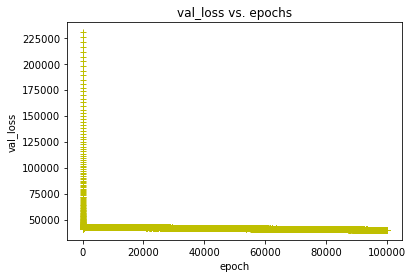

In [70]:
losses = [r['val_loss'] for r in [result] + history]
plt.plot(losses, '+y')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('val_loss vs. epochs');

#detecting outliers 
#An Outlier is a data object that deviates significantly from the rest of the objects. They can be caused by measurement or execution errors.

In [43]:
def outlier_detection(dataframe):
  Q1 = dataframe.quantile(0.55)
  Q3 = dataframe.quantile(0.85)
  IQR = Q3 - Q1
  upper_end = Q3 + 1.5 * IQR
  lower_end = Q1 - 1.5 * IQR 
  outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
  return outlier

In [44]:
outlier_detection(df['Weight'])

144    1650.0
Name: Weight, dtype: float64

Text(0.5, 1.0, 'Outlier Detection based on Height')

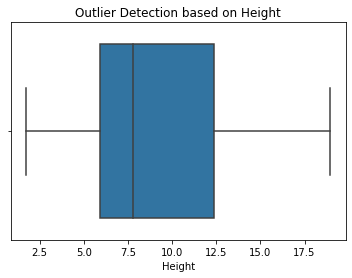

In [45]:
sns.boxplot(x =df['Height'])
plt.title('Outlier Detection based on Height')

Text(0.5, 1.0, 'Outlier Detection based on Width')

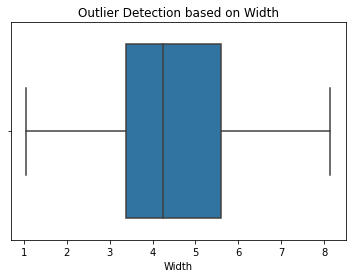

In [46]:
sns.boxplot(x = df['Width'])
plt.title('Outlier Detection based on Width')

## Prediction

In [33]:
def predict_single(x, model):
    xb = x.unsqueeze(0)
    return model(x).item()

In [47]:
y, target = val_ds[30]
pred = predict_single(y, model)
print("Input: ", y)
print("Target: ", target.item())
print("Prediction:", pred)


Input:  tensor([40.1000, 43.0000, 45.5000, 12.5125,  7.4165])
Target:  1100.0
Prediction: 648.9669799804688


In [48]:
targets_t = []
pred_t = []
for x, target in val_ds:
  targets_t.append(target.item())
  pred_t.append(predict_single(x,model))

Text(0.5, 1.0, 'Targets vs predicted values')

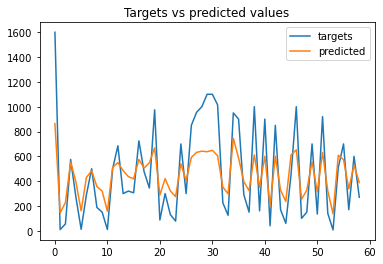

In [73]:
# graph for target and predicted
plt.plot(targets_t)
plt.plot(pred_t)
plt.legend(['targets', 'predicted'])
plt.title('Targets vs predicted values')

In [50]:
(pred_t[12] /targets_t[12]) * 100

80.21215285697993